# Light GBM

## 오태환

## 0) Import Packages & Data 

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [3]:
mice = pd.read_csv("C:/Users/dhxog/Desktop/ESC4-1/Final_Project/ESC20SPRING_team4/modeling/data/final_mice.csv")
knn = pd.read_csv("C:/Users/dhxog/Desktop/ESC4-1/Final_Project/ESC20SPRING_team4/modeling/data/final_knn.csv")
median = pd.read_csv("C:/Users/dhxog/Desktop/ESC4-1/Final_Project/ESC20SPRING_team4/modeling/data/final_median.csv")

## 1) Light GBM with MICE data

### 1-1) Light GBM Modeling

In [4]:
from sklearn.model_selection import train_test_split
X = mice.drop(["class"], axis = 1)
y = mice['class'].astype('category')
X['Attr70'] = X['Attr70'].astype('category')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:
d_train = lgb.Dataset(x_train, label = y_train)
lgbm = LGBMClassifier(n_estimators=200, random_state=0)

### 1-2) Grid Search

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score

In [33]:
params = {'max_depth': [10, 15, 20, 25, 30],
          'min_child_samples': [20, 40, 60, 80, 100],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='F1',
         eval_set=[(x_train, y_train), (x_test, y_test)])

[1]	valid_0's binary_logloss: 0.183678	valid_1's binary_logloss: 0.177639
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169907	valid_1's binary_logloss: 0.170371
[3]	valid_0's binary_logloss: 0.160263	valid_1's binary_logloss: 0.1677
[4]	valid_0's binary_logloss: 0.151787	valid_1's binary_logloss: 0.165553
[5]	valid_0's binary_logloss: 0.145041	valid_1's binary_logloss: 0.163771
[6]	valid_0's binary_logloss: 0.138461	valid_1's binary_logloss: 0.161843
[7]	valid_0's binary_logloss: 0.13306	valid_1's binary_logloss: 0.160602
[8]	valid_0's binary_logloss: 0.128435	valid_1's binary_logloss: 0.15936
[9]	valid_0's binary_logloss: 0.123887	valid_1's binary_logloss: 0.158741
[10]	valid_0's binary_logloss: 0.119748	valid_1's binary_logloss: 0.157797
[11]	valid_0's binary_logloss: 0.115798	valid_1's binary_logloss: 0.156903
[12]	valid_0's binary_logloss: 0.112069	valid_1's binary_logloss: 0.156612
[13]	valid_0's binary_logloss: 0.108663	valid_1's b

[1]	valid_0's binary_logloss: 0.18403	valid_1's binary_logloss: 0.179226
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.171063	valid_1's binary_logloss: 0.174563
[3]	valid_0's binary_logloss: 0.161614	valid_1's binary_logloss: 0.171129
[4]	valid_0's binary_logloss: 0.15374	valid_1's binary_logloss: 0.167868
[5]	valid_0's binary_logloss: 0.146595	valid_1's binary_logloss: 0.165546
[6]	valid_0's binary_logloss: 0.140763	valid_1's binary_logloss: 0.163604
[7]	valid_0's binary_logloss: 0.135221	valid_1's binary_logloss: 0.161586
[8]	valid_0's binary_logloss: 0.130141	valid_1's binary_logloss: 0.160376
[9]	valid_0's binary_logloss: 0.125783	valid_1's binary_logloss: 0.159592
[10]	valid_0's binary_logloss: 0.121464	valid_1's binary_logloss: 0.158952
[11]	valid_0's binary_logloss: 0.117836	valid_1's binary_logloss: 0.15803
[12]	valid_0's binary_logloss: 0.113896	valid_1's binary_logloss: 0.157229
[13]	valid_0's binary_logloss: 0.110356	valid_1's 

[1]	valid_0's binary_logloss: 0.184285	valid_1's binary_logloss: 0.178289
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.171349	valid_1's binary_logloss: 0.172231
[3]	valid_0's binary_logloss: 0.16147	valid_1's binary_logloss: 0.168154
[4]	valid_0's binary_logloss: 0.152916	valid_1's binary_logloss: 0.165661
[5]	valid_0's binary_logloss: 0.146764	valid_1's binary_logloss: 0.163604
[6]	valid_0's binary_logloss: 0.140708	valid_1's binary_logloss: 0.162838
[7]	valid_0's binary_logloss: 0.136034	valid_1's binary_logloss: 0.1618
[8]	valid_0's binary_logloss: 0.130518	valid_1's binary_logloss: 0.160755
[9]	valid_0's binary_logloss: 0.12677	valid_1's binary_logloss: 0.16001
[10]	valid_0's binary_logloss: 0.122873	valid_1's binary_logloss: 0.159288
[11]	valid_0's binary_logloss: 0.118644	valid_1's binary_logloss: 0.158197
[12]	valid_0's binary_logloss: 0.115382	valid_1's binary_logloss: 0.157729
[13]	valid_0's binary_logloss: 0.112052	valid_1's bi

[1]	valid_0's binary_logloss: 0.183331	valid_1's binary_logloss: 0.179429
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.170817	valid_1's binary_logloss: 0.174002
[3]	valid_0's binary_logloss: 0.162251	valid_1's binary_logloss: 0.170299
[4]	valid_0's binary_logloss: 0.154455	valid_1's binary_logloss: 0.1672
[5]	valid_0's binary_logloss: 0.147574	valid_1's binary_logloss: 0.164533
[6]	valid_0's binary_logloss: 0.141101	valid_1's binary_logloss: 0.16293
[7]	valid_0's binary_logloss: 0.135636	valid_1's binary_logloss: 0.161005
[8]	valid_0's binary_logloss: 0.130333	valid_1's binary_logloss: 0.159613
[9]	valid_0's binary_logloss: 0.126097	valid_1's binary_logloss: 0.159072
[10]	valid_0's binary_logloss: 0.121862	valid_1's binary_logloss: 0.158363
[11]	valid_0's binary_logloss: 0.117631	valid_1's binary_logloss: 0.15661
[12]	valid_0's binary_logloss: 0.113968	valid_1's binary_logloss: 0.15612
[13]	valid_0's binary_logloss: 0.110763	valid_1's bi

[119]	valid_0's binary_logloss: 0.0436185	valid_1's binary_logloss: 0.197074
[120]	valid_0's binary_logloss: 0.0436513	valid_1's binary_logloss: 0.197769
[121]	valid_0's binary_logloss: 0.0439325	valid_1's binary_logloss: 0.198409
[122]	valid_0's binary_logloss: 0.043854	valid_1's binary_logloss: 0.198968
[123]	valid_0's binary_logloss: 0.0437948	valid_1's binary_logloss: 0.19959
[124]	valid_0's binary_logloss: 0.0438068	valid_1's binary_logloss: 0.200094
[125]	valid_0's binary_logloss: 0.0437656	valid_1's binary_logloss: 0.20046
[126]	valid_0's binary_logloss: 0.0436685	valid_1's binary_logloss: 0.200681
[127]	valid_0's binary_logloss: 0.0436801	valid_1's binary_logloss: 0.201568
[128]	valid_0's binary_logloss: 0.043693	valid_1's binary_logloss: 0.202367
[129]	valid_0's binary_logloss: 0.0436285	valid_1's binary_logloss: 0.20304
[130]	valid_0's binary_logloss: 0.0436315	valid_1's binary_logloss: 0.20384
[131]	valid_0's binary_logloss: 0.0437078	valid_1's binary_logloss: 0.203866
Early

[129]	valid_0's binary_logloss: 0.0457612	valid_1's binary_logloss: 0.193551
[130]	valid_0's binary_logloss: 0.0457896	valid_1's binary_logloss: 0.193775
[131]	valid_0's binary_logloss: 0.0460094	valid_1's binary_logloss: 0.194086
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.0750966	valid_1's binary_logloss: 0.148331
[1]	valid_0's binary_logloss: 0.183678	valid_1's binary_logloss: 0.177639
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169907	valid_1's binary_logloss: 0.170371
[3]	valid_0's binary_logloss: 0.160263	valid_1's binary_logloss: 0.1677
[4]	valid_0's binary_logloss: 0.151787	valid_1's binary_logloss: 0.165553
[5]	valid_0's binary_logloss: 0.145041	valid_1's binary_logloss: 0.163771
[6]	valid_0's binary_logloss: 0.138461	valid_1's binary_logloss: 0.161843
[7]	valid_0's binary_logloss: 0.13306	valid_1's binary_logloss: 0.160602
[8]	valid_0's binary_logloss: 0.128435	valid_1's binary_logloss: 0.15936
[9]	vali

[1]	valid_0's binary_logloss: 0.18403	valid_1's binary_logloss: 0.179226
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.171063	valid_1's binary_logloss: 0.174563
[3]	valid_0's binary_logloss: 0.161614	valid_1's binary_logloss: 0.171129
[4]	valid_0's binary_logloss: 0.15374	valid_1's binary_logloss: 0.167868
[5]	valid_0's binary_logloss: 0.146595	valid_1's binary_logloss: 0.165546
[6]	valid_0's binary_logloss: 0.140763	valid_1's binary_logloss: 0.163604
[7]	valid_0's binary_logloss: 0.135221	valid_1's binary_logloss: 0.161586
[8]	valid_0's binary_logloss: 0.130141	valid_1's binary_logloss: 0.160376
[9]	valid_0's binary_logloss: 0.125783	valid_1's binary_logloss: 0.159592
[10]	valid_0's binary_logloss: 0.121464	valid_1's binary_logloss: 0.158952
[11]	valid_0's binary_logloss: 0.117836	valid_1's binary_logloss: 0.15803
[12]	valid_0's binary_logloss: 0.113896	valid_1's binary_logloss: 0.157229
[13]	valid_0's binary_logloss: 0.110356	valid_1's 

[1]	valid_0's binary_logloss: 0.184285	valid_1's binary_logloss: 0.178289
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.171349	valid_1's binary_logloss: 0.172231
[3]	valid_0's binary_logloss: 0.16147	valid_1's binary_logloss: 0.168154
[4]	valid_0's binary_logloss: 0.152916	valid_1's binary_logloss: 0.165661
[5]	valid_0's binary_logloss: 0.146764	valid_1's binary_logloss: 0.163604
[6]	valid_0's binary_logloss: 0.140708	valid_1's binary_logloss: 0.162838
[7]	valid_0's binary_logloss: 0.136034	valid_1's binary_logloss: 0.1618
[8]	valid_0's binary_logloss: 0.130518	valid_1's binary_logloss: 0.160755
[9]	valid_0's binary_logloss: 0.12677	valid_1's binary_logloss: 0.16001
[10]	valid_0's binary_logloss: 0.122873	valid_1's binary_logloss: 0.159288
[11]	valid_0's binary_logloss: 0.118644	valid_1's binary_logloss: 0.158197
[12]	valid_0's binary_logloss: 0.115382	valid_1's binary_logloss: 0.157729
[13]	valid_0's binary_logloss: 0.112052	valid_1's bi

[1]	valid_0's binary_logloss: 0.183331	valid_1's binary_logloss: 0.179429
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.170817	valid_1's binary_logloss: 0.174002
[3]	valid_0's binary_logloss: 0.162251	valid_1's binary_logloss: 0.170299
[4]	valid_0's binary_logloss: 0.154455	valid_1's binary_logloss: 0.1672
[5]	valid_0's binary_logloss: 0.147574	valid_1's binary_logloss: 0.164533
[6]	valid_0's binary_logloss: 0.141101	valid_1's binary_logloss: 0.16293
[7]	valid_0's binary_logloss: 0.135636	valid_1's binary_logloss: 0.161005
[8]	valid_0's binary_logloss: 0.130333	valid_1's binary_logloss: 0.159613
[9]	valid_0's binary_logloss: 0.126097	valid_1's binary_logloss: 0.159072
[10]	valid_0's binary_logloss: 0.121862	valid_1's binary_logloss: 0.158363
[11]	valid_0's binary_logloss: 0.117631	valid_1's binary_logloss: 0.15661
[12]	valid_0's binary_logloss: 0.113968	valid_1's binary_logloss: 0.15612
[13]	valid_0's binary_logloss: 0.110763	valid_1's bi

[1]	valid_0's binary_logloss: 0.181743	valid_1's binary_logloss: 0.177897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16913	valid_1's binary_logloss: 0.172532
[3]	valid_0's binary_logloss: 0.159799	valid_1's binary_logloss: 0.168183
[4]	valid_0's binary_logloss: 0.151792	valid_1's binary_logloss: 0.165401
[5]	valid_0's binary_logloss: 0.145218	valid_1's binary_logloss: 0.162133
[6]	valid_0's binary_logloss: 0.139008	valid_1's binary_logloss: 0.15977
[7]	valid_0's binary_logloss: 0.13301	valid_1's binary_logloss: 0.157031
[8]	valid_0's binary_logloss: 0.127906	valid_1's binary_logloss: 0.155341
[9]	valid_0's binary_logloss: 0.123464	valid_1's binary_logloss: 0.153446
[10]	valid_0's binary_logloss: 0.11944	valid_1's binary_logloss: 0.152365
[11]	valid_0's binary_logloss: 0.115403	valid_1's binary_logloss: 0.152242
[12]	valid_0's binary_logloss: 0.111482	valid_1's binary_logloss: 0.151449
[13]	valid_0's binary_logloss: 0.107951	valid_1's b

[1]	valid_0's binary_logloss: 0.186349	valid_1's binary_logloss: 0.180263
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175162	valid_1's binary_logloss: 0.174297
[3]	valid_0's binary_logloss: 0.166319	valid_1's binary_logloss: 0.169409
[4]	valid_0's binary_logloss: 0.159292	valid_1's binary_logloss: 0.16561
[5]	valid_0's binary_logloss: 0.152537	valid_1's binary_logloss: 0.163562
[6]	valid_0's binary_logloss: 0.14709	valid_1's binary_logloss: 0.161638
[7]	valid_0's binary_logloss: 0.141902	valid_1's binary_logloss: 0.159584
[8]	valid_0's binary_logloss: 0.136938	valid_1's binary_logloss: 0.158643
[9]	valid_0's binary_logloss: 0.132368	valid_1's binary_logloss: 0.15712
[10]	valid_0's binary_logloss: 0.128824	valid_1's binary_logloss: 0.156289
[11]	valid_0's binary_logloss: 0.125078	valid_1's binary_logloss: 0.155252
[12]	valid_0's binary_logloss: 0.121509	valid_1's binary_logloss: 0.154976
[13]	valid_0's binary_logloss: 0.118291	valid_1's 

[118]	valid_0's binary_logloss: 0.0448403	valid_1's binary_logloss: 0.189125
[119]	valid_0's binary_logloss: 0.044832	valid_1's binary_logloss: 0.190011
[120]	valid_0's binary_logloss: 0.0450032	valid_1's binary_logloss: 0.190579
[121]	valid_0's binary_logloss: 0.0449417	valid_1's binary_logloss: 0.191052
[122]	valid_0's binary_logloss: 0.0447913	valid_1's binary_logloss: 0.191302
[123]	valid_0's binary_logloss: 0.0447948	valid_1's binary_logloss: 0.191697
[124]	valid_0's binary_logloss: 0.0448484	valid_1's binary_logloss: 0.192009
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.0929809	valid_1's binary_logloss: 0.151761
[1]	valid_0's binary_logloss: 0.18766	valid_1's binary_logloss: 0.180379
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176558	valid_1's binary_logloss: 0.174325
[3]	valid_0's binary_logloss: 0.168776	valid_1's binary_logloss: 0.170985
[4]	valid_0's binary_logloss: 0.160444	valid_1's binary_logloss: 0.1

[124]	valid_0's binary_logloss: 0.0488454	valid_1's binary_logloss: 0.187267
[125]	valid_0's binary_logloss: 0.0487155	valid_1's binary_logloss: 0.187498
[126]	valid_0's binary_logloss: 0.0486469	valid_1's binary_logloss: 0.1881
[127]	valid_0's binary_logloss: 0.0486637	valid_1's binary_logloss: 0.189121
[128]	valid_0's binary_logloss: 0.0487183	valid_1's binary_logloss: 0.190203
[129]	valid_0's binary_logloss: 0.0487895	valid_1's binary_logloss: 0.191311
[130]	valid_0's binary_logloss: 0.0488371	valid_1's binary_logloss: 0.191544
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.0870795	valid_1's binary_logloss: 0.152381
[1]	valid_0's binary_logloss: 0.188147	valid_1's binary_logloss: 0.178864
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175718	valid_1's binary_logloss: 0.173576
[3]	valid_0's binary_logloss: 0.167017	valid_1's binary_logloss: 0.168795
[4]	valid_0's binary_logloss: 0.159419	valid_1's binary_logloss: 0.1

[126]	valid_0's binary_logloss: 0.0493146	valid_1's binary_logloss: 0.196468
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.0891451	valid_1's binary_logloss: 0.150624
[1]	valid_0's binary_logloss: 0.186841	valid_1's binary_logloss: 0.180361
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175614	valid_1's binary_logloss: 0.175505
[3]	valid_0's binary_logloss: 0.167251	valid_1's binary_logloss: 0.17218
[4]	valid_0's binary_logloss: 0.160197	valid_1's binary_logloss: 0.170191
[5]	valid_0's binary_logloss: 0.154638	valid_1's binary_logloss: 0.167146
[6]	valid_0's binary_logloss: 0.148742	valid_1's binary_logloss: 0.165095
[7]	valid_0's binary_logloss: 0.143769	valid_1's binary_logloss: 0.163799
[8]	valid_0's binary_logloss: 0.138899	valid_1's binary_logloss: 0.162725
[9]	valid_0's binary_logloss: 0.134556	valid_1's binary_logloss: 0.16129
[10]	valid_0's binary_logloss: 0.130639	valid_1's binary_logloss: 0.160449
[11]	valid_

[1]	valid_0's binary_logloss: 0.186933	valid_1's binary_logloss: 0.181135
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.17594	valid_1's binary_logloss: 0.175347
[3]	valid_0's binary_logloss: 0.166857	valid_1's binary_logloss: 0.171898
[4]	valid_0's binary_logloss: 0.159862	valid_1's binary_logloss: 0.168718
[5]	valid_0's binary_logloss: 0.153598	valid_1's binary_logloss: 0.1659
[6]	valid_0's binary_logloss: 0.148068	valid_1's binary_logloss: 0.16432
[7]	valid_0's binary_logloss: 0.142857	valid_1's binary_logloss: 0.161764
[8]	valid_0's binary_logloss: 0.138074	valid_1's binary_logloss: 0.160021
[9]	valid_0's binary_logloss: 0.133502	valid_1's binary_logloss: 0.158398
[10]	valid_0's binary_logloss: 0.129314	valid_1's binary_logloss: 0.156707
[11]	valid_0's binary_logloss: 0.125365	valid_1's binary_logloss: 0.155492
[12]	valid_0's binary_logloss: 0.121571	valid_1's binary_logloss: 0.154914
[13]	valid_0's binary_logloss: 0.118875	valid_1's b

[113]	valid_0's binary_logloss: 0.0464688	valid_1's binary_logloss: 0.176742
[114]	valid_0's binary_logloss: 0.0462557	valid_1's binary_logloss: 0.177294
[115]	valid_0's binary_logloss: 0.0462209	valid_1's binary_logloss: 0.17749
[116]	valid_0's binary_logloss: 0.0462849	valid_1's binary_logloss: 0.178214
[117]	valid_0's binary_logloss: 0.0462661	valid_1's binary_logloss: 0.178548
[118]	valid_0's binary_logloss: 0.0462425	valid_1's binary_logloss: 0.178888
[119]	valid_0's binary_logloss: 0.0462992	valid_1's binary_logloss: 0.179389
[120]	valid_0's binary_logloss: 0.0460958	valid_1's binary_logloss: 0.1799
[121]	valid_0's binary_logloss: 0.0460134	valid_1's binary_logloss: 0.180372
[122]	valid_0's binary_logloss: 0.0460511	valid_1's binary_logloss: 0.180711
[123]	valid_0's binary_logloss: 0.0460551	valid_1's binary_logloss: 0.180917
[124]	valid_0's binary_logloss: 0.0460598	valid_1's binary_logloss: 0.181422
[125]	valid_0's binary_logloss: 0.0461158	valid_1's binary_logloss: 0.181587
[1

[98]	valid_0's binary_logloss: 0.0504419	valid_1's binary_logloss: 0.17329
[99]	valid_0's binary_logloss: 0.0504007	valid_1's binary_logloss: 0.173911
[100]	valid_0's binary_logloss: 0.050336	valid_1's binary_logloss: 0.175111
[101]	valid_0's binary_logloss: 0.0500017	valid_1's binary_logloss: 0.175489
[102]	valid_0's binary_logloss: 0.0498101	valid_1's binary_logloss: 0.176484
[103]	valid_0's binary_logloss: 0.0497166	valid_1's binary_logloss: 0.176595
[104]	valid_0's binary_logloss: 0.0495956	valid_1's binary_logloss: 0.177217
[105]	valid_0's binary_logloss: 0.0494616	valid_1's binary_logloss: 0.177815
[106]	valid_0's binary_logloss: 0.0493782	valid_1's binary_logloss: 0.178224
[107]	valid_0's binary_logloss: 0.0493386	valid_1's binary_logloss: 0.178453
[108]	valid_0's binary_logloss: 0.0492718	valid_1's binary_logloss: 0.178725
[109]	valid_0's binary_logloss: 0.0492753	valid_1's binary_logloss: 0.179373
[110]	valid_0's binary_logloss: 0.0492711	valid_1's binary_logloss: 0.179668
[11

[94]	valid_0's binary_logloss: 0.0502193	valid_1's binary_logloss: 0.175653
[95]	valid_0's binary_logloss: 0.0500998	valid_1's binary_logloss: 0.176633
[96]	valid_0's binary_logloss: 0.0501442	valid_1's binary_logloss: 0.177034
[97]	valid_0's binary_logloss: 0.0500318	valid_1's binary_logloss: 0.17763
[98]	valid_0's binary_logloss: 0.0499702	valid_1's binary_logloss: 0.17841
[99]	valid_0's binary_logloss: 0.0499078	valid_1's binary_logloss: 0.178755
[100]	valid_0's binary_logloss: 0.0496543	valid_1's binary_logloss: 0.178981
[101]	valid_0's binary_logloss: 0.0495372	valid_1's binary_logloss: 0.179774
[102]	valid_0's binary_logloss: 0.0495216	valid_1's binary_logloss: 0.180156
[103]	valid_0's binary_logloss: 0.0494896	valid_1's binary_logloss: 0.18094
[104]	valid_0's binary_logloss: 0.0495333	valid_1's binary_logloss: 0.181735
[105]	valid_0's binary_logloss: 0.0494188	valid_1's binary_logloss: 0.181981
[106]	valid_0's binary_logloss: 0.0493694	valid_1's binary_logloss: 0.183036
[107]	va

[97]	valid_0's binary_logloss: 0.0465582	valid_1's binary_logloss: 0.180168
[98]	valid_0's binary_logloss: 0.0462825	valid_1's binary_logloss: 0.180765
[99]	valid_0's binary_logloss: 0.0461058	valid_1's binary_logloss: 0.181089
[100]	valid_0's binary_logloss: 0.04596	valid_1's binary_logloss: 0.181934
[101]	valid_0's binary_logloss: 0.0456412	valid_1's binary_logloss: 0.182729
[102]	valid_0's binary_logloss: 0.0454388	valid_1's binary_logloss: 0.1834
[103]	valid_0's binary_logloss: 0.0450913	valid_1's binary_logloss: 0.184181
[104]	valid_0's binary_logloss: 0.0450577	valid_1's binary_logloss: 0.184806
[105]	valid_0's binary_logloss: 0.0448616	valid_1's binary_logloss: 0.185115
[106]	valid_0's binary_logloss: 0.0448725	valid_1's binary_logloss: 0.185906
[107]	valid_0's binary_logloss: 0.0448233	valid_1's binary_logloss: 0.186527
[108]	valid_0's binary_logloss: 0.0447249	valid_1's binary_logloss: 0.186955
[109]	valid_0's binary_logloss: 0.0444611	valid_1's binary_logloss: 0.187625
[110]	

[117]	valid_0's binary_logloss: 0.0462661	valid_1's binary_logloss: 0.178548
[118]	valid_0's binary_logloss: 0.0462425	valid_1's binary_logloss: 0.178888
[119]	valid_0's binary_logloss: 0.0462992	valid_1's binary_logloss: 0.179389
[120]	valid_0's binary_logloss: 0.0460958	valid_1's binary_logloss: 0.1799
[121]	valid_0's binary_logloss: 0.0460134	valid_1's binary_logloss: 0.180372
[122]	valid_0's binary_logloss: 0.0460511	valid_1's binary_logloss: 0.180711
[123]	valid_0's binary_logloss: 0.0460551	valid_1's binary_logloss: 0.180917
[124]	valid_0's binary_logloss: 0.0460598	valid_1's binary_logloss: 0.181422
[125]	valid_0's binary_logloss: 0.0461158	valid_1's binary_logloss: 0.181587
[126]	valid_0's binary_logloss: 0.0461358	valid_1's binary_logloss: 0.181962
[127]	valid_0's binary_logloss: 0.0461522	valid_1's binary_logloss: 0.182198
[128]	valid_0's binary_logloss: 0.0462412	valid_1's binary_logloss: 0.182552
[129]	valid_0's binary_logloss: 0.0462331	valid_1's binary_logloss: 0.182955
[

[1]	valid_0's binary_logloss: 0.199198	valid_1's binary_logloss: 0.189967
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190124	valid_1's binary_logloss: 0.185777
[3]	valid_0's binary_logloss: 0.183841	valid_1's binary_logloss: 0.183607
[4]	valid_0's binary_logloss: 0.178112	valid_1's binary_logloss: 0.181626
[5]	valid_0's binary_logloss: 0.173053	valid_1's binary_logloss: 0.179882
[6]	valid_0's binary_logloss: 0.168112	valid_1's binary_logloss: 0.178957
[7]	valid_0's binary_logloss: 0.163371	valid_1's binary_logloss: 0.178283
[8]	valid_0's binary_logloss: 0.159168	valid_1's binary_logloss: 0.178298
[9]	valid_0's binary_logloss: 0.155562	valid_1's binary_logloss: 0.17811
[10]	valid_0's binary_logloss: 0.151927	valid_1's binary_logloss: 0.177581
[11]	valid_0's binary_logloss: 0.147909	valid_1's binary_logloss: 0.176516
[12]	valid_0's binary_logloss: 0.144634	valid_1's binary_logloss: 0.175561
[13]	valid_0's binary_logloss: 0.141279	valid_1'

[1]	valid_0's binary_logloss: 0.188979	valid_1's binary_logloss: 0.178949
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178515	valid_1's binary_logloss: 0.174239
[3]	valid_0's binary_logloss: 0.171263	valid_1's binary_logloss: 0.16966
[4]	valid_0's binary_logloss: 0.165063	valid_1's binary_logloss: 0.166791
[5]	valid_0's binary_logloss: 0.159304	valid_1's binary_logloss: 0.164427
[6]	valid_0's binary_logloss: 0.153888	valid_1's binary_logloss: 0.162634
[7]	valid_0's binary_logloss: 0.149004	valid_1's binary_logloss: 0.161394
[8]	valid_0's binary_logloss: 0.14465	valid_1's binary_logloss: 0.160399
[9]	valid_0's binary_logloss: 0.140801	valid_1's binary_logloss: 0.158931
[10]	valid_0's binary_logloss: 0.137229	valid_1's binary_logloss: 0.158187
[11]	valid_0's binary_logloss: 0.133787	valid_1's binary_logloss: 0.157205
[12]	valid_0's binary_logloss: 0.130268	valid_1's binary_logloss: 0.156235
[13]	valid_0's binary_logloss: 0.127066	valid_1's

[1]	valid_0's binary_logloss: 0.200783	valid_1's binary_logloss: 0.192567
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.191836	valid_1's binary_logloss: 0.188321
[3]	valid_0's binary_logloss: 0.184159	valid_1's binary_logloss: 0.185852
[4]	valid_0's binary_logloss: 0.17876	valid_1's binary_logloss: 0.184142
[5]	valid_0's binary_logloss: 0.172364	valid_1's binary_logloss: 0.18256
[6]	valid_0's binary_logloss: 0.166435	valid_1's binary_logloss: 0.182282
[7]	valid_0's binary_logloss: 0.161724	valid_1's binary_logloss: 0.181544
[8]	valid_0's binary_logloss: 0.157361	valid_1's binary_logloss: 0.180486
[9]	valid_0's binary_logloss: 0.153841	valid_1's binary_logloss: 0.179134
[10]	valid_0's binary_logloss: 0.15013	valid_1's binary_logloss: 0.178249
[11]	valid_0's binary_logloss: 0.145434	valid_1's binary_logloss: 0.177832
[12]	valid_0's binary_logloss: 0.141786	valid_1's binary_logloss: 0.177547
[13]	valid_0's binary_logloss: 0.138696	valid_1's 

[1]	valid_0's binary_logloss: 0.189145	valid_1's binary_logloss: 0.1803
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178608	valid_1's binary_logloss: 0.174548
[3]	valid_0's binary_logloss: 0.17093	valid_1's binary_logloss: 0.170552
[4]	valid_0's binary_logloss: 0.16429	valid_1's binary_logloss: 0.167159
[5]	valid_0's binary_logloss: 0.158224	valid_1's binary_logloss: 0.164372
[6]	valid_0's binary_logloss: 0.15247	valid_1's binary_logloss: 0.162077
[7]	valid_0's binary_logloss: 0.147547	valid_1's binary_logloss: 0.160168
[8]	valid_0's binary_logloss: 0.143105	valid_1's binary_logloss: 0.159619
[9]	valid_0's binary_logloss: 0.13917	valid_1's binary_logloss: 0.158442
[10]	valid_0's binary_logloss: 0.135589	valid_1's binary_logloss: 0.157887
[11]	valid_0's binary_logloss: 0.132226	valid_1's binary_logloss: 0.15614
[12]	valid_0's binary_logloss: 0.128877	valid_1's binary_logloss: 0.15518
[13]	valid_0's binary_logloss: 0.125685	valid_1's binar

[125]	valid_0's binary_logloss: 0.0476497	valid_1's binary_logloss: 0.179164
[126]	valid_0's binary_logloss: 0.0475857	valid_1's binary_logloss: 0.179701
[127]	valid_0's binary_logloss: 0.0474783	valid_1's binary_logloss: 0.180066
[128]	valid_0's binary_logloss: 0.0474115	valid_1's binary_logloss: 0.180312
[129]	valid_0's binary_logloss: 0.0472785	valid_1's binary_logloss: 0.180648
[130]	valid_0's binary_logloss: 0.0471323	valid_1's binary_logloss: 0.181536
[131]	valid_0's binary_logloss: 0.0471625	valid_1's binary_logloss: 0.181861
[132]	valid_0's binary_logloss: 0.0469617	valid_1's binary_logloss: 0.18272
[133]	valid_0's binary_logloss: 0.0469417	valid_1's binary_logloss: 0.183034
[134]	valid_0's binary_logloss: 0.0468699	valid_1's binary_logloss: 0.183625
[135]	valid_0's binary_logloss: 0.0468679	valid_1's binary_logloss: 0.183766
[136]	valid_0's binary_logloss: 0.0467272	valid_1's binary_logloss: 0.184226
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.0847744	v

[1]	valid_0's binary_logloss: 0.199198	valid_1's binary_logloss: 0.189967
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190124	valid_1's binary_logloss: 0.185777
[3]	valid_0's binary_logloss: 0.183841	valid_1's binary_logloss: 0.183607
[4]	valid_0's binary_logloss: 0.178112	valid_1's binary_logloss: 0.181626
[5]	valid_0's binary_logloss: 0.173053	valid_1's binary_logloss: 0.179882
[6]	valid_0's binary_logloss: 0.168112	valid_1's binary_logloss: 0.178957
[7]	valid_0's binary_logloss: 0.163371	valid_1's binary_logloss: 0.178283
[8]	valid_0's binary_logloss: 0.159168	valid_1's binary_logloss: 0.178298
[9]	valid_0's binary_logloss: 0.155562	valid_1's binary_logloss: 0.17811
[10]	valid_0's binary_logloss: 0.151927	valid_1's binary_logloss: 0.177581
[11]	valid_0's binary_logloss: 0.147909	valid_1's binary_logloss: 0.176516
[12]	valid_0's binary_logloss: 0.144634	valid_1's binary_logloss: 0.175561
[13]	valid_0's binary_logloss: 0.141279	valid_1'

[1]	valid_0's binary_logloss: 0.188979	valid_1's binary_logloss: 0.178949
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178515	valid_1's binary_logloss: 0.174239
[3]	valid_0's binary_logloss: 0.171263	valid_1's binary_logloss: 0.16966
[4]	valid_0's binary_logloss: 0.165063	valid_1's binary_logloss: 0.166791
[5]	valid_0's binary_logloss: 0.159304	valid_1's binary_logloss: 0.164427
[6]	valid_0's binary_logloss: 0.153888	valid_1's binary_logloss: 0.162634
[7]	valid_0's binary_logloss: 0.149004	valid_1's binary_logloss: 0.161394
[8]	valid_0's binary_logloss: 0.14465	valid_1's binary_logloss: 0.160399
[9]	valid_0's binary_logloss: 0.140801	valid_1's binary_logloss: 0.158931
[10]	valid_0's binary_logloss: 0.137229	valid_1's binary_logloss: 0.158187
[11]	valid_0's binary_logloss: 0.133787	valid_1's binary_logloss: 0.157205
[12]	valid_0's binary_logloss: 0.130268	valid_1's binary_logloss: 0.156235
[13]	valid_0's binary_logloss: 0.127066	valid_1's

[117]	valid_0's binary_logloss: 0.0518034	valid_1's binary_logloss: 0.185861
[118]	valid_0's binary_logloss: 0.0516319	valid_1's binary_logloss: 0.186355
[119]	valid_0's binary_logloss: 0.0515656	valid_1's binary_logloss: 0.187119
[120]	valid_0's binary_logloss: 0.051509	valid_1's binary_logloss: 0.18728
[121]	valid_0's binary_logloss: 0.0514215	valid_1's binary_logloss: 0.187801
[122]	valid_0's binary_logloss: 0.0513807	valid_1's binary_logloss: 0.188298
[123]	valid_0's binary_logloss: 0.0513376	valid_1's binary_logloss: 0.188852
[124]	valid_0's binary_logloss: 0.0511436	valid_1's binary_logloss: 0.189085
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.100075	valid_1's binary_logloss: 0.153328
[1]	valid_0's binary_logloss: 0.200783	valid_1's binary_logloss: 0.192567
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.191836	valid_1's binary_logloss: 0.188321
[3]	valid_0's binary_logloss: 0.184159	valid_1's binary_logloss: 0

[120]	valid_0's binary_logloss: 0.0570401	valid_1's binary_logloss: 0.204374
[121]	valid_0's binary_logloss: 0.0569053	valid_1's binary_logloss: 0.204709
[122]	valid_0's binary_logloss: 0.0568605	valid_1's binary_logloss: 0.20502
[123]	valid_0's binary_logloss: 0.0566563	valid_1's binary_logloss: 0.205657
[124]	valid_0's binary_logloss: 0.0563332	valid_1's binary_logloss: 0.206323
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.114273	valid_1's binary_logloss: 0.175078
[1]	valid_0's binary_logloss: 0.189145	valid_1's binary_logloss: 0.1803
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178608	valid_1's binary_logloss: 0.174548
[3]	valid_0's binary_logloss: 0.17093	valid_1's binary_logloss: 0.170552
[4]	valid_0's binary_logloss: 0.16429	valid_1's binary_logloss: 0.167159
[5]	valid_0's binary_logloss: 0.158224	valid_1's binary_logloss: 0.164372
[6]	valid_0's binary_logloss: 0.15247	valid_1's binary_logloss: 0.162077
[7]	v

[109]	valid_0's binary_logloss: 0.0499586	valid_1's binary_logloss: 0.171664
[110]	valid_0's binary_logloss: 0.0497223	valid_1's binary_logloss: 0.171992
[111]	valid_0's binary_logloss: 0.0496372	valid_1's binary_logloss: 0.172258
[112]	valid_0's binary_logloss: 0.0494523	valid_1's binary_logloss: 0.172932
[113]	valid_0's binary_logloss: 0.049281	valid_1's binary_logloss: 0.173649
[114]	valid_0's binary_logloss: 0.0490562	valid_1's binary_logloss: 0.174233
[115]	valid_0's binary_logloss: 0.0488026	valid_1's binary_logloss: 0.174665
[116]	valid_0's binary_logloss: 0.0486702	valid_1's binary_logloss: 0.175081
[117]	valid_0's binary_logloss: 0.0485348	valid_1's binary_logloss: 0.175463
[118]	valid_0's binary_logloss: 0.0486076	valid_1's binary_logloss: 0.175589
[119]	valid_0's binary_logloss: 0.0483827	valid_1's binary_logloss: 0.176181
[120]	valid_0's binary_logloss: 0.0483478	valid_1's binary_logloss: 0.177148
[121]	valid_0's binary_logloss: 0.0482065	valid_1's binary_logloss: 0.177281


[90]	valid_0's binary_logloss: 0.0692311	valid_1's binary_logloss: 0.184231
[91]	valid_0's binary_logloss: 0.0690081	valid_1's binary_logloss: 0.184725
[92]	valid_0's binary_logloss: 0.0683048	valid_1's binary_logloss: 0.185106
[93]	valid_0's binary_logloss: 0.0677944	valid_1's binary_logloss: 0.185759
[94]	valid_0's binary_logloss: 0.0674801	valid_1's binary_logloss: 0.185771
[95]	valid_0's binary_logloss: 0.0669966	valid_1's binary_logloss: 0.18596
[96]	valid_0's binary_logloss: 0.0666913	valid_1's binary_logloss: 0.186255
[97]	valid_0's binary_logloss: 0.0664029	valid_1's binary_logloss: 0.186519
[98]	valid_0's binary_logloss: 0.0660261	valid_1's binary_logloss: 0.186534
[99]	valid_0's binary_logloss: 0.0656764	valid_1's binary_logloss: 0.187261
[100]	valid_0's binary_logloss: 0.0653519	valid_1's binary_logloss: 0.187582
[101]	valid_0's binary_logloss: 0.0649978	valid_1's binary_logloss: 0.188018
[102]	valid_0's binary_logloss: 0.0645335	valid_1's binary_logloss: 0.188876
[103]	vali

[67]	valid_0's binary_logloss: 0.0825946	valid_1's binary_logloss: 0.179209
[68]	valid_0's binary_logloss: 0.0819971	valid_1's binary_logloss: 0.179427
[69]	valid_0's binary_logloss: 0.08167	valid_1's binary_logloss: 0.179545
[70]	valid_0's binary_logloss: 0.0812901	valid_1's binary_logloss: 0.179834
[71]	valid_0's binary_logloss: 0.0808269	valid_1's binary_logloss: 0.179785
[72]	valid_0's binary_logloss: 0.080158	valid_1's binary_logloss: 0.180419
[73]	valid_0's binary_logloss: 0.0796887	valid_1's binary_logloss: 0.180407
[74]	valid_0's binary_logloss: 0.0789691	valid_1's binary_logloss: 0.180773
[75]	valid_0's binary_logloss: 0.0784876	valid_1's binary_logloss: 0.180804
[76]	valid_0's binary_logloss: 0.0781108	valid_1's binary_logloss: 0.18092
[77]	valid_0's binary_logloss: 0.0775248	valid_1's binary_logloss: 0.18111
[78]	valid_0's binary_logloss: 0.0770816	valid_1's binary_logloss: 0.181424
[79]	valid_0's binary_logloss: 0.0765396	valid_1's binary_logloss: 0.181968
[80]	valid_0's bi

[68]	valid_0's binary_logloss: 0.0793381	valid_1's binary_logloss: 0.178206
[69]	valid_0's binary_logloss: 0.0789912	valid_1's binary_logloss: 0.178158
[70]	valid_0's binary_logloss: 0.0784298	valid_1's binary_logloss: 0.178621
[71]	valid_0's binary_logloss: 0.0779118	valid_1's binary_logloss: 0.178812
[72]	valid_0's binary_logloss: 0.0774437	valid_1's binary_logloss: 0.179035
[73]	valid_0's binary_logloss: 0.0770431	valid_1's binary_logloss: 0.178844
[74]	valid_0's binary_logloss: 0.0763905	valid_1's binary_logloss: 0.179273
[75]	valid_0's binary_logloss: 0.0758695	valid_1's binary_logloss: 0.179828
[76]	valid_0's binary_logloss: 0.0750841	valid_1's binary_logloss: 0.180111
[77]	valid_0's binary_logloss: 0.0745046	valid_1's binary_logloss: 0.18091
[78]	valid_0's binary_logloss: 0.0739412	valid_1's binary_logloss: 0.18159
[79]	valid_0's binary_logloss: 0.0734591	valid_1's binary_logloss: 0.181601
[80]	valid_0's binary_logloss: 0.0728288	valid_1's binary_logloss: 0.181688
[81]	valid_0's

[72]	valid_0's binary_logloss: 0.0771125	valid_1's binary_logloss: 0.1823
[73]	valid_0's binary_logloss: 0.076649	valid_1's binary_logloss: 0.182238
[74]	valid_0's binary_logloss: 0.0763397	valid_1's binary_logloss: 0.181893
[75]	valid_0's binary_logloss: 0.076099	valid_1's binary_logloss: 0.181844
[76]	valid_0's binary_logloss: 0.0757064	valid_1's binary_logloss: 0.182095
[77]	valid_0's binary_logloss: 0.0750673	valid_1's binary_logloss: 0.183003
[78]	valid_0's binary_logloss: 0.0744434	valid_1's binary_logloss: 0.182879
[79]	valid_0's binary_logloss: 0.0740765	valid_1's binary_logloss: 0.183246
[80]	valid_0's binary_logloss: 0.0733815	valid_1's binary_logloss: 0.183772
[81]	valid_0's binary_logloss: 0.0728174	valid_1's binary_logloss: 0.183821
[82]	valid_0's binary_logloss: 0.0722821	valid_1's binary_logloss: 0.184489
[83]	valid_0's binary_logloss: 0.0718377	valid_1's binary_logloss: 0.185217
[84]	valid_0's binary_logloss: 0.0714859	valid_1's binary_logloss: 0.18542
[85]	valid_0's bi

[76]	valid_0's binary_logloss: 0.0793662	valid_1's binary_logloss: 0.177964
[77]	valid_0's binary_logloss: 0.0789998	valid_1's binary_logloss: 0.178225
[78]	valid_0's binary_logloss: 0.0783152	valid_1's binary_logloss: 0.178563
[79]	valid_0's binary_logloss: 0.0776759	valid_1's binary_logloss: 0.178912
[80]	valid_0's binary_logloss: 0.0769685	valid_1's binary_logloss: 0.178806
[81]	valid_0's binary_logloss: 0.0765948	valid_1's binary_logloss: 0.178754
[82]	valid_0's binary_logloss: 0.0759473	valid_1's binary_logloss: 0.179035
[83]	valid_0's binary_logloss: 0.0753927	valid_1's binary_logloss: 0.179078
[84]	valid_0's binary_logloss: 0.0750411	valid_1's binary_logloss: 0.179165
[85]	valid_0's binary_logloss: 0.0747487	valid_1's binary_logloss: 0.179225
[86]	valid_0's binary_logloss: 0.0744976	valid_1's binary_logloss: 0.179893
[87]	valid_0's binary_logloss: 0.0740117	valid_1's binary_logloss: 0.180011
[88]	valid_0's binary_logloss: 0.0734392	valid_1's binary_logloss: 0.17983
[89]	valid_0'

[48]	valid_0's binary_logloss: 0.0936598	valid_1's binary_logloss: 0.173774
[49]	valid_0's binary_logloss: 0.0929172	valid_1's binary_logloss: 0.174184
[50]	valid_0's binary_logloss: 0.0914138	valid_1's binary_logloss: 0.174324
[51]	valid_0's binary_logloss: 0.0907982	valid_1's binary_logloss: 0.174457
[52]	valid_0's binary_logloss: 0.0901909	valid_1's binary_logloss: 0.174622
[53]	valid_0's binary_logloss: 0.0894614	valid_1's binary_logloss: 0.174876
[54]	valid_0's binary_logloss: 0.0889493	valid_1's binary_logloss: 0.175057
[55]	valid_0's binary_logloss: 0.0883757	valid_1's binary_logloss: 0.175134
[56]	valid_0's binary_logloss: 0.0877016	valid_1's binary_logloss: 0.175592
[57]	valid_0's binary_logloss: 0.0869169	valid_1's binary_logloss: 0.176295
[58]	valid_0's binary_logloss: 0.0859319	valid_1's binary_logloss: 0.176146
[59]	valid_0's binary_logloss: 0.0852578	valid_1's binary_logloss: 0.176152
[60]	valid_0's binary_logloss: 0.0846765	valid_1's binary_logloss: 0.176535
[61]	valid_0

[22]	valid_0's binary_logloss: 0.128898	valid_1's binary_logloss: 0.174959
[23]	valid_0's binary_logloss: 0.127194	valid_1's binary_logloss: 0.175097
[24]	valid_0's binary_logloss: 0.124983	valid_1's binary_logloss: 0.175161
[25]	valid_0's binary_logloss: 0.122744	valid_1's binary_logloss: 0.17541
[26]	valid_0's binary_logloss: 0.121278	valid_1's binary_logloss: 0.174955
[27]	valid_0's binary_logloss: 0.119855	valid_1's binary_logloss: 0.17521
[28]	valid_0's binary_logloss: 0.118376	valid_1's binary_logloss: 0.175246
[29]	valid_0's binary_logloss: 0.116318	valid_1's binary_logloss: 0.17587
[30]	valid_0's binary_logloss: 0.115076	valid_1's binary_logloss: 0.176834
[31]	valid_0's binary_logloss: 0.113513	valid_1's binary_logloss: 0.176528
[32]	valid_0's binary_logloss: 0.112793	valid_1's binary_logloss: 0.176565
[33]	valid_0's binary_logloss: 0.111642	valid_1's binary_logloss: 0.17665
[34]	valid_0's binary_logloss: 0.110645	valid_1's binary_logloss: 0.176766
[35]	valid_0's binary_logloss

[13]	valid_0's binary_logloss: 0.146932	valid_1's binary_logloss: 0.174083
[14]	valid_0's binary_logloss: 0.144653	valid_1's binary_logloss: 0.174339
[15]	valid_0's binary_logloss: 0.141967	valid_1's binary_logloss: 0.17351
[16]	valid_0's binary_logloss: 0.139676	valid_1's binary_logloss: 0.173577
[17]	valid_0's binary_logloss: 0.137117	valid_1's binary_logloss: 0.173315
[18]	valid_0's binary_logloss: 0.134423	valid_1's binary_logloss: 0.173287
[19]	valid_0's binary_logloss: 0.132241	valid_1's binary_logloss: 0.173338
[20]	valid_0's binary_logloss: 0.129819	valid_1's binary_logloss: 0.17373
[21]	valid_0's binary_logloss: 0.127595	valid_1's binary_logloss: 0.17303
[22]	valid_0's binary_logloss: 0.125616	valid_1's binary_logloss: 0.172487
[23]	valid_0's binary_logloss: 0.12412	valid_1's binary_logloss: 0.172283
[24]	valid_0's binary_logloss: 0.122085	valid_1's binary_logloss: 0.171608
[25]	valid_0's binary_logloss: 0.120224	valid_1's binary_logloss: 0.172277
[26]	valid_0's binary_logloss

[1]	valid_0's binary_logloss: 0.200489	valid_1's binary_logloss: 0.192686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193303	valid_1's binary_logloss: 0.189669
[3]	valid_0's binary_logloss: 0.186696	valid_1's binary_logloss: 0.187617
[4]	valid_0's binary_logloss: 0.18133	valid_1's binary_logloss: 0.186684
[5]	valid_0's binary_logloss: 0.176472	valid_1's binary_logloss: 0.185249
[6]	valid_0's binary_logloss: 0.171875	valid_1's binary_logloss: 0.183578
[7]	valid_0's binary_logloss: 0.167885	valid_1's binary_logloss: 0.183028
[8]	valid_0's binary_logloss: 0.163889	valid_1's binary_logloss: 0.182822
[9]	valid_0's binary_logloss: 0.160002	valid_1's binary_logloss: 0.181299
[10]	valid_0's binary_logloss: 0.15679	valid_1's binary_logloss: 0.180945
[11]	valid_0's binary_logloss: 0.153695	valid_1's binary_logloss: 0.180634
[12]	valid_0's binary_logloss: 0.150741	valid_1's binary_logloss: 0.18039
[13]	valid_0's binary_logloss: 0.14683	valid_1's b

[1]	valid_0's binary_logloss: 0.201178	valid_1's binary_logloss: 0.193178
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194258	valid_1's binary_logloss: 0.190614
[3]	valid_0's binary_logloss: 0.187801	valid_1's binary_logloss: 0.187172
[4]	valid_0's binary_logloss: 0.181579	valid_1's binary_logloss: 0.184942
[5]	valid_0's binary_logloss: 0.176276	valid_1's binary_logloss: 0.183275
[6]	valid_0's binary_logloss: 0.171727	valid_1's binary_logloss: 0.181826
[7]	valid_0's binary_logloss: 0.167701	valid_1's binary_logloss: 0.180547
[8]	valid_0's binary_logloss: 0.163883	valid_1's binary_logloss: 0.179644
[9]	valid_0's binary_logloss: 0.16082	valid_1's binary_logloss: 0.179166
[10]	valid_0's binary_logloss: 0.157233	valid_1's binary_logloss: 0.178297
[11]	valid_0's binary_logloss: 0.153802	valid_1's binary_logloss: 0.177005
[12]	valid_0's binary_logloss: 0.150749	valid_1's binary_logloss: 0.17582
[13]	valid_0's binary_logloss: 0.147813	valid_1's

[120]	valid_0's binary_logloss: 0.0642017	valid_1's binary_logloss: 0.19016
[121]	valid_0's binary_logloss: 0.0639753	valid_1's binary_logloss: 0.190604
[122]	valid_0's binary_logloss: 0.0637325	valid_1's binary_logloss: 0.190556
[123]	valid_0's binary_logloss: 0.0635536	valid_1's binary_logloss: 0.190437
[124]	valid_0's binary_logloss: 0.0634524	valid_1's binary_logloss: 0.190602
[125]	valid_0's binary_logloss: 0.063302	valid_1's binary_logloss: 0.191251
[126]	valid_0's binary_logloss: 0.0630696	valid_1's binary_logloss: 0.191735
[127]	valid_0's binary_logloss: 0.0629219	valid_1's binary_logloss: 0.191948
[128]	valid_0's binary_logloss: 0.0627652	valid_1's binary_logloss: 0.192256
[129]	valid_0's binary_logloss: 0.0625409	valid_1's binary_logloss: 0.192775
[130]	valid_0's binary_logloss: 0.0623415	valid_1's binary_logloss: 0.193
[131]	valid_0's binary_logloss: 0.0620076	valid_1's binary_logloss: 0.193602
[132]	valid_0's binary_logloss: 0.0618715	valid_1's binary_logloss: 0.19429
[133]

[105]	valid_0's binary_logloss: 0.0653915	valid_1's binary_logloss: 0.182823
[106]	valid_0's binary_logloss: 0.06512	valid_1's binary_logloss: 0.183187
[107]	valid_0's binary_logloss: 0.0649992	valid_1's binary_logloss: 0.183286
[108]	valid_0's binary_logloss: 0.0644909	valid_1's binary_logloss: 0.183573
[109]	valid_0's binary_logloss: 0.0640765	valid_1's binary_logloss: 0.18385
[110]	valid_0's binary_logloss: 0.0638008	valid_1's binary_logloss: 0.184358
[111]	valid_0's binary_logloss: 0.063625	valid_1's binary_logloss: 0.184975
[112]	valid_0's binary_logloss: 0.0633465	valid_1's binary_logloss: 0.185423
[113]	valid_0's binary_logloss: 0.0629569	valid_1's binary_logloss: 0.185855
[114]	valid_0's binary_logloss: 0.0628441	valid_1's binary_logloss: 0.185908
[115]	valid_0's binary_logloss: 0.0623988	valid_1's binary_logloss: 0.186537
[116]	valid_0's binary_logloss: 0.0620936	valid_1's binary_logloss: 0.186987
[117]	valid_0's binary_logloss: 0.0617765	valid_1's binary_logloss: 0.187346
[11

[105]	valid_0's binary_logloss: 0.0742459	valid_1's binary_logloss: 0.1925
[106]	valid_0's binary_logloss: 0.0740218	valid_1's binary_logloss: 0.192865
[107]	valid_0's binary_logloss: 0.0738414	valid_1's binary_logloss: 0.193228
[108]	valid_0's binary_logloss: 0.0733835	valid_1's binary_logloss: 0.193963
[109]	valid_0's binary_logloss: 0.0731358	valid_1's binary_logloss: 0.193942
[110]	valid_0's binary_logloss: 0.0728399	valid_1's binary_logloss: 0.194358
[111]	valid_0's binary_logloss: 0.0726528	valid_1's binary_logloss: 0.194562
[112]	valid_0's binary_logloss: 0.0725373	valid_1's binary_logloss: 0.194661
[113]	valid_0's binary_logloss: 0.0723963	valid_1's binary_logloss: 0.195187
[114]	valid_0's binary_logloss: 0.0721832	valid_1's binary_logloss: 0.195636
[115]	valid_0's binary_logloss: 0.0719598	valid_1's binary_logloss: 0.196425
[116]	valid_0's binary_logloss: 0.0717627	valid_1's binary_logloss: 0.196602
[117]	valid_0's binary_logloss: 0.0714588	valid_1's binary_logloss: 0.196986
[

[99]	valid_0's binary_logloss: 0.0684157	valid_1's binary_logloss: 0.182451
[100]	valid_0's binary_logloss: 0.0680052	valid_1's binary_logloss: 0.182697
[101]	valid_0's binary_logloss: 0.0676211	valid_1's binary_logloss: 0.182939
[102]	valid_0's binary_logloss: 0.0673185	valid_1's binary_logloss: 0.183565
[103]	valid_0's binary_logloss: 0.0671079	valid_1's binary_logloss: 0.184282
[104]	valid_0's binary_logloss: 0.0664424	valid_1's binary_logloss: 0.184682
[105]	valid_0's binary_logloss: 0.0661268	valid_1's binary_logloss: 0.184946
[106]	valid_0's binary_logloss: 0.0656761	valid_1's binary_logloss: 0.185248
[107]	valid_0's binary_logloss: 0.0653014	valid_1's binary_logloss: 0.185663
[108]	valid_0's binary_logloss: 0.0651433	valid_1's binary_logloss: 0.185983
[109]	valid_0's binary_logloss: 0.0647488	valid_1's binary_logloss: 0.18582
[110]	valid_0's binary_logloss: 0.0644844	valid_1's binary_logloss: 0.185971
[111]	valid_0's binary_logloss: 0.0642892	valid_1's binary_logloss: 0.186593
[

[106]	valid_0's binary_logloss: 0.0681351	valid_1's binary_logloss: 0.187122
[107]	valid_0's binary_logloss: 0.0677471	valid_1's binary_logloss: 0.187082
[108]	valid_0's binary_logloss: 0.067625	valid_1's binary_logloss: 0.187246
[109]	valid_0's binary_logloss: 0.0674712	valid_1's binary_logloss: 0.187227
[110]	valid_0's binary_logloss: 0.0671998	valid_1's binary_logloss: 0.18801
[111]	valid_0's binary_logloss: 0.0669096	valid_1's binary_logloss: 0.188513
[112]	valid_0's binary_logloss: 0.066653	valid_1's binary_logloss: 0.188851
[113]	valid_0's binary_logloss: 0.0663251	valid_1's binary_logloss: 0.189432
[114]	valid_0's binary_logloss: 0.0659759	valid_1's binary_logloss: 0.190013
[115]	valid_0's binary_logloss: 0.065594	valid_1's binary_logloss: 0.190252
[116]	valid_0's binary_logloss: 0.0655131	valid_1's binary_logloss: 0.19027
[117]	valid_0's binary_logloss: 0.065211	valid_1's binary_logloss: 0.190226
[118]	valid_0's binary_logloss: 0.0647519	valid_1's binary_logloss: 0.190329
[119]

[107]	valid_0's binary_logloss: 0.0715727	valid_1's binary_logloss: 0.184791
[108]	valid_0's binary_logloss: 0.0713029	valid_1's binary_logloss: 0.185064
[109]	valid_0's binary_logloss: 0.0710679	valid_1's binary_logloss: 0.184655
[110]	valid_0's binary_logloss: 0.0708624	valid_1's binary_logloss: 0.185013
[111]	valid_0's binary_logloss: 0.0704937	valid_1's binary_logloss: 0.185093
[112]	valid_0's binary_logloss: 0.070345	valid_1's binary_logloss: 0.185525
[113]	valid_0's binary_logloss: 0.0698824	valid_1's binary_logloss: 0.185727
[114]	valid_0's binary_logloss: 0.0696595	valid_1's binary_logloss: 0.186034
[115]	valid_0's binary_logloss: 0.0689176	valid_1's binary_logloss: 0.1867
[116]	valid_0's binary_logloss: 0.0687607	valid_1's binary_logloss: 0.186683
[117]	valid_0's binary_logloss: 0.0685709	valid_1's binary_logloss: 0.186709
[118]	valid_0's binary_logloss: 0.0683078	valid_1's binary_logloss: 0.187159
[119]	valid_0's binary_logloss: 0.0681304	valid_1's binary_logloss: 0.187504
[1

[108]	valid_0's binary_logloss: 0.0644909	valid_1's binary_logloss: 0.183573
[109]	valid_0's binary_logloss: 0.0640765	valid_1's binary_logloss: 0.18385
[110]	valid_0's binary_logloss: 0.0638008	valid_1's binary_logloss: 0.184358
[111]	valid_0's binary_logloss: 0.063625	valid_1's binary_logloss: 0.184975
[112]	valid_0's binary_logloss: 0.0633465	valid_1's binary_logloss: 0.185423
[113]	valid_0's binary_logloss: 0.0629569	valid_1's binary_logloss: 0.185855
[114]	valid_0's binary_logloss: 0.0628441	valid_1's binary_logloss: 0.185908
[115]	valid_0's binary_logloss: 0.0623988	valid_1's binary_logloss: 0.186537
[116]	valid_0's binary_logloss: 0.0620936	valid_1's binary_logloss: 0.186987
[117]	valid_0's binary_logloss: 0.0617765	valid_1's binary_logloss: 0.187346
[118]	valid_0's binary_logloss: 0.0616146	valid_1's binary_logloss: 0.187719
[119]	valid_0's binary_logloss: 0.0614949	valid_1's binary_logloss: 0.187732
[120]	valid_0's binary_logloss: 0.0612227	valid_1's binary_logloss: 0.18823
[1

[99]	valid_0's binary_logloss: 0.0760274	valid_1's binary_logloss: 0.189913
[100]	valid_0's binary_logloss: 0.075817	valid_1's binary_logloss: 0.189924
[101]	valid_0's binary_logloss: 0.0753792	valid_1's binary_logloss: 0.190351
[102]	valid_0's binary_logloss: 0.0751366	valid_1's binary_logloss: 0.190809
[103]	valid_0's binary_logloss: 0.0746905	valid_1's binary_logloss: 0.191354
[104]	valid_0's binary_logloss: 0.0743991	valid_1's binary_logloss: 0.192322
[105]	valid_0's binary_logloss: 0.0742459	valid_1's binary_logloss: 0.1925
[106]	valid_0's binary_logloss: 0.0740218	valid_1's binary_logloss: 0.192865
[107]	valid_0's binary_logloss: 0.0738414	valid_1's binary_logloss: 0.193228
[108]	valid_0's binary_logloss: 0.0733835	valid_1's binary_logloss: 0.193963
[109]	valid_0's binary_logloss: 0.0731358	valid_1's binary_logloss: 0.193942
[110]	valid_0's binary_logloss: 0.0728399	valid_1's binary_logloss: 0.194358
[111]	valid_0's binary_logloss: 0.0726528	valid_1's binary_logloss: 0.194562
[11

[101]	valid_0's binary_logloss: 0.0676211	valid_1's binary_logloss: 0.182939
[102]	valid_0's binary_logloss: 0.0673185	valid_1's binary_logloss: 0.183565
[103]	valid_0's binary_logloss: 0.0671079	valid_1's binary_logloss: 0.184282
[104]	valid_0's binary_logloss: 0.0664424	valid_1's binary_logloss: 0.184682
[105]	valid_0's binary_logloss: 0.0661268	valid_1's binary_logloss: 0.184946
[106]	valid_0's binary_logloss: 0.0656761	valid_1's binary_logloss: 0.185248
[107]	valid_0's binary_logloss: 0.0653014	valid_1's binary_logloss: 0.185663
[108]	valid_0's binary_logloss: 0.0651433	valid_1's binary_logloss: 0.185983
[109]	valid_0's binary_logloss: 0.0647488	valid_1's binary_logloss: 0.18582
[110]	valid_0's binary_logloss: 0.0644844	valid_1's binary_logloss: 0.185971
[111]	valid_0's binary_logloss: 0.0642892	valid_1's binary_logloss: 0.186593
[112]	valid_0's binary_logloss: 0.0639325	valid_1's binary_logloss: 0.186725
[113]	valid_0's binary_logloss: 0.0637192	valid_1's binary_logloss: 0.187077


[104]	valid_0's binary_logloss: 0.0688055	valid_1's binary_logloss: 0.186275
[105]	valid_0's binary_logloss: 0.0684093	valid_1's binary_logloss: 0.186665
[106]	valid_0's binary_logloss: 0.0681351	valid_1's binary_logloss: 0.187122
[107]	valid_0's binary_logloss: 0.0677471	valid_1's binary_logloss: 0.187082
[108]	valid_0's binary_logloss: 0.067625	valid_1's binary_logloss: 0.187246
[109]	valid_0's binary_logloss: 0.0674712	valid_1's binary_logloss: 0.187227
[110]	valid_0's binary_logloss: 0.0671998	valid_1's binary_logloss: 0.18801
[111]	valid_0's binary_logloss: 0.0669096	valid_1's binary_logloss: 0.188513
[112]	valid_0's binary_logloss: 0.066653	valid_1's binary_logloss: 0.188851
[113]	valid_0's binary_logloss: 0.0663251	valid_1's binary_logloss: 0.189432
[114]	valid_0's binary_logloss: 0.0659759	valid_1's binary_logloss: 0.190013
[115]	valid_0's binary_logloss: 0.065594	valid_1's binary_logloss: 0.190252
[116]	valid_0's binary_logloss: 0.0655131	valid_1's binary_logloss: 0.19027
[117

[103]	valid_0's binary_logloss: 0.0730087	valid_1's binary_logloss: 0.18373
[104]	valid_0's binary_logloss: 0.0727227	valid_1's binary_logloss: 0.183546
[105]	valid_0's binary_logloss: 0.072279	valid_1's binary_logloss: 0.183655
[106]	valid_0's binary_logloss: 0.0718436	valid_1's binary_logloss: 0.184303
[107]	valid_0's binary_logloss: 0.0715727	valid_1's binary_logloss: 0.184791
[108]	valid_0's binary_logloss: 0.0713029	valid_1's binary_logloss: 0.185064
[109]	valid_0's binary_logloss: 0.0710679	valid_1's binary_logloss: 0.184655
[110]	valid_0's binary_logloss: 0.0708624	valid_1's binary_logloss: 0.185013
[111]	valid_0's binary_logloss: 0.0704937	valid_1's binary_logloss: 0.185093
[112]	valid_0's binary_logloss: 0.070345	valid_1's binary_logloss: 0.185525
[113]	valid_0's binary_logloss: 0.0698824	valid_1's binary_logloss: 0.185727
[114]	valid_0's binary_logloss: 0.0696595	valid_1's binary_logloss: 0.186034
[115]	valid_0's binary_logloss: 0.0689176	valid_1's binary_logloss: 0.1867
[116

[90]	valid_0's binary_logloss: 0.0445135	valid_1's binary_logloss: 0.188331
[91]	valid_0's binary_logloss: 0.0445202	valid_1's binary_logloss: 0.189343
[92]	valid_0's binary_logloss: 0.0443643	valid_1's binary_logloss: 0.190503
[93]	valid_0's binary_logloss: 0.0442266	valid_1's binary_logloss: 0.191695
[94]	valid_0's binary_logloss: 0.044231	valid_1's binary_logloss: 0.192425
[95]	valid_0's binary_logloss: 0.0439919	valid_1's binary_logloss: 0.193503
[96]	valid_0's binary_logloss: 0.0440434	valid_1's binary_logloss: 0.193727
[97]	valid_0's binary_logloss: 0.0439327	valid_1's binary_logloss: 0.194442
[98]	valid_0's binary_logloss: 0.0440565	valid_1's binary_logloss: 0.19541
[99]	valid_0's binary_logloss: 0.0438686	valid_1's binary_logloss: 0.195973
[100]	valid_0's binary_logloss: 0.0439847	valid_1's binary_logloss: 0.19688
[101]	valid_0's binary_logloss: 0.0439895	valid_1's binary_logloss: 0.197681
[102]	valid_0's binary_logloss: 0.0439202	valid_1's binary_logloss: 0.19816
[103]	valid_0

[70]	valid_0's binary_logloss: 0.0499812	valid_1's binary_logloss: 0.173905
[71]	valid_0's binary_logloss: 0.0496295	valid_1's binary_logloss: 0.174555
[72]	valid_0's binary_logloss: 0.0493994	valid_1's binary_logloss: 0.175541
[73]	valid_0's binary_logloss: 0.0492006	valid_1's binary_logloss: 0.175905
[74]	valid_0's binary_logloss: 0.0490377	valid_1's binary_logloss: 0.176039
[75]	valid_0's binary_logloss: 0.0489866	valid_1's binary_logloss: 0.176424
[76]	valid_0's binary_logloss: 0.0488067	valid_1's binary_logloss: 0.176861
[77]	valid_0's binary_logloss: 0.0486472	valid_1's binary_logloss: 0.177154
[78]	valid_0's binary_logloss: 0.0484323	valid_1's binary_logloss: 0.177966
[79]	valid_0's binary_logloss: 0.0482942	valid_1's binary_logloss: 0.178946
[80]	valid_0's binary_logloss: 0.0481361	valid_1's binary_logloss: 0.179609
[81]	valid_0's binary_logloss: 0.0481087	valid_1's binary_logloss: 0.180363
[82]	valid_0's binary_logloss: 0.0480176	valid_1's binary_logloss: 0.18127
[83]	valid_0'

[75]	valid_0's binary_logloss: 0.0528832	valid_1's binary_logloss: 0.180636
[76]	valid_0's binary_logloss: 0.0528841	valid_1's binary_logloss: 0.181362
[77]	valid_0's binary_logloss: 0.0526939	valid_1's binary_logloss: 0.181485
[78]	valid_0's binary_logloss: 0.0525633	valid_1's binary_logloss: 0.181299
[79]	valid_0's binary_logloss: 0.0524836	valid_1's binary_logloss: 0.181999
[80]	valid_0's binary_logloss: 0.052351	valid_1's binary_logloss: 0.182583
[81]	valid_0's binary_logloss: 0.0523325	valid_1's binary_logloss: 0.183105
[82]	valid_0's binary_logloss: 0.0523183	valid_1's binary_logloss: 0.183718
[83]	valid_0's binary_logloss: 0.0523112	valid_1's binary_logloss: 0.184471
[84]	valid_0's binary_logloss: 0.0522908	valid_1's binary_logloss: 0.184833
[85]	valid_0's binary_logloss: 0.0522341	valid_1's binary_logloss: 0.185248
[86]	valid_0's binary_logloss: 0.0521136	valid_1's binary_logloss: 0.185562
[87]	valid_0's binary_logloss: 0.052023	valid_1's binary_logloss: 0.185972
[88]	valid_0's

[72]	valid_0's binary_logloss: 0.0452142	valid_1's binary_logloss: 0.171399
[73]	valid_0's binary_logloss: 0.0448719	valid_1's binary_logloss: 0.172523
[74]	valid_0's binary_logloss: 0.0446715	valid_1's binary_logloss: 0.173634
[75]	valid_0's binary_logloss: 0.044573	valid_1's binary_logloss: 0.174087
[76]	valid_0's binary_logloss: 0.0444424	valid_1's binary_logloss: 0.174572
[77]	valid_0's binary_logloss: 0.0443209	valid_1's binary_logloss: 0.17499
[78]	valid_0's binary_logloss: 0.0440582	valid_1's binary_logloss: 0.175572
[79]	valid_0's binary_logloss: 0.0437511	valid_1's binary_logloss: 0.175892
[80]	valid_0's binary_logloss: 0.0435383	valid_1's binary_logloss: 0.17638
[81]	valid_0's binary_logloss: 0.0433681	valid_1's binary_logloss: 0.177057
[82]	valid_0's binary_logloss: 0.0432254	valid_1's binary_logloss: 0.177592
[83]	valid_0's binary_logloss: 0.0431533	valid_1's binary_logloss: 0.177929
[84]	valid_0's binary_logloss: 0.0429295	valid_1's binary_logloss: 0.1784
[85]	valid_0's bi

[85]	valid_0's binary_logloss: 0.0468216	valid_1's binary_logloss: 0.176998
[86]	valid_0's binary_logloss: 0.0467911	valid_1's binary_logloss: 0.177252
[87]	valid_0's binary_logloss: 0.0467565	valid_1's binary_logloss: 0.178103
[88]	valid_0's binary_logloss: 0.0468468	valid_1's binary_logloss: 0.178574
[89]	valid_0's binary_logloss: 0.0467356	valid_1's binary_logloss: 0.178898
[90]	valid_0's binary_logloss: 0.0467168	valid_1's binary_logloss: 0.179925
[91]	valid_0's binary_logloss: 0.046608	valid_1's binary_logloss: 0.180045
[92]	valid_0's binary_logloss: 0.0465942	valid_1's binary_logloss: 0.180959
[93]	valid_0's binary_logloss: 0.0464908	valid_1's binary_logloss: 0.181495
[94]	valid_0's binary_logloss: 0.0465432	valid_1's binary_logloss: 0.181735
[95]	valid_0's binary_logloss: 0.046502	valid_1's binary_logloss: 0.182163
[96]	valid_0's binary_logloss: 0.046241	valid_1's binary_logloss: 0.182909
[97]	valid_0's binary_logloss: 0.0463592	valid_1's binary_logloss: 0.18361
[98]	valid_0's b

[98]	valid_0's binary_logloss: 0.0440565	valid_1's binary_logloss: 0.19541
[99]	valid_0's binary_logloss: 0.0438686	valid_1's binary_logloss: 0.195973
[100]	valid_0's binary_logloss: 0.0439847	valid_1's binary_logloss: 0.19688
[101]	valid_0's binary_logloss: 0.0439895	valid_1's binary_logloss: 0.197681
[102]	valid_0's binary_logloss: 0.0439202	valid_1's binary_logloss: 0.19816
[103]	valid_0's binary_logloss: 0.0439668	valid_1's binary_logloss: 0.19836
[104]	valid_0's binary_logloss: 0.0439283	valid_1's binary_logloss: 0.198852
[105]	valid_0's binary_logloss: 0.0438507	valid_1's binary_logloss: 0.199679
[106]	valid_0's binary_logloss: 0.0438955	valid_1's binary_logloss: 0.200365
[107]	valid_0's binary_logloss: 0.0438249	valid_1's binary_logloss: 0.201682
[108]	valid_0's binary_logloss: 0.0439314	valid_1's binary_logloss: 0.202518
[109]	valid_0's binary_logloss: 0.0438257	valid_1's binary_logloss: 0.202918
[110]	valid_0's binary_logloss: 0.0437202	valid_1's binary_logloss: 0.203639
[111]

[77]	valid_0's binary_logloss: 0.0486472	valid_1's binary_logloss: 0.177154
[78]	valid_0's binary_logloss: 0.0484323	valid_1's binary_logloss: 0.177966
[79]	valid_0's binary_logloss: 0.0482942	valid_1's binary_logloss: 0.178946
[80]	valid_0's binary_logloss: 0.0481361	valid_1's binary_logloss: 0.179609
[81]	valid_0's binary_logloss: 0.0481087	valid_1's binary_logloss: 0.180363
[82]	valid_0's binary_logloss: 0.0480176	valid_1's binary_logloss: 0.18127
[83]	valid_0's binary_logloss: 0.0478615	valid_1's binary_logloss: 0.181837
[84]	valid_0's binary_logloss: 0.0478758	valid_1's binary_logloss: 0.182508
[85]	valid_0's binary_logloss: 0.0479223	valid_1's binary_logloss: 0.183065
[86]	valid_0's binary_logloss: 0.0478134	valid_1's binary_logloss: 0.183869
[87]	valid_0's binary_logloss: 0.0476381	valid_1's binary_logloss: 0.184491
[88]	valid_0's binary_logloss: 0.0474475	valid_1's binary_logloss: 0.185617
[89]	valid_0's binary_logloss: 0.0473454	valid_1's binary_logloss: 0.185914
[90]	valid_0'

[80]	valid_0's binary_logloss: 0.052351	valid_1's binary_logloss: 0.182583
[81]	valid_0's binary_logloss: 0.0523325	valid_1's binary_logloss: 0.183105
[82]	valid_0's binary_logloss: 0.0523183	valid_1's binary_logloss: 0.183718
[83]	valid_0's binary_logloss: 0.0523112	valid_1's binary_logloss: 0.184471
[84]	valid_0's binary_logloss: 0.0522908	valid_1's binary_logloss: 0.184833
[85]	valid_0's binary_logloss: 0.0522341	valid_1's binary_logloss: 0.185248
[86]	valid_0's binary_logloss: 0.0521136	valid_1's binary_logloss: 0.185562
[87]	valid_0's binary_logloss: 0.052023	valid_1's binary_logloss: 0.185972
[88]	valid_0's binary_logloss: 0.0520671	valid_1's binary_logloss: 0.186904
[89]	valid_0's binary_logloss: 0.052078	valid_1's binary_logloss: 0.187443
[90]	valid_0's binary_logloss: 0.0520677	valid_1's binary_logloss: 0.188384
[91]	valid_0's binary_logloss: 0.0520771	valid_1's binary_logloss: 0.189132
[92]	valid_0's binary_logloss: 0.0521216	valid_1's binary_logloss: 0.189477
[93]	valid_0's 

[81]	valid_0's binary_logloss: 0.0433681	valid_1's binary_logloss: 0.177057
[82]	valid_0's binary_logloss: 0.0432254	valid_1's binary_logloss: 0.177592
[83]	valid_0's binary_logloss: 0.0431533	valid_1's binary_logloss: 0.177929
[84]	valid_0's binary_logloss: 0.0429295	valid_1's binary_logloss: 0.1784
[85]	valid_0's binary_logloss: 0.0429487	valid_1's binary_logloss: 0.179638
[86]	valid_0's binary_logloss: 0.0429171	valid_1's binary_logloss: 0.180347
[87]	valid_0's binary_logloss: 0.0427626	valid_1's binary_logloss: 0.180561
[88]	valid_0's binary_logloss: 0.042756	valid_1's binary_logloss: 0.1808
[89]	valid_0's binary_logloss: 0.0427047	valid_1's binary_logloss: 0.181625
[90]	valid_0's binary_logloss: 0.0425716	valid_1's binary_logloss: 0.181705
[91]	valid_0's binary_logloss: 0.0423573	valid_1's binary_logloss: 0.182326
[92]	valid_0's binary_logloss: 0.0423076	valid_1's binary_logloss: 0.182817
[93]	valid_0's binary_logloss: 0.0422916	valid_1's binary_logloss: 0.183923
[94]	valid_0's bi

[69]	valid_0's binary_logloss: 0.0492682	valid_1's binary_logloss: 0.169533
[70]	valid_0's binary_logloss: 0.0489487	valid_1's binary_logloss: 0.170385
[71]	valid_0's binary_logloss: 0.0486222	valid_1's binary_logloss: 0.171363
[72]	valid_0's binary_logloss: 0.0483272	valid_1's binary_logloss: 0.171513
[73]	valid_0's binary_logloss: 0.0479047	valid_1's binary_logloss: 0.172065
[74]	valid_0's binary_logloss: 0.0475308	valid_1's binary_logloss: 0.172836
[75]	valid_0's binary_logloss: 0.0471381	valid_1's binary_logloss: 0.173451
[76]	valid_0's binary_logloss: 0.0469158	valid_1's binary_logloss: 0.174136
[77]	valid_0's binary_logloss: 0.046666	valid_1's binary_logloss: 0.174749
[78]	valid_0's binary_logloss: 0.0463482	valid_1's binary_logloss: 0.175521
[79]	valid_0's binary_logloss: 0.0459494	valid_1's binary_logloss: 0.175695
[80]	valid_0's binary_logloss: 0.0457639	valid_1's binary_logloss: 0.176698
[81]	valid_0's binary_logloss: 0.0456068	valid_1's binary_logloss: 0.177378
[82]	valid_0'

[70]	valid_0's binary_logloss: 0.0524034	valid_1's binary_logloss: 0.17281
[71]	valid_0's binary_logloss: 0.0519009	valid_1's binary_logloss: 0.173446
[72]	valid_0's binary_logloss: 0.0517213	valid_1's binary_logloss: 0.1742
[73]	valid_0's binary_logloss: 0.0514098	valid_1's binary_logloss: 0.174628
[74]	valid_0's binary_logloss: 0.0510828	valid_1's binary_logloss: 0.175829
[75]	valid_0's binary_logloss: 0.0507807	valid_1's binary_logloss: 0.177013
[76]	valid_0's binary_logloss: 0.0505994	valid_1's binary_logloss: 0.177186
[77]	valid_0's binary_logloss: 0.0502601	valid_1's binary_logloss: 0.177867
[78]	valid_0's binary_logloss: 0.0499511	valid_1's binary_logloss: 0.178836
[79]	valid_0's binary_logloss: 0.0498232	valid_1's binary_logloss: 0.180025
[80]	valid_0's binary_logloss: 0.0496773	valid_1's binary_logloss: 0.180193
[81]	valid_0's binary_logloss: 0.0495325	valid_1's binary_logloss: 0.181159
[82]	valid_0's binary_logloss: 0.0494795	valid_1's binary_logloss: 0.181454
[83]	valid_0's 

[68]	valid_0's binary_logloss: 0.0531107	valid_1's binary_logloss: 0.169435
[69]	valid_0's binary_logloss: 0.0528382	valid_1's binary_logloss: 0.169668
[70]	valid_0's binary_logloss: 0.0528452	valid_1's binary_logloss: 0.170829
[71]	valid_0's binary_logloss: 0.0525057	valid_1's binary_logloss: 0.171495
[72]	valid_0's binary_logloss: 0.0524488	valid_1's binary_logloss: 0.172543
[73]	valid_0's binary_logloss: 0.0522628	valid_1's binary_logloss: 0.172847
[74]	valid_0's binary_logloss: 0.0519869	valid_1's binary_logloss: 0.173336
[75]	valid_0's binary_logloss: 0.0519461	valid_1's binary_logloss: 0.174334
[76]	valid_0's binary_logloss: 0.0518336	valid_1's binary_logloss: 0.175145
[77]	valid_0's binary_logloss: 0.0517039	valid_1's binary_logloss: 0.175302
[78]	valid_0's binary_logloss: 0.0515284	valid_1's binary_logloss: 0.175924
[79]	valid_0's binary_logloss: 0.0513967	valid_1's binary_logloss: 0.176722
[80]	valid_0's binary_logloss: 0.051243	valid_1's binary_logloss: 0.177745
[81]	valid_0'

[69]	valid_0's binary_logloss: 0.0489092	valid_1's binary_logloss: 0.171582
[70]	valid_0's binary_logloss: 0.048446	valid_1's binary_logloss: 0.171763
[71]	valid_0's binary_logloss: 0.0481083	valid_1's binary_logloss: 0.172433
[72]	valid_0's binary_logloss: 0.0477883	valid_1's binary_logloss: 0.172943
[73]	valid_0's binary_logloss: 0.0474446	valid_1's binary_logloss: 0.173513
[74]	valid_0's binary_logloss: 0.0472959	valid_1's binary_logloss: 0.174105
[75]	valid_0's binary_logloss: 0.0470462	valid_1's binary_logloss: 0.175063
[76]	valid_0's binary_logloss: 0.0468565	valid_1's binary_logloss: 0.17553
[77]	valid_0's binary_logloss: 0.0466471	valid_1's binary_logloss: 0.176314
[78]	valid_0's binary_logloss: 0.0463803	valid_1's binary_logloss: 0.176922
[79]	valid_0's binary_logloss: 0.0462091	valid_1's binary_logloss: 0.177683
[80]	valid_0's binary_logloss: 0.0459805	valid_1's binary_logloss: 0.178345
[81]	valid_0's binary_logloss: 0.0457009	valid_1's binary_logloss: 0.178876
[82]	valid_0's

[69]	valid_0's binary_logloss: 0.0504762	valid_1's binary_logloss: 0.163895
[70]	valid_0's binary_logloss: 0.0503105	valid_1's binary_logloss: 0.164002
[71]	valid_0's binary_logloss: 0.0500325	valid_1's binary_logloss: 0.164085
[72]	valid_0's binary_logloss: 0.0499213	valid_1's binary_logloss: 0.164936
[73]	valid_0's binary_logloss: 0.0494846	valid_1's binary_logloss: 0.164872
[74]	valid_0's binary_logloss: 0.049173	valid_1's binary_logloss: 0.165551
[75]	valid_0's binary_logloss: 0.0489749	valid_1's binary_logloss: 0.165971
[76]	valid_0's binary_logloss: 0.0486863	valid_1's binary_logloss: 0.1664
[77]	valid_0's binary_logloss: 0.0483958	valid_1's binary_logloss: 0.167332
[78]	valid_0's binary_logloss: 0.048065	valid_1's binary_logloss: 0.167577
[79]	valid_0's binary_logloss: 0.0477678	valid_1's binary_logloss: 0.167872
[80]	valid_0's binary_logloss: 0.0475329	valid_1's binary_logloss: 0.168216
[81]	valid_0's binary_logloss: 0.0474224	valid_1's binary_logloss: 0.168957
[82]	valid_0's b

[65]	valid_0's binary_logloss: 0.0508551	valid_1's binary_logloss: 0.168073
[66]	valid_0's binary_logloss: 0.0504063	valid_1's binary_logloss: 0.168393
[67]	valid_0's binary_logloss: 0.0500708	valid_1's binary_logloss: 0.168957
[68]	valid_0's binary_logloss: 0.0496523	valid_1's binary_logloss: 0.169305
[69]	valid_0's binary_logloss: 0.0492682	valid_1's binary_logloss: 0.169533
[70]	valid_0's binary_logloss: 0.0489487	valid_1's binary_logloss: 0.170385
[71]	valid_0's binary_logloss: 0.0486222	valid_1's binary_logloss: 0.171363
[72]	valid_0's binary_logloss: 0.0483272	valid_1's binary_logloss: 0.171513
[73]	valid_0's binary_logloss: 0.0479047	valid_1's binary_logloss: 0.172065
[74]	valid_0's binary_logloss: 0.0475308	valid_1's binary_logloss: 0.172836
[75]	valid_0's binary_logloss: 0.0471381	valid_1's binary_logloss: 0.173451
[76]	valid_0's binary_logloss: 0.0469158	valid_1's binary_logloss: 0.174136
[77]	valid_0's binary_logloss: 0.046666	valid_1's binary_logloss: 0.174749
[78]	valid_0'

[49]	valid_0's binary_logloss: 0.0615049	valid_1's binary_logloss: 0.162504
[50]	valid_0's binary_logloss: 0.0606928	valid_1's binary_logloss: 0.162864
[51]	valid_0's binary_logloss: 0.0599734	valid_1's binary_logloss: 0.163684
[52]	valid_0's binary_logloss: 0.0592428	valid_1's binary_logloss: 0.164104
[53]	valid_0's binary_logloss: 0.0587272	valid_1's binary_logloss: 0.164476
[54]	valid_0's binary_logloss: 0.0583967	valid_1's binary_logloss: 0.164765
[55]	valid_0's binary_logloss: 0.0576529	valid_1's binary_logloss: 0.164965
[56]	valid_0's binary_logloss: 0.0571487	valid_1's binary_logloss: 0.166139
[57]	valid_0's binary_logloss: 0.0568317	valid_1's binary_logloss: 0.166616
[58]	valid_0's binary_logloss: 0.0563973	valid_1's binary_logloss: 0.167022
[59]	valid_0's binary_logloss: 0.0561629	valid_1's binary_logloss: 0.167573
[60]	valid_0's binary_logloss: 0.0558306	valid_1's binary_logloss: 0.167792
[61]	valid_0's binary_logloss: 0.0554863	valid_1's binary_logloss: 0.167764
[62]	valid_0

[46]	valid_0's binary_logloss: 0.064613	valid_1's binary_logloss: 0.157681
[47]	valid_0's binary_logloss: 0.0639751	valid_1's binary_logloss: 0.157487
[48]	valid_0's binary_logloss: 0.063054	valid_1's binary_logloss: 0.157403
[49]	valid_0's binary_logloss: 0.0623729	valid_1's binary_logloss: 0.158357
[50]	valid_0's binary_logloss: 0.061565	valid_1's binary_logloss: 0.158336
[51]	valid_0's binary_logloss: 0.0610253	valid_1's binary_logloss: 0.158727
[52]	valid_0's binary_logloss: 0.060325	valid_1's binary_logloss: 0.159191
[53]	valid_0's binary_logloss: 0.0594101	valid_1's binary_logloss: 0.159599
[54]	valid_0's binary_logloss: 0.0588384	valid_1's binary_logloss: 0.160395
[55]	valid_0's binary_logloss: 0.0584449	valid_1's binary_logloss: 0.160896
[56]	valid_0's binary_logloss: 0.0579168	valid_1's binary_logloss: 0.161743
[57]	valid_0's binary_logloss: 0.0576368	valid_1's binary_logloss: 0.162691
[58]	valid_0's binary_logloss: 0.0571973	valid_1's binary_logloss: 0.163499
[59]	valid_0's b

[46]	valid_0's binary_logloss: 0.0607875	valid_1's binary_logloss: 0.160311
[47]	valid_0's binary_logloss: 0.0599741	valid_1's binary_logloss: 0.160542
[48]	valid_0's binary_logloss: 0.0592782	valid_1's binary_logloss: 0.160507
[49]	valid_0's binary_logloss: 0.0586428	valid_1's binary_logloss: 0.161261
[50]	valid_0's binary_logloss: 0.0580393	valid_1's binary_logloss: 0.162234
[51]	valid_0's binary_logloss: 0.0575169	valid_1's binary_logloss: 0.162301
[52]	valid_0's binary_logloss: 0.0569366	valid_1's binary_logloss: 0.162762
[53]	valid_0's binary_logloss: 0.0561454	valid_1's binary_logloss: 0.163283
[54]	valid_0's binary_logloss: 0.0554808	valid_1's binary_logloss: 0.163829
[55]	valid_0's binary_logloss: 0.0548143	valid_1's binary_logloss: 0.16443
[56]	valid_0's binary_logloss: 0.0543079	valid_1's binary_logloss: 0.164495
[57]	valid_0's binary_logloss: 0.0539155	valid_1's binary_logloss: 0.164944
[58]	valid_0's binary_logloss: 0.0532907	valid_1's binary_logloss: 0.165641
[59]	valid_0'

[42]	valid_0's binary_logloss: 0.0655463	valid_1's binary_logloss: 0.154397
[43]	valid_0's binary_logloss: 0.0648725	valid_1's binary_logloss: 0.154469
[44]	valid_0's binary_logloss: 0.0642068	valid_1's binary_logloss: 0.15497
[45]	valid_0's binary_logloss: 0.0633199	valid_1's binary_logloss: 0.155666
[46]	valid_0's binary_logloss: 0.0624561	valid_1's binary_logloss: 0.156475
[47]	valid_0's binary_logloss: 0.0617714	valid_1's binary_logloss: 0.156076
[48]	valid_0's binary_logloss: 0.0612508	valid_1's binary_logloss: 0.156689
[49]	valid_0's binary_logloss: 0.0604874	valid_1's binary_logloss: 0.15683
[50]	valid_0's binary_logloss: 0.0597667	valid_1's binary_logloss: 0.156532
[51]	valid_0's binary_logloss: 0.0593669	valid_1's binary_logloss: 0.156718
[52]	valid_0's binary_logloss: 0.0586842	valid_1's binary_logloss: 0.157267
[53]	valid_0's binary_logloss: 0.0583744	valid_1's binary_logloss: 0.157281
[54]	valid_0's binary_logloss: 0.0577177	valid_1's binary_logloss: 0.15696
[55]	valid_0's 

[40]	valid_0's binary_logloss: 0.0849293	valid_1's binary_logloss: 0.172357
[41]	valid_0's binary_logloss: 0.0838784	valid_1's binary_logloss: 0.173066
[42]	valid_0's binary_logloss: 0.0827448	valid_1's binary_logloss: 0.173437
[43]	valid_0's binary_logloss: 0.0817602	valid_1's binary_logloss: 0.173766
[44]	valid_0's binary_logloss: 0.0806923	valid_1's binary_logloss: 0.174243
[45]	valid_0's binary_logloss: 0.0793464	valid_1's binary_logloss: 0.174904
[46]	valid_0's binary_logloss: 0.0784042	valid_1's binary_logloss: 0.175094
[47]	valid_0's binary_logloss: 0.0774253	valid_1's binary_logloss: 0.175671
[48]	valid_0's binary_logloss: 0.0766414	valid_1's binary_logloss: 0.176337
[49]	valid_0's binary_logloss: 0.0757423	valid_1's binary_logloss: 0.176528
[50]	valid_0's binary_logloss: 0.0746268	valid_1's binary_logloss: 0.177464
[51]	valid_0's binary_logloss: 0.0740071	valid_1's binary_logloss: 0.178159
[52]	valid_0's binary_logloss: 0.0735506	valid_1's binary_logloss: 0.178153
[53]	valid_0

[42]	valid_0's binary_logloss: 0.0858396	valid_1's binary_logloss: 0.178254
[43]	valid_0's binary_logloss: 0.0848531	valid_1's binary_logloss: 0.178321
[44]	valid_0's binary_logloss: 0.0839789	valid_1's binary_logloss: 0.179284
[45]	valid_0's binary_logloss: 0.0827593	valid_1's binary_logloss: 0.179033
[46]	valid_0's binary_logloss: 0.0818153	valid_1's binary_logloss: 0.179408
[47]	valid_0's binary_logloss: 0.0809712	valid_1's binary_logloss: 0.179844
[48]	valid_0's binary_logloss: 0.080186	valid_1's binary_logloss: 0.179983
[49]	valid_0's binary_logloss: 0.079362	valid_1's binary_logloss: 0.180367
[50]	valid_0's binary_logloss: 0.0788372	valid_1's binary_logloss: 0.180778
[51]	valid_0's binary_logloss: 0.0780023	valid_1's binary_logloss: 0.180715
[52]	valid_0's binary_logloss: 0.0771854	valid_1's binary_logloss: 0.181335
[53]	valid_0's binary_logloss: 0.0763014	valid_1's binary_logloss: 0.181608
[54]	valid_0's binary_logloss: 0.0757266	valid_1's binary_logloss: 0.181918
[55]	valid_0's

[31]	valid_0's binary_logloss: 0.0863621	valid_1's binary_logloss: 0.15224
[32]	valid_0's binary_logloss: 0.0848979	valid_1's binary_logloss: 0.151934
[33]	valid_0's binary_logloss: 0.0836968	valid_1's binary_logloss: 0.152457
[34]	valid_0's binary_logloss: 0.0823045	valid_1's binary_logloss: 0.152427
[35]	valid_0's binary_logloss: 0.0814373	valid_1's binary_logloss: 0.152487
[36]	valid_0's binary_logloss: 0.0800153	valid_1's binary_logloss: 0.152985
[37]	valid_0's binary_logloss: 0.0788135	valid_1's binary_logloss: 0.153037
[38]	valid_0's binary_logloss: 0.0777967	valid_1's binary_logloss: 0.153815
[39]	valid_0's binary_logloss: 0.0766941	valid_1's binary_logloss: 0.154165
[40]	valid_0's binary_logloss: 0.0754758	valid_1's binary_logloss: 0.154389
[41]	valid_0's binary_logloss: 0.0745655	valid_1's binary_logloss: 0.154608
[42]	valid_0's binary_logloss: 0.0732585	valid_1's binary_logloss: 0.155513
[43]	valid_0's binary_logloss: 0.0721008	valid_1's binary_logloss: 0.155709
[44]	valid_0'

[33]	valid_0's binary_logloss: 0.0939284	valid_1's binary_logloss: 0.176557
[34]	valid_0's binary_logloss: 0.092513	valid_1's binary_logloss: 0.176142
[35]	valid_0's binary_logloss: 0.0913176	valid_1's binary_logloss: 0.176323
[36]	valid_0's binary_logloss: 0.0903725	valid_1's binary_logloss: 0.176409
[37]	valid_0's binary_logloss: 0.0890048	valid_1's binary_logloss: 0.175689
[38]	valid_0's binary_logloss: 0.0877332	valid_1's binary_logloss: 0.176395
[39]	valid_0's binary_logloss: 0.086345	valid_1's binary_logloss: 0.177042
[40]	valid_0's binary_logloss: 0.0851556	valid_1's binary_logloss: 0.17756
[41]	valid_0's binary_logloss: 0.0839822	valid_1's binary_logloss: 0.177467
[42]	valid_0's binary_logloss: 0.0827922	valid_1's binary_logloss: 0.176884
[43]	valid_0's binary_logloss: 0.0815286	valid_1's binary_logloss: 0.1772
[44]	valid_0's binary_logloss: 0.0805581	valid_1's binary_logloss: 0.177666
[45]	valid_0's binary_logloss: 0.0794759	valid_1's binary_logloss: 0.178016
[46]	valid_0's bi

[26]	valid_0's binary_logloss: 0.0934624	valid_1's binary_logloss: 0.154682
[27]	valid_0's binary_logloss: 0.0915551	valid_1's binary_logloss: 0.154565
[28]	valid_0's binary_logloss: 0.0899407	valid_1's binary_logloss: 0.154316
[29]	valid_0's binary_logloss: 0.0885119	valid_1's binary_logloss: 0.154253
[30]	valid_0's binary_logloss: 0.0871391	valid_1's binary_logloss: 0.154332
[31]	valid_0's binary_logloss: 0.0856407	valid_1's binary_logloss: 0.153964
[32]	valid_0's binary_logloss: 0.0842957	valid_1's binary_logloss: 0.153981
[33]	valid_0's binary_logloss: 0.0825979	valid_1's binary_logloss: 0.15454
[34]	valid_0's binary_logloss: 0.0813149	valid_1's binary_logloss: 0.154306
[35]	valid_0's binary_logloss: 0.0799728	valid_1's binary_logloss: 0.15459
[36]	valid_0's binary_logloss: 0.0789495	valid_1's binary_logloss: 0.154606
[37]	valid_0's binary_logloss: 0.0778801	valid_1's binary_logloss: 0.154442
[38]	valid_0's binary_logloss: 0.0769594	valid_1's binary_logloss: 0.154365
[39]	valid_0's

[8]	valid_0's binary_logloss: 0.159001	valid_1's binary_logloss: 0.177809
[9]	valid_0's binary_logloss: 0.15428	valid_1's binary_logloss: 0.17604
[10]	valid_0's binary_logloss: 0.15024	valid_1's binary_logloss: 0.174971
[11]	valid_0's binary_logloss: 0.145826	valid_1's binary_logloss: 0.174665
[12]	valid_0's binary_logloss: 0.142506	valid_1's binary_logloss: 0.173527
[13]	valid_0's binary_logloss: 0.138922	valid_1's binary_logloss: 0.172095
[14]	valid_0's binary_logloss: 0.135427	valid_1's binary_logloss: 0.171222
[15]	valid_0's binary_logloss: 0.132146	valid_1's binary_logloss: 0.170832
[16]	valid_0's binary_logloss: 0.129231	valid_1's binary_logloss: 0.169701
[17]	valid_0's binary_logloss: 0.126235	valid_1's binary_logloss: 0.169347
[18]	valid_0's binary_logloss: 0.123621	valid_1's binary_logloss: 0.168992
[19]	valid_0's binary_logloss: 0.121032	valid_1's binary_logloss: 0.168888
[20]	valid_0's binary_logloss: 0.118377	valid_1's binary_logloss: 0.16898
[21]	valid_0's binary_logloss: 

[1]	valid_0's binary_logloss: 0.199198	valid_1's binary_logloss: 0.189967
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190124	valid_1's binary_logloss: 0.185777
[3]	valid_0's binary_logloss: 0.183797	valid_1's binary_logloss: 0.183507
[4]	valid_0's binary_logloss: 0.177867	valid_1's binary_logloss: 0.181381
[5]	valid_0's binary_logloss: 0.172651	valid_1's binary_logloss: 0.179702
[6]	valid_0's binary_logloss: 0.167739	valid_1's binary_logloss: 0.178475
[7]	valid_0's binary_logloss: 0.162918	valid_1's binary_logloss: 0.177859
[8]	valid_0's binary_logloss: 0.1587	valid_1's binary_logloss: 0.177842
[9]	valid_0's binary_logloss: 0.155101	valid_1's binary_logloss: 0.177664
[10]	valid_0's binary_logloss: 0.15159	valid_1's binary_logloss: 0.176916
[11]	valid_0's binary_logloss: 0.147766	valid_1's binary_logloss: 0.175678
[12]	valid_0's binary_logloss: 0.14441	valid_1's binary_logloss: 0.174946
[13]	valid_0's binary_logloss: 0.140713	valid_1's b

[122]	valid_0's binary_logloss: 0.0598809	valid_1's binary_logloss: 0.22272
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.116162	valid_1's binary_logloss: 0.172477
[1]	valid_0's binary_logloss: 0.188872	valid_1's binary_logloss: 0.178918
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178416	valid_1's binary_logloss: 0.174208
[3]	valid_0's binary_logloss: 0.171128	valid_1's binary_logloss: 0.169629
[4]	valid_0's binary_logloss: 0.16493	valid_1's binary_logloss: 0.166758
[5]	valid_0's binary_logloss: 0.159272	valid_1's binary_logloss: 0.164607
[6]	valid_0's binary_logloss: 0.153619	valid_1's binary_logloss: 0.162845
[7]	valid_0's binary_logloss: 0.149356	valid_1's binary_logloss: 0.161324
[8]	valid_0's binary_logloss: 0.144975	valid_1's binary_logloss: 0.160297
[9]	valid_0's binary_logloss: 0.141257	valid_1's binary_logloss: 0.159073
[10]	valid_0's binary_logloss: 0.137457	valid_1's binary_logloss: 0.15822
[11]	valid_0'

[126]	valid_0's binary_logloss: 0.0506955	valid_1's binary_logloss: 0.202375
[127]	valid_0's binary_logloss: 0.0505844	valid_1's binary_logloss: 0.203163
[128]	valid_0's binary_logloss: 0.0506008	valid_1's binary_logloss: 0.203704
[129]	valid_0's binary_logloss: 0.0505792	valid_1's binary_logloss: 0.204776
[130]	valid_0's binary_logloss: 0.0505573	valid_1's binary_logloss: 0.205511
[131]	valid_0's binary_logloss: 0.0504355	valid_1's binary_logloss: 0.205894
[132]	valid_0's binary_logloss: 0.0506493	valid_1's binary_logloss: 0.206726
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.0848979	valid_1's binary_logloss: 0.151934
[1]	valid_0's binary_logloss: 0.200783	valid_1's binary_logloss: 0.192567
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.191836	valid_1's binary_logloss: 0.188321
[3]	valid_0's binary_logloss: 0.184159	valid_1's binary_logloss: 0.185852
[4]	valid_0's binary_logloss: 0.17876	valid_1's binary_logloss: 0.

[23]	valid_0's binary_logloss: 0.111204	valid_1's binary_logloss: 0.17451
[1]	valid_0's binary_logloss: 0.189145	valid_1's binary_logloss: 0.1803
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178439	valid_1's binary_logloss: 0.174599
[3]	valid_0's binary_logloss: 0.170763	valid_1's binary_logloss: 0.170603
[4]	valid_0's binary_logloss: 0.163867	valid_1's binary_logloss: 0.166933
[5]	valid_0's binary_logloss: 0.15805	valid_1's binary_logloss: 0.164073
[6]	valid_0's binary_logloss: 0.152453	valid_1's binary_logloss: 0.161857
[7]	valid_0's binary_logloss: 0.147649	valid_1's binary_logloss: 0.160039
[8]	valid_0's binary_logloss: 0.14325	valid_1's binary_logloss: 0.159174
[9]	valid_0's binary_logloss: 0.138893	valid_1's binary_logloss: 0.157858
[10]	valid_0's binary_logloss: 0.135068	valid_1's binary_logloss: 0.156562
[11]	valid_0's binary_logloss: 0.131152	valid_1's binary_logloss: 0.156266
[12]	valid_0's binary_logloss: 0.12795	valid_1's bin

[1]	valid_0's binary_logloss: 0.200684	valid_1's binary_logloss: 0.190853
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19316	valid_1's binary_logloss: 0.188259
[3]	valid_0's binary_logloss: 0.187025	valid_1's binary_logloss: 0.186131
[4]	valid_0's binary_logloss: 0.181782	valid_1's binary_logloss: 0.184362
[5]	valid_0's binary_logloss: 0.176818	valid_1's binary_logloss: 0.182261
[6]	valid_0's binary_logloss: 0.171179	valid_1's binary_logloss: 0.181209
[7]	valid_0's binary_logloss: 0.16685	valid_1's binary_logloss: 0.179703
[8]	valid_0's binary_logloss: 0.163393	valid_1's binary_logloss: 0.178614
[9]	valid_0's binary_logloss: 0.159157	valid_1's binary_logloss: 0.177614
[10]	valid_0's binary_logloss: 0.156072	valid_1's binary_logloss: 0.176731
[11]	valid_0's binary_logloss: 0.152292	valid_1's binary_logloss: 0.176211
[12]	valid_0's binary_logloss: 0.149066	valid_1's binary_logloss: 0.175569
[13]	valid_0's binary_logloss: 0.145738	valid_1's

[121]	valid_0's binary_logloss: 0.0518466	valid_1's binary_logloss: 0.213378
[122]	valid_0's binary_logloss: 0.0517671	valid_1's binary_logloss: 0.214057
[123]	valid_0's binary_logloss: 0.0516071	valid_1's binary_logloss: 0.214726
[124]	valid_0's binary_logloss: 0.0516009	valid_1's binary_logloss: 0.215329
[125]	valid_0's binary_logloss: 0.0514683	valid_1's binary_logloss: 0.215716
[126]	valid_0's binary_logloss: 0.0513491	valid_1's binary_logloss: 0.216314
[127]	valid_0's binary_logloss: 0.0512303	valid_1's binary_logloss: 0.216948
[128]	valid_0's binary_logloss: 0.0510933	valid_1's binary_logloss: 0.217038
[129]	valid_0's binary_logloss: 0.0510628	valid_1's binary_logloss: 0.217626
[130]	valid_0's binary_logloss: 0.0508335	valid_1's binary_logloss: 0.218476
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.107853	valid_1's binary_logloss: 0.172781
[1]	valid_0's binary_logloss: 0.200807	valid_1's binary_logloss: 0.191335
Training until validation scores don't improve

[1]	valid_0's binary_logloss: 0.201641	valid_1's binary_logloss: 0.191476
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194217	valid_1's binary_logloss: 0.187346
[3]	valid_0's binary_logloss: 0.187267	valid_1's binary_logloss: 0.184284
[4]	valid_0's binary_logloss: 0.180918	valid_1's binary_logloss: 0.182391
[5]	valid_0's binary_logloss: 0.17533	valid_1's binary_logloss: 0.18104
[6]	valid_0's binary_logloss: 0.171025	valid_1's binary_logloss: 0.179675
[7]	valid_0's binary_logloss: 0.167375	valid_1's binary_logloss: 0.178512
[8]	valid_0's binary_logloss: 0.163387	valid_1's binary_logloss: 0.177534
[9]	valid_0's binary_logloss: 0.159813	valid_1's binary_logloss: 0.176206
[10]	valid_0's binary_logloss: 0.156111	valid_1's binary_logloss: 0.175114
[11]	valid_0's binary_logloss: 0.152809	valid_1's binary_logloss: 0.174362
[12]	valid_0's binary_logloss: 0.149603	valid_1's binary_logloss: 0.173503
[13]	valid_0's binary_logloss: 0.146828	valid_1's

[1]	valid_0's binary_logloss: 0.200489	valid_1's binary_logloss: 0.192686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193303	valid_1's binary_logloss: 0.189669
[3]	valid_0's binary_logloss: 0.186533	valid_1's binary_logloss: 0.187544
[4]	valid_0's binary_logloss: 0.181174	valid_1's binary_logloss: 0.186613
[5]	valid_0's binary_logloss: 0.176316	valid_1's binary_logloss: 0.185181
[6]	valid_0's binary_logloss: 0.17172	valid_1's binary_logloss: 0.183511
[7]	valid_0's binary_logloss: 0.167603	valid_1's binary_logloss: 0.182875
[8]	valid_0's binary_logloss: 0.163298	valid_1's binary_logloss: 0.180542
[9]	valid_0's binary_logloss: 0.160027	valid_1's binary_logloss: 0.179634
[10]	valid_0's binary_logloss: 0.15684	valid_1's binary_logloss: 0.178548
[11]	valid_0's binary_logloss: 0.152946	valid_1's binary_logloss: 0.178191
[12]	valid_0's binary_logloss: 0.149228	valid_1's binary_logloss: 0.176911
[13]	valid_0's binary_logloss: 0.146001	valid_1's

[122]	valid_0's binary_logloss: 0.053744	valid_1's binary_logloss: 0.213084
[123]	valid_0's binary_logloss: 0.0536087	valid_1's binary_logloss: 0.213801
[124]	valid_0's binary_logloss: 0.0535057	valid_1's binary_logloss: 0.213933
[125]	valid_0's binary_logloss: 0.0534881	valid_1's binary_logloss: 0.214122
[126]	valid_0's binary_logloss: 0.053348	valid_1's binary_logloss: 0.21453
[127]	valid_0's binary_logloss: 0.0532425	valid_1's binary_logloss: 0.214855
[128]	valid_0's binary_logloss: 0.0530827	valid_1's binary_logloss: 0.215829
[129]	valid_0's binary_logloss: 0.0530487	valid_1's binary_logloss: 0.216231
[130]	valid_0's binary_logloss: 0.0529452	valid_1's binary_logloss: 0.217174
[131]	valid_0's binary_logloss: 0.0529809	valid_1's binary_logloss: 0.21785
[132]	valid_0's binary_logloss: 0.0529609	valid_1's binary_logloss: 0.218207
[133]	valid_0's binary_logloss: 0.0529723	valid_1's binary_logloss: 0.218984
[134]	valid_0's binary_logloss: 0.0527953	valid_1's binary_logloss: 0.219629
Ear

[128]	valid_0's binary_logloss: 0.0587408	valid_1's binary_logloss: 0.211566
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.115249	valid_1's binary_logloss: 0.173496
[1]	valid_0's binary_logloss: 0.200684	valid_1's binary_logloss: 0.190853
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19316	valid_1's binary_logloss: 0.188259
[3]	valid_0's binary_logloss: 0.187025	valid_1's binary_logloss: 0.186131
[4]	valid_0's binary_logloss: 0.181782	valid_1's binary_logloss: 0.184362
[5]	valid_0's binary_logloss: 0.176818	valid_1's binary_logloss: 0.182261
[6]	valid_0's binary_logloss: 0.171179	valid_1's binary_logloss: 0.181209
[7]	valid_0's binary_logloss: 0.16685	valid_1's binary_logloss: 0.179703
[8]	valid_0's binary_logloss: 0.163393	valid_1's binary_logloss: 0.178614
[9]	valid_0's binary_logloss: 0.159157	valid_1's binary_logloss: 0.177614
[10]	valid_0's binary_logloss: 0.156072	valid_1's binary_logloss: 0.176731
[11]	valid_0

[1]	valid_0's binary_logloss: 0.200807	valid_1's binary_logloss: 0.191335
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19329	valid_1's binary_logloss: 0.187941
[3]	valid_0's binary_logloss: 0.186913	valid_1's binary_logloss: 0.185516
[4]	valid_0's binary_logloss: 0.181955	valid_1's binary_logloss: 0.184011
[5]	valid_0's binary_logloss: 0.177049	valid_1's binary_logloss: 0.182617
[6]	valid_0's binary_logloss: 0.172617	valid_1's binary_logloss: 0.181494
[7]	valid_0's binary_logloss: 0.168345	valid_1's binary_logloss: 0.181244
[8]	valid_0's binary_logloss: 0.164539	valid_1's binary_logloss: 0.180258
[9]	valid_0's binary_logloss: 0.161223	valid_1's binary_logloss: 0.179205
[10]	valid_0's binary_logloss: 0.157899	valid_1's binary_logloss: 0.178526
[11]	valid_0's binary_logloss: 0.155015	valid_1's binary_logloss: 0.177807
[12]	valid_0's binary_logloss: 0.152111	valid_1's binary_logloss: 0.177149
[13]	valid_0's binary_logloss: 0.148436	valid_1'

[114]	valid_0's binary_logloss: 0.0625182	valid_1's binary_logloss: 0.210252
[115]	valid_0's binary_logloss: 0.0623996	valid_1's binary_logloss: 0.210877
[116]	valid_0's binary_logloss: 0.0622513	valid_1's binary_logloss: 0.211639
[117]	valid_0's binary_logloss: 0.0622322	valid_1's binary_logloss: 0.211813
[118]	valid_0's binary_logloss: 0.0621305	valid_1's binary_logloss: 0.212158
[119]	valid_0's binary_logloss: 0.0622128	valid_1's binary_logloss: 0.21271
[120]	valid_0's binary_logloss: 0.0622719	valid_1's binary_logloss: 0.213248
[121]	valid_0's binary_logloss: 0.0619694	valid_1's binary_logloss: 0.213984
[122]	valid_0's binary_logloss: 0.0618434	valid_1's binary_logloss: 0.215113
[123]	valid_0's binary_logloss: 0.0618696	valid_1's binary_logloss: 0.215373
[124]	valid_0's binary_logloss: 0.0618644	valid_1's binary_logloss: 0.215737
[125]	valid_0's binary_logloss: 0.0619185	valid_1's binary_logloss: 0.216769
[126]	valid_0's binary_logloss: 0.0621549	valid_1's binary_logloss: 0.217024


[1]	valid_0's binary_logloss: 0.200489	valid_1's binary_logloss: 0.192686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193303	valid_1's binary_logloss: 0.189669
[3]	valid_0's binary_logloss: 0.186533	valid_1's binary_logloss: 0.187544
[4]	valid_0's binary_logloss: 0.181174	valid_1's binary_logloss: 0.186613
[5]	valid_0's binary_logloss: 0.176316	valid_1's binary_logloss: 0.185181
[6]	valid_0's binary_logloss: 0.17172	valid_1's binary_logloss: 0.183511
[7]	valid_0's binary_logloss: 0.167603	valid_1's binary_logloss: 0.182875
[8]	valid_0's binary_logloss: 0.163298	valid_1's binary_logloss: 0.180542
[9]	valid_0's binary_logloss: 0.160027	valid_1's binary_logloss: 0.179634
[10]	valid_0's binary_logloss: 0.15684	valid_1's binary_logloss: 0.178548
[11]	valid_0's binary_logloss: 0.152946	valid_1's binary_logloss: 0.178191
[12]	valid_0's binary_logloss: 0.149228	valid_1's binary_logloss: 0.176911
[13]	valid_0's binary_logloss: 0.146001	valid_1's

[118]	valid_0's binary_logloss: 0.0541096	valid_1's binary_logloss: 0.210498
[119]	valid_0's binary_logloss: 0.0539714	valid_1's binary_logloss: 0.211195
[120]	valid_0's binary_logloss: 0.0538754	valid_1's binary_logloss: 0.211807
[121]	valid_0's binary_logloss: 0.0538455	valid_1's binary_logloss: 0.212744
[122]	valid_0's binary_logloss: 0.053744	valid_1's binary_logloss: 0.213084
[123]	valid_0's binary_logloss: 0.0536087	valid_1's binary_logloss: 0.213801
[124]	valid_0's binary_logloss: 0.0535057	valid_1's binary_logloss: 0.213933
[125]	valid_0's binary_logloss: 0.0534881	valid_1's binary_logloss: 0.214122
[126]	valid_0's binary_logloss: 0.053348	valid_1's binary_logloss: 0.21453
[127]	valid_0's binary_logloss: 0.0532425	valid_1's binary_logloss: 0.214855
[128]	valid_0's binary_logloss: 0.0530827	valid_1's binary_logloss: 0.215829
[129]	valid_0's binary_logloss: 0.0530487	valid_1's binary_logloss: 0.216231
[130]	valid_0's binary_logloss: 0.0529452	valid_1's binary_logloss: 0.217174
[1

[105]	valid_0's binary_logloss: 0.061838	valid_1's binary_logloss: 0.199144
[106]	valid_0's binary_logloss: 0.0616849	valid_1's binary_logloss: 0.199671
[107]	valid_0's binary_logloss: 0.0613519	valid_1's binary_logloss: 0.200867
[108]	valid_0's binary_logloss: 0.0610662	valid_1's binary_logloss: 0.201719
[109]	valid_0's binary_logloss: 0.0609757	valid_1's binary_logloss: 0.202185
[110]	valid_0's binary_logloss: 0.0608215	valid_1's binary_logloss: 0.202774
[111]	valid_0's binary_logloss: 0.0607351	valid_1's binary_logloss: 0.203266
[112]	valid_0's binary_logloss: 0.0603893	valid_1's binary_logloss: 0.203485
[113]	valid_0's binary_logloss: 0.0602438	valid_1's binary_logloss: 0.204193
[114]	valid_0's binary_logloss: 0.0600387	valid_1's binary_logloss: 0.205085
[115]	valid_0's binary_logloss: 0.0598662	valid_1's binary_logloss: 0.205486
[116]	valid_0's binary_logloss: 0.0596827	valid_1's binary_logloss: 0.206251
[117]	valid_0's binary_logloss: 0.0595792	valid_1's binary_logloss: 0.206529


[125]	valid_0's binary_logloss: 0.054781	valid_1's binary_logloss: 0.202059
[126]	valid_0's binary_logloss: 0.054522	valid_1's binary_logloss: 0.202439
[127]	valid_0's binary_logloss: 0.0543783	valid_1's binary_logloss: 0.202649
[128]	valid_0's binary_logloss: 0.054046	valid_1's binary_logloss: 0.203281
[129]	valid_0's binary_logloss: 0.0539529	valid_1's binary_logloss: 0.204284
[130]	valid_0's binary_logloss: 0.0538521	valid_1's binary_logloss: 0.205173
[131]	valid_0's binary_logloss: 0.0536695	valid_1's binary_logloss: 0.20549
[132]	valid_0's binary_logloss: 0.0535943	valid_1's binary_logloss: 0.206253
[133]	valid_0's binary_logloss: 0.0534565	valid_1's binary_logloss: 0.206938
[134]	valid_0's binary_logloss: 0.053154	valid_1's binary_logloss: 0.207082
[135]	valid_0's binary_logloss: 0.0530709	valid_1's binary_logloss: 0.207894
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.108799	valid_1's binary_logloss: 0.170872
[1]	valid_0's binary_logloss: 0.202148	valid_1's

[99]	valid_0's binary_logloss: 0.0690346	valid_1's binary_logloss: 0.195901
[100]	valid_0's binary_logloss: 0.0687501	valid_1's binary_logloss: 0.196327
[101]	valid_0's binary_logloss: 0.0684653	valid_1's binary_logloss: 0.197084
[102]	valid_0's binary_logloss: 0.0682227	valid_1's binary_logloss: 0.197897
[103]	valid_0's binary_logloss: 0.0679243	valid_1's binary_logloss: 0.198486
[104]	valid_0's binary_logloss: 0.0677316	valid_1's binary_logloss: 0.19924
[105]	valid_0's binary_logloss: 0.0675328	valid_1's binary_logloss: 0.199242
[106]	valid_0's binary_logloss: 0.0674225	valid_1's binary_logloss: 0.199696
[107]	valid_0's binary_logloss: 0.0670884	valid_1's binary_logloss: 0.200301
[108]	valid_0's binary_logloss: 0.0668702	valid_1's binary_logloss: 0.201091
[109]	valid_0's binary_logloss: 0.0667939	valid_1's binary_logloss: 0.201734
[110]	valid_0's binary_logloss: 0.0666851	valid_1's binary_logloss: 0.202174
[111]	valid_0's binary_logloss: 0.066536	valid_1's binary_logloss: 0.202479
[1

[91]	valid_0's binary_logloss: 0.0643687	valid_1's binary_logloss: 0.190592
[92]	valid_0's binary_logloss: 0.0640408	valid_1's binary_logloss: 0.190835
[93]	valid_0's binary_logloss: 0.0636256	valid_1's binary_logloss: 0.191318
[94]	valid_0's binary_logloss: 0.06341	valid_1's binary_logloss: 0.191849
[95]	valid_0's binary_logloss: 0.0631088	valid_1's binary_logloss: 0.192414
[96]	valid_0's binary_logloss: 0.0627805	valid_1's binary_logloss: 0.192677
[97]	valid_0's binary_logloss: 0.0624291	valid_1's binary_logloss: 0.193119
[98]	valid_0's binary_logloss: 0.0621635	valid_1's binary_logloss: 0.193637
[99]	valid_0's binary_logloss: 0.0617481	valid_1's binary_logloss: 0.194438
[100]	valid_0's binary_logloss: 0.061467	valid_1's binary_logloss: 0.195024
[101]	valid_0's binary_logloss: 0.0611464	valid_1's binary_logloss: 0.195416
[102]	valid_0's binary_logloss: 0.0608378	valid_1's binary_logloss: 0.196142
[103]	valid_0's binary_logloss: 0.0606356	valid_1's binary_logloss: 0.196613
[104]	valid

[88]	valid_0's binary_logloss: 0.0673432	valid_1's binary_logloss: 0.186867
[89]	valid_0's binary_logloss: 0.0669443	valid_1's binary_logloss: 0.186912
[90]	valid_0's binary_logloss: 0.0666007	valid_1's binary_logloss: 0.187542
[91]	valid_0's binary_logloss: 0.0660874	valid_1's binary_logloss: 0.188395
[92]	valid_0's binary_logloss: 0.0659139	valid_1's binary_logloss: 0.188328
[93]	valid_0's binary_logloss: 0.0655554	valid_1's binary_logloss: 0.188358
[94]	valid_0's binary_logloss: 0.0651673	valid_1's binary_logloss: 0.18895
[95]	valid_0's binary_logloss: 0.0646371	valid_1's binary_logloss: 0.189346
[96]	valid_0's binary_logloss: 0.0644597	valid_1's binary_logloss: 0.18958
[97]	valid_0's binary_logloss: 0.0639934	valid_1's binary_logloss: 0.190048
[98]	valid_0's binary_logloss: 0.0636928	valid_1's binary_logloss: 0.190238
[99]	valid_0's binary_logloss: 0.0633303	valid_1's binary_logloss: 0.190833
[100]	valid_0's binary_logloss: 0.0630217	valid_1's binary_logloss: 0.191236
[101]	valid_0

[59]	valid_0's binary_logloss: 0.0867186	valid_1's binary_logloss: 0.174474
[60]	valid_0's binary_logloss: 0.086	valid_1's binary_logloss: 0.175751
[61]	valid_0's binary_logloss: 0.0851897	valid_1's binary_logloss: 0.176074
[62]	valid_0's binary_logloss: 0.0845025	valid_1's binary_logloss: 0.176267
[63]	valid_0's binary_logloss: 0.0838041	valid_1's binary_logloss: 0.176306
[64]	valid_0's binary_logloss: 0.0830654	valid_1's binary_logloss: 0.176727
[65]	valid_0's binary_logloss: 0.0823084	valid_1's binary_logloss: 0.176671
[66]	valid_0's binary_logloss: 0.081641	valid_1's binary_logloss: 0.177012
[67]	valid_0's binary_logloss: 0.0808448	valid_1's binary_logloss: 0.176859
[68]	valid_0's binary_logloss: 0.0802436	valid_1's binary_logloss: 0.177358
[69]	valid_0's binary_logloss: 0.079405	valid_1's binary_logloss: 0.177788
[70]	valid_0's binary_logloss: 0.078824	valid_1's binary_logloss: 0.177837
[71]	valid_0's binary_logloss: 0.078009	valid_1's binary_logloss: 0.177823
[72]	valid_0's binar

[39]	valid_0's binary_logloss: 0.103068	valid_1's binary_logloss: 0.171699
[40]	valid_0's binary_logloss: 0.101881	valid_1's binary_logloss: 0.17195
[41]	valid_0's binary_logloss: 0.10046	valid_1's binary_logloss: 0.171921
[42]	valid_0's binary_logloss: 0.0993273	valid_1's binary_logloss: 0.171621
[43]	valid_0's binary_logloss: 0.0980675	valid_1's binary_logloss: 0.171296
[44]	valid_0's binary_logloss: 0.097054	valid_1's binary_logloss: 0.1716
[45]	valid_0's binary_logloss: 0.0956927	valid_1's binary_logloss: 0.171418
[46]	valid_0's binary_logloss: 0.0944039	valid_1's binary_logloss: 0.171533
[47]	valid_0's binary_logloss: 0.0933205	valid_1's binary_logloss: 0.172396
[48]	valid_0's binary_logloss: 0.0921997	valid_1's binary_logloss: 0.172837
[49]	valid_0's binary_logloss: 0.0908632	valid_1's binary_logloss: 0.172876
[50]	valid_0's binary_logloss: 0.0897742	valid_1's binary_logloss: 0.172675
[51]	valid_0's binary_logloss: 0.0888896	valid_1's binary_logloss: 0.173152
[52]	valid_0's binar

[42]	valid_0's binary_logloss: 0.104337	valid_1's binary_logloss: 0.175873
[43]	valid_0's binary_logloss: 0.103317	valid_1's binary_logloss: 0.176065
[44]	valid_0's binary_logloss: 0.102272	valid_1's binary_logloss: 0.176583
[45]	valid_0's binary_logloss: 0.10149	valid_1's binary_logloss: 0.17718
[46]	valid_0's binary_logloss: 0.100939	valid_1's binary_logloss: 0.177445
[47]	valid_0's binary_logloss: 0.10013	valid_1's binary_logloss: 0.177703
[48]	valid_0's binary_logloss: 0.0990601	valid_1's binary_logloss: 0.177933
[49]	valid_0's binary_logloss: 0.0980458	valid_1's binary_logloss: 0.177673
[50]	valid_0's binary_logloss: 0.0970867	valid_1's binary_logloss: 0.17768
[51]	valid_0's binary_logloss: 0.0962385	valid_1's binary_logloss: 0.178203
[52]	valid_0's binary_logloss: 0.0952429	valid_1's binary_logloss: 0.178642
[53]	valid_0's binary_logloss: 0.094023	valid_1's binary_logloss: 0.178712
[54]	valid_0's binary_logloss: 0.0934127	valid_1's binary_logloss: 0.178601
[55]	valid_0's binary_l

[39]	valid_0's binary_logloss: 0.103648	valid_1's binary_logloss: 0.17374
[40]	valid_0's binary_logloss: 0.102661	valid_1's binary_logloss: 0.174224
[41]	valid_0's binary_logloss: 0.101245	valid_1's binary_logloss: 0.174396
[42]	valid_0's binary_logloss: 0.0998311	valid_1's binary_logloss: 0.174802
[43]	valid_0's binary_logloss: 0.0988312	valid_1's binary_logloss: 0.175116
[44]	valid_0's binary_logloss: 0.0976042	valid_1's binary_logloss: 0.175526
[45]	valid_0's binary_logloss: 0.0964185	valid_1's binary_logloss: 0.176085
[46]	valid_0's binary_logloss: 0.0953692	valid_1's binary_logloss: 0.176215
[47]	valid_0's binary_logloss: 0.0939439	valid_1's binary_logloss: 0.17641
[48]	valid_0's binary_logloss: 0.0928972	valid_1's binary_logloss: 0.176582
[49]	valid_0's binary_logloss: 0.0918149	valid_1's binary_logloss: 0.176774
[50]	valid_0's binary_logloss: 0.0907749	valid_1's binary_logloss: 0.177159
[51]	valid_0's binary_logloss: 0.0898037	valid_1's binary_logloss: 0.177402
[52]	valid_0's bi

[41]	valid_0's binary_logloss: 0.101437	valid_1's binary_logloss: 0.173104
[42]	valid_0's binary_logloss: 0.100368	valid_1's binary_logloss: 0.172928
[43]	valid_0's binary_logloss: 0.0993568	valid_1's binary_logloss: 0.173375
[44]	valid_0's binary_logloss: 0.0980802	valid_1's binary_logloss: 0.173751
[45]	valid_0's binary_logloss: 0.0970015	valid_1's binary_logloss: 0.173464
[46]	valid_0's binary_logloss: 0.0960981	valid_1's binary_logloss: 0.173562
[47]	valid_0's binary_logloss: 0.0948255	valid_1's binary_logloss: 0.174085
[48]	valid_0's binary_logloss: 0.0938571	valid_1's binary_logloss: 0.17454
[49]	valid_0's binary_logloss: 0.092915	valid_1's binary_logloss: 0.174439
[50]	valid_0's binary_logloss: 0.0919197	valid_1's binary_logloss: 0.174686
[51]	valid_0's binary_logloss: 0.0910365	valid_1's binary_logloss: 0.175121
[52]	valid_0's binary_logloss: 0.0899036	valid_1's binary_logloss: 0.175163
[53]	valid_0's binary_logloss: 0.0888691	valid_1's binary_logloss: 0.175495
[54]	valid_0's b

[41]	valid_0's binary_logloss: 0.103903	valid_1's binary_logloss: 0.171802
[42]	valid_0's binary_logloss: 0.102645	valid_1's binary_logloss: 0.17203
[43]	valid_0's binary_logloss: 0.101372	valid_1's binary_logloss: 0.171826
[44]	valid_0's binary_logloss: 0.10032	valid_1's binary_logloss: 0.1724
[45]	valid_0's binary_logloss: 0.0994841	valid_1's binary_logloss: 0.172788
[46]	valid_0's binary_logloss: 0.0983021	valid_1's binary_logloss: 0.173262
[47]	valid_0's binary_logloss: 0.097321	valid_1's binary_logloss: 0.173467
[48]	valid_0's binary_logloss: 0.0964828	valid_1's binary_logloss: 0.173596
[49]	valid_0's binary_logloss: 0.0954556	valid_1's binary_logloss: 0.173868
[50]	valid_0's binary_logloss: 0.0944022	valid_1's binary_logloss: 0.174132
[51]	valid_0's binary_logloss: 0.0932313	valid_1's binary_logloss: 0.173906
[52]	valid_0's binary_logloss: 0.0924235	valid_1's binary_logloss: 0.174151
[53]	valid_0's binary_logloss: 0.091518	valid_1's binary_logloss: 0.174215
[54]	valid_0's binary_

[38]	valid_0's binary_logloss: 0.0629318	valid_1's binary_logloss: 0.159008
[39]	valid_0's binary_logloss: 0.0620311	valid_1's binary_logloss: 0.159472
[40]	valid_0's binary_logloss: 0.0610802	valid_1's binary_logloss: 0.159948
[41]	valid_0's binary_logloss: 0.0603093	valid_1's binary_logloss: 0.160487
[42]	valid_0's binary_logloss: 0.059534	valid_1's binary_logloss: 0.160674
[43]	valid_0's binary_logloss: 0.0586448	valid_1's binary_logloss: 0.1608
[44]	valid_0's binary_logloss: 0.0581126	valid_1's binary_logloss: 0.161194
[45]	valid_0's binary_logloss: 0.0574095	valid_1's binary_logloss: 0.162053
[46]	valid_0's binary_logloss: 0.0568659	valid_1's binary_logloss: 0.162503
[47]	valid_0's binary_logloss: 0.0562012	valid_1's binary_logloss: 0.163388
[48]	valid_0's binary_logloss: 0.0555948	valid_1's binary_logloss: 0.163805
[49]	valid_0's binary_logloss: 0.0550059	valid_1's binary_logloss: 0.164056
[50]	valid_0's binary_logloss: 0.0544321	valid_1's binary_logloss: 0.164966
[51]	valid_0's 

[35]	valid_0's binary_logloss: 0.0668286	valid_1's binary_logloss: 0.155388
[36]	valid_0's binary_logloss: 0.0660102	valid_1's binary_logloss: 0.155667
[37]	valid_0's binary_logloss: 0.0650027	valid_1's binary_logloss: 0.15544
[38]	valid_0's binary_logloss: 0.0640818	valid_1's binary_logloss: 0.155802
[39]	valid_0's binary_logloss: 0.0633704	valid_1's binary_logloss: 0.156707
[40]	valid_0's binary_logloss: 0.0626771	valid_1's binary_logloss: 0.156838
[41]	valid_0's binary_logloss: 0.0620659	valid_1's binary_logloss: 0.157443
[42]	valid_0's binary_logloss: 0.061307	valid_1's binary_logloss: 0.15757
[43]	valid_0's binary_logloss: 0.0605407	valid_1's binary_logloss: 0.158355
[44]	valid_0's binary_logloss: 0.059827	valid_1's binary_logloss: 0.158801
[45]	valid_0's binary_logloss: 0.0591908	valid_1's binary_logloss: 0.158857
[46]	valid_0's binary_logloss: 0.0585093	valid_1's binary_logloss: 0.159415
[47]	valid_0's binary_logloss: 0.0578855	valid_1's binary_logloss: 0.160054
[48]	valid_0's b

[34]	valid_0's binary_logloss: 0.070071	valid_1's binary_logloss: 0.157365
[35]	valid_0's binary_logloss: 0.0690924	valid_1's binary_logloss: 0.157609
[36]	valid_0's binary_logloss: 0.0681858	valid_1's binary_logloss: 0.15777
[37]	valid_0's binary_logloss: 0.0673143	valid_1's binary_logloss: 0.158193
[38]	valid_0's binary_logloss: 0.0664363	valid_1's binary_logloss: 0.159031
[39]	valid_0's binary_logloss: 0.065708	valid_1's binary_logloss: 0.159983
[40]	valid_0's binary_logloss: 0.0648166	valid_1's binary_logloss: 0.160615
[41]	valid_0's binary_logloss: 0.0641186	valid_1's binary_logloss: 0.161577
[42]	valid_0's binary_logloss: 0.0633343	valid_1's binary_logloss: 0.161819
[43]	valid_0's binary_logloss: 0.0625194	valid_1's binary_logloss: 0.163161
[44]	valid_0's binary_logloss: 0.0618201	valid_1's binary_logloss: 0.163575
[45]	valid_0's binary_logloss: 0.0611716	valid_1's binary_logloss: 0.164081
[46]	valid_0's binary_logloss: 0.0604704	valid_1's binary_logloss: 0.165092
[47]	valid_0's 

[33]	valid_0's binary_logloss: 0.0667435	valid_1's binary_logloss: 0.154101
[34]	valid_0's binary_logloss: 0.0656692	valid_1's binary_logloss: 0.15391
[35]	valid_0's binary_logloss: 0.0645315	valid_1's binary_logloss: 0.154484
[36]	valid_0's binary_logloss: 0.0636006	valid_1's binary_logloss: 0.154783
[37]	valid_0's binary_logloss: 0.062585	valid_1's binary_logloss: 0.155707
[38]	valid_0's binary_logloss: 0.0615555	valid_1's binary_logloss: 0.156055
[39]	valid_0's binary_logloss: 0.060551	valid_1's binary_logloss: 0.156939
[40]	valid_0's binary_logloss: 0.059529	valid_1's binary_logloss: 0.157773
[41]	valid_0's binary_logloss: 0.0587652	valid_1's binary_logloss: 0.158309
[42]	valid_0's binary_logloss: 0.0579403	valid_1's binary_logloss: 0.158308
[43]	valid_0's binary_logloss: 0.057158	valid_1's binary_logloss: 0.158549
[44]	valid_0's binary_logloss: 0.0565193	valid_1's binary_logloss: 0.158858
[45]	valid_0's binary_logloss: 0.0559479	valid_1's binary_logloss: 0.159389
[46]	valid_0's bi

[30]	valid_0's binary_logloss: 0.0709451	valid_1's binary_logloss: 0.15066
[31]	valid_0's binary_logloss: 0.0697998	valid_1's binary_logloss: 0.150784
[32]	valid_0's binary_logloss: 0.0686766	valid_1's binary_logloss: 0.151144
[33]	valid_0's binary_logloss: 0.0675275	valid_1's binary_logloss: 0.151465
[34]	valid_0's binary_logloss: 0.0665253	valid_1's binary_logloss: 0.15107
[35]	valid_0's binary_logloss: 0.0653854	valid_1's binary_logloss: 0.150529
[36]	valid_0's binary_logloss: 0.0642297	valid_1's binary_logloss: 0.150831
[37]	valid_0's binary_logloss: 0.063375	valid_1's binary_logloss: 0.151384
[38]	valid_0's binary_logloss: 0.0625226	valid_1's binary_logloss: 0.151362
[39]	valid_0's binary_logloss: 0.0617492	valid_1's binary_logloss: 0.151933
[40]	valid_0's binary_logloss: 0.0609384	valid_1's binary_logloss: 0.152409
[41]	valid_0's binary_logloss: 0.0601525	valid_1's binary_logloss: 0.153027
[42]	valid_0's binary_logloss: 0.0594651	valid_1's binary_logloss: 0.153587
[43]	valid_0's 

[32]	valid_0's binary_logloss: 0.0690806	valid_1's binary_logloss: 0.156349
[33]	valid_0's binary_logloss: 0.0678586	valid_1's binary_logloss: 0.156237
[34]	valid_0's binary_logloss: 0.0669395	valid_1's binary_logloss: 0.156584
[35]	valid_0's binary_logloss: 0.0659062	valid_1's binary_logloss: 0.157092
[36]	valid_0's binary_logloss: 0.0647822	valid_1's binary_logloss: 0.157924
[37]	valid_0's binary_logloss: 0.063755	valid_1's binary_logloss: 0.158486
[38]	valid_0's binary_logloss: 0.0629318	valid_1's binary_logloss: 0.159008
[39]	valid_0's binary_logloss: 0.0620311	valid_1's binary_logloss: 0.159472
[40]	valid_0's binary_logloss: 0.0610802	valid_1's binary_logloss: 0.159948
[41]	valid_0's binary_logloss: 0.0603093	valid_1's binary_logloss: 0.160487
[42]	valid_0's binary_logloss: 0.059534	valid_1's binary_logloss: 0.160674
[43]	valid_0's binary_logloss: 0.0586448	valid_1's binary_logloss: 0.1608
[44]	valid_0's binary_logloss: 0.0581126	valid_1's binary_logloss: 0.161194
[45]	valid_0's b

[33]	valid_0's binary_logloss: 0.0689528	valid_1's binary_logloss: 0.154506
[34]	valid_0's binary_logloss: 0.0679852	valid_1's binary_logloss: 0.154918
[35]	valid_0's binary_logloss: 0.0668286	valid_1's binary_logloss: 0.155388
[36]	valid_0's binary_logloss: 0.0660102	valid_1's binary_logloss: 0.155667
[37]	valid_0's binary_logloss: 0.0650027	valid_1's binary_logloss: 0.15544
[38]	valid_0's binary_logloss: 0.0640818	valid_1's binary_logloss: 0.155802
[39]	valid_0's binary_logloss: 0.0633704	valid_1's binary_logloss: 0.156707
[40]	valid_0's binary_logloss: 0.0626771	valid_1's binary_logloss: 0.156838
[41]	valid_0's binary_logloss: 0.0620659	valid_1's binary_logloss: 0.157443
[42]	valid_0's binary_logloss: 0.061307	valid_1's binary_logloss: 0.15757
[43]	valid_0's binary_logloss: 0.0605407	valid_1's binary_logloss: 0.158355
[44]	valid_0's binary_logloss: 0.059827	valid_1's binary_logloss: 0.158801
[45]	valid_0's binary_logloss: 0.0591908	valid_1's binary_logloss: 0.158857
[46]	valid_0's b

[11]	valid_0's binary_logloss: 0.116769	valid_1's binary_logloss: 0.156051
[12]	valid_0's binary_logloss: 0.113453	valid_1's binary_logloss: 0.155705
[13]	valid_0's binary_logloss: 0.110221	valid_1's binary_logloss: 0.155472
[14]	valid_0's binary_logloss: 0.107016	valid_1's binary_logloss: 0.155106
[15]	valid_0's binary_logloss: 0.104252	valid_1's binary_logloss: 0.154783
[16]	valid_0's binary_logloss: 0.10137	valid_1's binary_logloss: 0.154301
[17]	valid_0's binary_logloss: 0.098644	valid_1's binary_logloss: 0.154316
[18]	valid_0's binary_logloss: 0.09613	valid_1's binary_logloss: 0.154215
[19]	valid_0's binary_logloss: 0.0937955	valid_1's binary_logloss: 0.154175
[20]	valid_0's binary_logloss: 0.0914456	valid_1's binary_logloss: 0.154588
[21]	valid_0's binary_logloss: 0.0893305	valid_1's binary_logloss: 0.154247
[22]	valid_0's binary_logloss: 0.0873277	valid_1's binary_logloss: 0.15483
[23]	valid_0's binary_logloss: 0.0854472	valid_1's binary_logloss: 0.154727
[24]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.183331	valid_1's binary_logloss: 0.179429
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.170817	valid_1's binary_logloss: 0.174002
[3]	valid_0's binary_logloss: 0.162251	valid_1's binary_logloss: 0.170299
[4]	valid_0's binary_logloss: 0.154086	valid_1's binary_logloss: 0.16703
[5]	valid_0's binary_logloss: 0.147203	valid_1's binary_logloss: 0.164378
[6]	valid_0's binary_logloss: 0.140703	valid_1's binary_logloss: 0.162776
[7]	valid_0's binary_logloss: 0.135041	valid_1's binary_logloss: 0.161486
[8]	valid_0's binary_logloss: 0.129644	valid_1's binary_logloss: 0.160504
[9]	valid_0's binary_logloss: 0.125107	valid_1's binary_logloss: 0.159393
[10]	valid_0's binary_logloss: 0.120656	valid_1's binary_logloss: 0.158882
[11]	valid_0's binary_logloss: 0.117162	valid_1's binary_logloss: 0.158239
[12]	valid_0's binary_logloss: 0.113011	valid_1's binary_logloss: 0.156972
[13]	valid_0's binary_logloss: 0.109096	valid_1'

[1]	valid_0's binary_logloss: 0.181743	valid_1's binary_logloss: 0.177897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16913	valid_1's binary_logloss: 0.172532
[3]	valid_0's binary_logloss: 0.159799	valid_1's binary_logloss: 0.168183
[4]	valid_0's binary_logloss: 0.151792	valid_1's binary_logloss: 0.165401
[5]	valid_0's binary_logloss: 0.145218	valid_1's binary_logloss: 0.162133
[6]	valid_0's binary_logloss: 0.139037	valid_1's binary_logloss: 0.159578
[7]	valid_0's binary_logloss: 0.133052	valid_1's binary_logloss: 0.156967
[8]	valid_0's binary_logloss: 0.128045	valid_1's binary_logloss: 0.155309
[9]	valid_0's binary_logloss: 0.123439	valid_1's binary_logloss: 0.153661
[10]	valid_0's binary_logloss: 0.119438	valid_1's binary_logloss: 0.152833
[11]	valid_0's binary_logloss: 0.115551	valid_1's binary_logloss: 0.152586
[12]	valid_0's binary_logloss: 0.111693	valid_1's binary_logloss: 0.152551
[13]	valid_0's binary_logloss: 0.107994	valid_1'

[116]	valid_0's binary_logloss: 0.0461305	valid_1's binary_logloss: 0.19545
[117]	valid_0's binary_logloss: 0.0462336	valid_1's binary_logloss: 0.195865
[118]	valid_0's binary_logloss: 0.0462544	valid_1's binary_logloss: 0.196306
[119]	valid_0's binary_logloss: 0.0463432	valid_1's binary_logloss: 0.196932
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.0910416	valid_1's binary_logloss: 0.149425
[1]	valid_0's binary_logloss: 0.186349	valid_1's binary_logloss: 0.180263
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175162	valid_1's binary_logloss: 0.174297
[3]	valid_0's binary_logloss: 0.166319	valid_1's binary_logloss: 0.169409
[4]	valid_0's binary_logloss: 0.159292	valid_1's binary_logloss: 0.16561
[5]	valid_0's binary_logloss: 0.152343	valid_1's binary_logloss: 0.163511
[6]	valid_0's binary_logloss: 0.146915	valid_1's binary_logloss: 0.161361
[7]	valid_0's binary_logloss: 0.141434	valid_1's binary_logloss: 0.160083
[8]

[111]	valid_0's binary_logloss: 0.0426018	valid_1's binary_logloss: 0.198328
[112]	valid_0's binary_logloss: 0.0425314	valid_1's binary_logloss: 0.199271
[113]	valid_0's binary_logloss: 0.0424515	valid_1's binary_logloss: 0.199473
[114]	valid_0's binary_logloss: 0.0424576	valid_1's binary_logloss: 0.200088
[115]	valid_0's binary_logloss: 0.0424516	valid_1's binary_logloss: 0.200985
[116]	valid_0's binary_logloss: 0.042461	valid_1's binary_logloss: 0.201556
[117]	valid_0's binary_logloss: 0.0424562	valid_1's binary_logloss: 0.202216
[118]	valid_0's binary_logloss: 0.0423785	valid_1's binary_logloss: 0.203323
[119]	valid_0's binary_logloss: 0.0425109	valid_1's binary_logloss: 0.204376
[120]	valid_0's binary_logloss: 0.0423838	valid_1's binary_logloss: 0.204394
[121]	valid_0's binary_logloss: 0.0424352	valid_1's binary_logloss: 0.205442
[122]	valid_0's binary_logloss: 0.0425163	valid_1's binary_logloss: 0.206491
[123]	valid_0's binary_logloss: 0.0423512	valid_1's binary_logloss: 0.206903


[90]	valid_0's binary_logloss: 0.0489202	valid_1's binary_logloss: 0.185532
[91]	valid_0's binary_logloss: 0.048775	valid_1's binary_logloss: 0.186364
[92]	valid_0's binary_logloss: 0.0486363	valid_1's binary_logloss: 0.187161
[93]	valid_0's binary_logloss: 0.0486552	valid_1's binary_logloss: 0.188048
[94]	valid_0's binary_logloss: 0.0486335	valid_1's binary_logloss: 0.189309
[95]	valid_0's binary_logloss: 0.0485466	valid_1's binary_logloss: 0.189854
[96]	valid_0's binary_logloss: 0.0485395	valid_1's binary_logloss: 0.190882
[97]	valid_0's binary_logloss: 0.0485155	valid_1's binary_logloss: 0.19176
[98]	valid_0's binary_logloss: 0.048417	valid_1's binary_logloss: 0.19239
[99]	valid_0's binary_logloss: 0.0483971	valid_1's binary_logloss: 0.192641
[100]	valid_0's binary_logloss: 0.0484331	valid_1's binary_logloss: 0.19324
[101]	valid_0's binary_logloss: 0.0484105	valid_1's binary_logloss: 0.193491
[102]	valid_0's binary_logloss: 0.0484946	valid_1's binary_logloss: 0.194518
[103]	valid_0'

[71]	valid_0's binary_logloss: 0.0537168	valid_1's binary_logloss: 0.172753
[72]	valid_0's binary_logloss: 0.0534329	valid_1's binary_logloss: 0.173332
[73]	valid_0's binary_logloss: 0.0533501	valid_1's binary_logloss: 0.173826
[74]	valid_0's binary_logloss: 0.0532078	valid_1's binary_logloss: 0.175095
[75]	valid_0's binary_logloss: 0.0531792	valid_1's binary_logloss: 0.175996
[76]	valid_0's binary_logloss: 0.053164	valid_1's binary_logloss: 0.176755
[77]	valid_0's binary_logloss: 0.0530302	valid_1's binary_logloss: 0.177784
[78]	valid_0's binary_logloss: 0.0528923	valid_1's binary_logloss: 0.178337
[79]	valid_0's binary_logloss: 0.0525493	valid_1's binary_logloss: 0.178962
[80]	valid_0's binary_logloss: 0.0524365	valid_1's binary_logloss: 0.179548
[81]	valid_0's binary_logloss: 0.0524181	valid_1's binary_logloss: 0.179993
[82]	valid_0's binary_logloss: 0.052245	valid_1's binary_logloss: 0.180766
[83]	valid_0's binary_logloss: 0.0521733	valid_1's binary_logloss: 0.181939
[84]	valid_0's

[61]	valid_0's binary_logloss: 0.0515243	valid_1's binary_logloss: 0.166622
[62]	valid_0's binary_logloss: 0.0512264	valid_1's binary_logloss: 0.166926
[63]	valid_0's binary_logloss: 0.0508223	valid_1's binary_logloss: 0.167416
[64]	valid_0's binary_logloss: 0.0504816	valid_1's binary_logloss: 0.168482
[65]	valid_0's binary_logloss: 0.0501939	valid_1's binary_logloss: 0.168671
[66]	valid_0's binary_logloss: 0.0499087	valid_1's binary_logloss: 0.169354
[67]	valid_0's binary_logloss: 0.0495681	valid_1's binary_logloss: 0.170088
[68]	valid_0's binary_logloss: 0.0491591	valid_1's binary_logloss: 0.170636
[69]	valid_0's binary_logloss: 0.0487793	valid_1's binary_logloss: 0.171731
[70]	valid_0's binary_logloss: 0.0484598	valid_1's binary_logloss: 0.172224
[71]	valid_0's binary_logloss: 0.0481209	valid_1's binary_logloss: 0.172673
[72]	valid_0's binary_logloss: 0.0478522	valid_1's binary_logloss: 0.173258
[73]	valid_0's binary_logloss: 0.0475165	valid_1's binary_logloss: 0.173645
[74]	valid_0

[44]	valid_0's binary_logloss: 0.0633132	valid_1's binary_logloss: 0.152762
[45]	valid_0's binary_logloss: 0.0623778	valid_1's binary_logloss: 0.153279
[46]	valid_0's binary_logloss: 0.0615905	valid_1's binary_logloss: 0.153776
[47]	valid_0's binary_logloss: 0.0607424	valid_1's binary_logloss: 0.154293
[48]	valid_0's binary_logloss: 0.0600774	valid_1's binary_logloss: 0.154918
[49]	valid_0's binary_logloss: 0.0593579	valid_1's binary_logloss: 0.155511
[50]	valid_0's binary_logloss: 0.0587561	valid_1's binary_logloss: 0.155994
[51]	valid_0's binary_logloss: 0.0581362	valid_1's binary_logloss: 0.156625
[52]	valid_0's binary_logloss: 0.0575307	valid_1's binary_logloss: 0.156832
[53]	valid_0's binary_logloss: 0.057152	valid_1's binary_logloss: 0.158073
[54]	valid_0's binary_logloss: 0.0565583	valid_1's binary_logloss: 0.158465
[55]	valid_0's binary_logloss: 0.0558184	valid_1's binary_logloss: 0.158094
[56]	valid_0's binary_logloss: 0.0553035	valid_1's binary_logloss: 0.158004
[57]	valid_0'

[31]	valid_0's binary_logloss: 0.0765875	valid_1's binary_logloss: 0.150769
[32]	valid_0's binary_logloss: 0.075308	valid_1's binary_logloss: 0.150812
[33]	valid_0's binary_logloss: 0.0739274	valid_1's binary_logloss: 0.151308
[34]	valid_0's binary_logloss: 0.0725473	valid_1's binary_logloss: 0.151991
[35]	valid_0's binary_logloss: 0.0714469	valid_1's binary_logloss: 0.152674
[36]	valid_0's binary_logloss: 0.0702592	valid_1's binary_logloss: 0.152372
[37]	valid_0's binary_logloss: 0.0690494	valid_1's binary_logloss: 0.153333
[38]	valid_0's binary_logloss: 0.0679628	valid_1's binary_logloss: 0.154513
[39]	valid_0's binary_logloss: 0.0667645	valid_1's binary_logloss: 0.154949
[40]	valid_0's binary_logloss: 0.0659498	valid_1's binary_logloss: 0.155253
[41]	valid_0's binary_logloss: 0.0649619	valid_1's binary_logloss: 0.155485
[42]	valid_0's binary_logloss: 0.0639138	valid_1's binary_logloss: 0.155966
[43]	valid_0's binary_logloss: 0.0630244	valid_1's binary_logloss: 0.156705
[44]	valid_0'

[35]	valid_0's binary_logloss: 0.073852	valid_1's binary_logloss: 0.156659
[36]	valid_0's binary_logloss: 0.0726391	valid_1's binary_logloss: 0.157075
[37]	valid_0's binary_logloss: 0.0710928	valid_1's binary_logloss: 0.157454
[38]	valid_0's binary_logloss: 0.0701455	valid_1's binary_logloss: 0.157806
[39]	valid_0's binary_logloss: 0.0689996	valid_1's binary_logloss: 0.157834
[40]	valid_0's binary_logloss: 0.0684161	valid_1's binary_logloss: 0.157674
[41]	valid_0's binary_logloss: 0.0675149	valid_1's binary_logloss: 0.158058
[42]	valid_0's binary_logloss: 0.0664638	valid_1's binary_logloss: 0.158041
[43]	valid_0's binary_logloss: 0.0655265	valid_1's binary_logloss: 0.158327
[44]	valid_0's binary_logloss: 0.0647586	valid_1's binary_logloss: 0.158723
[45]	valid_0's binary_logloss: 0.0640097	valid_1's binary_logloss: 0.158822
[46]	valid_0's binary_logloss: 0.0632848	valid_1's binary_logloss: 0.159445
[47]	valid_0's binary_logloss: 0.0625426	valid_1's binary_logloss: 0.159617
[48]	valid_0'

[17]	valid_0's binary_logloss: 0.106604	valid_1's binary_logloss: 0.151651
[18]	valid_0's binary_logloss: 0.104135	valid_1's binary_logloss: 0.151969
[19]	valid_0's binary_logloss: 0.101664	valid_1's binary_logloss: 0.151806
[20]	valid_0's binary_logloss: 0.0994953	valid_1's binary_logloss: 0.151464
[21]	valid_0's binary_logloss: 0.0974883	valid_1's binary_logloss: 0.150651
[22]	valid_0's binary_logloss: 0.0955056	valid_1's binary_logloss: 0.150969
[23]	valid_0's binary_logloss: 0.0935984	valid_1's binary_logloss: 0.150717
[24]	valid_0's binary_logloss: 0.0916372	valid_1's binary_logloss: 0.150498
[25]	valid_0's binary_logloss: 0.0896945	valid_1's binary_logloss: 0.150928
[26]	valid_0's binary_logloss: 0.0879238	valid_1's binary_logloss: 0.15072
[27]	valid_0's binary_logloss: 0.086145	valid_1's binary_logloss: 0.151215
[28]	valid_0's binary_logloss: 0.0842672	valid_1's binary_logloss: 0.151505
[29]	valid_0's binary_logloss: 0.0827922	valid_1's binary_logloss: 0.151733
[30]	valid_0's bi

[2]	valid_0's binary_logloss: 0.175614	valid_1's binary_logloss: 0.175505
[3]	valid_0's binary_logloss: 0.167251	valid_1's binary_logloss: 0.17218
[4]	valid_0's binary_logloss: 0.160197	valid_1's binary_logloss: 0.170191
[5]	valid_0's binary_logloss: 0.154396	valid_1's binary_logloss: 0.167215
[6]	valid_0's binary_logloss: 0.148497	valid_1's binary_logloss: 0.165157
[7]	valid_0's binary_logloss: 0.14352	valid_1's binary_logloss: 0.163843
[8]	valid_0's binary_logloss: 0.138594	valid_1's binary_logloss: 0.162886
[9]	valid_0's binary_logloss: 0.134163	valid_1's binary_logloss: 0.161997
[10]	valid_0's binary_logloss: 0.130122	valid_1's binary_logloss: 0.160813
[11]	valid_0's binary_logloss: 0.125927	valid_1's binary_logloss: 0.159723
[12]	valid_0's binary_logloss: 0.12228	valid_1's binary_logloss: 0.15903
[13]	valid_0's binary_logloss: 0.118357	valid_1's binary_logloss: 0.158111
[14]	valid_0's binary_logloss: 0.115178	valid_1's binary_logloss: 0.158085
[15]	valid_0's binary_logloss: 0.1118

[1]	valid_0's binary_logloss: 0.186933	valid_1's binary_logloss: 0.181135
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.17594	valid_1's binary_logloss: 0.175347
[3]	valid_0's binary_logloss: 0.166857	valid_1's binary_logloss: 0.171898
[4]	valid_0's binary_logloss: 0.159862	valid_1's binary_logloss: 0.168718
[5]	valid_0's binary_logloss: 0.153598	valid_1's binary_logloss: 0.1659
[6]	valid_0's binary_logloss: 0.148022	valid_1's binary_logloss: 0.164256
[7]	valid_0's binary_logloss: 0.142812	valid_1's binary_logloss: 0.161699
[8]	valid_0's binary_logloss: 0.138028	valid_1's binary_logloss: 0.159956
[9]	valid_0's binary_logloss: 0.133252	valid_1's binary_logloss: 0.158273
[10]	valid_0's binary_logloss: 0.128964	valid_1's binary_logloss: 0.156942
[11]	valid_0's binary_logloss: 0.124993	valid_1's binary_logloss: 0.155879
[12]	valid_0's binary_logloss: 0.121524	valid_1's binary_logloss: 0.154682
[13]	valid_0's binary_logloss: 0.118283	valid_1's 

[1]	valid_0's binary_logloss: 0.199666	valid_1's binary_logloss: 0.191162
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.191193	valid_1's binary_logloss: 0.189664
[3]	valid_0's binary_logloss: 0.184226	valid_1's binary_logloss: 0.186855
[4]	valid_0's binary_logloss: 0.178411	valid_1's binary_logloss: 0.184962
[5]	valid_0's binary_logloss: 0.172935	valid_1's binary_logloss: 0.183105
[6]	valid_0's binary_logloss: 0.167755	valid_1's binary_logloss: 0.181025
[7]	valid_0's binary_logloss: 0.163181	valid_1's binary_logloss: 0.179537
[8]	valid_0's binary_logloss: 0.159001	valid_1's binary_logloss: 0.177809
[9]	valid_0's binary_logloss: 0.15428	valid_1's binary_logloss: 0.17604
[10]	valid_0's binary_logloss: 0.15024	valid_1's binary_logloss: 0.174971
[11]	valid_0's binary_logloss: 0.145826	valid_1's binary_logloss: 0.174665
[12]	valid_0's binary_logloss: 0.142506	valid_1's binary_logloss: 0.173527
[13]	valid_0's binary_logloss: 0.138922	valid_1's 

[114]	valid_0's binary_logloss: 0.0603725	valid_1's binary_logloss: 0.223992
[115]	valid_0's binary_logloss: 0.0606134	valid_1's binary_logloss: 0.224928
[116]	valid_0's binary_logloss: 0.0607283	valid_1's binary_logloss: 0.22558
[117]	valid_0's binary_logloss: 0.0608681	valid_1's binary_logloss: 0.226539
[118]	valid_0's binary_logloss: 0.0609749	valid_1's binary_logloss: 0.227172
[119]	valid_0's binary_logloss: 0.0609278	valid_1's binary_logloss: 0.228208
[120]	valid_0's binary_logloss: 0.0609174	valid_1's binary_logloss: 0.228803
[121]	valid_0's binary_logloss: 0.0607542	valid_1's binary_logloss: 0.229194
[122]	valid_0's binary_logloss: 0.0607847	valid_1's binary_logloss: 0.22944
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.116107	valid_1's binary_logloss: 0.172298
[1]	valid_0's binary_logloss: 0.188872	valid_1's binary_logloss: 0.178918
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178416	valid_1's binary_logloss

[110]	valid_0's binary_logloss: 0.0499936	valid_1's binary_logloss: 0.195646
[111]	valid_0's binary_logloss: 0.0498667	valid_1's binary_logloss: 0.195795
[112]	valid_0's binary_logloss: 0.0498878	valid_1's binary_logloss: 0.196477
[113]	valid_0's binary_logloss: 0.0497864	valid_1's binary_logloss: 0.197743
[114]	valid_0's binary_logloss: 0.0498284	valid_1's binary_logloss: 0.198609
[115]	valid_0's binary_logloss: 0.0498717	valid_1's binary_logloss: 0.199393
[116]	valid_0's binary_logloss: 0.0498577	valid_1's binary_logloss: 0.20035
[117]	valid_0's binary_logloss: 0.049689	valid_1's binary_logloss: 0.200747
[118]	valid_0's binary_logloss: 0.0496447	valid_1's binary_logloss: 0.201408
[119]	valid_0's binary_logloss: 0.0495904	valid_1's binary_logloss: 0.202298
[120]	valid_0's binary_logloss: 0.0496952	valid_1's binary_logloss: 0.203397
[121]	valid_0's binary_logloss: 0.049829	valid_1's binary_logloss: 0.204165
[122]	valid_0's binary_logloss: 0.0498207	valid_1's binary_logloss: 0.204445
[1

[110]	valid_0's binary_logloss: 0.0526369	valid_1's binary_logloss: 0.219876
[111]	valid_0's binary_logloss: 0.0526441	valid_1's binary_logloss: 0.220695
[112]	valid_0's binary_logloss: 0.0526404	valid_1's binary_logloss: 0.221167
[113]	valid_0's binary_logloss: 0.0525135	valid_1's binary_logloss: 0.221877
[114]	valid_0's binary_logloss: 0.0524929	valid_1's binary_logloss: 0.222158
[115]	valid_0's binary_logloss: 0.0525	valid_1's binary_logloss: 0.223386
[116]	valid_0's binary_logloss: 0.0524996	valid_1's binary_logloss: 0.223694
[117]	valid_0's binary_logloss: 0.0524639	valid_1's binary_logloss: 0.224548
[118]	valid_0's binary_logloss: 0.052363	valid_1's binary_logloss: 0.225395
[119]	valid_0's binary_logloss: 0.0522152	valid_1's binary_logloss: 0.226252
[120]	valid_0's binary_logloss: 0.0521992	valid_1's binary_logloss: 0.226614
[121]	valid_0's binary_logloss: 0.0523401	valid_1's binary_logloss: 0.227856
[122]	valid_0's binary_logloss: 0.0523028	valid_1's binary_logloss: 0.228479
[12

[112]	valid_0's binary_logloss: 0.0452844	valid_1's binary_logloss: 0.189739
[113]	valid_0's binary_logloss: 0.0452805	valid_1's binary_logloss: 0.190742
[114]	valid_0's binary_logloss: 0.0453001	valid_1's binary_logloss: 0.190996
[115]	valid_0's binary_logloss: 0.0451747	valid_1's binary_logloss: 0.191473
[116]	valid_0's binary_logloss: 0.0451416	valid_1's binary_logloss: 0.191825
[117]	valid_0's binary_logloss: 0.0450976	valid_1's binary_logloss: 0.192653
[118]	valid_0's binary_logloss: 0.0451053	valid_1's binary_logloss: 0.19308
[119]	valid_0's binary_logloss: 0.0452435	valid_1's binary_logloss: 0.193752
[120]	valid_0's binary_logloss: 0.0452153	valid_1's binary_logloss: 0.19449
[121]	valid_0's binary_logloss: 0.0451905	valid_1's binary_logloss: 0.195246
[122]	valid_0's binary_logloss: 0.0451973	valid_1's binary_logloss: 0.196028
[123]	valid_0's binary_logloss: 0.0451496	valid_1's binary_logloss: 0.196826
[124]	valid_0's binary_logloss: 0.0449199	valid_1's binary_logloss: 0.19786
Ea

[104]	valid_0's binary_logloss: 0.052777	valid_1's binary_logloss: 0.208611
[105]	valid_0's binary_logloss: 0.052462	valid_1's binary_logloss: 0.209614
[106]	valid_0's binary_logloss: 0.0523782	valid_1's binary_logloss: 0.21021
[107]	valid_0's binary_logloss: 0.0523672	valid_1's binary_logloss: 0.210993
[108]	valid_0's binary_logloss: 0.0522887	valid_1's binary_logloss: 0.211003
[109]	valid_0's binary_logloss: 0.0521343	valid_1's binary_logloss: 0.211793
[110]	valid_0's binary_logloss: 0.0519733	valid_1's binary_logloss: 0.212312
[111]	valid_0's binary_logloss: 0.051858	valid_1's binary_logloss: 0.212485
[112]	valid_0's binary_logloss: 0.0516936	valid_1's binary_logloss: 0.213311
[113]	valid_0's binary_logloss: 0.0516631	valid_1's binary_logloss: 0.213798
[114]	valid_0's binary_logloss: 0.0516868	valid_1's binary_logloss: 0.213863
[115]	valid_0's binary_logloss: 0.0515683	valid_1's binary_logloss: 0.214731
[116]	valid_0's binary_logloss: 0.0516405	valid_1's binary_logloss: 0.215378
[11

[110]	valid_0's binary_logloss: 0.0603358	valid_1's binary_logloss: 0.220152
[111]	valid_0's binary_logloss: 0.060288	valid_1's binary_logloss: 0.220377
[112]	valid_0's binary_logloss: 0.0602693	valid_1's binary_logloss: 0.221818
[113]	valid_0's binary_logloss: 0.0602268	valid_1's binary_logloss: 0.222963
[114]	valid_0's binary_logloss: 0.0603725	valid_1's binary_logloss: 0.223992
[115]	valid_0's binary_logloss: 0.0606134	valid_1's binary_logloss: 0.224928
[116]	valid_0's binary_logloss: 0.0607283	valid_1's binary_logloss: 0.22558
[117]	valid_0's binary_logloss: 0.0608681	valid_1's binary_logloss: 0.226539
[118]	valid_0's binary_logloss: 0.0609749	valid_1's binary_logloss: 0.227172
[119]	valid_0's binary_logloss: 0.0609278	valid_1's binary_logloss: 0.228208
[120]	valid_0's binary_logloss: 0.0609174	valid_1's binary_logloss: 0.228803
[121]	valid_0's binary_logloss: 0.0607542	valid_1's binary_logloss: 0.229194
[122]	valid_0's binary_logloss: 0.0607847	valid_1's binary_logloss: 0.22944
Ea

[114]	valid_0's binary_logloss: 0.0498284	valid_1's binary_logloss: 0.198609
[115]	valid_0's binary_logloss: 0.0498717	valid_1's binary_logloss: 0.199393
[116]	valid_0's binary_logloss: 0.0498577	valid_1's binary_logloss: 0.20035
[117]	valid_0's binary_logloss: 0.049689	valid_1's binary_logloss: 0.200747
[118]	valid_0's binary_logloss: 0.0496447	valid_1's binary_logloss: 0.201408
[119]	valid_0's binary_logloss: 0.0495904	valid_1's binary_logloss: 0.202298
[120]	valid_0's binary_logloss: 0.0496952	valid_1's binary_logloss: 0.203397
[121]	valid_0's binary_logloss: 0.049829	valid_1's binary_logloss: 0.204165
[122]	valid_0's binary_logloss: 0.0498207	valid_1's binary_logloss: 0.204445
[123]	valid_0's binary_logloss: 0.0498886	valid_1's binary_logloss: 0.205376
[124]	valid_0's binary_logloss: 0.0499498	valid_1's binary_logloss: 0.205762
[125]	valid_0's binary_logloss: 0.0499385	valid_1's binary_logloss: 0.206526
[126]	valid_0's binary_logloss: 0.0500432	valid_1's binary_logloss: 0.207136
[1

[109]	valid_0's binary_logloss: 0.0526811	valid_1's binary_logloss: 0.219112
[110]	valid_0's binary_logloss: 0.0526369	valid_1's binary_logloss: 0.219876
[111]	valid_0's binary_logloss: 0.0526441	valid_1's binary_logloss: 0.220695
[112]	valid_0's binary_logloss: 0.0526404	valid_1's binary_logloss: 0.221167
[113]	valid_0's binary_logloss: 0.0525135	valid_1's binary_logloss: 0.221877
[114]	valid_0's binary_logloss: 0.0524929	valid_1's binary_logloss: 0.222158
[115]	valid_0's binary_logloss: 0.0525	valid_1's binary_logloss: 0.223386
[116]	valid_0's binary_logloss: 0.0524996	valid_1's binary_logloss: 0.223694
[117]	valid_0's binary_logloss: 0.0524639	valid_1's binary_logloss: 0.224548
[118]	valid_0's binary_logloss: 0.052363	valid_1's binary_logloss: 0.225395
[119]	valid_0's binary_logloss: 0.0522152	valid_1's binary_logloss: 0.226252
[120]	valid_0's binary_logloss: 0.0521992	valid_1's binary_logloss: 0.226614
[121]	valid_0's binary_logloss: 0.0523401	valid_1's binary_logloss: 0.227856
[12

[113]	valid_0's binary_logloss: 0.0452805	valid_1's binary_logloss: 0.190742
[114]	valid_0's binary_logloss: 0.0453001	valid_1's binary_logloss: 0.190996
[115]	valid_0's binary_logloss: 0.0451747	valid_1's binary_logloss: 0.191473
[116]	valid_0's binary_logloss: 0.0451416	valid_1's binary_logloss: 0.191825
[117]	valid_0's binary_logloss: 0.0450976	valid_1's binary_logloss: 0.192653
[118]	valid_0's binary_logloss: 0.0451053	valid_1's binary_logloss: 0.19308
[119]	valid_0's binary_logloss: 0.0452435	valid_1's binary_logloss: 0.193752
[120]	valid_0's binary_logloss: 0.0452153	valid_1's binary_logloss: 0.19449
[121]	valid_0's binary_logloss: 0.0451905	valid_1's binary_logloss: 0.195246
[122]	valid_0's binary_logloss: 0.0451973	valid_1's binary_logloss: 0.196028
[123]	valid_0's binary_logloss: 0.0451496	valid_1's binary_logloss: 0.196826
[124]	valid_0's binary_logloss: 0.0449199	valid_1's binary_logloss: 0.19786
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.0971136	val

[124]	valid_0's binary_logloss: 0.0517112	valid_1's binary_logloss: 0.219664
[125]	valid_0's binary_logloss: 0.051865	valid_1's binary_logloss: 0.220621
[126]	valid_0's binary_logloss: 0.0517199	valid_1's binary_logloss: 0.221091
[127]	valid_0's binary_logloss: 0.0517164	valid_1's binary_logloss: 0.221603
[128]	valid_0's binary_logloss: 0.0516189	valid_1's binary_logloss: 0.222597
[129]	valid_0's binary_logloss: 0.0516104	valid_1's binary_logloss: 0.223496
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.108935	valid_1's binary_logloss: 0.172481
[1]	valid_0's binary_logloss: 0.200807	valid_1's binary_logloss: 0.191335
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19329	valid_1's binary_logloss: 0.187941
[3]	valid_0's binary_logloss: 0.186913	valid_1's binary_logloss: 0.185516
[4]	valid_0's binary_logloss: 0.181955	valid_1's binary_logloss: 0.184011
[5]	valid_0's binary_logloss: 0.177049	valid_1's binary_logloss: 0.18261

[1]	valid_0's binary_logloss: 0.201641	valid_1's binary_logloss: 0.191476
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194217	valid_1's binary_logloss: 0.187346
[3]	valid_0's binary_logloss: 0.187267	valid_1's binary_logloss: 0.184284
[4]	valid_0's binary_logloss: 0.180918	valid_1's binary_logloss: 0.182391
[5]	valid_0's binary_logloss: 0.17533	valid_1's binary_logloss: 0.18104
[6]	valid_0's binary_logloss: 0.171025	valid_1's binary_logloss: 0.179675
[7]	valid_0's binary_logloss: 0.167375	valid_1's binary_logloss: 0.178512
[8]	valid_0's binary_logloss: 0.163387	valid_1's binary_logloss: 0.177534
[9]	valid_0's binary_logloss: 0.159813	valid_1's binary_logloss: 0.176206
[10]	valid_0's binary_logloss: 0.156111	valid_1's binary_logloss: 0.175114
[11]	valid_0's binary_logloss: 0.152809	valid_1's binary_logloss: 0.174362
[12]	valid_0's binary_logloss: 0.149603	valid_1's binary_logloss: 0.173503
[13]	valid_0's binary_logloss: 0.146828	valid_1's

[1]	valid_0's binary_logloss: 0.200489	valid_1's binary_logloss: 0.192686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193303	valid_1's binary_logloss: 0.189669
[3]	valid_0's binary_logloss: 0.186533	valid_1's binary_logloss: 0.187544
[4]	valid_0's binary_logloss: 0.181174	valid_1's binary_logloss: 0.186613
[5]	valid_0's binary_logloss: 0.176316	valid_1's binary_logloss: 0.185181
[6]	valid_0's binary_logloss: 0.17172	valid_1's binary_logloss: 0.183511
[7]	valid_0's binary_logloss: 0.167603	valid_1's binary_logloss: 0.182875
[8]	valid_0's binary_logloss: 0.163298	valid_1's binary_logloss: 0.180542
[9]	valid_0's binary_logloss: 0.160027	valid_1's binary_logloss: 0.179634
[10]	valid_0's binary_logloss: 0.15684	valid_1's binary_logloss: 0.178548
[11]	valid_0's binary_logloss: 0.152946	valid_1's binary_logloss: 0.178191
[12]	valid_0's binary_logloss: 0.149228	valid_1's binary_logloss: 0.176911
[13]	valid_0's binary_logloss: 0.146001	valid_1's

[130]	valid_0's binary_logloss: 0.05463	valid_1's binary_logloss: 0.223954
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.107363	valid_1's binary_logloss: 0.171696
[1]	valid_0's binary_logloss: 0.201066	valid_1's binary_logloss: 0.193279
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194056	valid_1's binary_logloss: 0.190727
[3]	valid_0's binary_logloss: 0.187603	valid_1's binary_logloss: 0.187283
[4]	valid_0's binary_logloss: 0.181353	valid_1's binary_logloss: 0.185147
[5]	valid_0's binary_logloss: 0.176069	valid_1's binary_logloss: 0.183494
[6]	valid_0's binary_logloss: 0.17153	valid_1's binary_logloss: 0.182052
[7]	valid_0's binary_logloss: 0.16751	valid_1's binary_logloss: 0.180776
[8]	valid_0's binary_logloss: 0.16372	valid_1's binary_logloss: 0.179707
[9]	valid_0's binary_logloss: 0.160614	valid_1's binary_logloss: 0.179346
[10]	valid_0's binary_logloss: 0.157408	valid_1's binary_logloss: 0.178724
[11]	valid_0's 

[114]	valid_0's binary_logloss: 0.0574734	valid_1's binary_logloss: 0.204939
[115]	valid_0's binary_logloss: 0.0573315	valid_1's binary_logloss: 0.205753
[116]	valid_0's binary_logloss: 0.0572142	valid_1's binary_logloss: 0.206467
[117]	valid_0's binary_logloss: 0.0571664	valid_1's binary_logloss: 0.207494
[118]	valid_0's binary_logloss: 0.0568358	valid_1's binary_logloss: 0.208655
[119]	valid_0's binary_logloss: 0.0568117	valid_1's binary_logloss: 0.20859
[120]	valid_0's binary_logloss: 0.0567649	valid_1's binary_logloss: 0.208992
[121]	valid_0's binary_logloss: 0.0566792	valid_1's binary_logloss: 0.209586
[122]	valid_0's binary_logloss: 0.0566613	valid_1's binary_logloss: 0.209844
[123]	valid_0's binary_logloss: 0.0566324	valid_1's binary_logloss: 0.210581
[124]	valid_0's binary_logloss: 0.056534	valid_1's binary_logloss: 0.211102
[125]	valid_0's binary_logloss: 0.0565516	valid_1's binary_logloss: 0.211772
[126]	valid_0's binary_logloss: 0.0564351	valid_1's binary_logloss: 0.211929
[

[99]	valid_0's binary_logloss: 0.0554266	valid_1's binary_logloss: 0.20323
[100]	valid_0's binary_logloss: 0.0551324	valid_1's binary_logloss: 0.203846
[101]	valid_0's binary_logloss: 0.0550124	valid_1's binary_logloss: 0.204538
[102]	valid_0's binary_logloss: 0.0548056	valid_1's binary_logloss: 0.205368
[103]	valid_0's binary_logloss: 0.0546389	valid_1's binary_logloss: 0.205774
[104]	valid_0's binary_logloss: 0.0543405	valid_1's binary_logloss: 0.206822
[105]	valid_0's binary_logloss: 0.0542173	valid_1's binary_logloss: 0.207589
[106]	valid_0's binary_logloss: 0.0539298	valid_1's binary_logloss: 0.208466
[107]	valid_0's binary_logloss: 0.0538115	valid_1's binary_logloss: 0.209187
[108]	valid_0's binary_logloss: 0.0535788	valid_1's binary_logloss: 0.210251
[109]	valid_0's binary_logloss: 0.0535457	valid_1's binary_logloss: 0.210412
[110]	valid_0's binary_logloss: 0.0534215	valid_1's binary_logloss: 0.210656
[111]	valid_0's binary_logloss: 0.053267	valid_1's binary_logloss: 0.21122
[11

[107]	valid_0's binary_logloss: 0.0623023	valid_1's binary_logloss: 0.212884
[108]	valid_0's binary_logloss: 0.062279	valid_1's binary_logloss: 0.213474
[109]	valid_0's binary_logloss: 0.0623975	valid_1's binary_logloss: 0.214171
[110]	valid_0's binary_logloss: 0.0623051	valid_1's binary_logloss: 0.215298
[111]	valid_0's binary_logloss: 0.0621624	valid_1's binary_logloss: 0.215752
[112]	valid_0's binary_logloss: 0.0621117	valid_1's binary_logloss: 0.216268
[113]	valid_0's binary_logloss: 0.0620449	valid_1's binary_logloss: 0.216782
[114]	valid_0's binary_logloss: 0.0618834	valid_1's binary_logloss: 0.216879
[115]	valid_0's binary_logloss: 0.0618749	valid_1's binary_logloss: 0.217054
[116]	valid_0's binary_logloss: 0.0619476	valid_1's binary_logloss: 0.218075
[117]	valid_0's binary_logloss: 0.0619651	valid_1's binary_logloss: 0.219
[118]	valid_0's binary_logloss: 0.0618704	valid_1's binary_logloss: 0.219321
[119]	valid_0's binary_logloss: 0.0618541	valid_1's binary_logloss: 0.220056
[12

[120]	valid_0's binary_logloss: 0.054324	valid_1's binary_logloss: 0.218158
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.12925	valid_1's binary_logloss: 0.17143
[1]	valid_0's binary_logloss: 0.200489	valid_1's binary_logloss: 0.192686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193303	valid_1's binary_logloss: 0.189669
[3]	valid_0's binary_logloss: 0.186533	valid_1's binary_logloss: 0.187544
[4]	valid_0's binary_logloss: 0.181174	valid_1's binary_logloss: 0.186613
[5]	valid_0's binary_logloss: 0.176316	valid_1's binary_logloss: 0.185181
[6]	valid_0's binary_logloss: 0.17172	valid_1's binary_logloss: 0.183511
[7]	valid_0's binary_logloss: 0.167603	valid_1's binary_logloss: 0.182875
[8]	valid_0's binary_logloss: 0.163298	valid_1's binary_logloss: 0.180542
[9]	valid_0's binary_logloss: 0.160027	valid_1's binary_logloss: 0.179634
[10]	valid_0's binary_logloss: 0.15684	valid_1's binary_logloss: 0.178548
[11]	valid_0's 

[127]	valid_0's binary_logloss: 0.0546512	valid_1's binary_logloss: 0.2217
[128]	valid_0's binary_logloss: 0.0546712	valid_1's binary_logloss: 0.222329
[129]	valid_0's binary_logloss: 0.0546677	valid_1's binary_logloss: 0.223041
[130]	valid_0's binary_logloss: 0.05463	valid_1's binary_logloss: 0.223954
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.107363	valid_1's binary_logloss: 0.171696
[1]	valid_0's binary_logloss: 0.201066	valid_1's binary_logloss: 0.193279
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194056	valid_1's binary_logloss: 0.190727
[3]	valid_0's binary_logloss: 0.187603	valid_1's binary_logloss: 0.187283
[4]	valid_0's binary_logloss: 0.181353	valid_1's binary_logloss: 0.185147
[5]	valid_0's binary_logloss: 0.176069	valid_1's binary_logloss: 0.183494
[6]	valid_0's binary_logloss: 0.17153	valid_1's binary_logloss: 0.182052
[7]	valid_0's binary_logloss: 0.16751	valid_1's binary_logloss: 0.180776
[8]	vali

[125]	valid_0's binary_logloss: 0.0565516	valid_1's binary_logloss: 0.211772
[126]	valid_0's binary_logloss: 0.0564351	valid_1's binary_logloss: 0.211929
[127]	valid_0's binary_logloss: 0.0562788	valid_1's binary_logloss: 0.212523
[128]	valid_0's binary_logloss: 0.0563558	valid_1's binary_logloss: 0.213637
[129]	valid_0's binary_logloss: 0.0562111	valid_1's binary_logloss: 0.214322
[130]	valid_0's binary_logloss: 0.0563516	valid_1's binary_logloss: 0.215078
[131]	valid_0's binary_logloss: 0.0561755	valid_1's binary_logloss: 0.216047
[132]	valid_0's binary_logloss: 0.0562467	valid_1's binary_logloss: 0.216761
[133]	valid_0's binary_logloss: 0.0561962	valid_1's binary_logloss: 0.217836
[134]	valid_0's binary_logloss: 0.0561844	valid_1's binary_logloss: 0.218499
[135]	valid_0's binary_logloss: 0.0561995	valid_1's binary_logloss: 0.219034
[136]	valid_0's binary_logloss: 0.0560858	valid_1's binary_logloss: 0.220081
[137]	valid_0's binary_logloss: 0.0561064	valid_1's binary_logloss: 0.220976

[1]	valid_0's binary_logloss: 0.202148	valid_1's binary_logloss: 0.19166
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.195379	valid_1's binary_logloss: 0.187944
[3]	valid_0's binary_logloss: 0.189953	valid_1's binary_logloss: 0.185625
[4]	valid_0's binary_logloss: 0.184978	valid_1's binary_logloss: 0.184072
[5]	valid_0's binary_logloss: 0.180548	valid_1's binary_logloss: 0.182904
[6]	valid_0's binary_logloss: 0.176758	valid_1's binary_logloss: 0.182064
[7]	valid_0's binary_logloss: 0.173036	valid_1's binary_logloss: 0.180755
[8]	valid_0's binary_logloss: 0.169931	valid_1's binary_logloss: 0.180394
[9]	valid_0's binary_logloss: 0.166895	valid_1's binary_logloss: 0.179566
[10]	valid_0's binary_logloss: 0.163665	valid_1's binary_logloss: 0.178369
[11]	valid_0's binary_logloss: 0.160845	valid_1's binary_logloss: 0.177123
[12]	valid_0's binary_logloss: 0.157822	valid_1's binary_logloss: 0.176092
[13]	valid_0's binary_logloss: 0.155374	valid_1'

[124]	valid_0's binary_logloss: 0.0647686	valid_1's binary_logloss: 0.210978
[125]	valid_0's binary_logloss: 0.0647835	valid_1's binary_logloss: 0.211823
[126]	valid_0's binary_logloss: 0.0648543	valid_1's binary_logloss: 0.212609
[127]	valid_0's binary_logloss: 0.06465	valid_1's binary_logloss: 0.212886
[128]	valid_0's binary_logloss: 0.0647822	valid_1's binary_logloss: 0.213249
[129]	valid_0's binary_logloss: 0.0646758	valid_1's binary_logloss: 0.213703
[130]	valid_0's binary_logloss: 0.0644723	valid_1's binary_logloss: 0.214199
[131]	valid_0's binary_logloss: 0.0646523	valid_1's binary_logloss: 0.214734
[132]	valid_0's binary_logloss: 0.0644719	valid_1's binary_logloss: 0.215193
[133]	valid_0's binary_logloss: 0.0645949	valid_1's binary_logloss: 0.215872
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.116133	valid_1's binary_logloss: 0.173771
[1]	valid_0's binary_logloss: 0.202113	valid_1's binary_logloss: 0.191263
Training until validation scores don't improve f

[1]	valid_0's binary_logloss: 0.202298	valid_1's binary_logloss: 0.193317
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.195215	valid_1's binary_logloss: 0.189107
[3]	valid_0's binary_logloss: 0.190032	valid_1's binary_logloss: 0.186434
[4]	valid_0's binary_logloss: 0.184942	valid_1's binary_logloss: 0.184449
[5]	valid_0's binary_logloss: 0.180872	valid_1's binary_logloss: 0.18328
[6]	valid_0's binary_logloss: 0.176298	valid_1's binary_logloss: 0.181559
[7]	valid_0's binary_logloss: 0.172359	valid_1's binary_logloss: 0.180086
[8]	valid_0's binary_logloss: 0.16893	valid_1's binary_logloss: 0.179328
[9]	valid_0's binary_logloss: 0.16602	valid_1's binary_logloss: 0.178183
[10]	valid_0's binary_logloss: 0.162813	valid_1's binary_logloss: 0.176647
[11]	valid_0's binary_logloss: 0.159258	valid_1's binary_logloss: 0.17625
[12]	valid_0's binary_logloss: 0.156636	valid_1's binary_logloss: 0.175817
[13]	valid_0's binary_logloss: 0.153271	valid_1's b

[1]	valid_0's binary_logloss: 0.202075	valid_1's binary_logloss: 0.193149
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194974	valid_1's binary_logloss: 0.189925
[3]	valid_0's binary_logloss: 0.188975	valid_1's binary_logloss: 0.186596
[4]	valid_0's binary_logloss: 0.183881	valid_1's binary_logloss: 0.185053
[5]	valid_0's binary_logloss: 0.179678	valid_1's binary_logloss: 0.183546
[6]	valid_0's binary_logloss: 0.175469	valid_1's binary_logloss: 0.181533
[7]	valid_0's binary_logloss: 0.171193	valid_1's binary_logloss: 0.179622
[8]	valid_0's binary_logloss: 0.167554	valid_1's binary_logloss: 0.178705
[9]	valid_0's binary_logloss: 0.164554	valid_1's binary_logloss: 0.177811
[10]	valid_0's binary_logloss: 0.161617	valid_1's binary_logloss: 0.177406
[11]	valid_0's binary_logloss: 0.159035	valid_1's binary_logloss: 0.176948
[12]	valid_0's binary_logloss: 0.156611	valid_1's binary_logloss: 0.176032
[13]	valid_0's binary_logloss: 0.153877	valid_1

[1]	valid_0's binary_logloss: 0.201423	valid_1's binary_logloss: 0.190751
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19418	valid_1's binary_logloss: 0.188373
[3]	valid_0's binary_logloss: 0.188946	valid_1's binary_logloss: 0.185725
[4]	valid_0's binary_logloss: 0.183681	valid_1's binary_logloss: 0.184244
[5]	valid_0's binary_logloss: 0.179264	valid_1's binary_logloss: 0.181983
[6]	valid_0's binary_logloss: 0.17518	valid_1's binary_logloss: 0.180534
[7]	valid_0's binary_logloss: 0.171393	valid_1's binary_logloss: 0.178794
[8]	valid_0's binary_logloss: 0.168065	valid_1's binary_logloss: 0.178025
[9]	valid_0's binary_logloss: 0.164583	valid_1's binary_logloss: 0.177696
[10]	valid_0's binary_logloss: 0.161417	valid_1's binary_logloss: 0.175913
[11]	valid_0's binary_logloss: 0.158558	valid_1's binary_logloss: 0.174854
[12]	valid_0's binary_logloss: 0.155511	valid_1's binary_logloss: 0.174801
[13]	valid_0's binary_logloss: 0.152597	valid_1's

[1]	valid_0's binary_logloss: 0.202148	valid_1's binary_logloss: 0.19166
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.195379	valid_1's binary_logloss: 0.187944
[3]	valid_0's binary_logloss: 0.189953	valid_1's binary_logloss: 0.185625
[4]	valid_0's binary_logloss: 0.184978	valid_1's binary_logloss: 0.184072
[5]	valid_0's binary_logloss: 0.180548	valid_1's binary_logloss: 0.182904
[6]	valid_0's binary_logloss: 0.176758	valid_1's binary_logloss: 0.182064
[7]	valid_0's binary_logloss: 0.173036	valid_1's binary_logloss: 0.180755
[8]	valid_0's binary_logloss: 0.169931	valid_1's binary_logloss: 0.180394
[9]	valid_0's binary_logloss: 0.166895	valid_1's binary_logloss: 0.179566
[10]	valid_0's binary_logloss: 0.163665	valid_1's binary_logloss: 0.178369
[11]	valid_0's binary_logloss: 0.160845	valid_1's binary_logloss: 0.177123
[12]	valid_0's binary_logloss: 0.157822	valid_1's binary_logloss: 0.176092
[13]	valid_0's binary_logloss: 0.155374	valid_1'

[128]	valid_0's binary_logloss: 0.0647822	valid_1's binary_logloss: 0.213249
[129]	valid_0's binary_logloss: 0.0646758	valid_1's binary_logloss: 0.213703
[130]	valid_0's binary_logloss: 0.0644723	valid_1's binary_logloss: 0.214199
[131]	valid_0's binary_logloss: 0.0646523	valid_1's binary_logloss: 0.214734
[132]	valid_0's binary_logloss: 0.0644719	valid_1's binary_logloss: 0.215193
[133]	valid_0's binary_logloss: 0.0645949	valid_1's binary_logloss: 0.215872
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.116133	valid_1's binary_logloss: 0.173771
[1]	valid_0's binary_logloss: 0.202113	valid_1's binary_logloss: 0.191263
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.1951	valid_1's binary_logloss: 0.187431
[3]	valid_0's binary_logloss: 0.189033	valid_1's binary_logloss: 0.184228
[4]	valid_0's binary_logloss: 0.183473	valid_1's binary_logloss: 0.181506
[5]	valid_0's binary_logloss: 0.178719	valid_1's binary_logloss: 0.17922

[1]	valid_0's binary_logloss: 0.202298	valid_1's binary_logloss: 0.193317
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.195215	valid_1's binary_logloss: 0.189107
[3]	valid_0's binary_logloss: 0.190032	valid_1's binary_logloss: 0.186434
[4]	valid_0's binary_logloss: 0.184942	valid_1's binary_logloss: 0.184449
[5]	valid_0's binary_logloss: 0.180872	valid_1's binary_logloss: 0.18328
[6]	valid_0's binary_logloss: 0.176298	valid_1's binary_logloss: 0.181559
[7]	valid_0's binary_logloss: 0.172359	valid_1's binary_logloss: 0.180086
[8]	valid_0's binary_logloss: 0.16893	valid_1's binary_logloss: 0.179328
[9]	valid_0's binary_logloss: 0.16602	valid_1's binary_logloss: 0.178183
[10]	valid_0's binary_logloss: 0.162813	valid_1's binary_logloss: 0.176647
[11]	valid_0's binary_logloss: 0.159258	valid_1's binary_logloss: 0.17625
[12]	valid_0's binary_logloss: 0.156636	valid_1's binary_logloss: 0.175817
[13]	valid_0's binary_logloss: 0.153271	valid_1's b

[1]	valid_0's binary_logloss: 0.202075	valid_1's binary_logloss: 0.193149
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194974	valid_1's binary_logloss: 0.189925
[3]	valid_0's binary_logloss: 0.188975	valid_1's binary_logloss: 0.186596
[4]	valid_0's binary_logloss: 0.183881	valid_1's binary_logloss: 0.185053
[5]	valid_0's binary_logloss: 0.179678	valid_1's binary_logloss: 0.183546
[6]	valid_0's binary_logloss: 0.175469	valid_1's binary_logloss: 0.181533
[7]	valid_0's binary_logloss: 0.171193	valid_1's binary_logloss: 0.179622
[8]	valid_0's binary_logloss: 0.167554	valid_1's binary_logloss: 0.178705
[9]	valid_0's binary_logloss: 0.164554	valid_1's binary_logloss: 0.177811
[10]	valid_0's binary_logloss: 0.161617	valid_1's binary_logloss: 0.177406
[11]	valid_0's binary_logloss: 0.159035	valid_1's binary_logloss: 0.176948
[12]	valid_0's binary_logloss: 0.156611	valid_1's binary_logloss: 0.176032
[13]	valid_0's binary_logloss: 0.153877	valid_1

[1]	valid_0's binary_logloss: 0.183678	valid_1's binary_logloss: 0.177639
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169687	valid_1's binary_logloss: 0.170559
[3]	valid_0's binary_logloss: 0.159966	valid_1's binary_logloss: 0.16785
[4]	valid_0's binary_logloss: 0.151256	valid_1's binary_logloss: 0.165156
[5]	valid_0's binary_logloss: 0.144507	valid_1's binary_logloss: 0.162785
[6]	valid_0's binary_logloss: 0.138391	valid_1's binary_logloss: 0.160403
[7]	valid_0's binary_logloss: 0.13302	valid_1's binary_logloss: 0.159946
[8]	valid_0's binary_logloss: 0.128176	valid_1's binary_logloss: 0.158726
[9]	valid_0's binary_logloss: 0.123235	valid_1's binary_logloss: 0.157123
[10]	valid_0's binary_logloss: 0.119172	valid_1's binary_logloss: 0.156109
[11]	valid_0's binary_logloss: 0.115302	valid_1's binary_logloss: 0.1555
[12]	valid_0's binary_logloss: 0.112117	valid_1's binary_logloss: 0.155001
[13]	valid_0's binary_logloss: 0.108703	valid_1's b

[1]	valid_0's binary_logloss: 0.18403	valid_1's binary_logloss: 0.179226
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.171063	valid_1's binary_logloss: 0.174563
[3]	valid_0's binary_logloss: 0.16186	valid_1's binary_logloss: 0.171208
[4]	valid_0's binary_logloss: 0.154	valid_1's binary_logloss: 0.167946
[5]	valid_0's binary_logloss: 0.146981	valid_1's binary_logloss: 0.165731
[6]	valid_0's binary_logloss: 0.141247	valid_1's binary_logloss: 0.163684
[7]	valid_0's binary_logloss: 0.135686	valid_1's binary_logloss: 0.162175
[8]	valid_0's binary_logloss: 0.130524	valid_1's binary_logloss: 0.160855
[9]	valid_0's binary_logloss: 0.125479	valid_1's binary_logloss: 0.15937
[10]	valid_0's binary_logloss: 0.121189	valid_1's binary_logloss: 0.158566
[11]	valid_0's binary_logloss: 0.117225	valid_1's binary_logloss: 0.15785
[12]	valid_0's binary_logloss: 0.113729	valid_1's binary_logloss: 0.157131
[13]	valid_0's binary_logloss: 0.109677	valid_1's bina

[111]	valid_0's binary_logloss: 0.048094	valid_1's binary_logloss: 0.201409
[112]	valid_0's binary_logloss: 0.048244	valid_1's binary_logloss: 0.202216
[113]	valid_0's binary_logloss: 0.0482814	valid_1's binary_logloss: 0.203261
[114]	valid_0's binary_logloss: 0.0482906	valid_1's binary_logloss: 0.203878
[115]	valid_0's binary_logloss: 0.0482824	valid_1's binary_logloss: 0.204727
[116]	valid_0's binary_logloss: 0.0482919	valid_1's binary_logloss: 0.205305
[117]	valid_0's binary_logloss: 0.0484243	valid_1's binary_logloss: 0.205938
[118]	valid_0's binary_logloss: 0.048572	valid_1's binary_logloss: 0.206742
[119]	valid_0's binary_logloss: 0.0487337	valid_1's binary_logloss: 0.206916
[120]	valid_0's binary_logloss: 0.0487137	valid_1's binary_logloss: 0.207738
[121]	valid_0's binary_logloss: 0.0487294	valid_1's binary_logloss: 0.208719
[122]	valid_0's binary_logloss: 0.0486393	valid_1's binary_logloss: 0.209322
[123]	valid_0's binary_logloss: 0.0486869	valid_1's binary_logloss: 0.210273
[1

[89]	valid_0's binary_logloss: 0.0519663	valid_1's binary_logloss: 0.191255
[90]	valid_0's binary_logloss: 0.0519177	valid_1's binary_logloss: 0.192083
[91]	valid_0's binary_logloss: 0.0518911	valid_1's binary_logloss: 0.192955
[92]	valid_0's binary_logloss: 0.0519707	valid_1's binary_logloss: 0.19359
[93]	valid_0's binary_logloss: 0.0519177	valid_1's binary_logloss: 0.194177
[94]	valid_0's binary_logloss: 0.0518916	valid_1's binary_logloss: 0.195229
[95]	valid_0's binary_logloss: 0.0519608	valid_1's binary_logloss: 0.19644
[96]	valid_0's binary_logloss: 0.0519927	valid_1's binary_logloss: 0.197605
[97]	valid_0's binary_logloss: 0.0520457	valid_1's binary_logloss: 0.198828
[98]	valid_0's binary_logloss: 0.0520393	valid_1's binary_logloss: 0.199283
[99]	valid_0's binary_logloss: 0.0519418	valid_1's binary_logloss: 0.200085
[100]	valid_0's binary_logloss: 0.0520365	valid_1's binary_logloss: 0.200942
[101]	valid_0's binary_logloss: 0.0520354	valid_1's binary_logloss: 0.201886
[102]	valid_

[95]	valid_0's binary_logloss: 0.0419146	valid_1's binary_logloss: 0.189115
[96]	valid_0's binary_logloss: 0.0419847	valid_1's binary_logloss: 0.190113
[97]	valid_0's binary_logloss: 0.0420127	valid_1's binary_logloss: 0.190884
[98]	valid_0's binary_logloss: 0.0421065	valid_1's binary_logloss: 0.191731
[99]	valid_0's binary_logloss: 0.0420644	valid_1's binary_logloss: 0.192327
[100]	valid_0's binary_logloss: 0.0419293	valid_1's binary_logloss: 0.192794
[101]	valid_0's binary_logloss: 0.0417248	valid_1's binary_logloss: 0.193076
[102]	valid_0's binary_logloss: 0.0418292	valid_1's binary_logloss: 0.194066
[103]	valid_0's binary_logloss: 0.0418869	valid_1's binary_logloss: 0.194955
[104]	valid_0's binary_logloss: 0.0419306	valid_1's binary_logloss: 0.195828
[105]	valid_0's binary_logloss: 0.0417812	valid_1's binary_logloss: 0.196576
[106]	valid_0's binary_logloss: 0.0417017	valid_1's binary_logloss: 0.197272
[107]	valid_0's binary_logloss: 0.041718	valid_1's binary_logloss: 0.198003
[108]

[94]	valid_0's binary_logloss: 0.0456935	valid_1's binary_logloss: 0.181355
[95]	valid_0's binary_logloss: 0.0456731	valid_1's binary_logloss: 0.181957
[96]	valid_0's binary_logloss: 0.0456016	valid_1's binary_logloss: 0.182127
[97]	valid_0's binary_logloss: 0.0456263	valid_1's binary_logloss: 0.183272
[98]	valid_0's binary_logloss: 0.0456677	valid_1's binary_logloss: 0.183867
[99]	valid_0's binary_logloss: 0.0455847	valid_1's binary_logloss: 0.18466
[100]	valid_0's binary_logloss: 0.0455483	valid_1's binary_logloss: 0.184967
[101]	valid_0's binary_logloss: 0.0455314	valid_1's binary_logloss: 0.185576
[102]	valid_0's binary_logloss: 0.0455625	valid_1's binary_logloss: 0.186503
[103]	valid_0's binary_logloss: 0.0455665	valid_1's binary_logloss: 0.187577
[104]	valid_0's binary_logloss: 0.045602	valid_1's binary_logloss: 0.188543
[105]	valid_0's binary_logloss: 0.0457201	valid_1's binary_logloss: 0.189421
[106]	valid_0's binary_logloss: 0.04578	valid_1's binary_logloss: 0.190123
[107]	val

[105]	valid_0's binary_logloss: 0.0440799	valid_1's binary_logloss: 0.203037
[106]	valid_0's binary_logloss: 0.0441672	valid_1's binary_logloss: 0.203566
[107]	valid_0's binary_logloss: 0.0442196	valid_1's binary_logloss: 0.20428
[108]	valid_0's binary_logloss: 0.0442531	valid_1's binary_logloss: 0.205024
[109]	valid_0's binary_logloss: 0.0444036	valid_1's binary_logloss: 0.205917
[110]	valid_0's binary_logloss: 0.0444722	valid_1's binary_logloss: 0.206401
[111]	valid_0's binary_logloss: 0.0445607	valid_1's binary_logloss: 0.207331
[112]	valid_0's binary_logloss: 0.0445847	valid_1's binary_logloss: 0.208323
[113]	valid_0's binary_logloss: 0.0445984	valid_1's binary_logloss: 0.209204
[114]	valid_0's binary_logloss: 0.0446525	valid_1's binary_logloss: 0.209678
[115]	valid_0's binary_logloss: 0.04463	valid_1's binary_logloss: 0.210661
[116]	valid_0's binary_logloss: 0.0445385	valid_1's binary_logloss: 0.2117
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.0994171	valid

[118]	valid_0's binary_logloss: 0.048572	valid_1's binary_logloss: 0.206742
[119]	valid_0's binary_logloss: 0.0487337	valid_1's binary_logloss: 0.206916
[120]	valid_0's binary_logloss: 0.0487137	valid_1's binary_logloss: 0.207738
[121]	valid_0's binary_logloss: 0.0487294	valid_1's binary_logloss: 0.208719
[122]	valid_0's binary_logloss: 0.0486393	valid_1's binary_logloss: 0.209322
[123]	valid_0's binary_logloss: 0.0486869	valid_1's binary_logloss: 0.210273
[124]	valid_0's binary_logloss: 0.0489164	valid_1's binary_logloss: 0.210768
[125]	valid_0's binary_logloss: 0.0489787	valid_1's binary_logloss: 0.21134
[126]	valid_0's binary_logloss: 0.0488511	valid_1's binary_logloss: 0.211619
[127]	valid_0's binary_logloss: 0.0488952	valid_1's binary_logloss: 0.212483
[128]	valid_0's binary_logloss: 0.0490573	valid_1's binary_logloss: 0.213491
[129]	valid_0's binary_logloss: 0.0490392	valid_1's binary_logloss: 0.214147
[130]	valid_0's binary_logloss: 0.0490971	valid_1's binary_logloss: 0.214992
E

[118]	valid_0's binary_logloss: 0.0537204	valid_1's binary_logloss: 0.216887
[119]	valid_0's binary_logloss: 0.0536941	valid_1's binary_logloss: 0.217634
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.0937955	valid_1's binary_logloss: 0.154175
[1]	valid_0's binary_logloss: 0.183331	valid_1's binary_logloss: 0.179429
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.170817	valid_1's binary_logloss: 0.174002
[3]	valid_0's binary_logloss: 0.162251	valid_1's binary_logloss: 0.170299
[4]	valid_0's binary_logloss: 0.154086	valid_1's binary_logloss: 0.16703
[5]	valid_0's binary_logloss: 0.147203	valid_1's binary_logloss: 0.164378
[6]	valid_0's binary_logloss: 0.140703	valid_1's binary_logloss: 0.162776
[7]	valid_0's binary_logloss: 0.135041	valid_1's binary_logloss: 0.161486
[8]	valid_0's binary_logloss: 0.129644	valid_1's binary_logloss: 0.160504
[9]	valid_0's binary_logloss: 0.125107	valid_1's binary_logloss: 0.159393
[10]	val

[1]	valid_0's binary_logloss: 0.181743	valid_1's binary_logloss: 0.177897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16913	valid_1's binary_logloss: 0.172532
[3]	valid_0's binary_logloss: 0.159799	valid_1's binary_logloss: 0.168183
[4]	valid_0's binary_logloss: 0.151792	valid_1's binary_logloss: 0.165401
[5]	valid_0's binary_logloss: 0.145218	valid_1's binary_logloss: 0.162133
[6]	valid_0's binary_logloss: 0.139037	valid_1's binary_logloss: 0.159578
[7]	valid_0's binary_logloss: 0.133052	valid_1's binary_logloss: 0.156967
[8]	valid_0's binary_logloss: 0.128045	valid_1's binary_logloss: 0.155309
[9]	valid_0's binary_logloss: 0.123439	valid_1's binary_logloss: 0.153661
[10]	valid_0's binary_logloss: 0.119438	valid_1's binary_logloss: 0.152833
[11]	valid_0's binary_logloss: 0.115551	valid_1's binary_logloss: 0.152586
[12]	valid_0's binary_logloss: 0.111693	valid_1's binary_logloss: 0.152551
[13]	valid_0's binary_logloss: 0.107994	valid_1'

[1]	valid_0's binary_logloss: 0.186349	valid_1's binary_logloss: 0.180263
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175162	valid_1's binary_logloss: 0.174297
[3]	valid_0's binary_logloss: 0.166319	valid_1's binary_logloss: 0.169409
[4]	valid_0's binary_logloss: 0.159292	valid_1's binary_logloss: 0.16561
[5]	valid_0's binary_logloss: 0.152343	valid_1's binary_logloss: 0.163511
[6]	valid_0's binary_logloss: 0.146915	valid_1's binary_logloss: 0.161361
[7]	valid_0's binary_logloss: 0.141434	valid_1's binary_logloss: 0.160083
[8]	valid_0's binary_logloss: 0.136204	valid_1's binary_logloss: 0.158787
[9]	valid_0's binary_logloss: 0.131342	valid_1's binary_logloss: 0.15753
[10]	valid_0's binary_logloss: 0.127368	valid_1's binary_logloss: 0.157161
[11]	valid_0's binary_logloss: 0.123604	valid_1's binary_logloss: 0.155694
[12]	valid_0's binary_logloss: 0.120333	valid_1's binary_logloss: 0.154584
[13]	valid_0's binary_logloss: 0.117008	valid_1's

[1]	valid_0's binary_logloss: 0.18766	valid_1's binary_logloss: 0.180379
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176558	valid_1's binary_logloss: 0.174325
[3]	valid_0's binary_logloss: 0.168735	valid_1's binary_logloss: 0.171109
[4]	valid_0's binary_logloss: 0.160403	valid_1's binary_logloss: 0.167205
[5]	valid_0's binary_logloss: 0.154168	valid_1's binary_logloss: 0.164794
[6]	valid_0's binary_logloss: 0.148849	valid_1's binary_logloss: 0.163612
[7]	valid_0's binary_logloss: 0.144004	valid_1's binary_logloss: 0.161727
[8]	valid_0's binary_logloss: 0.139449	valid_1's binary_logloss: 0.160748
[9]	valid_0's binary_logloss: 0.135659	valid_1's binary_logloss: 0.1603
[10]	valid_0's binary_logloss: 0.131381	valid_1's binary_logloss: 0.159885
[11]	valid_0's binary_logloss: 0.127036	valid_1's binary_logloss: 0.159946
[12]	valid_0's binary_logloss: 0.12348	valid_1's binary_logloss: 0.158941
[13]	valid_0's binary_logloss: 0.119511	valid_1's b

[124]	valid_0's binary_logloss: 0.0504442	valid_1's binary_logloss: 0.208615
[125]	valid_0's binary_logloss: 0.0505287	valid_1's binary_logloss: 0.208991
[126]	valid_0's binary_logloss: 0.0505739	valid_1's binary_logloss: 0.209781
[127]	valid_0's binary_logloss: 0.0505558	valid_1's binary_logloss: 0.210664
[128]	valid_0's binary_logloss: 0.0506769	valid_1's binary_logloss: 0.211458
[129]	valid_0's binary_logloss: 0.0509744	valid_1's binary_logloss: 0.212727
[130]	valid_0's binary_logloss: 0.051081	valid_1's binary_logloss: 0.21356
[131]	valid_0's binary_logloss: 0.0510012	valid_1's binary_logloss: 0.214
[132]	valid_0's binary_logloss: 0.0511182	valid_1's binary_logloss: 0.215081
[133]	valid_0's binary_logloss: 0.0511754	valid_1's binary_logloss: 0.215417
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.0761853	valid_1's binary_logloss: 0.1563
[1]	valid_0's binary_logloss: 0.188064	valid_1's binary_logloss: 0.178952
Training until validation scores don't improve for 1

[104]	valid_0's binary_logloss: 0.0508268	valid_1's binary_logloss: 0.198304
[105]	valid_0's binary_logloss: 0.0507827	valid_1's binary_logloss: 0.199157
[106]	valid_0's binary_logloss: 0.0507636	valid_1's binary_logloss: 0.199397
[107]	valid_0's binary_logloss: 0.0507527	valid_1's binary_logloss: 0.200055
[108]	valid_0's binary_logloss: 0.0509582	valid_1's binary_logloss: 0.201019
[109]	valid_0's binary_logloss: 0.0510486	valid_1's binary_logloss: 0.201873
[110]	valid_0's binary_logloss: 0.0510051	valid_1's binary_logloss: 0.202285
[111]	valid_0's binary_logloss: 0.0510937	valid_1's binary_logloss: 0.202926
[112]	valid_0's binary_logloss: 0.051105	valid_1's binary_logloss: 0.203473
[113]	valid_0's binary_logloss: 0.0512878	valid_1's binary_logloss: 0.204687
[114]	valid_0's binary_logloss: 0.0512528	valid_1's binary_logloss: 0.204998
[115]	valid_0's binary_logloss: 0.0513224	valid_1's binary_logloss: 0.206199
[116]	valid_0's binary_logloss: 0.0514404	valid_1's binary_logloss: 0.206924


[103]	valid_0's binary_logloss: 0.0438509	valid_1's binary_logloss: 0.18966
[104]	valid_0's binary_logloss: 0.0438849	valid_1's binary_logloss: 0.190337
[105]	valid_0's binary_logloss: 0.0437891	valid_1's binary_logloss: 0.190766
[106]	valid_0's binary_logloss: 0.0437283	valid_1's binary_logloss: 0.191654
[107]	valid_0's binary_logloss: 0.0438022	valid_1's binary_logloss: 0.19278
[108]	valid_0's binary_logloss: 0.0438627	valid_1's binary_logloss: 0.193781
[109]	valid_0's binary_logloss: 0.0438405	valid_1's binary_logloss: 0.193985
[110]	valid_0's binary_logloss: 0.0438242	valid_1's binary_logloss: 0.194385
[111]	valid_0's binary_logloss: 0.0439126	valid_1's binary_logloss: 0.195166
[112]	valid_0's binary_logloss: 0.04389	valid_1's binary_logloss: 0.195778
[113]	valid_0's binary_logloss: 0.0438187	valid_1's binary_logloss: 0.196294
[114]	valid_0's binary_logloss: 0.0438078	valid_1's binary_logloss: 0.197183
[115]	valid_0's binary_logloss: 0.043879	valid_1's binary_logloss: 0.197787
[116

[96]	valid_0's binary_logloss: 0.0446965	valid_1's binary_logloss: 0.181313
[97]	valid_0's binary_logloss: 0.0445563	valid_1's binary_logloss: 0.181542
[98]	valid_0's binary_logloss: 0.044546	valid_1's binary_logloss: 0.182602
[99]	valid_0's binary_logloss: 0.0446032	valid_1's binary_logloss: 0.183457
[100]	valid_0's binary_logloss: 0.0446456	valid_1's binary_logloss: 0.18366
[101]	valid_0's binary_logloss: 0.0447344	valid_1's binary_logloss: 0.184705
[102]	valid_0's binary_logloss: 0.0447893	valid_1's binary_logloss: 0.185262
[103]	valid_0's binary_logloss: 0.0448151	valid_1's binary_logloss: 0.185639
[104]	valid_0's binary_logloss: 0.0447191	valid_1's binary_logloss: 0.18627
[105]	valid_0's binary_logloss: 0.0447341	valid_1's binary_logloss: 0.186871
[106]	valid_0's binary_logloss: 0.0448014	valid_1's binary_logloss: 0.188234
[107]	valid_0's binary_logloss: 0.0446992	valid_1's binary_logloss: 0.188698
[108]	valid_0's binary_logloss: 0.0447146	valid_1's binary_logloss: 0.189451
[109]	

[85]	valid_0's binary_logloss: 0.0454807	valid_1's binary_logloss: 0.181635
[86]	valid_0's binary_logloss: 0.0453304	valid_1's binary_logloss: 0.182531
[87]	valid_0's binary_logloss: 0.0450459	valid_1's binary_logloss: 0.183132
[88]	valid_0's binary_logloss: 0.0449369	valid_1's binary_logloss: 0.184038
[89]	valid_0's binary_logloss: 0.0448807	valid_1's binary_logloss: 0.184963
[90]	valid_0's binary_logloss: 0.0448652	valid_1's binary_logloss: 0.185505
[91]	valid_0's binary_logloss: 0.0446874	valid_1's binary_logloss: 0.185837
[92]	valid_0's binary_logloss: 0.0445212	valid_1's binary_logloss: 0.186348
[93]	valid_0's binary_logloss: 0.0444363	valid_1's binary_logloss: 0.187581
[94]	valid_0's binary_logloss: 0.0443579	valid_1's binary_logloss: 0.188076
[95]	valid_0's binary_logloss: 0.0443235	valid_1's binary_logloss: 0.189253
[96]	valid_0's binary_logloss: 0.0442796	valid_1's binary_logloss: 0.190374
[97]	valid_0's binary_logloss: 0.0441977	valid_1's binary_logloss: 0.190646
[98]	valid_0

[65]	valid_0's binary_logloss: 0.0541661	valid_1's binary_logloss: 0.169078
[66]	valid_0's binary_logloss: 0.0538349	valid_1's binary_logloss: 0.169814
[67]	valid_0's binary_logloss: 0.0536805	valid_1's binary_logloss: 0.170593
[68]	valid_0's binary_logloss: 0.0533444	valid_1's binary_logloss: 0.171197
[69]	valid_0's binary_logloss: 0.0530466	valid_1's binary_logloss: 0.17174
[70]	valid_0's binary_logloss: 0.0528202	valid_1's binary_logloss: 0.171985
[71]	valid_0's binary_logloss: 0.0526214	valid_1's binary_logloss: 0.172515
[72]	valid_0's binary_logloss: 0.0523746	valid_1's binary_logloss: 0.173473
[73]	valid_0's binary_logloss: 0.0522929	valid_1's binary_logloss: 0.173697
[74]	valid_0's binary_logloss: 0.0519859	valid_1's binary_logloss: 0.174881
[75]	valid_0's binary_logloss: 0.0518048	valid_1's binary_logloss: 0.175518
[76]	valid_0's binary_logloss: 0.0516009	valid_1's binary_logloss: 0.175946
[77]	valid_0's binary_logloss: 0.05136	valid_1's binary_logloss: 0.176874
[78]	valid_0's 

[47]	valid_0's binary_logloss: 0.063913	valid_1's binary_logloss: 0.158895
[48]	valid_0's binary_logloss: 0.0630934	valid_1's binary_logloss: 0.159535
[49]	valid_0's binary_logloss: 0.0622511	valid_1's binary_logloss: 0.160406
[50]	valid_0's binary_logloss: 0.0616512	valid_1's binary_logloss: 0.160601
[51]	valid_0's binary_logloss: 0.0610628	valid_1's binary_logloss: 0.161164
[52]	valid_0's binary_logloss: 0.0605371	valid_1's binary_logloss: 0.16086
[53]	valid_0's binary_logloss: 0.0597197	valid_1's binary_logloss: 0.161031
[54]	valid_0's binary_logloss: 0.0592779	valid_1's binary_logloss: 0.161909
[55]	valid_0's binary_logloss: 0.0587522	valid_1's binary_logloss: 0.162944
[56]	valid_0's binary_logloss: 0.0582833	valid_1's binary_logloss: 0.163226
[57]	valid_0's binary_logloss: 0.0578339	valid_1's binary_logloss: 0.164455
[58]	valid_0's binary_logloss: 0.0574024	valid_1's binary_logloss: 0.165049
[59]	valid_0's binary_logloss: 0.0567561	valid_1's binary_logloss: 0.165232
[60]	valid_0's

[30]	valid_0's binary_logloss: 0.0783776	valid_1's binary_logloss: 0.153671
[31]	valid_0's binary_logloss: 0.0765298	valid_1's binary_logloss: 0.153615
[32]	valid_0's binary_logloss: 0.0752056	valid_1's binary_logloss: 0.154411
[33]	valid_0's binary_logloss: 0.0737752	valid_1's binary_logloss: 0.154565
[34]	valid_0's binary_logloss: 0.0723948	valid_1's binary_logloss: 0.154685
[35]	valid_0's binary_logloss: 0.0711088	valid_1's binary_logloss: 0.154913
[36]	valid_0's binary_logloss: 0.0700194	valid_1's binary_logloss: 0.156082
[37]	valid_0's binary_logloss: 0.068947	valid_1's binary_logloss: 0.15626
[38]	valid_0's binary_logloss: 0.0676515	valid_1's binary_logloss: 0.156546
[39]	valid_0's binary_logloss: 0.0665465	valid_1's binary_logloss: 0.157434
[40]	valid_0's binary_logloss: 0.0652633	valid_1's binary_logloss: 0.157612
[41]	valid_0's binary_logloss: 0.0643281	valid_1's binary_logloss: 0.157716
[42]	valid_0's binary_logloss: 0.063459	valid_1's binary_logloss: 0.157652
[43]	valid_0's 

[10]	valid_0's binary_logloss: 0.128964	valid_1's binary_logloss: 0.156942
[11]	valid_0's binary_logloss: 0.124993	valid_1's binary_logloss: 0.155879
[12]	valid_0's binary_logloss: 0.121524	valid_1's binary_logloss: 0.154682
[13]	valid_0's binary_logloss: 0.118283	valid_1's binary_logloss: 0.15361
[14]	valid_0's binary_logloss: 0.115049	valid_1's binary_logloss: 0.153124
[15]	valid_0's binary_logloss: 0.111757	valid_1's binary_logloss: 0.152493
[16]	valid_0's binary_logloss: 0.108495	valid_1's binary_logloss: 0.152183
[17]	valid_0's binary_logloss: 0.105488	valid_1's binary_logloss: 0.152302
[18]	valid_0's binary_logloss: 0.102949	valid_1's binary_logloss: 0.151842
[19]	valid_0's binary_logloss: 0.100166	valid_1's binary_logloss: 0.151683
[20]	valid_0's binary_logloss: 0.0976437	valid_1's binary_logloss: 0.151788
[21]	valid_0's binary_logloss: 0.0952215	valid_1's binary_logloss: 0.151442
[22]	valid_0's binary_logloss: 0.0930142	valid_1's binary_logloss: 0.151432
[23]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.199666	valid_1's binary_logloss: 0.191162
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.191193	valid_1's binary_logloss: 0.189664
[3]	valid_0's binary_logloss: 0.184226	valid_1's binary_logloss: 0.186855
[4]	valid_0's binary_logloss: 0.178411	valid_1's binary_logloss: 0.184962
[5]	valid_0's binary_logloss: 0.172935	valid_1's binary_logloss: 0.183105
[6]	valid_0's binary_logloss: 0.167755	valid_1's binary_logloss: 0.181025
[7]	valid_0's binary_logloss: 0.163181	valid_1's binary_logloss: 0.179537
[8]	valid_0's binary_logloss: 0.159001	valid_1's binary_logloss: 0.177809
[9]	valid_0's binary_logloss: 0.15428	valid_1's binary_logloss: 0.17604
[10]	valid_0's binary_logloss: 0.15024	valid_1's binary_logloss: 0.174971
[11]	valid_0's binary_logloss: 0.145826	valid_1's binary_logloss: 0.174665
[12]	valid_0's binary_logloss: 0.142506	valid_1's binary_logloss: 0.173527
[13]	valid_0's binary_logloss: 0.138922	valid_1's 

[100]	valid_0's binary_logloss: 0.060371	valid_1's binary_logloss: 0.213006
[101]	valid_0's binary_logloss: 0.06036	valid_1's binary_logloss: 0.213104
[102]	valid_0's binary_logloss: 0.0603082	valid_1's binary_logloss: 0.213907
[103]	valid_0's binary_logloss: 0.0601515	valid_1's binary_logloss: 0.214433
[104]	valid_0's binary_logloss: 0.0601191	valid_1's binary_logloss: 0.214949
[105]	valid_0's binary_logloss: 0.06015	valid_1's binary_logloss: 0.215737
[106]	valid_0's binary_logloss: 0.060154	valid_1's binary_logloss: 0.216288
[107]	valid_0's binary_logloss: 0.0602232	valid_1's binary_logloss: 0.217027
[108]	valid_0's binary_logloss: 0.0603539	valid_1's binary_logloss: 0.217561
[109]	valid_0's binary_logloss: 0.0600805	valid_1's binary_logloss: 0.217759
[110]	valid_0's binary_logloss: 0.0599793	valid_1's binary_logloss: 0.218504
[111]	valid_0's binary_logloss: 0.0600112	valid_1's binary_logloss: 0.219505
[112]	valid_0's binary_logloss: 0.0601388	valid_1's binary_logloss: 0.220263
[113]

[94]	valid_0's binary_logloss: 0.0510736	valid_1's binary_logloss: 0.18648
[95]	valid_0's binary_logloss: 0.0510698	valid_1's binary_logloss: 0.187239
[96]	valid_0's binary_logloss: 0.0509568	valid_1's binary_logloss: 0.187787
[97]	valid_0's binary_logloss: 0.0507915	valid_1's binary_logloss: 0.188603
[98]	valid_0's binary_logloss: 0.0506811	valid_1's binary_logloss: 0.189496
[99]	valid_0's binary_logloss: 0.0507292	valid_1's binary_logloss: 0.190454
[100]	valid_0's binary_logloss: 0.0506708	valid_1's binary_logloss: 0.191121
[101]	valid_0's binary_logloss: 0.0505838	valid_1's binary_logloss: 0.191899
[102]	valid_0's binary_logloss: 0.0505277	valid_1's binary_logloss: 0.192656
[103]	valid_0's binary_logloss: 0.0503877	valid_1's binary_logloss: 0.193536
[104]	valid_0's binary_logloss: 0.0502201	valid_1's binary_logloss: 0.194419
[105]	valid_0's binary_logloss: 0.0501673	valid_1's binary_logloss: 0.195303
[106]	valid_0's binary_logloss: 0.0500747	valid_1's binary_logloss: 0.195893
[107]	

[76]	valid_0's binary_logloss: 0.0586195	valid_1's binary_logloss: 0.196193
[77]	valid_0's binary_logloss: 0.058105	valid_1's binary_logloss: 0.196523
[78]	valid_0's binary_logloss: 0.0578024	valid_1's binary_logloss: 0.197123
[79]	valid_0's binary_logloss: 0.0573549	valid_1's binary_logloss: 0.19805
[80]	valid_0's binary_logloss: 0.0571926	valid_1's binary_logloss: 0.198526
[81]	valid_0's binary_logloss: 0.0569499	valid_1's binary_logloss: 0.200103
[82]	valid_0's binary_logloss: 0.0565742	valid_1's binary_logloss: 0.200993
[83]	valid_0's binary_logloss: 0.0563	valid_1's binary_logloss: 0.201549
[84]	valid_0's binary_logloss: 0.0561142	valid_1's binary_logloss: 0.20256
[85]	valid_0's binary_logloss: 0.0560948	valid_1's binary_logloss: 0.203264
[86]	valid_0's binary_logloss: 0.0559557	valid_1's binary_logloss: 0.204394
[87]	valid_0's binary_logloss: 0.0558601	valid_1's binary_logloss: 0.204379
[88]	valid_0's binary_logloss: 0.0557613	valid_1's binary_logloss: 0.204647
[89]	valid_0's bin

[80]	valid_0's binary_logloss: 0.0488277	valid_1's binary_logloss: 0.17152
[81]	valid_0's binary_logloss: 0.0485274	valid_1's binary_logloss: 0.172103
[82]	valid_0's binary_logloss: 0.0484426	valid_1's binary_logloss: 0.172804
[83]	valid_0's binary_logloss: 0.0481402	valid_1's binary_logloss: 0.173062
[84]	valid_0's binary_logloss: 0.0479276	valid_1's binary_logloss: 0.173648
[85]	valid_0's binary_logloss: 0.0477254	valid_1's binary_logloss: 0.174522
[86]	valid_0's binary_logloss: 0.0476008	valid_1's binary_logloss: 0.174387
[87]	valid_0's binary_logloss: 0.0474912	valid_1's binary_logloss: 0.175101
[88]	valid_0's binary_logloss: 0.0472732	valid_1's binary_logloss: 0.175852
[89]	valid_0's binary_logloss: 0.0469925	valid_1's binary_logloss: 0.176074
[90]	valid_0's binary_logloss: 0.0468007	valid_1's binary_logloss: 0.176465
[91]	valid_0's binary_logloss: 0.046651	valid_1's binary_logloss: 0.17688
[92]	valid_0's binary_logloss: 0.0464964	valid_1's binary_logloss: 0.177805
[93]	valid_0's 

[74]	valid_0's binary_logloss: 0.0593435	valid_1's binary_logloss: 0.191812
[75]	valid_0's binary_logloss: 0.0589102	valid_1's binary_logloss: 0.192333
[76]	valid_0's binary_logloss: 0.0584679	valid_1's binary_logloss: 0.192797
[77]	valid_0's binary_logloss: 0.0582205	valid_1's binary_logloss: 0.193319
[78]	valid_0's binary_logloss: 0.05777	valid_1's binary_logloss: 0.194144
[79]	valid_0's binary_logloss: 0.0575864	valid_1's binary_logloss: 0.194778
[80]	valid_0's binary_logloss: 0.0573301	valid_1's binary_logloss: 0.195149
[81]	valid_0's binary_logloss: 0.0570541	valid_1's binary_logloss: 0.195706
[82]	valid_0's binary_logloss: 0.0569231	valid_1's binary_logloss: 0.196516
[83]	valid_0's binary_logloss: 0.056759	valid_1's binary_logloss: 0.197357
[84]	valid_0's binary_logloss: 0.0564118	valid_1's binary_logloss: 0.198408
[85]	valid_0's binary_logloss: 0.055907	valid_1's binary_logloss: 0.198956
[86]	valid_0's binary_logloss: 0.0557071	valid_1's binary_logloss: 0.199253
[87]	valid_0's b

[69]	valid_0's binary_logloss: 0.0666669	valid_1's binary_logloss: 0.191279
[70]	valid_0's binary_logloss: 0.066173	valid_1's binary_logloss: 0.191867
[71]	valid_0's binary_logloss: 0.0658631	valid_1's binary_logloss: 0.192384
[72]	valid_0's binary_logloss: 0.0656418	valid_1's binary_logloss: 0.1933
[73]	valid_0's binary_logloss: 0.0653141	valid_1's binary_logloss: 0.193922
[74]	valid_0's binary_logloss: 0.0651477	valid_1's binary_logloss: 0.194762
[75]	valid_0's binary_logloss: 0.0648191	valid_1's binary_logloss: 0.195222
[76]	valid_0's binary_logloss: 0.0644957	valid_1's binary_logloss: 0.196213
[77]	valid_0's binary_logloss: 0.0642298	valid_1's binary_logloss: 0.196803
[78]	valid_0's binary_logloss: 0.0639541	valid_1's binary_logloss: 0.197696
[79]	valid_0's binary_logloss: 0.0637793	valid_1's binary_logloss: 0.198577
[80]	valid_0's binary_logloss: 0.0634006	valid_1's binary_logloss: 0.199237
[81]	valid_0's binary_logloss: 0.0631351	valid_1's binary_logloss: 0.199555
[82]	valid_0's 

[64]	valid_0's binary_logloss: 0.0573665	valid_1's binary_logloss: 0.16693
[65]	valid_0's binary_logloss: 0.0569245	valid_1's binary_logloss: 0.16774
[66]	valid_0's binary_logloss: 0.0565784	valid_1's binary_logloss: 0.168448
[67]	valid_0's binary_logloss: 0.0562552	valid_1's binary_logloss: 0.168663
[68]	valid_0's binary_logloss: 0.0558184	valid_1's binary_logloss: 0.169428
[69]	valid_0's binary_logloss: 0.0554721	valid_1's binary_logloss: 0.170124
[70]	valid_0's binary_logloss: 0.0550668	valid_1's binary_logloss: 0.17078
[71]	valid_0's binary_logloss: 0.0549	valid_1's binary_logloss: 0.171657
[72]	valid_0's binary_logloss: 0.0546143	valid_1's binary_logloss: 0.171578
[73]	valid_0's binary_logloss: 0.0543955	valid_1's binary_logloss: 0.17191
[74]	valid_0's binary_logloss: 0.0539837	valid_1's binary_logloss: 0.172227
[75]	valid_0's binary_logloss: 0.0536515	valid_1's binary_logloss: 0.172937
[76]	valid_0's binary_logloss: 0.053514	valid_1's binary_logloss: 0.173808
[77]	valid_0's binar

[73]	valid_0's binary_logloss: 0.0596798	valid_1's binary_logloss: 0.194047
[74]	valid_0's binary_logloss: 0.0592438	valid_1's binary_logloss: 0.194542
[75]	valid_0's binary_logloss: 0.0589018	valid_1's binary_logloss: 0.195317
[76]	valid_0's binary_logloss: 0.0586195	valid_1's binary_logloss: 0.196193
[77]	valid_0's binary_logloss: 0.058105	valid_1's binary_logloss: 0.196523
[78]	valid_0's binary_logloss: 0.0578024	valid_1's binary_logloss: 0.197123
[79]	valid_0's binary_logloss: 0.0573549	valid_1's binary_logloss: 0.19805
[80]	valid_0's binary_logloss: 0.0571926	valid_1's binary_logloss: 0.198526
[81]	valid_0's binary_logloss: 0.0569499	valid_1's binary_logloss: 0.200103
[82]	valid_0's binary_logloss: 0.0565742	valid_1's binary_logloss: 0.200993
[83]	valid_0's binary_logloss: 0.0563	valid_1's binary_logloss: 0.201549
[84]	valid_0's binary_logloss: 0.0561142	valid_1's binary_logloss: 0.20256
[85]	valid_0's binary_logloss: 0.0560948	valid_1's binary_logloss: 0.203264
[86]	valid_0's bin

[69]	valid_0's binary_logloss: 0.0526542	valid_1's binary_logloss: 0.164465
[70]	valid_0's binary_logloss: 0.0521577	valid_1's binary_logloss: 0.165619
[71]	valid_0's binary_logloss: 0.0518096	valid_1's binary_logloss: 0.166087
[72]	valid_0's binary_logloss: 0.0514226	valid_1's binary_logloss: 0.166952
[73]	valid_0's binary_logloss: 0.0511281	valid_1's binary_logloss: 0.167467
[74]	valid_0's binary_logloss: 0.0507877	valid_1's binary_logloss: 0.168112
[75]	valid_0's binary_logloss: 0.0504265	valid_1's binary_logloss: 0.1688
[76]	valid_0's binary_logloss: 0.0500334	valid_1's binary_logloss: 0.169606
[77]	valid_0's binary_logloss: 0.0497432	valid_1's binary_logloss: 0.16965
[78]	valid_0's binary_logloss: 0.0492676	valid_1's binary_logloss: 0.170825
[79]	valid_0's binary_logloss: 0.0490404	valid_1's binary_logloss: 0.171149
[80]	valid_0's binary_logloss: 0.0488277	valid_1's binary_logloss: 0.17152
[81]	valid_0's binary_logloss: 0.0485274	valid_1's binary_logloss: 0.172103
[82]	valid_0's b

[72]	valid_0's binary_logloss: 0.0640768	valid_1's binary_logloss: 0.187626
[73]	valid_0's binary_logloss: 0.0634144	valid_1's binary_logloss: 0.187782
[74]	valid_0's binary_logloss: 0.0628109	valid_1's binary_logloss: 0.187723
[75]	valid_0's binary_logloss: 0.0622552	valid_1's binary_logloss: 0.188529
[76]	valid_0's binary_logloss: 0.061958	valid_1's binary_logloss: 0.189255
[77]	valid_0's binary_logloss: 0.0616198	valid_1's binary_logloss: 0.189587
[78]	valid_0's binary_logloss: 0.061197	valid_1's binary_logloss: 0.190237
[79]	valid_0's binary_logloss: 0.0607842	valid_1's binary_logloss: 0.190675
[80]	valid_0's binary_logloss: 0.0603583	valid_1's binary_logloss: 0.191064
[81]	valid_0's binary_logloss: 0.0601206	valid_1's binary_logloss: 0.191533
[82]	valid_0's binary_logloss: 0.0597608	valid_1's binary_logloss: 0.192083
[83]	valid_0's binary_logloss: 0.0593372	valid_1's binary_logloss: 0.192624
[84]	valid_0's binary_logloss: 0.0590336	valid_1's binary_logloss: 0.193396
[85]	valid_0's

[80]	valid_0's binary_logloss: 0.0684978	valid_1's binary_logloss: 0.192622
[81]	valid_0's binary_logloss: 0.0681684	valid_1's binary_logloss: 0.19332
[82]	valid_0's binary_logloss: 0.0680319	valid_1's binary_logloss: 0.193677
[83]	valid_0's binary_logloss: 0.0677472	valid_1's binary_logloss: 0.194338
[84]	valid_0's binary_logloss: 0.0675773	valid_1's binary_logloss: 0.195338
[85]	valid_0's binary_logloss: 0.0673806	valid_1's binary_logloss: 0.195982
[86]	valid_0's binary_logloss: 0.0670607	valid_1's binary_logloss: 0.196753
[87]	valid_0's binary_logloss: 0.0667911	valid_1's binary_logloss: 0.19713
[88]	valid_0's binary_logloss: 0.0664084	valid_1's binary_logloss: 0.197123
[89]	valid_0's binary_logloss: 0.0662743	valid_1's binary_logloss: 0.197544
[90]	valid_0's binary_logloss: 0.0661603	valid_1's binary_logloss: 0.197798
[91]	valid_0's binary_logloss: 0.0658519	valid_1's binary_logloss: 0.197996
[92]	valid_0's binary_logloss: 0.0656071	valid_1's binary_logloss: 0.198924
[93]	valid_0's

[86]	valid_0's binary_logloss: 0.0597111	valid_1's binary_logloss: 0.191595
[87]	valid_0's binary_logloss: 0.0596844	valid_1's binary_logloss: 0.192196
[88]	valid_0's binary_logloss: 0.0591899	valid_1's binary_logloss: 0.192884
[89]	valid_0's binary_logloss: 0.058961	valid_1's binary_logloss: 0.193427
[90]	valid_0's binary_logloss: 0.0587087	valid_1's binary_logloss: 0.194003
[91]	valid_0's binary_logloss: 0.0582586	valid_1's binary_logloss: 0.194356
[92]	valid_0's binary_logloss: 0.0580507	valid_1's binary_logloss: 0.195245
[93]	valid_0's binary_logloss: 0.057622	valid_1's binary_logloss: 0.195985
[94]	valid_0's binary_logloss: 0.0573391	valid_1's binary_logloss: 0.196511
[95]	valid_0's binary_logloss: 0.0570179	valid_1's binary_logloss: 0.197022
[96]	valid_0's binary_logloss: 0.0569344	valid_1's binary_logloss: 0.197601
[97]	valid_0's binary_logloss: 0.0567215	valid_1's binary_logloss: 0.198973
[98]	valid_0's binary_logloss: 0.0566658	valid_1's binary_logloss: 0.199898
[99]	valid_0's

[80]	valid_0's binary_logloss: 0.0618067	valid_1's binary_logloss: 0.18926
[81]	valid_0's binary_logloss: 0.0614107	valid_1's binary_logloss: 0.189782
[82]	valid_0's binary_logloss: 0.0611961	valid_1's binary_logloss: 0.190452
[83]	valid_0's binary_logloss: 0.0607529	valid_1's binary_logloss: 0.191117
[84]	valid_0's binary_logloss: 0.0605223	valid_1's binary_logloss: 0.192213
[85]	valid_0's binary_logloss: 0.0600506	valid_1's binary_logloss: 0.193057
[86]	valid_0's binary_logloss: 0.0597502	valid_1's binary_logloss: 0.193932
[87]	valid_0's binary_logloss: 0.0593659	valid_1's binary_logloss: 0.194894
[88]	valid_0's binary_logloss: 0.0591528	valid_1's binary_logloss: 0.195103
[89]	valid_0's binary_logloss: 0.0588292	valid_1's binary_logloss: 0.19559
[90]	valid_0's binary_logloss: 0.0586713	valid_1's binary_logloss: 0.196824
[91]	valid_0's binary_logloss: 0.0583578	valid_1's binary_logloss: 0.197576
[92]	valid_0's binary_logloss: 0.0581561	valid_1's binary_logloss: 0.198407
[93]	valid_0's

[83]	valid_0's binary_logloss: 0.0649351	valid_1's binary_logloss: 0.192575
[84]	valid_0's binary_logloss: 0.0647273	valid_1's binary_logloss: 0.193203
[85]	valid_0's binary_logloss: 0.0644137	valid_1's binary_logloss: 0.193557
[86]	valid_0's binary_logloss: 0.0642775	valid_1's binary_logloss: 0.194003
[87]	valid_0's binary_logloss: 0.0638164	valid_1's binary_logloss: 0.194176
[88]	valid_0's binary_logloss: 0.0635233	valid_1's binary_logloss: 0.195079
[89]	valid_0's binary_logloss: 0.0632324	valid_1's binary_logloss: 0.195586
[90]	valid_0's binary_logloss: 0.0629499	valid_1's binary_logloss: 0.196579
[91]	valid_0's binary_logloss: 0.0626196	valid_1's binary_logloss: 0.197467
[92]	valid_0's binary_logloss: 0.0623808	valid_1's binary_logloss: 0.1978
[93]	valid_0's binary_logloss: 0.062115	valid_1's binary_logloss: 0.198713
[94]	valid_0's binary_logloss: 0.0618999	valid_1's binary_logloss: 0.199542
[95]	valid_0's binary_logloss: 0.0616466	valid_1's binary_logloss: 0.20056
[96]	valid_0's b

[83]	valid_0's binary_logloss: 0.0593372	valid_1's binary_logloss: 0.192624
[84]	valid_0's binary_logloss: 0.0590336	valid_1's binary_logloss: 0.193396
[85]	valid_0's binary_logloss: 0.0587339	valid_1's binary_logloss: 0.194128
[86]	valid_0's binary_logloss: 0.058235	valid_1's binary_logloss: 0.194324
[87]	valid_0's binary_logloss: 0.0579666	valid_1's binary_logloss: 0.195116
[88]	valid_0's binary_logloss: 0.0576734	valid_1's binary_logloss: 0.1957
[89]	valid_0's binary_logloss: 0.0573535	valid_1's binary_logloss: 0.196637
[90]	valid_0's binary_logloss: 0.0570765	valid_1's binary_logloss: 0.19725
[91]	valid_0's binary_logloss: 0.0568949	valid_1's binary_logloss: 0.197934
[92]	valid_0's binary_logloss: 0.0565477	valid_1's binary_logloss: 0.19877
[93]	valid_0's binary_logloss: 0.0564972	valid_1's binary_logloss: 0.199981
[94]	valid_0's binary_logloss: 0.0560855	valid_1's binary_logloss: 0.20077
[95]	valid_0's binary_logloss: 0.0558563	valid_1's binary_logloss: 0.201861
[96]	valid_0's bin

[90]	valid_0's binary_logloss: 0.0661603	valid_1's binary_logloss: 0.197798
[91]	valid_0's binary_logloss: 0.0658519	valid_1's binary_logloss: 0.197996
[92]	valid_0's binary_logloss: 0.0656071	valid_1's binary_logloss: 0.198924
[93]	valid_0's binary_logloss: 0.0655285	valid_1's binary_logloss: 0.199315
[94]	valid_0's binary_logloss: 0.065453	valid_1's binary_logloss: 0.199617
[95]	valid_0's binary_logloss: 0.0650995	valid_1's binary_logloss: 0.200497
[96]	valid_0's binary_logloss: 0.0647683	valid_1's binary_logloss: 0.201078
[97]	valid_0's binary_logloss: 0.0646417	valid_1's binary_logloss: 0.201679
[98]	valid_0's binary_logloss: 0.0644248	valid_1's binary_logloss: 0.202082
[99]	valid_0's binary_logloss: 0.0644049	valid_1's binary_logloss: 0.202723
[100]	valid_0's binary_logloss: 0.0642107	valid_1's binary_logloss: 0.203233
[101]	valid_0's binary_logloss: 0.0640086	valid_1's binary_logloss: 0.203962
[102]	valid_0's binary_logloss: 0.0637965	valid_1's binary_logloss: 0.204382
[103]	vali

[108]	valid_0's binary_logloss: 0.0550901	valid_1's binary_logloss: 0.207752
[109]	valid_0's binary_logloss: 0.0548862	valid_1's binary_logloss: 0.208568
[110]	valid_0's binary_logloss: 0.0546414	valid_1's binary_logloss: 0.208988
[111]	valid_0's binary_logloss: 0.0545371	valid_1's binary_logloss: 0.21026
[112]	valid_0's binary_logloss: 0.0545202	valid_1's binary_logloss: 0.210662
[113]	valid_0's binary_logloss: 0.0546375	valid_1's binary_logloss: 0.211264
[114]	valid_0's binary_logloss: 0.0544584	valid_1's binary_logloss: 0.211749
[115]	valid_0's binary_logloss: 0.0542688	valid_1's binary_logloss: 0.212702
[116]	valid_0's binary_logloss: 0.054267	valid_1's binary_logloss: 0.21288
[117]	valid_0's binary_logloss: 0.0541231	valid_1's binary_logloss: 0.213717
[118]	valid_0's binary_logloss: 0.0540887	valid_1's binary_logloss: 0.214224
[119]	valid_0's binary_logloss: 0.0540087	valid_1's binary_logloss: 0.215031
[120]	valid_0's binary_logloss: 0.0539365	valid_1's binary_logloss: 0.215991
Ea

[121]	valid_0's binary_logloss: 0.0540441	valid_1's binary_logloss: 0.216748
[122]	valid_0's binary_logloss: 0.0539552	valid_1's binary_logloss: 0.217455
[123]	valid_0's binary_logloss: 0.0539718	valid_1's binary_logloss: 0.217727
[124]	valid_0's binary_logloss: 0.0539743	valid_1's binary_logloss: 0.218617
[125]	valid_0's binary_logloss: 0.0539556	valid_1's binary_logloss: 0.219019
[126]	valid_0's binary_logloss: 0.0540137	valid_1's binary_logloss: 0.21929
[127]	valid_0's binary_logloss: 0.0539301	valid_1's binary_logloss: 0.219954
[128]	valid_0's binary_logloss: 0.0538391	valid_1's binary_logloss: 0.220749
[129]	valid_0's binary_logloss: 0.0539253	valid_1's binary_logloss: 0.221165
[130]	valid_0's binary_logloss: 0.0540827	valid_1's binary_logloss: 0.222225
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.107363	valid_1's binary_logloss: 0.171696
[1]	valid_0's binary_logloss: 0.201066	valid_1's binary_logloss: 0.193279
Training until validation scores don't improve 

[103]	valid_0's binary_logloss: 0.0601847	valid_1's binary_logloss: 0.205668
[104]	valid_0's binary_logloss: 0.0599677	valid_1's binary_logloss: 0.206039
[105]	valid_0's binary_logloss: 0.0598843	valid_1's binary_logloss: 0.20711
[106]	valid_0's binary_logloss: 0.0596319	valid_1's binary_logloss: 0.207661
[107]	valid_0's binary_logloss: 0.0595915	valid_1's binary_logloss: 0.208645
[108]	valid_0's binary_logloss: 0.0594687	valid_1's binary_logloss: 0.209278
[109]	valid_0's binary_logloss: 0.059403	valid_1's binary_logloss: 0.209824
[110]	valid_0's binary_logloss: 0.0593208	valid_1's binary_logloss: 0.210366
[111]	valid_0's binary_logloss: 0.0591386	valid_1's binary_logloss: 0.210742
[112]	valid_0's binary_logloss: 0.0590993	valid_1's binary_logloss: 0.211608
[113]	valid_0's binary_logloss: 0.0590579	valid_1's binary_logloss: 0.212348
[114]	valid_0's binary_logloss: 0.0588773	valid_1's binary_logloss: 0.213192
[115]	valid_0's binary_logloss: 0.0587523	valid_1's binary_logloss: 0.214238
[

[95]	valid_0's binary_logloss: 0.0616181	valid_1's binary_logloss: 0.189173
[96]	valid_0's binary_logloss: 0.0613693	valid_1's binary_logloss: 0.18992
[97]	valid_0's binary_logloss: 0.0609841	valid_1's binary_logloss: 0.190433
[98]	valid_0's binary_logloss: 0.0607867	valid_1's binary_logloss: 0.191401
[99]	valid_0's binary_logloss: 0.0605101	valid_1's binary_logloss: 0.191769
[100]	valid_0's binary_logloss: 0.060284	valid_1's binary_logloss: 0.192338
[101]	valid_0's binary_logloss: 0.0599997	valid_1's binary_logloss: 0.192836
[102]	valid_0's binary_logloss: 0.059962	valid_1's binary_logloss: 0.19322
[103]	valid_0's binary_logloss: 0.0595634	valid_1's binary_logloss: 0.193479
[104]	valid_0's binary_logloss: 0.0594359	valid_1's binary_logloss: 0.194289
[105]	valid_0's binary_logloss: 0.0591532	valid_1's binary_logloss: 0.194952
[106]	valid_0's binary_logloss: 0.0589597	valid_1's binary_logloss: 0.195564
[107]	valid_0's binary_logloss: 0.0587056	valid_1's binary_logloss: 0.195871
[108]	va

[92]	valid_0's binary_logloss: 0.0706094	valid_1's binary_logloss: 0.193451
[93]	valid_0's binary_logloss: 0.0701836	valid_1's binary_logloss: 0.193709
[94]	valid_0's binary_logloss: 0.0699186	valid_1's binary_logloss: 0.194024
[95]	valid_0's binary_logloss: 0.0697148	valid_1's binary_logloss: 0.194625
[96]	valid_0's binary_logloss: 0.0694831	valid_1's binary_logloss: 0.19494
[97]	valid_0's binary_logloss: 0.0692426	valid_1's binary_logloss: 0.195454
[98]	valid_0's binary_logloss: 0.0689545	valid_1's binary_logloss: 0.196062
[99]	valid_0's binary_logloss: 0.0685259	valid_1's binary_logloss: 0.196317
[100]	valid_0's binary_logloss: 0.0684352	valid_1's binary_logloss: 0.197061
[101]	valid_0's binary_logloss: 0.0682847	valid_1's binary_logloss: 0.197793
[102]	valid_0's binary_logloss: 0.0681066	valid_1's binary_logloss: 0.198617
[103]	valid_0's binary_logloss: 0.0679398	valid_1's binary_logloss: 0.1986
[104]	valid_0's binary_logloss: 0.06766	valid_1's binary_logloss: 0.199446
[105]	valid_

[86]	valid_0's binary_logloss: 0.0653564	valid_1's binary_logloss: 0.186731
[87]	valid_0's binary_logloss: 0.0647827	valid_1's binary_logloss: 0.187025
[88]	valid_0's binary_logloss: 0.0644701	valid_1's binary_logloss: 0.186852
[89]	valid_0's binary_logloss: 0.0640754	valid_1's binary_logloss: 0.187643
[90]	valid_0's binary_logloss: 0.0639178	valid_1's binary_logloss: 0.187877
[91]	valid_0's binary_logloss: 0.0635525	valid_1's binary_logloss: 0.188486
[92]	valid_0's binary_logloss: 0.0633327	valid_1's binary_logloss: 0.188773
[93]	valid_0's binary_logloss: 0.062915	valid_1's binary_logloss: 0.189187
[94]	valid_0's binary_logloss: 0.0624493	valid_1's binary_logloss: 0.189739
[95]	valid_0's binary_logloss: 0.0620262	valid_1's binary_logloss: 0.190058
[96]	valid_0's binary_logloss: 0.0617428	valid_1's binary_logloss: 0.190532
[97]	valid_0's binary_logloss: 0.0613425	valid_1's binary_logloss: 0.191029
[98]	valid_0's binary_logloss: 0.0611227	valid_1's binary_logloss: 0.191716
[99]	valid_0'

[79]	valid_0's binary_logloss: 0.0705291	valid_1's binary_logloss: 0.185589
[80]	valid_0's binary_logloss: 0.0701156	valid_1's binary_logloss: 0.18566
[81]	valid_0's binary_logloss: 0.0695928	valid_1's binary_logloss: 0.186294
[82]	valid_0's binary_logloss: 0.0691788	valid_1's binary_logloss: 0.186517
[83]	valid_0's binary_logloss: 0.0687874	valid_1's binary_logloss: 0.186566
[84]	valid_0's binary_logloss: 0.0683003	valid_1's binary_logloss: 0.187017
[85]	valid_0's binary_logloss: 0.0679229	valid_1's binary_logloss: 0.187518
[86]	valid_0's binary_logloss: 0.0676423	valid_1's binary_logloss: 0.188152
[87]	valid_0's binary_logloss: 0.067297	valid_1's binary_logloss: 0.188536
[88]	valid_0's binary_logloss: 0.0667545	valid_1's binary_logloss: 0.188624
[89]	valid_0's binary_logloss: 0.0663613	valid_1's binary_logloss: 0.18932
[90]	valid_0's binary_logloss: 0.0660068	valid_1's binary_logloss: 0.190019
[91]	valid_0's binary_logloss: 0.0654946	valid_1's binary_logloss: 0.190885
[92]	valid_0's 

[87]	valid_0's binary_logloss: 0.0701582	valid_1's binary_logloss: 0.187951
[88]	valid_0's binary_logloss: 0.0695361	valid_1's binary_logloss: 0.188336
[89]	valid_0's binary_logloss: 0.0692607	valid_1's binary_logloss: 0.188876
[90]	valid_0's binary_logloss: 0.0689342	valid_1's binary_logloss: 0.189004
[91]	valid_0's binary_logloss: 0.0684917	valid_1's binary_logloss: 0.189604
[92]	valid_0's binary_logloss: 0.0681488	valid_1's binary_logloss: 0.190115
[93]	valid_0's binary_logloss: 0.0679037	valid_1's binary_logloss: 0.190467
[94]	valid_0's binary_logloss: 0.0675613	valid_1's binary_logloss: 0.190859
[95]	valid_0's binary_logloss: 0.0671283	valid_1's binary_logloss: 0.191158
[96]	valid_0's binary_logloss: 0.0669055	valid_1's binary_logloss: 0.19143
[97]	valid_0's binary_logloss: 0.066632	valid_1's binary_logloss: 0.191748
[98]	valid_0's binary_logloss: 0.0663466	valid_1's binary_logloss: 0.192363
[99]	valid_0's binary_logloss: 0.0659794	valid_1's binary_logloss: 0.193073
[100]	valid_0'

[101]	valid_0's binary_logloss: 0.0599997	valid_1's binary_logloss: 0.192836
[102]	valid_0's binary_logloss: 0.059962	valid_1's binary_logloss: 0.19322
[103]	valid_0's binary_logloss: 0.0595634	valid_1's binary_logloss: 0.193479
[104]	valid_0's binary_logloss: 0.0594359	valid_1's binary_logloss: 0.194289
[105]	valid_0's binary_logloss: 0.0591532	valid_1's binary_logloss: 0.194952
[106]	valid_0's binary_logloss: 0.0589597	valid_1's binary_logloss: 0.195564
[107]	valid_0's binary_logloss: 0.0587056	valid_1's binary_logloss: 0.195871
[108]	valid_0's binary_logloss: 0.0584902	valid_1's binary_logloss: 0.19678
[109]	valid_0's binary_logloss: 0.058091	valid_1's binary_logloss: 0.197696
[110]	valid_0's binary_logloss: 0.0579529	valid_1's binary_logloss: 0.197893
[111]	valid_0's binary_logloss: 0.0577808	valid_1's binary_logloss: 0.198219
[112]	valid_0's binary_logloss: 0.0575518	valid_1's binary_logloss: 0.198773
[113]	valid_0's binary_logloss: 0.0573802	valid_1's binary_logloss: 0.199689
[11

[86]	valid_0's binary_logloss: 0.0728506	valid_1's binary_logloss: 0.191857
[87]	valid_0's binary_logloss: 0.0724106	valid_1's binary_logloss: 0.19193
[88]	valid_0's binary_logloss: 0.0721578	valid_1's binary_logloss: 0.191817
[89]	valid_0's binary_logloss: 0.0716629	valid_1's binary_logloss: 0.192372
[90]	valid_0's binary_logloss: 0.0712906	valid_1's binary_logloss: 0.193105
[91]	valid_0's binary_logloss: 0.0709093	valid_1's binary_logloss: 0.193231
[92]	valid_0's binary_logloss: 0.0706094	valid_1's binary_logloss: 0.193451
[93]	valid_0's binary_logloss: 0.0701836	valid_1's binary_logloss: 0.193709
[94]	valid_0's binary_logloss: 0.0699186	valid_1's binary_logloss: 0.194024
[95]	valid_0's binary_logloss: 0.0697148	valid_1's binary_logloss: 0.194625
[96]	valid_0's binary_logloss: 0.0694831	valid_1's binary_logloss: 0.19494
[97]	valid_0's binary_logloss: 0.0692426	valid_1's binary_logloss: 0.195454
[98]	valid_0's binary_logloss: 0.0689545	valid_1's binary_logloss: 0.196062
[99]	valid_0's

[95]	valid_0's binary_logloss: 0.0620262	valid_1's binary_logloss: 0.190058
[96]	valid_0's binary_logloss: 0.0617428	valid_1's binary_logloss: 0.190532
[97]	valid_0's binary_logloss: 0.0613425	valid_1's binary_logloss: 0.191029
[98]	valid_0's binary_logloss: 0.0611227	valid_1's binary_logloss: 0.191716
[99]	valid_0's binary_logloss: 0.0607987	valid_1's binary_logloss: 0.192287
[100]	valid_0's binary_logloss: 0.0605072	valid_1's binary_logloss: 0.192737
[101]	valid_0's binary_logloss: 0.0601303	valid_1's binary_logloss: 0.193558
[102]	valid_0's binary_logloss: 0.0598843	valid_1's binary_logloss: 0.194086
[103]	valid_0's binary_logloss: 0.0596675	valid_1's binary_logloss: 0.194878
[104]	valid_0's binary_logloss: 0.0595267	valid_1's binary_logloss: 0.19531
[105]	valid_0's binary_logloss: 0.0592218	valid_1's binary_logloss: 0.196079
[106]	valid_0's binary_logloss: 0.0590639	valid_1's binary_logloss: 0.196537
[107]	valid_0's binary_logloss: 0.0588857	valid_1's binary_logloss: 0.196713
[108]

[88]	valid_0's binary_logloss: 0.0667545	valid_1's binary_logloss: 0.188624
[89]	valid_0's binary_logloss: 0.0663613	valid_1's binary_logloss: 0.18932
[90]	valid_0's binary_logloss: 0.0660068	valid_1's binary_logloss: 0.190019
[91]	valid_0's binary_logloss: 0.0654946	valid_1's binary_logloss: 0.190885
[92]	valid_0's binary_logloss: 0.0650955	valid_1's binary_logloss: 0.191194
[93]	valid_0's binary_logloss: 0.0647522	valid_1's binary_logloss: 0.191546
[94]	valid_0's binary_logloss: 0.0643429	valid_1's binary_logloss: 0.191979
[95]	valid_0's binary_logloss: 0.0640768	valid_1's binary_logloss: 0.192875
[96]	valid_0's binary_logloss: 0.0637416	valid_1's binary_logloss: 0.193457
[97]	valid_0's binary_logloss: 0.0634485	valid_1's binary_logloss: 0.193351
[98]	valid_0's binary_logloss: 0.0630869	valid_1's binary_logloss: 0.193454
[99]	valid_0's binary_logloss: 0.0628538	valid_1's binary_logloss: 0.193666
[100]	valid_0's binary_logloss: 0.0623841	valid_1's binary_logloss: 0.193983
[101]	valid_

[83]	valid_0's binary_logloss: 0.0716896	valid_1's binary_logloss: 0.185708
[84]	valid_0's binary_logloss: 0.0714271	valid_1's binary_logloss: 0.185934
[85]	valid_0's binary_logloss: 0.0709913	valid_1's binary_logloss: 0.186916
[86]	valid_0's binary_logloss: 0.0706008	valid_1's binary_logloss: 0.187542
[87]	valid_0's binary_logloss: 0.0701582	valid_1's binary_logloss: 0.187951
[88]	valid_0's binary_logloss: 0.0695361	valid_1's binary_logloss: 0.188336
[89]	valid_0's binary_logloss: 0.0692607	valid_1's binary_logloss: 0.188876
[90]	valid_0's binary_logloss: 0.0689342	valid_1's binary_logloss: 0.189004
[91]	valid_0's binary_logloss: 0.0684917	valid_1's binary_logloss: 0.189604
[92]	valid_0's binary_logloss: 0.0681488	valid_1's binary_logloss: 0.190115
[93]	valid_0's binary_logloss: 0.0679037	valid_1's binary_logloss: 0.190467
[94]	valid_0's binary_logloss: 0.0675613	valid_1's binary_logloss: 0.190859
[95]	valid_0's binary_logloss: 0.0671283	valid_1's binary_logloss: 0.191158
[96]	valid_0

[71]	valid_0's binary_logloss: 0.0467319	valid_1's binary_logloss: 0.179459
[72]	valid_0's binary_logloss: 0.0464223	valid_1's binary_logloss: 0.179583
[73]	valid_0's binary_logloss: 0.0463092	valid_1's binary_logloss: 0.180107
[74]	valid_0's binary_logloss: 0.0461748	valid_1's binary_logloss: 0.181539
[75]	valid_0's binary_logloss: 0.0457965	valid_1's binary_logloss: 0.181898
[76]	valid_0's binary_logloss: 0.0456076	valid_1's binary_logloss: 0.182563
[77]	valid_0's binary_logloss: 0.0454948	valid_1's binary_logloss: 0.183144
[78]	valid_0's binary_logloss: 0.0453547	valid_1's binary_logloss: 0.183916
[79]	valid_0's binary_logloss: 0.0450977	valid_1's binary_logloss: 0.184677
[80]	valid_0's binary_logloss: 0.0449682	valid_1's binary_logloss: 0.185239
[81]	valid_0's binary_logloss: 0.0447372	valid_1's binary_logloss: 0.186041
[82]	valid_0's binary_logloss: 0.0446531	valid_1's binary_logloss: 0.186482
[83]	valid_0's binary_logloss: 0.0445971	valid_1's binary_logloss: 0.18707
[84]	valid_0'

[64]	valid_0's binary_logloss: 0.0505645	valid_1's binary_logloss: 0.170159
[65]	valid_0's binary_logloss: 0.0502852	valid_1's binary_logloss: 0.171057
[66]	valid_0's binary_logloss: 0.0500013	valid_1's binary_logloss: 0.17153
[67]	valid_0's binary_logloss: 0.0498567	valid_1's binary_logloss: 0.172501
[68]	valid_0's binary_logloss: 0.0497451	valid_1's binary_logloss: 0.173576
[69]	valid_0's binary_logloss: 0.0496991	valid_1's binary_logloss: 0.17436
[70]	valid_0's binary_logloss: 0.0495942	valid_1's binary_logloss: 0.174608
[71]	valid_0's binary_logloss: 0.0495084	valid_1's binary_logloss: 0.174767
[72]	valid_0's binary_logloss: 0.049519	valid_1's binary_logloss: 0.175542
[73]	valid_0's binary_logloss: 0.0493008	valid_1's binary_logloss: 0.17633
[74]	valid_0's binary_logloss: 0.0490956	valid_1's binary_logloss: 0.17703
[75]	valid_0's binary_logloss: 0.0491015	valid_1's binary_logloss: 0.177644
[76]	valid_0's binary_logloss: 0.0488352	valid_1's binary_logloss: 0.178656
[77]	valid_0's bi

[67]	valid_0's binary_logloss: 0.0531586	valid_1's binary_logloss: 0.174828
[68]	valid_0's binary_logloss: 0.0529997	valid_1's binary_logloss: 0.175427
[69]	valid_0's binary_logloss: 0.0528566	valid_1's binary_logloss: 0.176014
[70]	valid_0's binary_logloss: 0.0526962	valid_1's binary_logloss: 0.176936
[71]	valid_0's binary_logloss: 0.0526229	valid_1's binary_logloss: 0.177494
[72]	valid_0's binary_logloss: 0.0523941	valid_1's binary_logloss: 0.178206
[73]	valid_0's binary_logloss: 0.0521127	valid_1's binary_logloss: 0.178813
[74]	valid_0's binary_logloss: 0.0520553	valid_1's binary_logloss: 0.179904
[75]	valid_0's binary_logloss: 0.0520721	valid_1's binary_logloss: 0.180755
[76]	valid_0's binary_logloss: 0.0520596	valid_1's binary_logloss: 0.181389
[77]	valid_0's binary_logloss: 0.0520663	valid_1's binary_logloss: 0.182241
[78]	valid_0's binary_logloss: 0.0521066	valid_1's binary_logloss: 0.183268
[79]	valid_0's binary_logloss: 0.0519987	valid_1's binary_logloss: 0.184077
[80]	valid_0

[60]	valid_0's binary_logloss: 0.0481474	valid_1's binary_logloss: 0.167072
[61]	valid_0's binary_logloss: 0.0479198	valid_1's binary_logloss: 0.16816
[62]	valid_0's binary_logloss: 0.047743	valid_1's binary_logloss: 0.168553
[63]	valid_0's binary_logloss: 0.047443	valid_1's binary_logloss: 0.169113
[64]	valid_0's binary_logloss: 0.0472191	valid_1's binary_logloss: 0.170137
[65]	valid_0's binary_logloss: 0.0468845	valid_1's binary_logloss: 0.170372
[66]	valid_0's binary_logloss: 0.0466761	valid_1's binary_logloss: 0.171015
[67]	valid_0's binary_logloss: 0.0464002	valid_1's binary_logloss: 0.171433
[68]	valid_0's binary_logloss: 0.0460136	valid_1's binary_logloss: 0.171934
[69]	valid_0's binary_logloss: 0.0457332	valid_1's binary_logloss: 0.172528
[70]	valid_0's binary_logloss: 0.0455337	valid_1's binary_logloss: 0.17288
[71]	valid_0's binary_logloss: 0.0453542	valid_1's binary_logloss: 0.173345
[72]	valid_0's binary_logloss: 0.0452155	valid_1's binary_logloss: 0.174425
[73]	valid_0's b

[34]	valid_0's binary_logloss: 0.0669395	valid_1's binary_logloss: 0.156584
[35]	valid_0's binary_logloss: 0.0659062	valid_1's binary_logloss: 0.157092
[36]	valid_0's binary_logloss: 0.0647822	valid_1's binary_logloss: 0.157924
[37]	valid_0's binary_logloss: 0.063755	valid_1's binary_logloss: 0.158486
[38]	valid_0's binary_logloss: 0.0629318	valid_1's binary_logloss: 0.159008
[39]	valid_0's binary_logloss: 0.0620311	valid_1's binary_logloss: 0.159472
[40]	valid_0's binary_logloss: 0.0610802	valid_1's binary_logloss: 0.159948
[41]	valid_0's binary_logloss: 0.0603093	valid_1's binary_logloss: 0.160487
[42]	valid_0's binary_logloss: 0.059534	valid_1's binary_logloss: 0.160674
[43]	valid_0's binary_logloss: 0.0586448	valid_1's binary_logloss: 0.1608
[44]	valid_0's binary_logloss: 0.0580976	valid_1's binary_logloss: 0.161489
[45]	valid_0's binary_logloss: 0.057488	valid_1's binary_logloss: 0.162127
[46]	valid_0's binary_logloss: 0.0568966	valid_1's binary_logloss: 0.162558
[47]	valid_0's bi

[33]	valid_0's binary_logloss: 0.0689528	valid_1's binary_logloss: 0.154506
[34]	valid_0's binary_logloss: 0.0679852	valid_1's binary_logloss: 0.154918
[35]	valid_0's binary_logloss: 0.0668286	valid_1's binary_logloss: 0.155388
[36]	valid_0's binary_logloss: 0.0660102	valid_1's binary_logloss: 0.155667
[37]	valid_0's binary_logloss: 0.0650027	valid_1's binary_logloss: 0.15544
[38]	valid_0's binary_logloss: 0.0640818	valid_1's binary_logloss: 0.155802
[39]	valid_0's binary_logloss: 0.0633704	valid_1's binary_logloss: 0.156707
[40]	valid_0's binary_logloss: 0.0626771	valid_1's binary_logloss: 0.156838
[41]	valid_0's binary_logloss: 0.0620659	valid_1's binary_logloss: 0.157443
[42]	valid_0's binary_logloss: 0.061307	valid_1's binary_logloss: 0.15757
[43]	valid_0's binary_logloss: 0.0605407	valid_1's binary_logloss: 0.158355
[44]	valid_0's binary_logloss: 0.059827	valid_1's binary_logloss: 0.158801
[45]	valid_0's binary_logloss: 0.0591908	valid_1's binary_logloss: 0.158857
[46]	valid_0's b

[12]	valid_0's binary_logloss: 0.113453	valid_1's binary_logloss: 0.155705
[13]	valid_0's binary_logloss: 0.110221	valid_1's binary_logloss: 0.155472
[14]	valid_0's binary_logloss: 0.107016	valid_1's binary_logloss: 0.155106
[15]	valid_0's binary_logloss: 0.104252	valid_1's binary_logloss: 0.154783
[16]	valid_0's binary_logloss: 0.10137	valid_1's binary_logloss: 0.154301
[17]	valid_0's binary_logloss: 0.098644	valid_1's binary_logloss: 0.154316
[18]	valid_0's binary_logloss: 0.09613	valid_1's binary_logloss: 0.154215
[19]	valid_0's binary_logloss: 0.0937955	valid_1's binary_logloss: 0.154175
[20]	valid_0's binary_logloss: 0.0914456	valid_1's binary_logloss: 0.154588
[21]	valid_0's binary_logloss: 0.0893305	valid_1's binary_logloss: 0.154247
[22]	valid_0's binary_logloss: 0.0873277	valid_1's binary_logloss: 0.15483
[23]	valid_0's binary_logloss: 0.0854472	valid_1's binary_logloss: 0.154727
[24]	valid_0's binary_logloss: 0.0834728	valid_1's binary_logloss: 0.15483
[25]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.183331	valid_1's binary_logloss: 0.179429
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.170817	valid_1's binary_logloss: 0.174002
[3]	valid_0's binary_logloss: 0.162251	valid_1's binary_logloss: 0.170299
[4]	valid_0's binary_logloss: 0.154086	valid_1's binary_logloss: 0.16703
[5]	valid_0's binary_logloss: 0.147203	valid_1's binary_logloss: 0.164378
[6]	valid_0's binary_logloss: 0.140703	valid_1's binary_logloss: 0.162776
[7]	valid_0's binary_logloss: 0.135041	valid_1's binary_logloss: 0.161486
[8]	valid_0's binary_logloss: 0.129644	valid_1's binary_logloss: 0.160504
[9]	valid_0's binary_logloss: 0.125107	valid_1's binary_logloss: 0.159393
[10]	valid_0's binary_logloss: 0.120656	valid_1's binary_logloss: 0.158882
[11]	valid_0's binary_logloss: 0.117162	valid_1's binary_logloss: 0.158239
[12]	valid_0's binary_logloss: 0.113011	valid_1's binary_logloss: 0.156972
[13]	valid_0's binary_logloss: 0.109096	valid_1'

[1]	valid_0's binary_logloss: 0.181743	valid_1's binary_logloss: 0.177897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16913	valid_1's binary_logloss: 0.172532
[3]	valid_0's binary_logloss: 0.159799	valid_1's binary_logloss: 0.168183
[4]	valid_0's binary_logloss: 0.151792	valid_1's binary_logloss: 0.165401
[5]	valid_0's binary_logloss: 0.145218	valid_1's binary_logloss: 0.162133
[6]	valid_0's binary_logloss: 0.139037	valid_1's binary_logloss: 0.159578
[7]	valid_0's binary_logloss: 0.133052	valid_1's binary_logloss: 0.156967
[8]	valid_0's binary_logloss: 0.128045	valid_1's binary_logloss: 0.155309
[9]	valid_0's binary_logloss: 0.123439	valid_1's binary_logloss: 0.153661
[10]	valid_0's binary_logloss: 0.119438	valid_1's binary_logloss: 0.152833
[11]	valid_0's binary_logloss: 0.115551	valid_1's binary_logloss: 0.152586
[12]	valid_0's binary_logloss: 0.111693	valid_1's binary_logloss: 0.152551
[13]	valid_0's binary_logloss: 0.107994	valid_1'

[1]	valid_0's binary_logloss: 0.186349	valid_1's binary_logloss: 0.180263
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175162	valid_1's binary_logloss: 0.174297
[3]	valid_0's binary_logloss: 0.166319	valid_1's binary_logloss: 0.169409
[4]	valid_0's binary_logloss: 0.159292	valid_1's binary_logloss: 0.16561
[5]	valid_0's binary_logloss: 0.152343	valid_1's binary_logloss: 0.163511
[6]	valid_0's binary_logloss: 0.146915	valid_1's binary_logloss: 0.161361
[7]	valid_0's binary_logloss: 0.141434	valid_1's binary_logloss: 0.160083
[8]	valid_0's binary_logloss: 0.136204	valid_1's binary_logloss: 0.158787
[9]	valid_0's binary_logloss: 0.131342	valid_1's binary_logloss: 0.15753
[10]	valid_0's binary_logloss: 0.127368	valid_1's binary_logloss: 0.157161
[11]	valid_0's binary_logloss: 0.123604	valid_1's binary_logloss: 0.155694
[12]	valid_0's binary_logloss: 0.120333	valid_1's binary_logloss: 0.154584
[13]	valid_0's binary_logloss: 0.117008	valid_1's

[122]	valid_0's binary_logloss: 0.0438199	valid_1's binary_logloss: 0.210774
[123]	valid_0's binary_logloss: 0.0437752	valid_1's binary_logloss: 0.211465
[124]	valid_0's binary_logloss: 0.0438882	valid_1's binary_logloss: 0.212548
[125]	valid_0's binary_logloss: 0.0437191	valid_1's binary_logloss: 0.212817
[126]	valid_0's binary_logloss: 0.0437846	valid_1's binary_logloss: 0.213945
[127]	valid_0's binary_logloss: 0.0438195	valid_1's binary_logloss: 0.214675
[128]	valid_0's binary_logloss: 0.0439523	valid_1's binary_logloss: 0.215312
[129]	valid_0's binary_logloss: 0.0438421	valid_1's binary_logloss: 0.215478
[130]	valid_0's binary_logloss: 0.0438483	valid_1's binary_logloss: 0.216331
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.0776849	valid_1's binary_logloss: 0.151022
[1]	valid_0's binary_logloss: 0.18766	valid_1's binary_logloss: 0.180379
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176558	valid_1's binary_loglo

[123]	valid_0's binary_logloss: 0.0503098	valid_1's binary_logloss: 0.207908
[124]	valid_0's binary_logloss: 0.0504442	valid_1's binary_logloss: 0.208615
[125]	valid_0's binary_logloss: 0.0505287	valid_1's binary_logloss: 0.208991
[126]	valid_0's binary_logloss: 0.0505739	valid_1's binary_logloss: 0.209781
[127]	valid_0's binary_logloss: 0.0505558	valid_1's binary_logloss: 0.210664
[128]	valid_0's binary_logloss: 0.0506769	valid_1's binary_logloss: 0.211458
[129]	valid_0's binary_logloss: 0.0509744	valid_1's binary_logloss: 0.212727
[130]	valid_0's binary_logloss: 0.051081	valid_1's binary_logloss: 0.21356
[131]	valid_0's binary_logloss: 0.0510012	valid_1's binary_logloss: 0.214
[132]	valid_0's binary_logloss: 0.0511182	valid_1's binary_logloss: 0.215081
[133]	valid_0's binary_logloss: 0.0511754	valid_1's binary_logloss: 0.215417
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.0761853	valid_1's binary_logloss: 0.1563
[1]	valid_0's binary_logloss: 0.188064	valid_1's 

[122]	valid_0's binary_logloss: 0.0520729	valid_1's binary_logloss: 0.21198
[123]	valid_0's binary_logloss: 0.0521653	valid_1's binary_logloss: 0.212837
[124]	valid_0's binary_logloss: 0.0521977	valid_1's binary_logloss: 0.213183
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.0916372	valid_1's binary_logloss: 0.150498
[1]	valid_0's binary_logloss: 0.186841	valid_1's binary_logloss: 0.180361
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175614	valid_1's binary_logloss: 0.175505
[3]	valid_0's binary_logloss: 0.167251	valid_1's binary_logloss: 0.17218
[4]	valid_0's binary_logloss: 0.160197	valid_1's binary_logloss: 0.170191
[5]	valid_0's binary_logloss: 0.154396	valid_1's binary_logloss: 0.167215
[6]	valid_0's binary_logloss: 0.148497	valid_1's binary_logloss: 0.165157
[7]	valid_0's binary_logloss: 0.14352	valid_1's binary_logloss: 0.163843
[8]	valid_0's binary_logloss: 0.138594	valid_1's binary_logloss: 0.162886
[9]	val

[124]	valid_0's binary_logloss: 0.044056	valid_1's binary_logloss: 0.204857
[125]	valid_0's binary_logloss: 0.0441259	valid_1's binary_logloss: 0.205361
[126]	valid_0's binary_logloss: 0.0442006	valid_1's binary_logloss: 0.206188
[127]	valid_0's binary_logloss: 0.0443511	valid_1's binary_logloss: 0.206671
[128]	valid_0's binary_logloss: 0.0444197	valid_1's binary_logloss: 0.207591
[129]	valid_0's binary_logloss: 0.0444968	valid_1's binary_logloss: 0.208346
[130]	valid_0's binary_logloss: 0.0445052	valid_1's binary_logloss: 0.209377
[131]	valid_0's binary_logloss: 0.0444757	valid_1's binary_logloss: 0.210352
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.0765298	valid_1's binary_logloss: 0.153615
[1]	valid_0's binary_logloss: 0.186933	valid_1's binary_logloss: 0.181135
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.17594	valid_1's binary_logloss: 0.175347
[3]	valid_0's binary_logloss: 0.166857	valid_1's binary_logloss: 

[100]	valid_0's binary_logloss: 0.044521	valid_1's binary_logloss: 0.183626
[101]	valid_0's binary_logloss: 0.0445145	valid_1's binary_logloss: 0.183754
[102]	valid_0's binary_logloss: 0.0445253	valid_1's binary_logloss: 0.184678
[103]	valid_0's binary_logloss: 0.044423	valid_1's binary_logloss: 0.185792
[104]	valid_0's binary_logloss: 0.0443902	valid_1's binary_logloss: 0.185948
[105]	valid_0's binary_logloss: 0.044328	valid_1's binary_logloss: 0.1869
[106]	valid_0's binary_logloss: 0.0443407	valid_1's binary_logloss: 0.187429
[107]	valid_0's binary_logloss: 0.0444775	valid_1's binary_logloss: 0.188137
[108]	valid_0's binary_logloss: 0.0443195	valid_1's binary_logloss: 0.188826
[109]	valid_0's binary_logloss: 0.0442514	valid_1's binary_logloss: 0.189505
[110]	valid_0's binary_logloss: 0.044234	valid_1's binary_logloss: 0.190195
[111]	valid_0's binary_logloss: 0.0442668	valid_1's binary_logloss: 0.190846
[112]	valid_0's binary_logloss: 0.0442611	valid_1's binary_logloss: 0.191177
[113]

[99]	valid_0's binary_logloss: 0.0440842	valid_1's binary_logloss: 0.192445
[100]	valid_0's binary_logloss: 0.0440283	valid_1's binary_logloss: 0.193228
[101]	valid_0's binary_logloss: 0.0441063	valid_1's binary_logloss: 0.19446
[102]	valid_0's binary_logloss: 0.0439793	valid_1's binary_logloss: 0.194632
[103]	valid_0's binary_logloss: 0.0439495	valid_1's binary_logloss: 0.19569
[104]	valid_0's binary_logloss: 0.0438091	valid_1's binary_logloss: 0.196434
[105]	valid_0's binary_logloss: 0.0437075	valid_1's binary_logloss: 0.197499
[106]	valid_0's binary_logloss: 0.0437258	valid_1's binary_logloss: 0.198008
[107]	valid_0's binary_logloss: 0.0438575	valid_1's binary_logloss: 0.198355
[108]	valid_0's binary_logloss: 0.0438487	valid_1's binary_logloss: 0.199242
[109]	valid_0's binary_logloss: 0.0438161	valid_1's binary_logloss: 0.199551
[110]	valid_0's binary_logloss: 0.0439534	valid_1's binary_logloss: 0.200745
[111]	valid_0's binary_logloss: 0.0438796	valid_1's binary_logloss: 0.201302
[1

[81]	valid_0's binary_logloss: 0.0509488	valid_1's binary_logloss: 0.179024
[82]	valid_0's binary_logloss: 0.0507872	valid_1's binary_logloss: 0.180133
[83]	valid_0's binary_logloss: 0.0507503	valid_1's binary_logloss: 0.180856
[84]	valid_0's binary_logloss: 0.0508498	valid_1's binary_logloss: 0.181607
[85]	valid_0's binary_logloss: 0.0507476	valid_1's binary_logloss: 0.182442
[86]	valid_0's binary_logloss: 0.0506876	valid_1's binary_logloss: 0.18321
[87]	valid_0's binary_logloss: 0.0504808	valid_1's binary_logloss: 0.183636
[88]	valid_0's binary_logloss: 0.0503799	valid_1's binary_logloss: 0.184177
[89]	valid_0's binary_logloss: 0.0503535	valid_1's binary_logloss: 0.184747
[90]	valid_0's binary_logloss: 0.0502109	valid_1's binary_logloss: 0.185799
[91]	valid_0's binary_logloss: 0.0501981	valid_1's binary_logloss: 0.186147
[92]	valid_0's binary_logloss: 0.0500699	valid_1's binary_logloss: 0.186581
[93]	valid_0's binary_logloss: 0.0500744	valid_1's binary_logloss: 0.187585
[94]	valid_0'

[61]	valid_0's binary_logloss: 0.0557712	valid_1's binary_logloss: 0.166926
[62]	valid_0's binary_logloss: 0.0554344	valid_1's binary_logloss: 0.167171
[63]	valid_0's binary_logloss: 0.0551265	valid_1's binary_logloss: 0.168367
[64]	valid_0's binary_logloss: 0.0548256	valid_1's binary_logloss: 0.169096
[65]	valid_0's binary_logloss: 0.0545333	valid_1's binary_logloss: 0.170468
[66]	valid_0's binary_logloss: 0.0542323	valid_1's binary_logloss: 0.171012
[67]	valid_0's binary_logloss: 0.0539259	valid_1's binary_logloss: 0.171332
[68]	valid_0's binary_logloss: 0.0537023	valid_1's binary_logloss: 0.172308
[69]	valid_0's binary_logloss: 0.0535195	valid_1's binary_logloss: 0.172766
[70]	valid_0's binary_logloss: 0.0533113	valid_1's binary_logloss: 0.173679
[71]	valid_0's binary_logloss: 0.0528923	valid_1's binary_logloss: 0.173945
[72]	valid_0's binary_logloss: 0.0526828	valid_1's binary_logloss: 0.175021
[73]	valid_0's binary_logloss: 0.052534	valid_1's binary_logloss: 0.175482
[74]	valid_0'

[47]	valid_0's binary_logloss: 0.0593326	valid_1's binary_logloss: 0.159276
[48]	valid_0's binary_logloss: 0.0585004	valid_1's binary_logloss: 0.15996
[49]	valid_0's binary_logloss: 0.0576904	valid_1's binary_logloss: 0.160137
[50]	valid_0's binary_logloss: 0.0570667	valid_1's binary_logloss: 0.160727
[51]	valid_0's binary_logloss: 0.0564746	valid_1's binary_logloss: 0.160922
[52]	valid_0's binary_logloss: 0.0557978	valid_1's binary_logloss: 0.161419
[53]	valid_0's binary_logloss: 0.0551087	valid_1's binary_logloss: 0.161496
[54]	valid_0's binary_logloss: 0.0544049	valid_1's binary_logloss: 0.161634
[55]	valid_0's binary_logloss: 0.0538217	valid_1's binary_logloss: 0.162109
[56]	valid_0's binary_logloss: 0.0531849	valid_1's binary_logloss: 0.162257
[57]	valid_0's binary_logloss: 0.0525809	valid_1's binary_logloss: 0.162628
[58]	valid_0's binary_logloss: 0.0521258	valid_1's binary_logloss: 0.163088
[59]	valid_0's binary_logloss: 0.0516751	valid_1's binary_logloss: 0.163359
[60]	valid_0'

[36]	valid_0's binary_logloss: 0.0703656	valid_1's binary_logloss: 0.152818
[37]	valid_0's binary_logloss: 0.0693869	valid_1's binary_logloss: 0.153085
[38]	valid_0's binary_logloss: 0.0684428	valid_1's binary_logloss: 0.152963
[39]	valid_0's binary_logloss: 0.0675524	valid_1's binary_logloss: 0.153071
[40]	valid_0's binary_logloss: 0.0664017	valid_1's binary_logloss: 0.153047
[41]	valid_0's binary_logloss: 0.0651115	valid_1's binary_logloss: 0.153299
[42]	valid_0's binary_logloss: 0.0642899	valid_1's binary_logloss: 0.153097
[43]	valid_0's binary_logloss: 0.0633599	valid_1's binary_logloss: 0.15319
[44]	valid_0's binary_logloss: 0.0624588	valid_1's binary_logloss: 0.153461
[45]	valid_0's binary_logloss: 0.0616474	valid_1's binary_logloss: 0.153591
[46]	valid_0's binary_logloss: 0.0609716	valid_1's binary_logloss: 0.154108
[47]	valid_0's binary_logloss: 0.0603583	valid_1's binary_logloss: 0.15423
[48]	valid_0's binary_logloss: 0.0596093	valid_1's binary_logloss: 0.154194
[49]	valid_0's

[37]	valid_0's binary_logloss: 0.086657	valid_1's binary_logloss: 0.172504
[38]	valid_0's binary_logloss: 0.0854317	valid_1's binary_logloss: 0.172613
[39]	valid_0's binary_logloss: 0.0841286	valid_1's binary_logloss: 0.173224
[40]	valid_0's binary_logloss: 0.0829754	valid_1's binary_logloss: 0.173289
[41]	valid_0's binary_logloss: 0.0819393	valid_1's binary_logloss: 0.173813
[42]	valid_0's binary_logloss: 0.0809017	valid_1's binary_logloss: 0.174264
[43]	valid_0's binary_logloss: 0.0799319	valid_1's binary_logloss: 0.174714
[44]	valid_0's binary_logloss: 0.0789865	valid_1's binary_logloss: 0.174944
[45]	valid_0's binary_logloss: 0.0780851	valid_1's binary_logloss: 0.175873
[46]	valid_0's binary_logloss: 0.0772567	valid_1's binary_logloss: 0.175828
[47]	valid_0's binary_logloss: 0.0763534	valid_1's binary_logloss: 0.176573
[48]	valid_0's binary_logloss: 0.0753339	valid_1's binary_logloss: 0.177462
[49]	valid_0's binary_logloss: 0.0745652	valid_1's binary_logloss: 0.178216
[50]	valid_0'

[42]	valid_0's binary_logloss: 0.0844917	valid_1's binary_logloss: 0.175891
[43]	valid_0's binary_logloss: 0.0833641	valid_1's binary_logloss: 0.176471
[44]	valid_0's binary_logloss: 0.0824594	valid_1's binary_logloss: 0.176785
[45]	valid_0's binary_logloss: 0.0813904	valid_1's binary_logloss: 0.177483
[46]	valid_0's binary_logloss: 0.0806965	valid_1's binary_logloss: 0.177837
[47]	valid_0's binary_logloss: 0.0797941	valid_1's binary_logloss: 0.178701
[48]	valid_0's binary_logloss: 0.0789868	valid_1's binary_logloss: 0.179586
[49]	valid_0's binary_logloss: 0.0782238	valid_1's binary_logloss: 0.179735
[50]	valid_0's binary_logloss: 0.0772483	valid_1's binary_logloss: 0.180744
[51]	valid_0's binary_logloss: 0.0766174	valid_1's binary_logloss: 0.181759
[52]	valid_0's binary_logloss: 0.0758721	valid_1's binary_logloss: 0.181916
[53]	valid_0's binary_logloss: 0.0751551	valid_1's binary_logloss: 0.182473
[54]	valid_0's binary_logloss: 0.0744071	valid_1's binary_logloss: 0.182909
[55]	valid_0

[43]	valid_0's binary_logloss: 0.0708286	valid_1's binary_logloss: 0.156442
[44]	valid_0's binary_logloss: 0.0698986	valid_1's binary_logloss: 0.156733
[45]	valid_0's binary_logloss: 0.0691383	valid_1's binary_logloss: 0.157041
[46]	valid_0's binary_logloss: 0.0684772	valid_1's binary_logloss: 0.157691
[47]	valid_0's binary_logloss: 0.0676786	valid_1's binary_logloss: 0.158121
[48]	valid_0's binary_logloss: 0.0667503	valid_1's binary_logloss: 0.158572
[49]	valid_0's binary_logloss: 0.0657878	valid_1's binary_logloss: 0.158244
[50]	valid_0's binary_logloss: 0.0650232	valid_1's binary_logloss: 0.158622
[51]	valid_0's binary_logloss: 0.0641049	valid_1's binary_logloss: 0.158455
[52]	valid_0's binary_logloss: 0.0634653	valid_1's binary_logloss: 0.159256
[53]	valid_0's binary_logloss: 0.0627174	valid_1's binary_logloss: 0.159401
[54]	valid_0's binary_logloss: 0.0620689	valid_1's binary_logloss: 0.160243
[55]	valid_0's binary_logloss: 0.0614468	valid_1's binary_logloss: 0.160842
[56]	valid_0

[39]	valid_0's binary_logloss: 0.084591	valid_1's binary_logloss: 0.176052
[40]	valid_0's binary_logloss: 0.0834266	valid_1's binary_logloss: 0.176491
[41]	valid_0's binary_logloss: 0.0821123	valid_1's binary_logloss: 0.176491
[42]	valid_0's binary_logloss: 0.0809386	valid_1's binary_logloss: 0.177112
[43]	valid_0's binary_logloss: 0.0799347	valid_1's binary_logloss: 0.177199
[44]	valid_0's binary_logloss: 0.0788084	valid_1's binary_logloss: 0.176784
[45]	valid_0's binary_logloss: 0.0776404	valid_1's binary_logloss: 0.177161
[46]	valid_0's binary_logloss: 0.0766669	valid_1's binary_logloss: 0.177763
[47]	valid_0's binary_logloss: 0.0757489	valid_1's binary_logloss: 0.178538
[48]	valid_0's binary_logloss: 0.0746611	valid_1's binary_logloss: 0.179377
[49]	valid_0's binary_logloss: 0.07367	valid_1's binary_logloss: 0.179941
[50]	valid_0's binary_logloss: 0.0727199	valid_1's binary_logloss: 0.180523
[51]	valid_0's binary_logloss: 0.0718419	valid_1's binary_logloss: 0.181304
[52]	valid_0's 

[38]	valid_0's binary_logloss: 0.0748479	valid_1's binary_logloss: 0.15404
[39]	valid_0's binary_logloss: 0.0736738	valid_1's binary_logloss: 0.153577
[40]	valid_0's binary_logloss: 0.0726554	valid_1's binary_logloss: 0.154262
[41]	valid_0's binary_logloss: 0.07151	valid_1's binary_logloss: 0.15421
[42]	valid_0's binary_logloss: 0.0703896	valid_1's binary_logloss: 0.154352
[43]	valid_0's binary_logloss: 0.0694919	valid_1's binary_logloss: 0.154758
[44]	valid_0's binary_logloss: 0.0688465	valid_1's binary_logloss: 0.155235
[45]	valid_0's binary_logloss: 0.0678877	valid_1's binary_logloss: 0.155993
[46]	valid_0's binary_logloss: 0.0667772	valid_1's binary_logloss: 0.156439
[47]	valid_0's binary_logloss: 0.0658723	valid_1's binary_logloss: 0.156863
[48]	valid_0's binary_logloss: 0.0652495	valid_1's binary_logloss: 0.156908
[49]	valid_0's binary_logloss: 0.0643398	valid_1's binary_logloss: 0.157526
[50]	valid_0's binary_logloss: 0.0634954	valid_1's binary_logloss: 0.157813
[51]	valid_0's b

[34]	valid_0's binary_logloss: 0.0909559	valid_1's binary_logloss: 0.170676
[35]	valid_0's binary_logloss: 0.0895276	valid_1's binary_logloss: 0.170901
[36]	valid_0's binary_logloss: 0.0879325	valid_1's binary_logloss: 0.171797
[37]	valid_0's binary_logloss: 0.086657	valid_1's binary_logloss: 0.172504
[38]	valid_0's binary_logloss: 0.0854317	valid_1's binary_logloss: 0.172613
[39]	valid_0's binary_logloss: 0.0841286	valid_1's binary_logloss: 0.173224
[40]	valid_0's binary_logloss: 0.0829754	valid_1's binary_logloss: 0.173289
[41]	valid_0's binary_logloss: 0.0819393	valid_1's binary_logloss: 0.173813
[42]	valid_0's binary_logloss: 0.0809017	valid_1's binary_logloss: 0.174264
[43]	valid_0's binary_logloss: 0.0799319	valid_1's binary_logloss: 0.174714
[44]	valid_0's binary_logloss: 0.0789865	valid_1's binary_logloss: 0.174944
[45]	valid_0's binary_logloss: 0.0780851	valid_1's binary_logloss: 0.175873
[46]	valid_0's binary_logloss: 0.0772567	valid_1's binary_logloss: 0.175828
[47]	valid_0'

[40]	valid_0's binary_logloss: 0.0866113	valid_1's binary_logloss: 0.175423
[41]	valid_0's binary_logloss: 0.085553	valid_1's binary_logloss: 0.175821
[42]	valid_0's binary_logloss: 0.0844917	valid_1's binary_logloss: 0.175891
[43]	valid_0's binary_logloss: 0.0833641	valid_1's binary_logloss: 0.176471
[44]	valid_0's binary_logloss: 0.0824594	valid_1's binary_logloss: 0.176785
[45]	valid_0's binary_logloss: 0.0813904	valid_1's binary_logloss: 0.177483
[46]	valid_0's binary_logloss: 0.0806965	valid_1's binary_logloss: 0.177837
[47]	valid_0's binary_logloss: 0.0797941	valid_1's binary_logloss: 0.178701
[48]	valid_0's binary_logloss: 0.0789868	valid_1's binary_logloss: 0.179586
[49]	valid_0's binary_logloss: 0.0782238	valid_1's binary_logloss: 0.179735
[50]	valid_0's binary_logloss: 0.0772483	valid_1's binary_logloss: 0.180744
[51]	valid_0's binary_logloss: 0.0766174	valid_1's binary_logloss: 0.181759
[52]	valid_0's binary_logloss: 0.0758721	valid_1's binary_logloss: 0.181916
[53]	valid_0'

[42]	valid_0's binary_logloss: 0.0718552	valid_1's binary_logloss: 0.156381
[43]	valid_0's binary_logloss: 0.0708286	valid_1's binary_logloss: 0.156442
[44]	valid_0's binary_logloss: 0.0698986	valid_1's binary_logloss: 0.156733
[45]	valid_0's binary_logloss: 0.0691383	valid_1's binary_logloss: 0.157041
[46]	valid_0's binary_logloss: 0.0684772	valid_1's binary_logloss: 0.157691
[47]	valid_0's binary_logloss: 0.0676786	valid_1's binary_logloss: 0.158121
[48]	valid_0's binary_logloss: 0.0667503	valid_1's binary_logloss: 0.158572
[49]	valid_0's binary_logloss: 0.0657878	valid_1's binary_logloss: 0.158244
[50]	valid_0's binary_logloss: 0.0650232	valid_1's binary_logloss: 0.158622
[51]	valid_0's binary_logloss: 0.0641049	valid_1's binary_logloss: 0.158455
[52]	valid_0's binary_logloss: 0.0634653	valid_1's binary_logloss: 0.159256
[53]	valid_0's binary_logloss: 0.0627174	valid_1's binary_logloss: 0.159401
[54]	valid_0's binary_logloss: 0.0620689	valid_1's binary_logloss: 0.160243
[55]	valid_0

[38]	valid_0's binary_logloss: 0.0857	valid_1's binary_logloss: 0.175903
[39]	valid_0's binary_logloss: 0.084591	valid_1's binary_logloss: 0.176052
[40]	valid_0's binary_logloss: 0.0834266	valid_1's binary_logloss: 0.176491
[41]	valid_0's binary_logloss: 0.0821123	valid_1's binary_logloss: 0.176491
[42]	valid_0's binary_logloss: 0.0809386	valid_1's binary_logloss: 0.177112
[43]	valid_0's binary_logloss: 0.0799347	valid_1's binary_logloss: 0.177199
[44]	valid_0's binary_logloss: 0.0788084	valid_1's binary_logloss: 0.176784
[45]	valid_0's binary_logloss: 0.0776404	valid_1's binary_logloss: 0.177161
[46]	valid_0's binary_logloss: 0.0766669	valid_1's binary_logloss: 0.177763
[47]	valid_0's binary_logloss: 0.0757489	valid_1's binary_logloss: 0.178538
[48]	valid_0's binary_logloss: 0.0746611	valid_1's binary_logloss: 0.179377
[49]	valid_0's binary_logloss: 0.07367	valid_1's binary_logloss: 0.179941
[50]	valid_0's binary_logloss: 0.0727199	valid_1's binary_logloss: 0.180523
[51]	valid_0's bin

[30]	valid_0's binary_logloss: 0.0859689	valid_1's binary_logloss: 0.153444
[31]	valid_0's binary_logloss: 0.0844414	valid_1's binary_logloss: 0.152975
[32]	valid_0's binary_logloss: 0.0828661	valid_1's binary_logloss: 0.153294
[33]	valid_0's binary_logloss: 0.0813117	valid_1's binary_logloss: 0.152612
[34]	valid_0's binary_logloss: 0.0801249	valid_1's binary_logloss: 0.152355
[35]	valid_0's binary_logloss: 0.0788009	valid_1's binary_logloss: 0.152459
[36]	valid_0's binary_logloss: 0.0774628	valid_1's binary_logloss: 0.153223
[37]	valid_0's binary_logloss: 0.076196	valid_1's binary_logloss: 0.153802
[38]	valid_0's binary_logloss: 0.0748479	valid_1's binary_logloss: 0.15404
[39]	valid_0's binary_logloss: 0.0736738	valid_1's binary_logloss: 0.153577
[40]	valid_0's binary_logloss: 0.0726554	valid_1's binary_logloss: 0.154262
[41]	valid_0's binary_logloss: 0.07151	valid_1's binary_logloss: 0.15421
[42]	valid_0's binary_logloss: 0.0703896	valid_1's binary_logloss: 0.154352
[43]	valid_0's bi

[7]	valid_0's binary_logloss: 0.16685	valid_1's binary_logloss: 0.179703
[8]	valid_0's binary_logloss: 0.163393	valid_1's binary_logloss: 0.178614
[9]	valid_0's binary_logloss: 0.159157	valid_1's binary_logloss: 0.177614
[10]	valid_0's binary_logloss: 0.156072	valid_1's binary_logloss: 0.176731
[11]	valid_0's binary_logloss: 0.152292	valid_1's binary_logloss: 0.176211
[12]	valid_0's binary_logloss: 0.149066	valid_1's binary_logloss: 0.175569
[13]	valid_0's binary_logloss: 0.145738	valid_1's binary_logloss: 0.175565
[14]	valid_0's binary_logloss: 0.142531	valid_1's binary_logloss: 0.175236
[15]	valid_0's binary_logloss: 0.139802	valid_1's binary_logloss: 0.175564
[16]	valid_0's binary_logloss: 0.136827	valid_1's binary_logloss: 0.175046
[17]	valid_0's binary_logloss: 0.134619	valid_1's binary_logloss: 0.174647
[18]	valid_0's binary_logloss: 0.131994	valid_1's binary_logloss: 0.174067
[19]	valid_0's binary_logloss: 0.129433	valid_1's binary_logloss: 0.173665
[20]	valid_0's binary_logloss

[1]	valid_0's binary_logloss: 0.200807	valid_1's binary_logloss: 0.191335
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19329	valid_1's binary_logloss: 0.187941
[3]	valid_0's binary_logloss: 0.186913	valid_1's binary_logloss: 0.185516
[4]	valid_0's binary_logloss: 0.181955	valid_1's binary_logloss: 0.184011
[5]	valid_0's binary_logloss: 0.177049	valid_1's binary_logloss: 0.182617
[6]	valid_0's binary_logloss: 0.172617	valid_1's binary_logloss: 0.181494
[7]	valid_0's binary_logloss: 0.168345	valid_1's binary_logloss: 0.181244
[8]	valid_0's binary_logloss: 0.164539	valid_1's binary_logloss: 0.180258
[9]	valid_0's binary_logloss: 0.161223	valid_1's binary_logloss: 0.179205
[10]	valid_0's binary_logloss: 0.157899	valid_1's binary_logloss: 0.178526
[11]	valid_0's binary_logloss: 0.155015	valid_1's binary_logloss: 0.177807
[12]	valid_0's binary_logloss: 0.152111	valid_1's binary_logloss: 0.177149
[13]	valid_0's binary_logloss: 0.148436	valid_1'

[1]	valid_0's binary_logloss: 0.201641	valid_1's binary_logloss: 0.191476
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194217	valid_1's binary_logloss: 0.187346
[3]	valid_0's binary_logloss: 0.187267	valid_1's binary_logloss: 0.184284
[4]	valid_0's binary_logloss: 0.180918	valid_1's binary_logloss: 0.182391
[5]	valid_0's binary_logloss: 0.17533	valid_1's binary_logloss: 0.18104
[6]	valid_0's binary_logloss: 0.171025	valid_1's binary_logloss: 0.179675
[7]	valid_0's binary_logloss: 0.167375	valid_1's binary_logloss: 0.178512
[8]	valid_0's binary_logloss: 0.163387	valid_1's binary_logloss: 0.177534
[9]	valid_0's binary_logloss: 0.159813	valid_1's binary_logloss: 0.176206
[10]	valid_0's binary_logloss: 0.156111	valid_1's binary_logloss: 0.175114
[11]	valid_0's binary_logloss: 0.152809	valid_1's binary_logloss: 0.174362
[12]	valid_0's binary_logloss: 0.149603	valid_1's binary_logloss: 0.173503
[13]	valid_0's binary_logloss: 0.146828	valid_1's

[1]	valid_0's binary_logloss: 0.200489	valid_1's binary_logloss: 0.192686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193303	valid_1's binary_logloss: 0.189669
[3]	valid_0's binary_logloss: 0.186533	valid_1's binary_logloss: 0.187544
[4]	valid_0's binary_logloss: 0.181174	valid_1's binary_logloss: 0.186613
[5]	valid_0's binary_logloss: 0.176316	valid_1's binary_logloss: 0.185181
[6]	valid_0's binary_logloss: 0.17172	valid_1's binary_logloss: 0.183511
[7]	valid_0's binary_logloss: 0.167603	valid_1's binary_logloss: 0.182875
[8]	valid_0's binary_logloss: 0.163298	valid_1's binary_logloss: 0.180542
[9]	valid_0's binary_logloss: 0.160027	valid_1's binary_logloss: 0.179634
[10]	valid_0's binary_logloss: 0.15684	valid_1's binary_logloss: 0.178548
[11]	valid_0's binary_logloss: 0.152946	valid_1's binary_logloss: 0.178191
[12]	valid_0's binary_logloss: 0.149228	valid_1's binary_logloss: 0.176911
[13]	valid_0's binary_logloss: 0.146001	valid_1's

[115]	valid_0's binary_logloss: 0.0543906	valid_1's binary_logloss: 0.212319
[116]	valid_0's binary_logloss: 0.0542634	valid_1's binary_logloss: 0.212613
[117]	valid_0's binary_logloss: 0.0542411	valid_1's binary_logloss: 0.213841
[118]	valid_0's binary_logloss: 0.0541219	valid_1's binary_logloss: 0.214733
[119]	valid_0's binary_logloss: 0.0540669	valid_1's binary_logloss: 0.215665
[120]	valid_0's binary_logloss: 0.0539925	valid_1's binary_logloss: 0.216408
[121]	valid_0's binary_logloss: 0.0540441	valid_1's binary_logloss: 0.216748
[122]	valid_0's binary_logloss: 0.0539552	valid_1's binary_logloss: 0.217455
[123]	valid_0's binary_logloss: 0.0539718	valid_1's binary_logloss: 0.217727
[124]	valid_0's binary_logloss: 0.0539743	valid_1's binary_logloss: 0.218617
[125]	valid_0's binary_logloss: 0.0539556	valid_1's binary_logloss: 0.219019
[126]	valid_0's binary_logloss: 0.0540137	valid_1's binary_logloss: 0.21929
[127]	valid_0's binary_logloss: 0.0539301	valid_1's binary_logloss: 0.219954


[118]	valid_0's binary_logloss: 0.0583991	valid_1's binary_logloss: 0.216559
[119]	valid_0's binary_logloss: 0.0583107	valid_1's binary_logloss: 0.21697
[120]	valid_0's binary_logloss: 0.0581231	valid_1's binary_logloss: 0.21733
[121]	valid_0's binary_logloss: 0.0581173	valid_1's binary_logloss: 0.217925
[122]	valid_0's binary_logloss: 0.0580655	valid_1's binary_logloss: 0.21847
[123]	valid_0's binary_logloss: 0.0581229	valid_1's binary_logloss: 0.218972
[124]	valid_0's binary_logloss: 0.0581686	valid_1's binary_logloss: 0.219459
[125]	valid_0's binary_logloss: 0.0581169	valid_1's binary_logloss: 0.220092
[126]	valid_0's binary_logloss: 0.0580061	valid_1's binary_logloss: 0.220682
[127]	valid_0's binary_logloss: 0.0580773	valid_1's binary_logloss: 0.221002
[128]	valid_0's binary_logloss: 0.0579582	valid_1's binary_logloss: 0.221751
[129]	valid_0's binary_logloss: 0.0578829	valid_1's binary_logloss: 0.222479
[130]	valid_0's binary_logloss: 0.0578357	valid_1's binary_logloss: 0.223635
[1

[122]	valid_0's binary_logloss: 0.0518327	valid_1's binary_logloss: 0.219901
[123]	valid_0's binary_logloss: 0.0516598	valid_1's binary_logloss: 0.220255
[124]	valid_0's binary_logloss: 0.0516507	valid_1's binary_logloss: 0.221147
[125]	valid_0's binary_logloss: 0.051563	valid_1's binary_logloss: 0.221938
[126]	valid_0's binary_logloss: 0.051524	valid_1's binary_logloss: 0.222665
[127]	valid_0's binary_logloss: 0.0514246	valid_1's binary_logloss: 0.222982
[128]	valid_0's binary_logloss: 0.0513617	valid_1's binary_logloss: 0.223225
[129]	valid_0's binary_logloss: 0.0512368	valid_1's binary_logloss: 0.223688
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.108935	valid_1's binary_logloss: 0.172481
[1]	valid_0's binary_logloss: 0.200807	valid_1's binary_logloss: 0.191335
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19329	valid_1's binary_logloss: 0.187941
[3]	valid_0's binary_logloss: 0.186913	valid_1's binary_logloss: 0.

[110]	valid_0's binary_logloss: 0.0624127	valid_1's binary_logloss: 0.208863
[111]	valid_0's binary_logloss: 0.0622502	valid_1's binary_logloss: 0.209449
[112]	valid_0's binary_logloss: 0.0622166	valid_1's binary_logloss: 0.209786
[113]	valid_0's binary_logloss: 0.0622184	valid_1's binary_logloss: 0.210856
[114]	valid_0's binary_logloss: 0.0620694	valid_1's binary_logloss: 0.211711
[115]	valid_0's binary_logloss: 0.0619581	valid_1's binary_logloss: 0.212031
[116]	valid_0's binary_logloss: 0.0619698	valid_1's binary_logloss: 0.213087
[117]	valid_0's binary_logloss: 0.0620251	valid_1's binary_logloss: 0.213789
[118]	valid_0's binary_logloss: 0.0620696	valid_1's binary_logloss: 0.214804
[119]	valid_0's binary_logloss: 0.0621901	valid_1's binary_logloss: 0.215954
[120]	valid_0's binary_logloss: 0.0621526	valid_1's binary_logloss: 0.21687
[121]	valid_0's binary_logloss: 0.0619984	valid_1's binary_logloss: 0.217052
[122]	valid_0's binary_logloss: 0.0617172	valid_1's binary_logloss: 0.217469


[119]	valid_0's binary_logloss: 0.0540087	valid_1's binary_logloss: 0.215031
[120]	valid_0's binary_logloss: 0.0539365	valid_1's binary_logloss: 0.215991
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.12925	valid_1's binary_logloss: 0.17143
[1]	valid_0's binary_logloss: 0.200489	valid_1's binary_logloss: 0.192686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193303	valid_1's binary_logloss: 0.189669
[3]	valid_0's binary_logloss: 0.186533	valid_1's binary_logloss: 0.187544
[4]	valid_0's binary_logloss: 0.181174	valid_1's binary_logloss: 0.186613
[5]	valid_0's binary_logloss: 0.176316	valid_1's binary_logloss: 0.185181
[6]	valid_0's binary_logloss: 0.17172	valid_1's binary_logloss: 0.183511
[7]	valid_0's binary_logloss: 0.167603	valid_1's binary_logloss: 0.182875
[8]	valid_0's binary_logloss: 0.163298	valid_1's binary_logloss: 0.180542
[9]	valid_0's binary_logloss: 0.160027	valid_1's binary_logloss: 0.179634
[10]	valid_

[1]	valid_0's binary_logloss: 0.201066	valid_1's binary_logloss: 0.193279
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194056	valid_1's binary_logloss: 0.190727
[3]	valid_0's binary_logloss: 0.187603	valid_1's binary_logloss: 0.187283
[4]	valid_0's binary_logloss: 0.181353	valid_1's binary_logloss: 0.185147
[5]	valid_0's binary_logloss: 0.176069	valid_1's binary_logloss: 0.183494
[6]	valid_0's binary_logloss: 0.17153	valid_1's binary_logloss: 0.182052
[7]	valid_0's binary_logloss: 0.16751	valid_1's binary_logloss: 0.180776
[8]	valid_0's binary_logloss: 0.16372	valid_1's binary_logloss: 0.179707
[9]	valid_0's binary_logloss: 0.160614	valid_1's binary_logloss: 0.179346
[10]	valid_0's binary_logloss: 0.157408	valid_1's binary_logloss: 0.178724
[11]	valid_0's binary_logloss: 0.154027	valid_1's binary_logloss: 0.177344
[12]	valid_0's binary_logloss: 0.150711	valid_1's binary_logloss: 0.176347
[13]	valid_0's binary_logloss: 0.147652	valid_1's 

[116]	valid_0's binary_logloss: 0.058644	valid_1's binary_logloss: 0.215173
[117]	valid_0's binary_logloss: 0.0584339	valid_1's binary_logloss: 0.215788
[118]	valid_0's binary_logloss: 0.0583991	valid_1's binary_logloss: 0.216559
[119]	valid_0's binary_logloss: 0.0583107	valid_1's binary_logloss: 0.21697
[120]	valid_0's binary_logloss: 0.0581231	valid_1's binary_logloss: 0.21733
[121]	valid_0's binary_logloss: 0.0581173	valid_1's binary_logloss: 0.217925
[122]	valid_0's binary_logloss: 0.0580655	valid_1's binary_logloss: 0.21847
[123]	valid_0's binary_logloss: 0.0581229	valid_1's binary_logloss: 0.218972
[124]	valid_0's binary_logloss: 0.0581686	valid_1's binary_logloss: 0.219459
[125]	valid_0's binary_logloss: 0.0581169	valid_1's binary_logloss: 0.220092
[126]	valid_0's binary_logloss: 0.0580061	valid_1's binary_logloss: 0.220682
[127]	valid_0's binary_logloss: 0.0580773	valid_1's binary_logloss: 0.221002
[128]	valid_0's binary_logloss: 0.0579582	valid_1's binary_logloss: 0.221751
[12

[1]	valid_0's binary_logloss: 0.202148	valid_1's binary_logloss: 0.19166
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.195379	valid_1's binary_logloss: 0.187944
[3]	valid_0's binary_logloss: 0.189953	valid_1's binary_logloss: 0.185625
[4]	valid_0's binary_logloss: 0.184978	valid_1's binary_logloss: 0.184072
[5]	valid_0's binary_logloss: 0.180548	valid_1's binary_logloss: 0.182904
[6]	valid_0's binary_logloss: 0.176758	valid_1's binary_logloss: 0.182064
[7]	valid_0's binary_logloss: 0.173036	valid_1's binary_logloss: 0.180755
[8]	valid_0's binary_logloss: 0.169931	valid_1's binary_logloss: 0.180394
[9]	valid_0's binary_logloss: 0.166895	valid_1's binary_logloss: 0.179566
[10]	valid_0's binary_logloss: 0.163665	valid_1's binary_logloss: 0.178369
[11]	valid_0's binary_logloss: 0.160845	valid_1's binary_logloss: 0.177123
[12]	valid_0's binary_logloss: 0.157822	valid_1's binary_logloss: 0.176092
[13]	valid_0's binary_logloss: 0.155374	valid_1'

[132]	valid_0's binary_logloss: 0.0647026	valid_1's binary_logloss: 0.214513
[133]	valid_0's binary_logloss: 0.0646241	valid_1's binary_logloss: 0.215074
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.116133	valid_1's binary_logloss: 0.173771
[1]	valid_0's binary_logloss: 0.202113	valid_1's binary_logloss: 0.191263
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.1951	valid_1's binary_logloss: 0.187431
[3]	valid_0's binary_logloss: 0.189033	valid_1's binary_logloss: 0.184228
[4]	valid_0's binary_logloss: 0.183473	valid_1's binary_logloss: 0.181506
[5]	valid_0's binary_logloss: 0.178719	valid_1's binary_logloss: 0.179223
[6]	valid_0's binary_logloss: 0.174853	valid_1's binary_logloss: 0.178148
[7]	valid_0's binary_logloss: 0.171041	valid_1's binary_logloss: 0.176947
[8]	valid_0's binary_logloss: 0.167594	valid_1's binary_logloss: 0.175973
[9]	valid_0's binary_logloss: 0.164598	valid_1's binary_logloss: 0.175015
[10]	valid

[109]	valid_0's binary_logloss: 0.0584821	valid_1's binary_logloss: 0.198027
[110]	valid_0's binary_logloss: 0.0581929	valid_1's binary_logloss: 0.199225
[111]	valid_0's binary_logloss: 0.0579309	valid_1's binary_logloss: 0.199741
[112]	valid_0's binary_logloss: 0.0578282	valid_1's binary_logloss: 0.200141
[113]	valid_0's binary_logloss: 0.0575439	valid_1's binary_logloss: 0.200352
[114]	valid_0's binary_logloss: 0.0572776	valid_1's binary_logloss: 0.200563
[115]	valid_0's binary_logloss: 0.0570207	valid_1's binary_logloss: 0.200793
[116]	valid_0's binary_logloss: 0.0568883	valid_1's binary_logloss: 0.201152
[117]	valid_0's binary_logloss: 0.0566512	valid_1's binary_logloss: 0.201725
[118]	valid_0's binary_logloss: 0.0563809	valid_1's binary_logloss: 0.202294
[119]	valid_0's binary_logloss: 0.056239	valid_1's binary_logloss: 0.203012
[120]	valid_0's binary_logloss: 0.0561688	valid_1's binary_logloss: 0.203929
[121]	valid_0's binary_logloss: 0.0560823	valid_1's binary_logloss: 0.204808


[1]	valid_0's binary_logloss: 0.202075	valid_1's binary_logloss: 0.193149
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.194974	valid_1's binary_logloss: 0.189925
[3]	valid_0's binary_logloss: 0.188975	valid_1's binary_logloss: 0.186596
[4]	valid_0's binary_logloss: 0.183881	valid_1's binary_logloss: 0.185053
[5]	valid_0's binary_logloss: 0.179678	valid_1's binary_logloss: 0.183546
[6]	valid_0's binary_logloss: 0.175469	valid_1's binary_logloss: 0.181533
[7]	valid_0's binary_logloss: 0.171193	valid_1's binary_logloss: 0.179622
[8]	valid_0's binary_logloss: 0.167554	valid_1's binary_logloss: 0.178705
[9]	valid_0's binary_logloss: 0.164554	valid_1's binary_logloss: 0.177811
[10]	valid_0's binary_logloss: 0.161617	valid_1's binary_logloss: 0.177406
[11]	valid_0's binary_logloss: 0.159035	valid_1's binary_logloss: 0.176948
[12]	valid_0's binary_logloss: 0.156611	valid_1's binary_logloss: 0.176032
[13]	valid_0's binary_logloss: 0.153877	valid_1

[127]	valid_0's binary_logloss: 0.0605318	valid_1's binary_logloss: 0.208297
[128]	valid_0's binary_logloss: 0.0604606	valid_1's binary_logloss: 0.209055
[129]	valid_0's binary_logloss: 0.0604922	valid_1's binary_logloss: 0.209704
[130]	valid_0's binary_logloss: 0.0602521	valid_1's binary_logloss: 0.210014
[131]	valid_0's binary_logloss: 0.0601945	valid_1's binary_logloss: 0.210995
[132]	valid_0's binary_logloss: 0.0600427	valid_1's binary_logloss: 0.211483
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.115914	valid_1's binary_logloss: 0.170225
[1]	valid_0's binary_logloss: 0.201423	valid_1's binary_logloss: 0.190751
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19418	valid_1's binary_logloss: 0.188373
[3]	valid_0's binary_logloss: 0.188946	valid_1's binary_logloss: 0.185725
[4]	valid_0's binary_logloss: 0.183681	valid_1's binary_logloss: 0.184244
[5]	valid_0's binary_logloss: 0.179264	valid_1's binary_logloss: 0.1819

[83]	valid_0's binary_logloss: 0.0737734	valid_1's binary_logloss: 0.190587
[84]	valid_0's binary_logloss: 0.0734503	valid_1's binary_logloss: 0.190815
[85]	valid_0's binary_logloss: 0.0731994	valid_1's binary_logloss: 0.191502
[86]	valid_0's binary_logloss: 0.0728506	valid_1's binary_logloss: 0.191857
[87]	valid_0's binary_logloss: 0.0724106	valid_1's binary_logloss: 0.19193
[88]	valid_0's binary_logloss: 0.0721578	valid_1's binary_logloss: 0.191817
[89]	valid_0's binary_logloss: 0.0716629	valid_1's binary_logloss: 0.192372
[90]	valid_0's binary_logloss: 0.0712906	valid_1's binary_logloss: 0.193105
[91]	valid_0's binary_logloss: 0.0709093	valid_1's binary_logloss: 0.193231
[92]	valid_0's binary_logloss: 0.0706094	valid_1's binary_logloss: 0.193451
[93]	valid_0's binary_logloss: 0.0701836	valid_1's binary_logloss: 0.193709
[94]	valid_0's binary_logloss: 0.0699186	valid_1's binary_logloss: 0.194024
[95]	valid_0's binary_logloss: 0.0697148	valid_1's binary_logloss: 0.194625
[96]	valid_0'

[62]	valid_0's binary_logloss: 0.0797154	valid_1's binary_logloss: 0.179528
[63]	valid_0's binary_logloss: 0.0786279	valid_1's binary_logloss: 0.17989
[64]	valid_0's binary_logloss: 0.0777529	valid_1's binary_logloss: 0.180005
[65]	valid_0's binary_logloss: 0.0770186	valid_1's binary_logloss: 0.179927
[66]	valid_0's binary_logloss: 0.0762785	valid_1's binary_logloss: 0.180262
[67]	valid_0's binary_logloss: 0.0754897	valid_1's binary_logloss: 0.180279
[68]	valid_0's binary_logloss: 0.0748429	valid_1's binary_logloss: 0.180944
[69]	valid_0's binary_logloss: 0.0744077	valid_1's binary_logloss: 0.181369
[70]	valid_0's binary_logloss: 0.0737551	valid_1's binary_logloss: 0.181348
[71]	valid_0's binary_logloss: 0.0731001	valid_1's binary_logloss: 0.181898
[72]	valid_0's binary_logloss: 0.0724424	valid_1's binary_logloss: 0.182093
[73]	valid_0's binary_logloss: 0.0715938	valid_1's binary_logloss: 0.182046
[74]	valid_0's binary_logloss: 0.0710758	valid_1's binary_logloss: 0.182592
[75]	valid_0'

[46]	valid_0's binary_logloss: 0.0964259	valid_1's binary_logloss: 0.175258
[47]	valid_0's binary_logloss: 0.0953752	valid_1's binary_logloss: 0.175576
[48]	valid_0's binary_logloss: 0.0942969	valid_1's binary_logloss: 0.175394
[49]	valid_0's binary_logloss: 0.0934384	valid_1's binary_logloss: 0.175427
[50]	valid_0's binary_logloss: 0.0925841	valid_1's binary_logloss: 0.175913
[51]	valid_0's binary_logloss: 0.0916771	valid_1's binary_logloss: 0.176249
[52]	valid_0's binary_logloss: 0.0904462	valid_1's binary_logloss: 0.176708
[53]	valid_0's binary_logloss: 0.0893685	valid_1's binary_logloss: 0.17715
[54]	valid_0's binary_logloss: 0.0883802	valid_1's binary_logloss: 0.176992
[55]	valid_0's binary_logloss: 0.0872407	valid_1's binary_logloss: 0.176952
[56]	valid_0's binary_logloss: 0.0862413	valid_1's binary_logloss: 0.17744
[57]	valid_0's binary_logloss: 0.0853011	valid_1's binary_logloss: 0.177851
[58]	valid_0's binary_logloss: 0.0843952	valid_1's binary_logloss: 0.178219
[59]	valid_0's

[45]	valid_0's binary_logloss: 0.0989617	valid_1's binary_logloss: 0.172015
[46]	valid_0's binary_logloss: 0.0981026	valid_1's binary_logloss: 0.173052
[47]	valid_0's binary_logloss: 0.096836	valid_1's binary_logloss: 0.172679
[48]	valid_0's binary_logloss: 0.095787	valid_1's binary_logloss: 0.173359
[49]	valid_0's binary_logloss: 0.0948196	valid_1's binary_logloss: 0.173523
[50]	valid_0's binary_logloss: 0.0939253	valid_1's binary_logloss: 0.174013
[51]	valid_0's binary_logloss: 0.0928049	valid_1's binary_logloss: 0.174296
[52]	valid_0's binary_logloss: 0.0918977	valid_1's binary_logloss: 0.174383
[53]	valid_0's binary_logloss: 0.0908898	valid_1's binary_logloss: 0.17447
[54]	valid_0's binary_logloss: 0.08989	valid_1's binary_logloss: 0.1752
[55]	valid_0's binary_logloss: 0.0892947	valid_1's binary_logloss: 0.175234
[56]	valid_0's binary_logloss: 0.0885007	valid_1's binary_logloss: 0.175769
[57]	valid_0's binary_logloss: 0.0875485	valid_1's binary_logloss: 0.176427
[58]	valid_0's bina

[46]	valid_0's binary_logloss: 0.0415617	valid_1's binary_logloss: 0.155949
[47]	valid_0's binary_logloss: 0.0405541	valid_1's binary_logloss: 0.156198
[48]	valid_0's binary_logloss: 0.0394352	valid_1's binary_logloss: 0.156348
[49]	valid_0's binary_logloss: 0.0383967	valid_1's binary_logloss: 0.156792
[50]	valid_0's binary_logloss: 0.0374799	valid_1's binary_logloss: 0.157227
[51]	valid_0's binary_logloss: 0.0365186	valid_1's binary_logloss: 0.15735
[52]	valid_0's binary_logloss: 0.035892	valid_1's binary_logloss: 0.157734
[53]	valid_0's binary_logloss: 0.035413	valid_1's binary_logloss: 0.157906
[54]	valid_0's binary_logloss: 0.0345438	valid_1's binary_logloss: 0.158507
[55]	valid_0's binary_logloss: 0.0340782	valid_1's binary_logloss: 0.158637
[56]	valid_0's binary_logloss: 0.0332513	valid_1's binary_logloss: 0.159023
[57]	valid_0's binary_logloss: 0.0323487	valid_1's binary_logloss: 0.159439
[58]	valid_0's binary_logloss: 0.0319865	valid_1's binary_logloss: 0.159665
[59]	valid_0's 

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=200,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=0, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_chil

In [34]:
print("최적 파라미터: ", grid.best_params_)
lgbm_f1_score = f1_score(y_test, grid.predict(x_test), average='micro')
print("F1 score : {0:.4f}".format(lgbm_f1_score))

최적 파라미터:  {'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.8}
F1 score : 0.9575


In [38]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8,
                      min_child_samples=20, max_depth=10)

evals = [(x_test, y_test)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='F1',
         eval_set=evals, verbose=True)

score = f1_score(y_test, lgbm.predict(x_test), average='micro')
print("F1 score : {0:.4f}".format(score))

[1]	valid_0's binary_logloss: 0.178458
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.173015
[3]	valid_0's binary_logloss: 0.169142
[4]	valid_0's binary_logloss: 0.166898
[5]	valid_0's binary_logloss: 0.164951
[6]	valid_0's binary_logloss: 0.162883
[7]	valid_0's binary_logloss: 0.16122
[8]	valid_0's binary_logloss: 0.159433
[9]	valid_0's binary_logloss: 0.15896
[10]	valid_0's binary_logloss: 0.157913
[11]	valid_0's binary_logloss: 0.157458
[12]	valid_0's binary_logloss: 0.156551
[13]	valid_0's binary_logloss: 0.155887
[14]	valid_0's binary_logloss: 0.15555
[15]	valid_0's binary_logloss: 0.15536
[16]	valid_0's binary_logloss: 0.154726
[17]	valid_0's binary_logloss: 0.153814
[18]	valid_0's binary_logloss: 0.153727
[19]	valid_0's binary_logloss: 0.152893
[20]	valid_0's binary_logloss: 0.152727
[21]	valid_0's binary_logloss: 0.152716
[22]	valid_0's binary_logloss: 0.15256
[23]	valid_0's binary_logloss: 0.152601
[24]	valid_0's binary_logloss: 0

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [44]:
re_stf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(lgbm, X, y, scoring = "f1_micro", cv = re_stf)

In [45]:
scores.mean()

0.9514812318146753

In [46]:
scores = cross_val_score(lgbm, X, y, scoring = "roc_auc", cv = re_stf)

In [47]:
scores.mean()

0.8456536618958981

## 2) Light GBM with KNN data 

### 2-1) Light GBM Modeling

In [48]:
X = knn.drop(["class"], axis = 1)
y = knn['class'].astype('category')
X['Attr70'] = X['Attr70'].astype('category')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
d_train = lgb.Dataset(x_train, label = y_train)
lgbm = LGBMClassifier(n_estimators=200, random_state=0)

### 2-3) Grid Search 

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score

In [10]:
params = {'max_depth': [10, 15, 20, 25, 30],
          'min_child_samples': [20, 40, 60, 80, 100],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='F1',
         eval_set=[(x_train, y_train), (x_test, y_test)])

[1]	valid_0's binary_logloss: 0.182489	valid_1's binary_logloss: 0.173849
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16874	valid_1's binary_logloss: 0.165809
[3]	valid_0's binary_logloss: 0.158149	valid_1's binary_logloss: 0.160213
[4]	valid_0's binary_logloss: 0.150093	valid_1's binary_logloss: 0.157075
[5]	valid_0's binary_logloss: 0.143057	valid_1's binary_logloss: 0.15357
[6]	valid_0's binary_logloss: 0.137441	valid_1's binary_logloss: 0.150694
[7]	valid_0's binary_logloss: 0.130985	valid_1's binary_logloss: 0.147556
[8]	valid_0's binary_logloss: 0.126089	valid_1's binary_logloss: 0.145376
[9]	valid_0's binary_logloss: 0.121298	valid_1's binary_logloss: 0.144411
[10]	valid_0's binary_logloss: 0.117186	valid_1's binary_logloss: 0.142785
[11]	valid_0's binary_logloss: 0.11289	valid_1's binary_logloss: 0.141574
[12]	valid_0's binary_logloss: 0.109369	valid_1's binary_logloss: 0.139994
[13]	valid_0's binary_logloss: 0.10589	valid_1's b

[123]	valid_0's binary_logloss: 0.046913	valid_1's binary_logloss: 0.166218
[124]	valid_0's binary_logloss: 0.0470495	valid_1's binary_logloss: 0.167609
[125]	valid_0's binary_logloss: 0.0470593	valid_1's binary_logloss: 0.168209
[126]	valid_0's binary_logloss: 0.0469644	valid_1's binary_logloss: 0.16839
[127]	valid_0's binary_logloss: 0.0470356	valid_1's binary_logloss: 0.168815
[128]	valid_0's binary_logloss: 0.0471082	valid_1's binary_logloss: 0.169458
[129]	valid_0's binary_logloss: 0.047009	valid_1's binary_logloss: 0.169915
[130]	valid_0's binary_logloss: 0.0471236	valid_1's binary_logloss: 0.170997
[131]	valid_0's binary_logloss: 0.0471085	valid_1's binary_logloss: 0.171763
[132]	valid_0's binary_logloss: 0.0471542	valid_1's binary_logloss: 0.172154
[133]	valid_0's binary_logloss: 0.0472503	valid_1's binary_logloss: 0.172692
[134]	valid_0's binary_logloss: 0.0473281	valid_1's binary_logloss: 0.173414
[135]	valid_0's binary_logloss: 0.0473794	valid_1's binary_logloss: 0.173813
[1

[127]	valid_0's binary_logloss: 0.0490575	valid_1's binary_logloss: 0.175036
[128]	valid_0's binary_logloss: 0.0490706	valid_1's binary_logloss: 0.17544
[129]	valid_0's binary_logloss: 0.0492523	valid_1's binary_logloss: 0.176156
[130]	valid_0's binary_logloss: 0.0493116	valid_1's binary_logloss: 0.176482
[131]	valid_0's binary_logloss: 0.0494037	valid_1's binary_logloss: 0.176987
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.0720698	valid_1's binary_logloss: 0.132062
[1]	valid_0's binary_logloss: 0.181575	valid_1's binary_logloss: 0.171847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16796	valid_1's binary_logloss: 0.165145
[3]	valid_0's binary_logloss: 0.158451	valid_1's binary_logloss: 0.159126
[4]	valid_0's binary_logloss: 0.149739	valid_1's binary_logloss: 0.154998
[5]	valid_0's binary_logloss: 0.142808	valid_1's binary_logloss: 0.15177
[6]	valid_0's binary_logloss: 0.1375	valid_1's binary_logloss: 0.149347
[7]

[134]	valid_0's binary_logloss: 0.0470736	valid_1's binary_logloss: 0.165601
[135]	valid_0's binary_logloss: 0.04713	valid_1's binary_logloss: 0.166304
[136]	valid_0's binary_logloss: 0.04729	valid_1's binary_logloss: 0.167204
[137]	valid_0's binary_logloss: 0.0472386	valid_1's binary_logloss: 0.167537
[138]	valid_0's binary_logloss: 0.0473011	valid_1's binary_logloss: 0.16807
[139]	valid_0's binary_logloss: 0.047287	valid_1's binary_logloss: 0.168799
[140]	valid_0's binary_logloss: 0.0473018	valid_1's binary_logloss: 0.169308
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.0659183	valid_1's binary_logloss: 0.128585
[1]	valid_0's binary_logloss: 0.182395	valid_1's binary_logloss: 0.174061
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169885	valid_1's binary_logloss: 0.167262
[3]	valid_0's binary_logloss: 0.159695	valid_1's binary_logloss: 0.162151
[4]	valid_0's binary_logloss: 0.150688	valid_1's binary_logloss: 0.15707

[134]	valid_0's binary_logloss: 0.0465628	valid_1's binary_logloss: 0.17125
[135]	valid_0's binary_logloss: 0.0466838	valid_1's binary_logloss: 0.171788
[136]	valid_0's binary_logloss: 0.0467149	valid_1's binary_logloss: 0.172604
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.0658654	valid_1's binary_logloss: 0.127459
[1]	valid_0's binary_logloss: 0.182948	valid_1's binary_logloss: 0.174564
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169308	valid_1's binary_logloss: 0.166686
[3]	valid_0's binary_logloss: 0.159614	valid_1's binary_logloss: 0.161639
[4]	valid_0's binary_logloss: 0.150999	valid_1's binary_logloss: 0.157991
[5]	valid_0's binary_logloss: 0.143175	valid_1's binary_logloss: 0.153866
[6]	valid_0's binary_logloss: 0.136641	valid_1's binary_logloss: 0.150916
[7]	valid_0's binary_logloss: 0.130901	valid_1's binary_logloss: 0.149659
[8]	valid_0's binary_logloss: 0.125473	valid_1's binary_logloss: 0.147954
[9]	v

[1]	valid_0's binary_logloss: 0.182489	valid_1's binary_logloss: 0.173849
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16874	valid_1's binary_logloss: 0.165809
[3]	valid_0's binary_logloss: 0.158149	valid_1's binary_logloss: 0.160213
[4]	valid_0's binary_logloss: 0.150093	valid_1's binary_logloss: 0.157075
[5]	valid_0's binary_logloss: 0.143057	valid_1's binary_logloss: 0.15357
[6]	valid_0's binary_logloss: 0.137441	valid_1's binary_logloss: 0.150694
[7]	valid_0's binary_logloss: 0.130985	valid_1's binary_logloss: 0.147556
[8]	valid_0's binary_logloss: 0.126089	valid_1's binary_logloss: 0.145376
[9]	valid_0's binary_logloss: 0.121298	valid_1's binary_logloss: 0.144411
[10]	valid_0's binary_logloss: 0.117186	valid_1's binary_logloss: 0.142785
[11]	valid_0's binary_logloss: 0.11289	valid_1's binary_logloss: 0.141574
[12]	valid_0's binary_logloss: 0.109369	valid_1's binary_logloss: 0.139994
[13]	valid_0's binary_logloss: 0.10589	valid_1's b

[109]	valid_0's binary_logloss: 0.0468157	valid_1's binary_logloss: 0.158303
[110]	valid_0's binary_logloss: 0.0468929	valid_1's binary_logloss: 0.159191
[111]	valid_0's binary_logloss: 0.04684	valid_1's binary_logloss: 0.159745
[112]	valid_0's binary_logloss: 0.0468624	valid_1's binary_logloss: 0.159891
[113]	valid_0's binary_logloss: 0.0467959	valid_1's binary_logloss: 0.160301
[114]	valid_0's binary_logloss: 0.0468758	valid_1's binary_logloss: 0.160643
[115]	valid_0's binary_logloss: 0.0468114	valid_1's binary_logloss: 0.161302
[116]	valid_0's binary_logloss: 0.0468251	valid_1's binary_logloss: 0.161725
[117]	valid_0's binary_logloss: 0.0468064	valid_1's binary_logloss: 0.162991
[118]	valid_0's binary_logloss: 0.0468722	valid_1's binary_logloss: 0.16337
[119]	valid_0's binary_logloss: 0.0467874	valid_1's binary_logloss: 0.164137
[120]	valid_0's binary_logloss: 0.0468765	valid_1's binary_logloss: 0.164769
[121]	valid_0's binary_logloss: 0.0468788	valid_1's binary_logloss: 0.165455
[1

[83]	valid_0's binary_logloss: 0.0494849	valid_1's binary_logloss: 0.149789
[84]	valid_0's binary_logloss: 0.0493565	valid_1's binary_logloss: 0.151005
[85]	valid_0's binary_logloss: 0.0492622	valid_1's binary_logloss: 0.151067
[86]	valid_0's binary_logloss: 0.0492176	valid_1's binary_logloss: 0.151744
[87]	valid_0's binary_logloss: 0.0491617	valid_1's binary_logloss: 0.151906
[88]	valid_0's binary_logloss: 0.0491163	valid_1's binary_logloss: 0.152272
[89]	valid_0's binary_logloss: 0.0491252	valid_1's binary_logloss: 0.152804
[90]	valid_0's binary_logloss: 0.0490559	valid_1's binary_logloss: 0.153233
[91]	valid_0's binary_logloss: 0.0489139	valid_1's binary_logloss: 0.153913
[92]	valid_0's binary_logloss: 0.0487578	valid_1's binary_logloss: 0.154045
[93]	valid_0's binary_logloss: 0.0486287	valid_1's binary_logloss: 0.154237
[94]	valid_0's binary_logloss: 0.0486508	valid_1's binary_logloss: 0.155092
[95]	valid_0's binary_logloss: 0.0486483	valid_1's binary_logloss: 0.155883
[96]	valid_0

[87]	valid_0's binary_logloss: 0.0479069	valid_1's binary_logloss: 0.140058
[88]	valid_0's binary_logloss: 0.0477588	valid_1's binary_logloss: 0.14063
[89]	valid_0's binary_logloss: 0.0476022	valid_1's binary_logloss: 0.141505
[90]	valid_0's binary_logloss: 0.0475883	valid_1's binary_logloss: 0.141943
[91]	valid_0's binary_logloss: 0.0476081	valid_1's binary_logloss: 0.142594
[92]	valid_0's binary_logloss: 0.0475233	valid_1's binary_logloss: 0.143038
[93]	valid_0's binary_logloss: 0.0475314	valid_1's binary_logloss: 0.143691
[94]	valid_0's binary_logloss: 0.0474481	valid_1's binary_logloss: 0.144266
[95]	valid_0's binary_logloss: 0.0473713	valid_1's binary_logloss: 0.144851
[96]	valid_0's binary_logloss: 0.0470877	valid_1's binary_logloss: 0.145236
[97]	valid_0's binary_logloss: 0.0469435	valid_1's binary_logloss: 0.14534
[98]	valid_0's binary_logloss: 0.0468582	valid_1's binary_logloss: 0.145617
[99]	valid_0's binary_logloss: 0.0468658	valid_1's binary_logloss: 0.146034
[100]	valid_0'

[84]	valid_0's binary_logloss: 0.04798	valid_1's binary_logloss: 0.143966
[85]	valid_0's binary_logloss: 0.0478285	valid_1's binary_logloss: 0.144513
[86]	valid_0's binary_logloss: 0.0475506	valid_1's binary_logloss: 0.145041
[87]	valid_0's binary_logloss: 0.047427	valid_1's binary_logloss: 0.145464
[88]	valid_0's binary_logloss: 0.0473368	valid_1's binary_logloss: 0.145608
[89]	valid_0's binary_logloss: 0.0471415	valid_1's binary_logloss: 0.145889
[90]	valid_0's binary_logloss: 0.0471788	valid_1's binary_logloss: 0.14593
[91]	valid_0's binary_logloss: 0.0468242	valid_1's binary_logloss: 0.146397
[92]	valid_0's binary_logloss: 0.0466953	valid_1's binary_logloss: 0.146742
[93]	valid_0's binary_logloss: 0.0466102	valid_1's binary_logloss: 0.147286
[94]	valid_0's binary_logloss: 0.0465641	valid_1's binary_logloss: 0.147958
[95]	valid_0's binary_logloss: 0.0465725	valid_1's binary_logloss: 0.148168
[96]	valid_0's binary_logloss: 0.0466265	valid_1's binary_logloss: 0.149046
[97]	valid_0's b

[86]	valid_0's binary_logloss: 0.0421601	valid_1's binary_logloss: 0.143061
[87]	valid_0's binary_logloss: 0.0419923	valid_1's binary_logloss: 0.143973
[88]	valid_0's binary_logloss: 0.0418357	valid_1's binary_logloss: 0.144321
[89]	valid_0's binary_logloss: 0.0418122	valid_1's binary_logloss: 0.144806
[90]	valid_0's binary_logloss: 0.0416394	valid_1's binary_logloss: 0.145296
[91]	valid_0's binary_logloss: 0.041575	valid_1's binary_logloss: 0.14549
[92]	valid_0's binary_logloss: 0.0414591	valid_1's binary_logloss: 0.145808
[93]	valid_0's binary_logloss: 0.0413116	valid_1's binary_logloss: 0.146044
[94]	valid_0's binary_logloss: 0.0413204	valid_1's binary_logloss: 0.146081
[95]	valid_0's binary_logloss: 0.0413693	valid_1's binary_logloss: 0.146648
[96]	valid_0's binary_logloss: 0.0415003	valid_1's binary_logloss: 0.147222
[97]	valid_0's binary_logloss: 0.0413831	valid_1's binary_logloss: 0.147693
[98]	valid_0's binary_logloss: 0.0413561	valid_1's binary_logloss: 0.147936
[99]	valid_0's

[69]	valid_0's binary_logloss: 0.0533511	valid_1's binary_logloss: 0.13813
[70]	valid_0's binary_logloss: 0.0531477	valid_1's binary_logloss: 0.138501
[71]	valid_0's binary_logloss: 0.052756	valid_1's binary_logloss: 0.138768
[72]	valid_0's binary_logloss: 0.0525211	valid_1's binary_logloss: 0.139172
[73]	valid_0's binary_logloss: 0.0522551	valid_1's binary_logloss: 0.139819
[74]	valid_0's binary_logloss: 0.0521193	valid_1's binary_logloss: 0.139852
[75]	valid_0's binary_logloss: 0.0515761	valid_1's binary_logloss: 0.140529
[76]	valid_0's binary_logloss: 0.0514725	valid_1's binary_logloss: 0.141203
[77]	valid_0's binary_logloss: 0.0509847	valid_1's binary_logloss: 0.141448
[78]	valid_0's binary_logloss: 0.0509421	valid_1's binary_logloss: 0.141913
[79]	valid_0's binary_logloss: 0.0507847	valid_1's binary_logloss: 0.142339
[80]	valid_0's binary_logloss: 0.0505896	valid_1's binary_logloss: 0.142159
[81]	valid_0's binary_logloss: 0.050264	valid_1's binary_logloss: 0.142457
[82]	valid_0's 

[36]	valid_0's binary_logloss: 0.0738766	valid_1's binary_logloss: 0.129436
[37]	valid_0's binary_logloss: 0.0725611	valid_1's binary_logloss: 0.128928
[38]	valid_0's binary_logloss: 0.0719851	valid_1's binary_logloss: 0.128789
[39]	valid_0's binary_logloss: 0.0710493	valid_1's binary_logloss: 0.128406
[40]	valid_0's binary_logloss: 0.0701955	valid_1's binary_logloss: 0.128402
[41]	valid_0's binary_logloss: 0.0695631	valid_1's binary_logloss: 0.12862
[42]	valid_0's binary_logloss: 0.0692212	valid_1's binary_logloss: 0.128824
[43]	valid_0's binary_logloss: 0.0684747	valid_1's binary_logloss: 0.129139
[44]	valid_0's binary_logloss: 0.0674542	valid_1's binary_logloss: 0.128674
[45]	valid_0's binary_logloss: 0.0670614	valid_1's binary_logloss: 0.128611
[46]	valid_0's binary_logloss: 0.0667455	valid_1's binary_logloss: 0.129016
[47]	valid_0's binary_logloss: 0.0661849	valid_1's binary_logloss: 0.129609
[48]	valid_0's binary_logloss: 0.0653806	valid_1's binary_logloss: 0.130168
[49]	valid_0'

[13]	valid_0's binary_logloss: 0.116756	valid_1's binary_logloss: 0.139413
[14]	valid_0's binary_logloss: 0.113958	valid_1's binary_logloss: 0.137781
[15]	valid_0's binary_logloss: 0.11064	valid_1's binary_logloss: 0.136197
[16]	valid_0's binary_logloss: 0.108376	valid_1's binary_logloss: 0.135721
[17]	valid_0's binary_logloss: 0.105774	valid_1's binary_logloss: 0.135569
[18]	valid_0's binary_logloss: 0.103098	valid_1's binary_logloss: 0.134567
[19]	valid_0's binary_logloss: 0.101627	valid_1's binary_logloss: 0.134234
[20]	valid_0's binary_logloss: 0.0988736	valid_1's binary_logloss: 0.133203
[21]	valid_0's binary_logloss: 0.0970112	valid_1's binary_logloss: 0.132435
[22]	valid_0's binary_logloss: 0.0958334	valid_1's binary_logloss: 0.13237
[23]	valid_0's binary_logloss: 0.0946703	valid_1's binary_logloss: 0.132748
[24]	valid_0's binary_logloss: 0.0938442	valid_1's binary_logloss: 0.132205
[25]	valid_0's binary_logloss: 0.091992	valid_1's binary_logloss: 0.131811
[26]	valid_0's binary_

[129]	valid_0's binary_logloss: 0.0475825	valid_1's binary_logloss: 0.151978
[130]	valid_0's binary_logloss: 0.0476096	valid_1's binary_logloss: 0.1523
[131]	valid_0's binary_logloss: 0.0475329	valid_1's binary_logloss: 0.152563
[132]	valid_0's binary_logloss: 0.0476236	valid_1's binary_logloss: 0.152774
[133]	valid_0's binary_logloss: 0.0476222	valid_1's binary_logloss: 0.153038
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.0809656	valid_1's binary_logloss: 0.127759
[1]	valid_0's binary_logloss: 0.186722	valid_1's binary_logloss: 0.176462
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175346	valid_1's binary_logloss: 0.16879
[3]	valid_0's binary_logloss: 0.164732	valid_1's binary_logloss: 0.162782
[4]	valid_0's binary_logloss: 0.157118	valid_1's binary_logloss: 0.158533
[5]	valid_0's binary_logloss: 0.150597	valid_1's binary_logloss: 0.155094
[6]	valid_0's binary_logloss: 0.143806	valid_1's binary_logloss: 0.152843
[

[111]	valid_0's binary_logloss: 0.0452333	valid_1's binary_logloss: 0.153471
[112]	valid_0's binary_logloss: 0.0452502	valid_1's binary_logloss: 0.153633
[113]	valid_0's binary_logloss: 0.0452721	valid_1's binary_logloss: 0.15386
[114]	valid_0's binary_logloss: 0.0452709	valid_1's binary_logloss: 0.154304
[115]	valid_0's binary_logloss: 0.0452154	valid_1's binary_logloss: 0.154837
[116]	valid_0's binary_logloss: 0.0451912	valid_1's binary_logloss: 0.155101
[117]	valid_0's binary_logloss: 0.0451212	valid_1's binary_logloss: 0.155535
[118]	valid_0's binary_logloss: 0.0451654	valid_1's binary_logloss: 0.156001
[119]	valid_0's binary_logloss: 0.0450982	valid_1's binary_logloss: 0.156463
[120]	valid_0's binary_logloss: 0.0451134	valid_1's binary_logloss: 0.156745
[121]	valid_0's binary_logloss: 0.0452439	valid_1's binary_logloss: 0.157107
[122]	valid_0's binary_logloss: 0.0450887	valid_1's binary_logloss: 0.157624
[123]	valid_0's binary_logloss: 0.0450774	valid_1's binary_logloss: 0.158066


[90]	valid_0's binary_logloss: 0.0451803	valid_1's binary_logloss: 0.133142
[91]	valid_0's binary_logloss: 0.0449931	valid_1's binary_logloss: 0.133287
[92]	valid_0's binary_logloss: 0.0449795	valid_1's binary_logloss: 0.13361
[93]	valid_0's binary_logloss: 0.044808	valid_1's binary_logloss: 0.133724
[94]	valid_0's binary_logloss: 0.0447503	valid_1's binary_logloss: 0.13382
[95]	valid_0's binary_logloss: 0.0447281	valid_1's binary_logloss: 0.133804
[96]	valid_0's binary_logloss: 0.0446075	valid_1's binary_logloss: 0.133848
[97]	valid_0's binary_logloss: 0.0442257	valid_1's binary_logloss: 0.134324
[98]	valid_0's binary_logloss: 0.0440322	valid_1's binary_logloss: 0.134665
[99]	valid_0's binary_logloss: 0.0439903	valid_1's binary_logloss: 0.134692
[100]	valid_0's binary_logloss: 0.0438039	valid_1's binary_logloss: 0.135092
[101]	valid_0's binary_logloss: 0.0437956	valid_1's binary_logloss: 0.135455
[102]	valid_0's binary_logloss: 0.0437073	valid_1's binary_logloss: 0.135322
[103]	valid_

[50]	valid_0's binary_logloss: 0.062761	valid_1's binary_logloss: 0.133074
[51]	valid_0's binary_logloss: 0.0618818	valid_1's binary_logloss: 0.132907
[52]	valid_0's binary_logloss: 0.0613383	valid_1's binary_logloss: 0.133557
[53]	valid_0's binary_logloss: 0.0607068	valid_1's binary_logloss: 0.13383
[54]	valid_0's binary_logloss: 0.060173	valid_1's binary_logloss: 0.134014
[55]	valid_0's binary_logloss: 0.0596489	valid_1's binary_logloss: 0.134337
[56]	valid_0's binary_logloss: 0.059051	valid_1's binary_logloss: 0.134595
[57]	valid_0's binary_logloss: 0.0585056	valid_1's binary_logloss: 0.134893
[58]	valid_0's binary_logloss: 0.0579974	valid_1's binary_logloss: 0.135086
[59]	valid_0's binary_logloss: 0.0574513	valid_1's binary_logloss: 0.135215
[60]	valid_0's binary_logloss: 0.0568939	valid_1's binary_logloss: 0.135683
[61]	valid_0's binary_logloss: 0.0564403	valid_1's binary_logloss: 0.135965
[62]	valid_0's binary_logloss: 0.0559925	valid_1's binary_logloss: 0.136454
[63]	valid_0's b

[21]	valid_0's binary_logloss: 0.0942987	valid_1's binary_logloss: 0.132695
[22]	valid_0's binary_logloss: 0.0922427	valid_1's binary_logloss: 0.132234
[23]	valid_0's binary_logloss: 0.0905815	valid_1's binary_logloss: 0.131216
[24]	valid_0's binary_logloss: 0.088287	valid_1's binary_logloss: 0.131101
[25]	valid_0's binary_logloss: 0.0870844	valid_1's binary_logloss: 0.130749
[26]	valid_0's binary_logloss: 0.085706	valid_1's binary_logloss: 0.130304
[27]	valid_0's binary_logloss: 0.0837581	valid_1's binary_logloss: 0.129864
[28]	valid_0's binary_logloss: 0.0824371	valid_1's binary_logloss: 0.129779
[29]	valid_0's binary_logloss: 0.0807084	valid_1's binary_logloss: 0.129576
[30]	valid_0's binary_logloss: 0.080045	valid_1's binary_logloss: 0.129382
[31]	valid_0's binary_logloss: 0.0792982	valid_1's binary_logloss: 0.129205
[32]	valid_0's binary_logloss: 0.0778704	valid_1's binary_logloss: 0.129394
[33]	valid_0's binary_logloss: 0.076682	valid_1's binary_logloss: 0.129553
[34]	valid_0's b

[106]	valid_0's binary_logloss: 0.0489329	valid_1's binary_logloss: 0.14375
[107]	valid_0's binary_logloss: 0.0487638	valid_1's binary_logloss: 0.143829
[108]	valid_0's binary_logloss: 0.0486372	valid_1's binary_logloss: 0.143993
[109]	valid_0's binary_logloss: 0.0484372	valid_1's binary_logloss: 0.144736
[110]	valid_0's binary_logloss: 0.0484629	valid_1's binary_logloss: 0.145023
[111]	valid_0's binary_logloss: 0.0483915	valid_1's binary_logloss: 0.145226
[112]	valid_0's binary_logloss: 0.0483497	valid_1's binary_logloss: 0.145344
[113]	valid_0's binary_logloss: 0.0483081	valid_1's binary_logloss: 0.14561
[114]	valid_0's binary_logloss: 0.0482483	valid_1's binary_logloss: 0.145774
[115]	valid_0's binary_logloss: 0.0482438	valid_1's binary_logloss: 0.145881
[116]	valid_0's binary_logloss: 0.0482798	valid_1's binary_logloss: 0.146648
[117]	valid_0's binary_logloss: 0.0483167	valid_1's binary_logloss: 0.146682
[118]	valid_0's binary_logloss: 0.0482566	valid_1's binary_logloss: 0.147071
[

[85]	valid_0's binary_logloss: 0.0482349	valid_1's binary_logloss: 0.143274
[86]	valid_0's binary_logloss: 0.0481856	valid_1's binary_logloss: 0.143356
[87]	valid_0's binary_logloss: 0.0479376	valid_1's binary_logloss: 0.14374
[88]	valid_0's binary_logloss: 0.0477875	valid_1's binary_logloss: 0.143992
[89]	valid_0's binary_logloss: 0.0475778	valid_1's binary_logloss: 0.144598
[90]	valid_0's binary_logloss: 0.0473803	valid_1's binary_logloss: 0.144949
[91]	valid_0's binary_logloss: 0.0472924	valid_1's binary_logloss: 0.145132
[92]	valid_0's binary_logloss: 0.0472175	valid_1's binary_logloss: 0.145866
[93]	valid_0's binary_logloss: 0.047178	valid_1's binary_logloss: 0.146249
[94]	valid_0's binary_logloss: 0.0471312	valid_1's binary_logloss: 0.1466
[95]	valid_0's binary_logloss: 0.0471522	valid_1's binary_logloss: 0.147316
[96]	valid_0's binary_logloss: 0.047014	valid_1's binary_logloss: 0.14773
[97]	valid_0's binary_logloss: 0.0468677	valid_1's binary_logloss: 0.148153
[98]	valid_0's bin

[77]	valid_0's binary_logloss: 0.0488863	valid_1's binary_logloss: 0.13163
[78]	valid_0's binary_logloss: 0.0484891	valid_1's binary_logloss: 0.131715
[79]	valid_0's binary_logloss: 0.0479737	valid_1's binary_logloss: 0.132112
[80]	valid_0's binary_logloss: 0.0475896	valid_1's binary_logloss: 0.132045
[81]	valid_0's binary_logloss: 0.0471625	valid_1's binary_logloss: 0.131882
[82]	valid_0's binary_logloss: 0.0469371	valid_1's binary_logloss: 0.132166
[83]	valid_0's binary_logloss: 0.0465919	valid_1's binary_logloss: 0.132227
[84]	valid_0's binary_logloss: 0.0463204	valid_1's binary_logloss: 0.132105
[85]	valid_0's binary_logloss: 0.0461885	valid_1's binary_logloss: 0.132321
[86]	valid_0's binary_logloss: 0.0460552	valid_1's binary_logloss: 0.132543
[87]	valid_0's binary_logloss: 0.0457834	valid_1's binary_logloss: 0.132331
[88]	valid_0's binary_logloss: 0.0455997	valid_1's binary_logloss: 0.132328
[89]	valid_0's binary_logloss: 0.0452561	valid_1's binary_logloss: 0.132874
[90]	valid_0'

[35]	valid_0's binary_logloss: 0.0869988	valid_1's binary_logloss: 0.131635
[36]	valid_0's binary_logloss: 0.0859194	valid_1's binary_logloss: 0.132043
[37]	valid_0's binary_logloss: 0.0847941	valid_1's binary_logloss: 0.132008
[38]	valid_0's binary_logloss: 0.0835033	valid_1's binary_logloss: 0.131601
[39]	valid_0's binary_logloss: 0.0821951	valid_1's binary_logloss: 0.130957
[40]	valid_0's binary_logloss: 0.0812178	valid_1's binary_logloss: 0.131026
[41]	valid_0's binary_logloss: 0.0801578	valid_1's binary_logloss: 0.131188
[42]	valid_0's binary_logloss: 0.079277	valid_1's binary_logloss: 0.130938
[43]	valid_0's binary_logloss: 0.0784333	valid_1's binary_logloss: 0.130888
[44]	valid_0's binary_logloss: 0.077291	valid_1's binary_logloss: 0.130152
[45]	valid_0's binary_logloss: 0.0763644	valid_1's binary_logloss: 0.130117
[46]	valid_0's binary_logloss: 0.0755852	valid_1's binary_logloss: 0.130458
[47]	valid_0's binary_logloss: 0.0747726	valid_1's binary_logloss: 0.130253
[48]	valid_0's

[1]	valid_0's binary_logloss: 0.197978	valid_1's binary_logloss: 0.188474
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.187994	valid_1's binary_logloss: 0.184152
[3]	valid_0's binary_logloss: 0.18054	valid_1's binary_logloss: 0.181093
[4]	valid_0's binary_logloss: 0.174328	valid_1's binary_logloss: 0.178954
[5]	valid_0's binary_logloss: 0.16738	valid_1's binary_logloss: 0.17652
[6]	valid_0's binary_logloss: 0.162501	valid_1's binary_logloss: 0.175346
[7]	valid_0's binary_logloss: 0.157179	valid_1's binary_logloss: 0.173722
[8]	valid_0's binary_logloss: 0.152592	valid_1's binary_logloss: 0.171632
[9]	valid_0's binary_logloss: 0.148326	valid_1's binary_logloss: 0.17025
[10]	valid_0's binary_logloss: 0.144767	valid_1's binary_logloss: 0.1689
[11]	valid_0's binary_logloss: 0.141403	valid_1's binary_logloss: 0.167091
[12]	valid_0's binary_logloss: 0.137639	valid_1's binary_logloss: 0.166275
[13]	valid_0's binary_logloss: 0.134241	valid_1's bin

[117]	valid_0's binary_logloss: 0.0575509	valid_1's binary_logloss: 0.167961
[118]	valid_0's binary_logloss: 0.0574905	valid_1's binary_logloss: 0.168051
[119]	valid_0's binary_logloss: 0.0572791	valid_1's binary_logloss: 0.169019
[120]	valid_0's binary_logloss: 0.0573297	valid_1's binary_logloss: 0.169283
[121]	valid_0's binary_logloss: 0.0572826	valid_1's binary_logloss: 0.16959
[122]	valid_0's binary_logloss: 0.0572548	valid_1's binary_logloss: 0.170029
[123]	valid_0's binary_logloss: 0.0571402	valid_1's binary_logloss: 0.169953
[124]	valid_0's binary_logloss: 0.0570866	valid_1's binary_logloss: 0.17027
[125]	valid_0's binary_logloss: 0.0570857	valid_1's binary_logloss: 0.170717
[126]	valid_0's binary_logloss: 0.0569693	valid_1's binary_logloss: 0.171745
[127]	valid_0's binary_logloss: 0.0572523	valid_1's binary_logloss: 0.171929
[128]	valid_0's binary_logloss: 0.0572862	valid_1's binary_logloss: 0.172075
[129]	valid_0's binary_logloss: 0.0572181	valid_1's binary_logloss: 0.172796
[

[99]	valid_0's binary_logloss: 0.0595931	valid_1's binary_logloss: 0.155785
[100]	valid_0's binary_logloss: 0.0590366	valid_1's binary_logloss: 0.155428
[101]	valid_0's binary_logloss: 0.0589552	valid_1's binary_logloss: 0.155367
[102]	valid_0's binary_logloss: 0.0587391	valid_1's binary_logloss: 0.155926
[103]	valid_0's binary_logloss: 0.0585284	valid_1's binary_logloss: 0.156301
[104]	valid_0's binary_logloss: 0.0582956	valid_1's binary_logloss: 0.156453
[105]	valid_0's binary_logloss: 0.0582438	valid_1's binary_logloss: 0.156677
[106]	valid_0's binary_logloss: 0.0580437	valid_1's binary_logloss: 0.15658
[107]	valid_0's binary_logloss: 0.0580528	valid_1's binary_logloss: 0.15678
[108]	valid_0's binary_logloss: 0.0578941	valid_1's binary_logloss: 0.15711
[109]	valid_0's binary_logloss: 0.0577714	valid_1's binary_logloss: 0.157533
[110]	valid_0's binary_logloss: 0.0575209	valid_1's binary_logloss: 0.157933
[111]	valid_0's binary_logloss: 0.0573458	valid_1's binary_logloss: 0.157879
[11

[78]	valid_0's binary_logloss: 0.0640604	valid_1's binary_logloss: 0.165871
[79]	valid_0's binary_logloss: 0.0637079	valid_1's binary_logloss: 0.166325
[80]	valid_0's binary_logloss: 0.0633648	valid_1's binary_logloss: 0.166337
[81]	valid_0's binary_logloss: 0.0629734	valid_1's binary_logloss: 0.166271
[82]	valid_0's binary_logloss: 0.0628021	valid_1's binary_logloss: 0.166537
[83]	valid_0's binary_logloss: 0.0625128	valid_1's binary_logloss: 0.166895
[84]	valid_0's binary_logloss: 0.0622827	valid_1's binary_logloss: 0.16734
[85]	valid_0's binary_logloss: 0.0619199	valid_1's binary_logloss: 0.167901
[86]	valid_0's binary_logloss: 0.0616136	valid_1's binary_logloss: 0.168518
[87]	valid_0's binary_logloss: 0.0612014	valid_1's binary_logloss: 0.169403
[88]	valid_0's binary_logloss: 0.0607751	valid_1's binary_logloss: 0.169512
[89]	valid_0's binary_logloss: 0.0606971	valid_1's binary_logloss: 0.169695
[90]	valid_0's binary_logloss: 0.0601399	valid_1's binary_logloss: 0.170181
[91]	valid_0'

[66]	valid_0's binary_logloss: 0.0693873	valid_1's binary_logloss: 0.157486
[67]	valid_0's binary_logloss: 0.0686865	valid_1's binary_logloss: 0.157379
[68]	valid_0's binary_logloss: 0.068017	valid_1's binary_logloss: 0.157361
[69]	valid_0's binary_logloss: 0.0672887	valid_1's binary_logloss: 0.157708
[70]	valid_0's binary_logloss: 0.0671341	valid_1's binary_logloss: 0.158
[71]	valid_0's binary_logloss: 0.0668753	valid_1's binary_logloss: 0.158063
[72]	valid_0's binary_logloss: 0.06682	valid_1's binary_logloss: 0.158207
[73]	valid_0's binary_logloss: 0.0663145	valid_1's binary_logloss: 0.158141
[74]	valid_0's binary_logloss: 0.0655377	valid_1's binary_logloss: 0.158183
[75]	valid_0's binary_logloss: 0.065342	valid_1's binary_logloss: 0.15846
[76]	valid_0's binary_logloss: 0.064925	valid_1's binary_logloss: 0.158424
[77]	valid_0's binary_logloss: 0.0647461	valid_1's binary_logloss: 0.158898
[78]	valid_0's binary_logloss: 0.0644391	valid_1's binary_logloss: 0.158891
[79]	valid_0's binary

[30]	valid_0's binary_logloss: 0.0932031	valid_1's binary_logloss: 0.132493
[31]	valid_0's binary_logloss: 0.0918313	valid_1's binary_logloss: 0.132744
[32]	valid_0's binary_logloss: 0.0908145	valid_1's binary_logloss: 0.132222
[33]	valid_0's binary_logloss: 0.0899396	valid_1's binary_logloss: 0.132054
[34]	valid_0's binary_logloss: 0.0884989	valid_1's binary_logloss: 0.131999
[35]	valid_0's binary_logloss: 0.0869988	valid_1's binary_logloss: 0.131635
[36]	valid_0's binary_logloss: 0.0859194	valid_1's binary_logloss: 0.132043
[37]	valid_0's binary_logloss: 0.0847941	valid_1's binary_logloss: 0.132008
[38]	valid_0's binary_logloss: 0.0835033	valid_1's binary_logloss: 0.131601
[39]	valid_0's binary_logloss: 0.0821951	valid_1's binary_logloss: 0.130957
[40]	valid_0's binary_logloss: 0.0812178	valid_1's binary_logloss: 0.131026
[41]	valid_0's binary_logloss: 0.0801578	valid_1's binary_logloss: 0.131188
[42]	valid_0's binary_logloss: 0.079277	valid_1's binary_logloss: 0.130938
[43]	valid_0'

[140]	valid_0's binary_logloss: 0.0459465	valid_1's binary_logloss: 0.155683
[141]	valid_0's binary_logloss: 0.0458755	valid_1's binary_logloss: 0.155752
[142]	valid_0's binary_logloss: 0.0460295	valid_1's binary_logloss: 0.156007
[143]	valid_0's binary_logloss: 0.0459752	valid_1's binary_logloss: 0.15605
[144]	valid_0's binary_logloss: 0.0459575	valid_1's binary_logloss: 0.156532
[145]	valid_0's binary_logloss: 0.0458713	valid_1's binary_logloss: 0.157106
[146]	valid_0's binary_logloss: 0.0459047	valid_1's binary_logloss: 0.157361
[147]	valid_0's binary_logloss: 0.0457156	valid_1's binary_logloss: 0.157895
[148]	valid_0's binary_logloss: 0.0457188	valid_1's binary_logloss: 0.158394
[149]	valid_0's binary_logloss: 0.0457352	valid_1's binary_logloss: 0.158839
[150]	valid_0's binary_logloss: 0.045741	valid_1's binary_logloss: 0.158785
[151]	valid_0's binary_logloss: 0.0457529	valid_1's binary_logloss: 0.15888
[152]	valid_0's binary_logloss: 0.0458413	valid_1's binary_logloss: 0.15926
[15

[102]	valid_0's binary_logloss: 0.0596005	valid_1's binary_logloss: 0.163001
[103]	valid_0's binary_logloss: 0.0594134	valid_1's binary_logloss: 0.16352
[104]	valid_0's binary_logloss: 0.0593099	valid_1's binary_logloss: 0.163797
[105]	valid_0's binary_logloss: 0.0590837	valid_1's binary_logloss: 0.163751
[106]	valid_0's binary_logloss: 0.0587994	valid_1's binary_logloss: 0.164537
[107]	valid_0's binary_logloss: 0.0587669	valid_1's binary_logloss: 0.164435
[108]	valid_0's binary_logloss: 0.058571	valid_1's binary_logloss: 0.164741
[109]	valid_0's binary_logloss: 0.058429	valid_1's binary_logloss: 0.165378
[110]	valid_0's binary_logloss: 0.0582587	valid_1's binary_logloss: 0.16582
[111]	valid_0's binary_logloss: 0.0582629	valid_1's binary_logloss: 0.166255
[112]	valid_0's binary_logloss: 0.0582397	valid_1's binary_logloss: 0.166267
[113]	valid_0's binary_logloss: 0.0580972	valid_1's binary_logloss: 0.166063
[114]	valid_0's binary_logloss: 0.0578491	valid_1's binary_logloss: 0.166341
[11

[87]	valid_0's binary_logloss: 0.0636994	valid_1's binary_logloss: 0.152443
[88]	valid_0's binary_logloss: 0.0632799	valid_1's binary_logloss: 0.152536
[89]	valid_0's binary_logloss: 0.0628878	valid_1's binary_logloss: 0.153139
[90]	valid_0's binary_logloss: 0.0627683	valid_1's binary_logloss: 0.152895
[91]	valid_0's binary_logloss: 0.0623972	valid_1's binary_logloss: 0.152953
[92]	valid_0's binary_logloss: 0.0621187	valid_1's binary_logloss: 0.153741
[93]	valid_0's binary_logloss: 0.0619307	valid_1's binary_logloss: 0.154188
[94]	valid_0's binary_logloss: 0.0613472	valid_1's binary_logloss: 0.154635
[95]	valid_0's binary_logloss: 0.0612463	valid_1's binary_logloss: 0.154562
[96]	valid_0's binary_logloss: 0.0607903	valid_1's binary_logloss: 0.155004
[97]	valid_0's binary_logloss: 0.0602145	valid_1's binary_logloss: 0.155274
[98]	valid_0's binary_logloss: 0.059711	valid_1's binary_logloss: 0.155509
[99]	valid_0's binary_logloss: 0.0595931	valid_1's binary_logloss: 0.155785
[100]	valid_0

[64]	valid_0's binary_logloss: 0.0707327	valid_1's binary_logloss: 0.160759
[65]	valid_0's binary_logloss: 0.0698336	valid_1's binary_logloss: 0.161257
[66]	valid_0's binary_logloss: 0.0695893	valid_1's binary_logloss: 0.161073
[67]	valid_0's binary_logloss: 0.0689616	valid_1's binary_logloss: 0.16094
[68]	valid_0's binary_logloss: 0.0688174	valid_1's binary_logloss: 0.161202
[69]	valid_0's binary_logloss: 0.0687596	valid_1's binary_logloss: 0.161272
[70]	valid_0's binary_logloss: 0.0678857	valid_1's binary_logloss: 0.161743
[71]	valid_0's binary_logloss: 0.0671425	valid_1's binary_logloss: 0.162153
[72]	valid_0's binary_logloss: 0.0669438	valid_1's binary_logloss: 0.162466
[73]	valid_0's binary_logloss: 0.0663495	valid_1's binary_logloss: 0.163214
[74]	valid_0's binary_logloss: 0.0661619	valid_1's binary_logloss: 0.1634
[75]	valid_0's binary_logloss: 0.0657719	valid_1's binary_logloss: 0.163981
[76]	valid_0's binary_logloss: 0.0651566	valid_1's binary_logloss: 0.165432
[77]	valid_0's 

[47]	valid_0's binary_logloss: 0.0830393	valid_1's binary_logloss: 0.155964
[48]	valid_0's binary_logloss: 0.0816725	valid_1's binary_logloss: 0.156134
[49]	valid_0's binary_logloss: 0.0811847	valid_1's binary_logloss: 0.155926
[50]	valid_0's binary_logloss: 0.080614	valid_1's binary_logloss: 0.156184
[51]	valid_0's binary_logloss: 0.0800898	valid_1's binary_logloss: 0.156519
[52]	valid_0's binary_logloss: 0.0797895	valid_1's binary_logloss: 0.156554
[53]	valid_0's binary_logloss: 0.0787769	valid_1's binary_logloss: 0.156327
[54]	valid_0's binary_logloss: 0.0775793	valid_1's binary_logloss: 0.156521
[55]	valid_0's binary_logloss: 0.077203	valid_1's binary_logloss: 0.156473
[56]	valid_0's binary_logloss: 0.0759312	valid_1's binary_logloss: 0.156462
[57]	valid_0's binary_logloss: 0.0754316	valid_1's binary_logloss: 0.156493
[58]	valid_0's binary_logloss: 0.0752499	valid_1's binary_logloss: 0.156328
[59]	valid_0's binary_logloss: 0.0741483	valid_1's binary_logloss: 0.156585
[60]	valid_0's

[19]	valid_0's binary_logloss: 0.128147	valid_1's binary_logloss: 0.157461
[20]	valid_0's binary_logloss: 0.125749	valid_1's binary_logloss: 0.156703
[21]	valid_0's binary_logloss: 0.12415	valid_1's binary_logloss: 0.15603
[22]	valid_0's binary_logloss: 0.121812	valid_1's binary_logloss: 0.155673
[23]	valid_0's binary_logloss: 0.119996	valid_1's binary_logloss: 0.1553
[24]	valid_0's binary_logloss: 0.118273	valid_1's binary_logloss: 0.155599
[25]	valid_0's binary_logloss: 0.11684	valid_1's binary_logloss: 0.155483
[26]	valid_0's binary_logloss: 0.114908	valid_1's binary_logloss: 0.155265
[27]	valid_0's binary_logloss: 0.113259	valid_1's binary_logloss: 0.154959
[28]	valid_0's binary_logloss: 0.111943	valid_1's binary_logloss: 0.154746
[29]	valid_0's binary_logloss: 0.11033	valid_1's binary_logloss: 0.154817
[30]	valid_0's binary_logloss: 0.108476	valid_1's binary_logloss: 0.15445
[31]	valid_0's binary_logloss: 0.106346	valid_1's binary_logloss: 0.15487
[32]	valid_0's binary_logloss: 0.

[129]	valid_0's binary_logloss: 0.0527169	valid_1's binary_logloss: 0.171018
[130]	valid_0's binary_logloss: 0.0526449	valid_1's binary_logloss: 0.171427
[131]	valid_0's binary_logloss: 0.0526628	valid_1's binary_logloss: 0.171993
[132]	valid_0's binary_logloss: 0.0525895	valid_1's binary_logloss: 0.17264
[133]	valid_0's binary_logloss: 0.0524526	valid_1's binary_logloss: 0.173061
[134]	valid_0's binary_logloss: 0.0522402	valid_1's binary_logloss: 0.173797
[135]	valid_0's binary_logloss: 0.0522094	valid_1's binary_logloss: 0.174009
[136]	valid_0's binary_logloss: 0.052101	valid_1's binary_logloss: 0.174243
[137]	valid_0's binary_logloss: 0.052025	valid_1's binary_logloss: 0.174435
[138]	valid_0's binary_logloss: 0.0519114	valid_1's binary_logloss: 0.174558
[139]	valid_0's binary_logloss: 0.0516482	valid_1's binary_logloss: 0.174503
[140]	valid_0's binary_logloss: 0.0514947	valid_1's binary_logloss: 0.175591
[141]	valid_0's binary_logloss: 0.0513403	valid_1's binary_logloss: 0.176354
[1

[93]	valid_0's binary_logloss: 0.0659864	valid_1's binary_logloss: 0.160588
[94]	valid_0's binary_logloss: 0.065643	valid_1's binary_logloss: 0.161415
[95]	valid_0's binary_logloss: 0.0655422	valid_1's binary_logloss: 0.161671
[96]	valid_0's binary_logloss: 0.0654158	valid_1's binary_logloss: 0.162033
[97]	valid_0's binary_logloss: 0.0650457	valid_1's binary_logloss: 0.162384
[98]	valid_0's binary_logloss: 0.0645531	valid_1's binary_logloss: 0.162828
[99]	valid_0's binary_logloss: 0.0643395	valid_1's binary_logloss: 0.162705
[100]	valid_0's binary_logloss: 0.0640005	valid_1's binary_logloss: 0.163113
[101]	valid_0's binary_logloss: 0.0636776	valid_1's binary_logloss: 0.163295
[102]	valid_0's binary_logloss: 0.0635162	valid_1's binary_logloss: 0.163478
[103]	valid_0's binary_logloss: 0.0633889	valid_1's binary_logloss: 0.163591
[104]	valid_0's binary_logloss: 0.063117	valid_1's binary_logloss: 0.163908
[105]	valid_0's binary_logloss: 0.0628772	valid_1's binary_logloss: 0.164222
[106]	va

[75]	valid_0's binary_logloss: 0.0721901	valid_1's binary_logloss: 0.152123
[76]	valid_0's binary_logloss: 0.0719654	valid_1's binary_logloss: 0.151935
[77]	valid_0's binary_logloss: 0.0716297	valid_1's binary_logloss: 0.152235
[78]	valid_0's binary_logloss: 0.0710438	valid_1's binary_logloss: 0.151777
[79]	valid_0's binary_logloss: 0.0707553	valid_1's binary_logloss: 0.152106
[80]	valid_0's binary_logloss: 0.0704819	valid_1's binary_logloss: 0.151975
[81]	valid_0's binary_logloss: 0.070262	valid_1's binary_logloss: 0.151941
[82]	valid_0's binary_logloss: 0.0699405	valid_1's binary_logloss: 0.152085
[83]	valid_0's binary_logloss: 0.0696548	valid_1's binary_logloss: 0.152471
[84]	valid_0's binary_logloss: 0.0694589	valid_1's binary_logloss: 0.152458
[85]	valid_0's binary_logloss: 0.0686791	valid_1's binary_logloss: 0.15258
[86]	valid_0's binary_logloss: 0.0680988	valid_1's binary_logloss: 0.152871
[87]	valid_0's binary_logloss: 0.0674277	valid_1's binary_logloss: 0.153242
[88]	valid_0's

[58]	valid_0's binary_logloss: 0.0819969	valid_1's binary_logloss: 0.152326
[59]	valid_0's binary_logloss: 0.0808647	valid_1's binary_logloss: 0.152569
[60]	valid_0's binary_logloss: 0.079998	valid_1's binary_logloss: 0.152991
[61]	valid_0's binary_logloss: 0.0790563	valid_1's binary_logloss: 0.152876
[62]	valid_0's binary_logloss: 0.0782774	valid_1's binary_logloss: 0.153418
[63]	valid_0's binary_logloss: 0.0772143	valid_1's binary_logloss: 0.152852
[64]	valid_0's binary_logloss: 0.0766367	valid_1's binary_logloss: 0.153009
[65]	valid_0's binary_logloss: 0.0757172	valid_1's binary_logloss: 0.153109
[66]	valid_0's binary_logloss: 0.0751004	valid_1's binary_logloss: 0.15338
[67]	valid_0's binary_logloss: 0.0746819	valid_1's binary_logloss: 0.153398
[68]	valid_0's binary_logloss: 0.0740968	valid_1's binary_logloss: 0.15363
[69]	valid_0's binary_logloss: 0.0736202	valid_1's binary_logloss: 0.153899
[70]	valid_0's binary_logloss: 0.0729813	valid_1's binary_logloss: 0.15401
[71]	valid_0's b

[28]	valid_0's binary_logloss: 0.110991	valid_1's binary_logloss: 0.1574
[29]	valid_0's binary_logloss: 0.109977	valid_1's binary_logloss: 0.157065
[30]	valid_0's binary_logloss: 0.107968	valid_1's binary_logloss: 0.15645
[31]	valid_0's binary_logloss: 0.106447	valid_1's binary_logloss: 0.15702
[32]	valid_0's binary_logloss: 0.104821	valid_1's binary_logloss: 0.156409
[33]	valid_0's binary_logloss: 0.103386	valid_1's binary_logloss: 0.156236
[34]	valid_0's binary_logloss: 0.102723	valid_1's binary_logloss: 0.156263
[35]	valid_0's binary_logloss: 0.101379	valid_1's binary_logloss: 0.156738
[36]	valid_0's binary_logloss: 0.100376	valid_1's binary_logloss: 0.156807
[37]	valid_0's binary_logloss: 0.0995601	valid_1's binary_logloss: 0.156972
[38]	valid_0's binary_logloss: 0.0979365	valid_1's binary_logloss: 0.156853
[39]	valid_0's binary_logloss: 0.0963498	valid_1's binary_logloss: 0.155545
[40]	valid_0's binary_logloss: 0.0953225	valid_1's binary_logloss: 0.155269
[41]	valid_0's binary_log

[149]	valid_0's binary_logloss: 0.0545171	valid_1's binary_logloss: 0.177833
[150]	valid_0's binary_logloss: 0.0544899	valid_1's binary_logloss: 0.178164
[151]	valid_0's binary_logloss: 0.0543761	valid_1's binary_logloss: 0.178606
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.0850102	valid_1's binary_logloss: 0.154973
[1]	valid_0's binary_logloss: 0.199788	valid_1's binary_logloss: 0.187863
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190678	valid_1's binary_logloss: 0.18383
[3]	valid_0's binary_logloss: 0.183996	valid_1's binary_logloss: 0.180545
[4]	valid_0's binary_logloss: 0.178034	valid_1's binary_logloss: 0.176978
[5]	valid_0's binary_logloss: 0.172909	valid_1's binary_logloss: 0.175103
[6]	valid_0's binary_logloss: 0.168558	valid_1's binary_logloss: 0.17286
[7]	valid_0's binary_logloss: 0.16405	valid_1's binary_logloss: 0.171271
[8]	valid_0's binary_logloss: 0.160297	valid_1's binary_logloss: 0.169224
[9]	val

[107]	valid_0's binary_logloss: 0.0570485	valid_1's binary_logloss: 0.163487
[108]	valid_0's binary_logloss: 0.0568631	valid_1's binary_logloss: 0.163767
[109]	valid_0's binary_logloss: 0.0565875	valid_1's binary_logloss: 0.164497
[110]	valid_0's binary_logloss: 0.0564367	valid_1's binary_logloss: 0.164721
[111]	valid_0's binary_logloss: 0.0561716	valid_1's binary_logloss: 0.165116
[112]	valid_0's binary_logloss: 0.0560004	valid_1's binary_logloss: 0.165463
[113]	valid_0's binary_logloss: 0.0558474	valid_1's binary_logloss: 0.165919
[114]	valid_0's binary_logloss: 0.0556435	valid_1's binary_logloss: 0.166067
[115]	valid_0's binary_logloss: 0.0552646	valid_1's binary_logloss: 0.166706
[116]	valid_0's binary_logloss: 0.0552063	valid_1's binary_logloss: 0.167235
[117]	valid_0's binary_logloss: 0.0549744	valid_1's binary_logloss: 0.167281
[118]	valid_0's binary_logloss: 0.0547993	valid_1's binary_logloss: 0.168105
[119]	valid_0's binary_logloss: 0.0544573	valid_1's binary_logloss: 0.168028

[56]	valid_0's binary_logloss: 0.0814724	valid_1's binary_logloss: 0.153804
[57]	valid_0's binary_logloss: 0.0810765	valid_1's binary_logloss: 0.154039
[58]	valid_0's binary_logloss: 0.0804246	valid_1's binary_logloss: 0.154132
[59]	valid_0's binary_logloss: 0.0798689	valid_1's binary_logloss: 0.153586
[60]	valid_0's binary_logloss: 0.0793816	valid_1's binary_logloss: 0.153438
[61]	valid_0's binary_logloss: 0.0787725	valid_1's binary_logloss: 0.153048
[62]	valid_0's binary_logloss: 0.0781851	valid_1's binary_logloss: 0.15289
[63]	valid_0's binary_logloss: 0.0777455	valid_1's binary_logloss: 0.153268
[64]	valid_0's binary_logloss: 0.0771033	valid_1's binary_logloss: 0.153326
[65]	valid_0's binary_logloss: 0.0768178	valid_1's binary_logloss: 0.153615
[66]	valid_0's binary_logloss: 0.0763673	valid_1's binary_logloss: 0.153558
[67]	valid_0's binary_logloss: 0.0758051	valid_1's binary_logloss: 0.154041
[68]	valid_0's binary_logloss: 0.0750985	valid_1's binary_logloss: 0.154332
[69]	valid_0'

[25]	valid_0's binary_logloss: 0.117005	valid_1's binary_logloss: 0.153443
[26]	valid_0's binary_logloss: 0.115166	valid_1's binary_logloss: 0.152996
[27]	valid_0's binary_logloss: 0.113558	valid_1's binary_logloss: 0.1527
[28]	valid_0's binary_logloss: 0.112069	valid_1's binary_logloss: 0.152864
[29]	valid_0's binary_logloss: 0.110529	valid_1's binary_logloss: 0.152135
[30]	valid_0's binary_logloss: 0.108871	valid_1's binary_logloss: 0.151994
[31]	valid_0's binary_logloss: 0.107479	valid_1's binary_logloss: 0.151285
[32]	valid_0's binary_logloss: 0.105974	valid_1's binary_logloss: 0.150336
[33]	valid_0's binary_logloss: 0.104395	valid_1's binary_logloss: 0.149805
[34]	valid_0's binary_logloss: 0.103105	valid_1's binary_logloss: 0.148931
[35]	valid_0's binary_logloss: 0.10167	valid_1's binary_logloss: 0.149241
[36]	valid_0's binary_logloss: 0.100534	valid_1's binary_logloss: 0.149407
[37]	valid_0's binary_logloss: 0.0992383	valid_1's binary_logloss: 0.14956
[38]	valid_0's binary_loglos

[94]	valid_0's binary_logloss: 0.0637963	valid_1's binary_logloss: 0.156273
[95]	valid_0's binary_logloss: 0.063422	valid_1's binary_logloss: 0.157293
[96]	valid_0's binary_logloss: 0.0632621	valid_1's binary_logloss: 0.15755
[97]	valid_0's binary_logloss: 0.063001	valid_1's binary_logloss: 0.157724
[98]	valid_0's binary_logloss: 0.0628306	valid_1's binary_logloss: 0.158186
[99]	valid_0's binary_logloss: 0.0625726	valid_1's binary_logloss: 0.158392
[100]	valid_0's binary_logloss: 0.0623546	valid_1's binary_logloss: 0.158635
[101]	valid_0's binary_logloss: 0.0621441	valid_1's binary_logloss: 0.158493
[102]	valid_0's binary_logloss: 0.0619581	valid_1's binary_logloss: 0.158502
[103]	valid_0's binary_logloss: 0.0617789	valid_1's binary_logloss: 0.158413
[104]	valid_0's binary_logloss: 0.0615243	valid_1's binary_logloss: 0.158102
[105]	valid_0's binary_logloss: 0.0612299	valid_1's binary_logloss: 0.158366
[106]	valid_0's binary_logloss: 0.0610125	valid_1's binary_logloss: 0.158487
[107]	va

[67]	valid_0's binary_logloss: 0.073607	valid_1's binary_logloss: 0.158398
[68]	valid_0's binary_logloss: 0.0729071	valid_1's binary_logloss: 0.158508
[69]	valid_0's binary_logloss: 0.0725738	valid_1's binary_logloss: 0.15856
[70]	valid_0's binary_logloss: 0.0722047	valid_1's binary_logloss: 0.158638
[71]	valid_0's binary_logloss: 0.0717532	valid_1's binary_logloss: 0.158746
[72]	valid_0's binary_logloss: 0.0713019	valid_1's binary_logloss: 0.15909
[73]	valid_0's binary_logloss: 0.0710794	valid_1's binary_logloss: 0.1595
[74]	valid_0's binary_logloss: 0.07035	valid_1's binary_logloss: 0.159893
[75]	valid_0's binary_logloss: 0.0699422	valid_1's binary_logloss: 0.159647
[76]	valid_0's binary_logloss: 0.0693695	valid_1's binary_logloss: 0.159927
[77]	valid_0's binary_logloss: 0.069007	valid_1's binary_logloss: 0.160006
[78]	valid_0's binary_logloss: 0.0685144	valid_1's binary_logloss: 0.160339
[79]	valid_0's binary_logloss: 0.0681845	valid_1's binary_logloss: 0.160526
[80]	valid_0's binar

[27]	valid_0's binary_logloss: 0.119583	valid_1's binary_logloss: 0.153876
[28]	valid_0's binary_logloss: 0.117908	valid_1's binary_logloss: 0.153253
[29]	valid_0's binary_logloss: 0.116335	valid_1's binary_logloss: 0.153665
[30]	valid_0's binary_logloss: 0.114657	valid_1's binary_logloss: 0.153266
[31]	valid_0's binary_logloss: 0.112906	valid_1's binary_logloss: 0.152729
[32]	valid_0's binary_logloss: 0.111145	valid_1's binary_logloss: 0.15251
[33]	valid_0's binary_logloss: 0.110418	valid_1's binary_logloss: 0.151911
[34]	valid_0's binary_logloss: 0.109166	valid_1's binary_logloss: 0.152584
[35]	valid_0's binary_logloss: 0.107269	valid_1's binary_logloss: 0.151667
[36]	valid_0's binary_logloss: 0.105607	valid_1's binary_logloss: 0.151832
[37]	valid_0's binary_logloss: 0.104463	valid_1's binary_logloss: 0.151558
[38]	valid_0's binary_logloss: 0.103279	valid_1's binary_logloss: 0.151572
[39]	valid_0's binary_logloss: 0.101847	valid_1's binary_logloss: 0.150993
[40]	valid_0's binary_logl

[143]	valid_0's binary_logloss: 0.0523314	valid_1's binary_logloss: 0.165779
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.0974913	valid_1's binary_logloss: 0.149924
[1]	valid_0's binary_logloss: 0.201258	valid_1's binary_logloss: 0.189218
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192222	valid_1's binary_logloss: 0.18575
[3]	valid_0's binary_logloss: 0.186558	valid_1's binary_logloss: 0.182793
[4]	valid_0's binary_logloss: 0.180717	valid_1's binary_logloss: 0.179736
[5]	valid_0's binary_logloss: 0.175421	valid_1's binary_logloss: 0.177698
[6]	valid_0's binary_logloss: 0.170961	valid_1's binary_logloss: 0.175774
[7]	valid_0's binary_logloss: 0.167324	valid_1's binary_logloss: 0.173708
[8]	valid_0's binary_logloss: 0.163715	valid_1's binary_logloss: 0.171863
[9]	valid_0's binary_logloss: 0.160596	valid_1's binary_logloss: 0.170255
[10]	valid_0's binary_logloss: 0.157799	valid_1's binary_logloss: 0.169177
[11]	valid

[108]	valid_0's binary_logloss: 0.0668686	valid_1's binary_logloss: 0.158989
[109]	valid_0's binary_logloss: 0.066671	valid_1's binary_logloss: 0.159736
[110]	valid_0's binary_logloss: 0.066478	valid_1's binary_logloss: 0.160246
[111]	valid_0's binary_logloss: 0.0661948	valid_1's binary_logloss: 0.16057
[112]	valid_0's binary_logloss: 0.0659862	valid_1's binary_logloss: 0.161129
[113]	valid_0's binary_logloss: 0.065571	valid_1's binary_logloss: 0.161821
[114]	valid_0's binary_logloss: 0.0653536	valid_1's binary_logloss: 0.161821
[115]	valid_0's binary_logloss: 0.0652426	valid_1's binary_logloss: 0.161859
[116]	valid_0's binary_logloss: 0.0649609	valid_1's binary_logloss: 0.161566
[117]	valid_0's binary_logloss: 0.0647411	valid_1's binary_logloss: 0.161844
[118]	valid_0's binary_logloss: 0.0644064	valid_1's binary_logloss: 0.162116
[119]	valid_0's binary_logloss: 0.0643713	valid_1's binary_logloss: 0.162432
[120]	valid_0's binary_logloss: 0.0643355	valid_1's binary_logloss: 0.163292
[12

[74]	valid_0's binary_logloss: 0.0761711	valid_1's binary_logloss: 0.144793
[75]	valid_0's binary_logloss: 0.075741	valid_1's binary_logloss: 0.144768
[76]	valid_0's binary_logloss: 0.0755398	valid_1's binary_logloss: 0.144797
[77]	valid_0's binary_logloss: 0.0750776	valid_1's binary_logloss: 0.14466
[78]	valid_0's binary_logloss: 0.0745369	valid_1's binary_logloss: 0.144695
[79]	valid_0's binary_logloss: 0.0740244	valid_1's binary_logloss: 0.144684
[80]	valid_0's binary_logloss: 0.0735465	valid_1's binary_logloss: 0.145217
[81]	valid_0's binary_logloss: 0.0731376	valid_1's binary_logloss: 0.145372
[82]	valid_0's binary_logloss: 0.0724654	valid_1's binary_logloss: 0.145411
[83]	valid_0's binary_logloss: 0.0719956	valid_1's binary_logloss: 0.145868
[84]	valid_0's binary_logloss: 0.0716073	valid_1's binary_logloss: 0.14584
[85]	valid_0's binary_logloss: 0.0709987	valid_1's binary_logloss: 0.146287
[86]	valid_0's binary_logloss: 0.0707333	valid_1's binary_logloss: 0.146194
[87]	valid_0's 

[48]	valid_0's binary_logloss: 0.0943642	valid_1's binary_logloss: 0.155005
[49]	valid_0's binary_logloss: 0.0933571	valid_1's binary_logloss: 0.155009
[50]	valid_0's binary_logloss: 0.0923174	valid_1's binary_logloss: 0.155137
[51]	valid_0's binary_logloss: 0.091912	valid_1's binary_logloss: 0.154879
[52]	valid_0's binary_logloss: 0.0909072	valid_1's binary_logloss: 0.154705
[53]	valid_0's binary_logloss: 0.0900065	valid_1's binary_logloss: 0.155361
[54]	valid_0's binary_logloss: 0.0888892	valid_1's binary_logloss: 0.154834
[55]	valid_0's binary_logloss: 0.0879866	valid_1's binary_logloss: 0.154573
[56]	valid_0's binary_logloss: 0.0870998	valid_1's binary_logloss: 0.154834
[57]	valid_0's binary_logloss: 0.0862598	valid_1's binary_logloss: 0.154694
[58]	valid_0's binary_logloss: 0.0855371	valid_1's binary_logloss: 0.154627
[59]	valid_0's binary_logloss: 0.0849547	valid_1's binary_logloss: 0.154959
[60]	valid_0's binary_logloss: 0.0842458	valid_1's binary_logloss: 0.155595
[61]	valid_0'

[30]	valid_0's binary_logloss: 0.114237	valid_1's binary_logloss: 0.154347
[31]	valid_0's binary_logloss: 0.112417	valid_1's binary_logloss: 0.153855
[32]	valid_0's binary_logloss: 0.110995	valid_1's binary_logloss: 0.153335
[33]	valid_0's binary_logloss: 0.10971	valid_1's binary_logloss: 0.15312
[34]	valid_0's binary_logloss: 0.108324	valid_1's binary_logloss: 0.152478
[35]	valid_0's binary_logloss: 0.106581	valid_1's binary_logloss: 0.152658
[36]	valid_0's binary_logloss: 0.105196	valid_1's binary_logloss: 0.152655
[37]	valid_0's binary_logloss: 0.104099	valid_1's binary_logloss: 0.152396
[38]	valid_0's binary_logloss: 0.102719	valid_1's binary_logloss: 0.152155
[39]	valid_0's binary_logloss: 0.101652	valid_1's binary_logloss: 0.151865
[40]	valid_0's binary_logloss: 0.100896	valid_1's binary_logloss: 0.151503
[41]	valid_0's binary_logloss: 0.0998968	valid_1's binary_logloss: 0.1513
[42]	valid_0's binary_logloss: 0.0991875	valid_1's binary_logloss: 0.151161
[43]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.200576	valid_1's binary_logloss: 0.189206
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192587	valid_1's binary_logloss: 0.185319
[3]	valid_0's binary_logloss: 0.18642	valid_1's binary_logloss: 0.181683
[4]	valid_0's binary_logloss: 0.181375	valid_1's binary_logloss: 0.179392
[5]	valid_0's binary_logloss: 0.176811	valid_1's binary_logloss: 0.177053
[6]	valid_0's binary_logloss: 0.172877	valid_1's binary_logloss: 0.174423
[7]	valid_0's binary_logloss: 0.169632	valid_1's binary_logloss: 0.173204
[8]	valid_0's binary_logloss: 0.165998	valid_1's binary_logloss: 0.170387
[9]	valid_0's binary_logloss: 0.162245	valid_1's binary_logloss: 0.169151
[10]	valid_0's binary_logloss: 0.159251	valid_1's binary_logloss: 0.167723
[11]	valid_0's binary_logloss: 0.156469	valid_1's binary_logloss: 0.166615
[12]	valid_0's binary_logloss: 0.153785	valid_1's binary_logloss: 0.166051
[13]	valid_0's binary_logloss: 0.150923	valid_1'

[114]	valid_0's binary_logloss: 0.0570874	valid_1's binary_logloss: 0.159692
[115]	valid_0's binary_logloss: 0.0568391	valid_1's binary_logloss: 0.159805
[116]	valid_0's binary_logloss: 0.0566621	valid_1's binary_logloss: 0.16008
[117]	valid_0's binary_logloss: 0.0565453	valid_1's binary_logloss: 0.160024
[118]	valid_0's binary_logloss: 0.0563363	valid_1's binary_logloss: 0.160171
[119]	valid_0's binary_logloss: 0.0561858	valid_1's binary_logloss: 0.160213
[120]	valid_0's binary_logloss: 0.0559033	valid_1's binary_logloss: 0.160429
[121]	valid_0's binary_logloss: 0.0558544	valid_1's binary_logloss: 0.160334
[122]	valid_0's binary_logloss: 0.0554896	valid_1's binary_logloss: 0.160911
[123]	valid_0's binary_logloss: 0.0553132	valid_1's binary_logloss: 0.161408
[124]	valid_0's binary_logloss: 0.0551688	valid_1's binary_logloss: 0.161661
[125]	valid_0's binary_logloss: 0.0550838	valid_1's binary_logloss: 0.16184
[126]	valid_0's binary_logloss: 0.0549247	valid_1's binary_logloss: 0.161869
[

[85]	valid_0's binary_logloss: 0.0736302	valid_1's binary_logloss: 0.152164
[86]	valid_0's binary_logloss: 0.0734127	valid_1's binary_logloss: 0.151923
[87]	valid_0's binary_logloss: 0.0729445	valid_1's binary_logloss: 0.152288
[88]	valid_0's binary_logloss: 0.0726359	valid_1's binary_logloss: 0.152528
[89]	valid_0's binary_logloss: 0.0722387	valid_1's binary_logloss: 0.153176
[90]	valid_0's binary_logloss: 0.0719937	valid_1's binary_logloss: 0.153161
[91]	valid_0's binary_logloss: 0.0716348	valid_1's binary_logloss: 0.153303
[92]	valid_0's binary_logloss: 0.0712532	valid_1's binary_logloss: 0.15364
[93]	valid_0's binary_logloss: 0.070827	valid_1's binary_logloss: 0.154195
[94]	valid_0's binary_logloss: 0.0704835	valid_1's binary_logloss: 0.155323
[95]	valid_0's binary_logloss: 0.0703574	valid_1's binary_logloss: 0.155527
[96]	valid_0's binary_logloss: 0.0698894	valid_1's binary_logloss: 0.155747
[97]	valid_0's binary_logloss: 0.0695794	valid_1's binary_logloss: 0.156186
[98]	valid_0's

[47]	valid_0's binary_logloss: 0.093797	valid_1's binary_logloss: 0.144686
[48]	valid_0's binary_logloss: 0.0930062	valid_1's binary_logloss: 0.144471
[49]	valid_0's binary_logloss: 0.0921115	valid_1's binary_logloss: 0.145105
[50]	valid_0's binary_logloss: 0.091083	valid_1's binary_logloss: 0.144899
[51]	valid_0's binary_logloss: 0.090489	valid_1's binary_logloss: 0.145008
[52]	valid_0's binary_logloss: 0.0896102	valid_1's binary_logloss: 0.144647
[53]	valid_0's binary_logloss: 0.0888368	valid_1's binary_logloss: 0.144639
[54]	valid_0's binary_logloss: 0.0882291	valid_1's binary_logloss: 0.144581
[55]	valid_0's binary_logloss: 0.0875551	valid_1's binary_logloss: 0.144678
[56]	valid_0's binary_logloss: 0.0869298	valid_1's binary_logloss: 0.144546
[57]	valid_0's binary_logloss: 0.0863499	valid_1's binary_logloss: 0.144551
[58]	valid_0's binary_logloss: 0.0859579	valid_1's binary_logloss: 0.144605
[59]	valid_0's binary_logloss: 0.0853778	valid_1's binary_logloss: 0.144569
[60]	valid_0's 

[22]	valid_0's binary_logloss: 0.126629	valid_1's binary_logloss: 0.157069
[23]	valid_0's binary_logloss: 0.125324	valid_1's binary_logloss: 0.157166
[24]	valid_0's binary_logloss: 0.123695	valid_1's binary_logloss: 0.156745
[25]	valid_0's binary_logloss: 0.121637	valid_1's binary_logloss: 0.156247
[26]	valid_0's binary_logloss: 0.119761	valid_1's binary_logloss: 0.155807
[27]	valid_0's binary_logloss: 0.118785	valid_1's binary_logloss: 0.155495
[28]	valid_0's binary_logloss: 0.116811	valid_1's binary_logloss: 0.155334
[29]	valid_0's binary_logloss: 0.115233	valid_1's binary_logloss: 0.154788
[30]	valid_0's binary_logloss: 0.11366	valid_1's binary_logloss: 0.154887
[31]	valid_0's binary_logloss: 0.111962	valid_1's binary_logloss: 0.154296
[32]	valid_0's binary_logloss: 0.11068	valid_1's binary_logloss: 0.154056
[33]	valid_0's binary_logloss: 0.108906	valid_1's binary_logloss: 0.153833
[34]	valid_0's binary_logloss: 0.107736	valid_1's binary_logloss: 0.154193
[35]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.200671	valid_1's binary_logloss: 0.189154
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193581	valid_1's binary_logloss: 0.185648
[3]	valid_0's binary_logloss: 0.186529	valid_1's binary_logloss: 0.183004
[4]	valid_0's binary_logloss: 0.181296	valid_1's binary_logloss: 0.179679
[5]	valid_0's binary_logloss: 0.176543	valid_1's binary_logloss: 0.177662
[6]	valid_0's binary_logloss: 0.172142	valid_1's binary_logloss: 0.175392
[7]	valid_0's binary_logloss: 0.168199	valid_1's binary_logloss: 0.173643
[8]	valid_0's binary_logloss: 0.164816	valid_1's binary_logloss: 0.171862
[9]	valid_0's binary_logloss: 0.161207	valid_1's binary_logloss: 0.169749
[10]	valid_0's binary_logloss: 0.157799	valid_1's binary_logloss: 0.168252
[11]	valid_0's binary_logloss: 0.155156	valid_1's binary_logloss: 0.167412
[12]	valid_0's binary_logloss: 0.15218	valid_1's binary_logloss: 0.166579
[13]	valid_0's binary_logloss: 0.149721	valid_1'

[131]	valid_0's binary_logloss: 0.0569775	valid_1's binary_logloss: 0.163604
[132]	valid_0's binary_logloss: 0.0568304	valid_1's binary_logloss: 0.163872
[133]	valid_0's binary_logloss: 0.0567709	valid_1's binary_logloss: 0.164192
[134]	valid_0's binary_logloss: 0.0565667	valid_1's binary_logloss: 0.164585
[135]	valid_0's binary_logloss: 0.056472	valid_1's binary_logloss: 0.164783
[136]	valid_0's binary_logloss: 0.0562302	valid_1's binary_logloss: 0.165168
[137]	valid_0's binary_logloss: 0.0559247	valid_1's binary_logloss: 0.165514
[138]	valid_0's binary_logloss: 0.0558665	valid_1's binary_logloss: 0.165885
[139]	valid_0's binary_logloss: 0.0556913	valid_1's binary_logloss: 0.166453
[140]	valid_0's binary_logloss: 0.0555118	valid_1's binary_logloss: 0.16649
[141]	valid_0's binary_logloss: 0.0553477	valid_1's binary_logloss: 0.166959
[142]	valid_0's binary_logloss: 0.0553937	valid_1's binary_logloss: 0.167323
[143]	valid_0's binary_logloss: 0.0551383	valid_1's binary_logloss: 0.167563
[

[86]	valid_0's binary_logloss: 0.0466367	valid_1's binary_logloss: 0.150841
[87]	valid_0's binary_logloss: 0.0467166	valid_1's binary_logloss: 0.151819
[88]	valid_0's binary_logloss: 0.0467223	valid_1's binary_logloss: 0.152393
[89]	valid_0's binary_logloss: 0.0466541	valid_1's binary_logloss: 0.15296
[90]	valid_0's binary_logloss: 0.0466111	valid_1's binary_logloss: 0.153766
[91]	valid_0's binary_logloss: 0.0467336	valid_1's binary_logloss: 0.154589
[92]	valid_0's binary_logloss: 0.0467329	valid_1's binary_logloss: 0.155454
[93]	valid_0's binary_logloss: 0.0466769	valid_1's binary_logloss: 0.155813
[94]	valid_0's binary_logloss: 0.0466073	valid_1's binary_logloss: 0.155859
[95]	valid_0's binary_logloss: 0.0464827	valid_1's binary_logloss: 0.156729
[96]	valid_0's binary_logloss: 0.0465072	valid_1's binary_logloss: 0.157141
[97]	valid_0's binary_logloss: 0.0464667	valid_1's binary_logloss: 0.157666
[98]	valid_0's binary_logloss: 0.0464646	valid_1's binary_logloss: 0.158328
[99]	valid_0'

[56]	valid_0's binary_logloss: 0.0524409	valid_1's binary_logloss: 0.136275
[57]	valid_0's binary_logloss: 0.052312	valid_1's binary_logloss: 0.13684
[58]	valid_0's binary_logloss: 0.0519179	valid_1's binary_logloss: 0.137874
[59]	valid_0's binary_logloss: 0.0516105	valid_1's binary_logloss: 0.13862
[60]	valid_0's binary_logloss: 0.0511689	valid_1's binary_logloss: 0.138987
[61]	valid_0's binary_logloss: 0.0508312	valid_1's binary_logloss: 0.139109
[62]	valid_0's binary_logloss: 0.0505067	valid_1's binary_logloss: 0.139587
[63]	valid_0's binary_logloss: 0.0504102	valid_1's binary_logloss: 0.14022
[64]	valid_0's binary_logloss: 0.0502064	valid_1's binary_logloss: 0.140788
[65]	valid_0's binary_logloss: 0.0498914	valid_1's binary_logloss: 0.141662
[66]	valid_0's binary_logloss: 0.0497172	valid_1's binary_logloss: 0.142289
[67]	valid_0's binary_logloss: 0.0496292	valid_1's binary_logloss: 0.142816
[68]	valid_0's binary_logloss: 0.0495326	valid_1's binary_logloss: 0.143493
[69]	valid_0's b

[27]	valid_0's binary_logloss: 0.0739476	valid_1's binary_logloss: 0.130793
[28]	valid_0's binary_logloss: 0.0726945	valid_1's binary_logloss: 0.130709
[29]	valid_0's binary_logloss: 0.0713536	valid_1's binary_logloss: 0.130733
[30]	valid_0's binary_logloss: 0.0700291	valid_1's binary_logloss: 0.130603
[31]	valid_0's binary_logloss: 0.0691594	valid_1's binary_logloss: 0.130411
[32]	valid_0's binary_logloss: 0.0679379	valid_1's binary_logloss: 0.130288
[33]	valid_0's binary_logloss: 0.0671611	valid_1's binary_logloss: 0.1303
[34]	valid_0's binary_logloss: 0.066186	valid_1's binary_logloss: 0.130081
[35]	valid_0's binary_logloss: 0.064956	valid_1's binary_logloss: 0.130006
[36]	valid_0's binary_logloss: 0.0638395	valid_1's binary_logloss: 0.129718
[37]	valid_0's binary_logloss: 0.0631296	valid_1's binary_logloss: 0.129655
[38]	valid_0's binary_logloss: 0.0621744	valid_1's binary_logloss: 0.129634
[39]	valid_0's binary_logloss: 0.0612951	valid_1's binary_logloss: 0.130297
[40]	valid_0's b

[138]	valid_0's binary_logloss: 0.0483604	valid_1's binary_logloss: 0.17741
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.0621744	valid_1's binary_logloss: 0.129634
[1]	valid_0's binary_logloss: 0.182395	valid_1's binary_logloss: 0.174061
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169885	valid_1's binary_logloss: 0.167262
[3]	valid_0's binary_logloss: 0.159695	valid_1's binary_logloss: 0.162151
[4]	valid_0's binary_logloss: 0.150688	valid_1's binary_logloss: 0.157079
[5]	valid_0's binary_logloss: 0.144073	valid_1's binary_logloss: 0.153362
[6]	valid_0's binary_logloss: 0.137797	valid_1's binary_logloss: 0.149976
[7]	valid_0's binary_logloss: 0.131859	valid_1's binary_logloss: 0.14781
[8]	valid_0's binary_logloss: 0.126891	valid_1's binary_logloss: 0.145844
[9]	valid_0's binary_logloss: 0.121725	valid_1's binary_logloss: 0.143468
[10]	valid_0's binary_logloss: 0.117422	valid_1's binary_logloss: 0.141453
[11]	valid_

[110]	valid_0's binary_logloss: 0.0442378	valid_1's binary_logloss: 0.165997
[111]	valid_0's binary_logloss: 0.0441885	valid_1's binary_logloss: 0.166845
[112]	valid_0's binary_logloss: 0.0443028	valid_1's binary_logloss: 0.167517
[113]	valid_0's binary_logloss: 0.0443167	valid_1's binary_logloss: 0.16826
[114]	valid_0's binary_logloss: 0.0443888	valid_1's binary_logloss: 0.169201
[115]	valid_0's binary_logloss: 0.0444459	valid_1's binary_logloss: 0.169882
[116]	valid_0's binary_logloss: 0.0445073	valid_1's binary_logloss: 0.170588
[117]	valid_0's binary_logloss: 0.0446301	valid_1's binary_logloss: 0.171111
[118]	valid_0's binary_logloss: 0.0447102	valid_1's binary_logloss: 0.171728
[119]	valid_0's binary_logloss: 0.0447564	valid_1's binary_logloss: 0.171768
[120]	valid_0's binary_logloss: 0.0448807	valid_1's binary_logloss: 0.172625
[121]	valid_0's binary_logloss: 0.0450782	valid_1's binary_logloss: 0.173248
[122]	valid_0's binary_logloss: 0.0451721	valid_1's binary_logloss: 0.173996


[88]	valid_0's binary_logloss: 0.0413422	valid_1's binary_logloss: 0.14907
[89]	valid_0's binary_logloss: 0.0412741	valid_1's binary_logloss: 0.149499
[90]	valid_0's binary_logloss: 0.0413311	valid_1's binary_logloss: 0.149795
[91]	valid_0's binary_logloss: 0.0413344	valid_1's binary_logloss: 0.150134
[92]	valid_0's binary_logloss: 0.0412607	valid_1's binary_logloss: 0.150603
[93]	valid_0's binary_logloss: 0.0411381	valid_1's binary_logloss: 0.150762
[94]	valid_0's binary_logloss: 0.0410798	valid_1's binary_logloss: 0.151932
[95]	valid_0's binary_logloss: 0.0411021	valid_1's binary_logloss: 0.152349
[96]	valid_0's binary_logloss: 0.0411437	valid_1's binary_logloss: 0.152975
[97]	valid_0's binary_logloss: 0.041312	valid_1's binary_logloss: 0.153347
[98]	valid_0's binary_logloss: 0.0413351	valid_1's binary_logloss: 0.153731
[99]	valid_0's binary_logloss: 0.0412253	valid_1's binary_logloss: 0.154997
[100]	valid_0's binary_logloss: 0.0412823	valid_1's binary_logloss: 0.155102
[101]	valid_0

[74]	valid_0's binary_logloss: 0.0478563	valid_1's binary_logloss: 0.144383
[75]	valid_0's binary_logloss: 0.0478369	valid_1's binary_logloss: 0.145279
[76]	valid_0's binary_logloss: 0.0475491	valid_1's binary_logloss: 0.145224
[77]	valid_0's binary_logloss: 0.0474192	valid_1's binary_logloss: 0.146226
[78]	valid_0's binary_logloss: 0.0471568	valid_1's binary_logloss: 0.146691
[79]	valid_0's binary_logloss: 0.0470333	valid_1's binary_logloss: 0.147276
[80]	valid_0's binary_logloss: 0.0468703	valid_1's binary_logloss: 0.147949
[81]	valid_0's binary_logloss: 0.0468691	valid_1's binary_logloss: 0.148241
[82]	valid_0's binary_logloss: 0.0467475	valid_1's binary_logloss: 0.149289
[83]	valid_0's binary_logloss: 0.0467281	valid_1's binary_logloss: 0.149701
[84]	valid_0's binary_logloss: 0.0466994	valid_1's binary_logloss: 0.150047
[85]	valid_0's binary_logloss: 0.0466868	valid_1's binary_logloss: 0.150718
[86]	valid_0's binary_logloss: 0.0466367	valid_1's binary_logloss: 0.150841
[87]	valid_0

[52]	valid_0's binary_logloss: 0.0539892	valid_1's binary_logloss: 0.13515
[53]	valid_0's binary_logloss: 0.0537586	valid_1's binary_logloss: 0.13523
[54]	valid_0's binary_logloss: 0.0533063	valid_1's binary_logloss: 0.135562
[55]	valid_0's binary_logloss: 0.0527315	valid_1's binary_logloss: 0.135502
[56]	valid_0's binary_logloss: 0.0524409	valid_1's binary_logloss: 0.136275
[57]	valid_0's binary_logloss: 0.052312	valid_1's binary_logloss: 0.13684
[58]	valid_0's binary_logloss: 0.0519179	valid_1's binary_logloss: 0.137874
[59]	valid_0's binary_logloss: 0.0516105	valid_1's binary_logloss: 0.13862
[60]	valid_0's binary_logloss: 0.0511689	valid_1's binary_logloss: 0.138987
[61]	valid_0's binary_logloss: 0.0508312	valid_1's binary_logloss: 0.139109
[62]	valid_0's binary_logloss: 0.0505067	valid_1's binary_logloss: 0.139587
[63]	valid_0's binary_logloss: 0.0504102	valid_1's binary_logloss: 0.14022
[64]	valid_0's binary_logloss: 0.0502064	valid_1's binary_logloss: 0.140788
[65]	valid_0's bin

[35]	valid_0's binary_logloss: 0.064956	valid_1's binary_logloss: 0.130006
[36]	valid_0's binary_logloss: 0.0638395	valid_1's binary_logloss: 0.129718
[37]	valid_0's binary_logloss: 0.0631296	valid_1's binary_logloss: 0.129655
[38]	valid_0's binary_logloss: 0.0621744	valid_1's binary_logloss: 0.129634
[39]	valid_0's binary_logloss: 0.0612951	valid_1's binary_logloss: 0.130297
[40]	valid_0's binary_logloss: 0.0603753	valid_1's binary_logloss: 0.130232
[41]	valid_0's binary_logloss: 0.0594576	valid_1's binary_logloss: 0.130243
[42]	valid_0's binary_logloss: 0.058721	valid_1's binary_logloss: 0.130644
[43]	valid_0's binary_logloss: 0.0581506	valid_1's binary_logloss: 0.13143
[44]	valid_0's binary_logloss: 0.0573255	valid_1's binary_logloss: 0.13177
[45]	valid_0's binary_logloss: 0.0565154	valid_1's binary_logloss: 0.131776
[46]	valid_0's binary_logloss: 0.0561214	valid_1's binary_logloss: 0.131734
[47]	valid_0's binary_logloss: 0.0553177	valid_1's binary_logloss: 0.132694
[48]	valid_0's b

[22]	valid_0's binary_logloss: 0.0821259	valid_1's binary_logloss: 0.128393
[23]	valid_0's binary_logloss: 0.0797782	valid_1's binary_logloss: 0.127997
[24]	valid_0's binary_logloss: 0.0779421	valid_1's binary_logloss: 0.127174
[25]	valid_0's binary_logloss: 0.0762166	valid_1's binary_logloss: 0.127015
[26]	valid_0's binary_logloss: 0.0747218	valid_1's binary_logloss: 0.126614
[27]	valid_0's binary_logloss: 0.0730716	valid_1's binary_logloss: 0.126075
[28]	valid_0's binary_logloss: 0.0714828	valid_1's binary_logloss: 0.125954
[29]	valid_0's binary_logloss: 0.0699548	valid_1's binary_logloss: 0.125907
[30]	valid_0's binary_logloss: 0.0685744	valid_1's binary_logloss: 0.125966
[31]	valid_0's binary_logloss: 0.0673232	valid_1's binary_logloss: 0.126021
[32]	valid_0's binary_logloss: 0.0661446	valid_1's binary_logloss: 0.126682
[33]	valid_0's binary_logloss: 0.0650242	valid_1's binary_logloss: 0.12691
[34]	valid_0's binary_logloss: 0.0639738	valid_1's binary_logloss: 0.127592
[35]	valid_0'

[1]	valid_0's binary_logloss: 0.182884	valid_1's binary_logloss: 0.174629
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169092	valid_1's binary_logloss: 0.167103
[3]	valid_0's binary_logloss: 0.159666	valid_1's binary_logloss: 0.162413
[4]	valid_0's binary_logloss: 0.15116	valid_1's binary_logloss: 0.158498
[5]	valid_0's binary_logloss: 0.143157	valid_1's binary_logloss: 0.153942
[6]	valid_0's binary_logloss: 0.136481	valid_1's binary_logloss: 0.151243
[7]	valid_0's binary_logloss: 0.131201	valid_1's binary_logloss: 0.149937
[8]	valid_0's binary_logloss: 0.126273	valid_1's binary_logloss: 0.149115
[9]	valid_0's binary_logloss: 0.121321	valid_1's binary_logloss: 0.145893
[10]	valid_0's binary_logloss: 0.117077	valid_1's binary_logloss: 0.14447
[11]	valid_0's binary_logloss: 0.112887	valid_1's binary_logloss: 0.143772
[12]	valid_0's binary_logloss: 0.10868	valid_1's binary_logloss: 0.143579
[13]	valid_0's binary_logloss: 0.104987	valid_1's 

[118]	valid_0's binary_logloss: 0.0417468	valid_1's binary_logloss: 0.165676
[119]	valid_0's binary_logloss: 0.041934	valid_1's binary_logloss: 0.166116
[120]	valid_0's binary_logloss: 0.0419212	valid_1's binary_logloss: 0.166476
[121]	valid_0's binary_logloss: 0.0420298	valid_1's binary_logloss: 0.167455
[122]	valid_0's binary_logloss: 0.0421771	valid_1's binary_logloss: 0.168149
[123]	valid_0's binary_logloss: 0.0423401	valid_1's binary_logloss: 0.168903
[124]	valid_0's binary_logloss: 0.0424805	valid_1's binary_logloss: 0.169888
[125]	valid_0's binary_logloss: 0.042529	valid_1's binary_logloss: 0.170358
[126]	valid_0's binary_logloss: 0.0426391	valid_1's binary_logloss: 0.17115
[127]	valid_0's binary_logloss: 0.0426605	valid_1's binary_logloss: 0.171357
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.0703431	valid_1's binary_logloss: 0.130093
[1]	valid_0's binary_logloss: 0.187408	valid_1's binary_logloss: 0.176161
Training until validation scores don't improve f

[101]	valid_0's binary_logloss: 0.0452614	valid_1's binary_logloss: 0.155968
[102]	valid_0's binary_logloss: 0.0452894	valid_1's binary_logloss: 0.156478
[103]	valid_0's binary_logloss: 0.0454227	valid_1's binary_logloss: 0.157756
[104]	valid_0's binary_logloss: 0.0453678	valid_1's binary_logloss: 0.158386
[105]	valid_0's binary_logloss: 0.0453752	valid_1's binary_logloss: 0.158697
[106]	valid_0's binary_logloss: 0.0454222	valid_1's binary_logloss: 0.159237
[107]	valid_0's binary_logloss: 0.0454087	valid_1's binary_logloss: 0.159777
[108]	valid_0's binary_logloss: 0.045244	valid_1's binary_logloss: 0.159844
[109]	valid_0's binary_logloss: 0.0451183	valid_1's binary_logloss: 0.160301
[110]	valid_0's binary_logloss: 0.0451528	valid_1's binary_logloss: 0.160784
[111]	valid_0's binary_logloss: 0.0451626	valid_1's binary_logloss: 0.161117
[112]	valid_0's binary_logloss: 0.0452436	valid_1's binary_logloss: 0.161839
[113]	valid_0's binary_logloss: 0.045358	valid_1's binary_logloss: 0.162446
[

[79]	valid_0's binary_logloss: 0.0479417	valid_1's binary_logloss: 0.144087
[80]	valid_0's binary_logloss: 0.0479161	valid_1's binary_logloss: 0.144461
[81]	valid_0's binary_logloss: 0.0478568	valid_1's binary_logloss: 0.145482
[82]	valid_0's binary_logloss: 0.0476533	valid_1's binary_logloss: 0.145936
[83]	valid_0's binary_logloss: 0.0473699	valid_1's binary_logloss: 0.146688
[84]	valid_0's binary_logloss: 0.0474404	valid_1's binary_logloss: 0.146911
[85]	valid_0's binary_logloss: 0.0473337	valid_1's binary_logloss: 0.147598
[86]	valid_0's binary_logloss: 0.0471339	valid_1's binary_logloss: 0.147657
[87]	valid_0's binary_logloss: 0.0470843	valid_1's binary_logloss: 0.148275
[88]	valid_0's binary_logloss: 0.0469694	valid_1's binary_logloss: 0.149266
[89]	valid_0's binary_logloss: 0.0467809	valid_1's binary_logloss: 0.149659
[90]	valid_0's binary_logloss: 0.0467341	valid_1's binary_logloss: 0.149748
[91]	valid_0's binary_logloss: 0.0466442	valid_1's binary_logloss: 0.150473
[92]	valid_0

[56]	valid_0's binary_logloss: 0.0577944	valid_1's binary_logloss: 0.134521
[57]	valid_0's binary_logloss: 0.0574237	valid_1's binary_logloss: 0.134496
[58]	valid_0's binary_logloss: 0.0569322	valid_1's binary_logloss: 0.134996
[59]	valid_0's binary_logloss: 0.0565617	valid_1's binary_logloss: 0.135836
[60]	valid_0's binary_logloss: 0.0560756	valid_1's binary_logloss: 0.135958
[61]	valid_0's binary_logloss: 0.0555288	valid_1's binary_logloss: 0.135865
[62]	valid_0's binary_logloss: 0.0552115	valid_1's binary_logloss: 0.135983
[63]	valid_0's binary_logloss: 0.0548915	valid_1's binary_logloss: 0.136505
[64]	valid_0's binary_logloss: 0.0543804	valid_1's binary_logloss: 0.136832
[65]	valid_0's binary_logloss: 0.0540889	valid_1's binary_logloss: 0.137056
[66]	valid_0's binary_logloss: 0.0536826	valid_1's binary_logloss: 0.137411
[67]	valid_0's binary_logloss: 0.0532914	valid_1's binary_logloss: 0.138307
[68]	valid_0's binary_logloss: 0.0529696	valid_1's binary_logloss: 0.138861
[69]	valid_0

[38]	valid_0's binary_logloss: 0.064576	valid_1's binary_logloss: 0.128769
[39]	valid_0's binary_logloss: 0.0636691	valid_1's binary_logloss: 0.129343
[40]	valid_0's binary_logloss: 0.0626793	valid_1's binary_logloss: 0.129153
[41]	valid_0's binary_logloss: 0.0620418	valid_1's binary_logloss: 0.129737
[42]	valid_0's binary_logloss: 0.0612153	valid_1's binary_logloss: 0.130367
[43]	valid_0's binary_logloss: 0.0603342	valid_1's binary_logloss: 0.130644
[44]	valid_0's binary_logloss: 0.0595621	valid_1's binary_logloss: 0.130874
[45]	valid_0's binary_logloss: 0.0591047	valid_1's binary_logloss: 0.131007
[46]	valid_0's binary_logloss: 0.058446	valid_1's binary_logloss: 0.130838
[47]	valid_0's binary_logloss: 0.0577177	valid_1's binary_logloss: 0.131567
[48]	valid_0's binary_logloss: 0.0570233	valid_1's binary_logloss: 0.131648
[49]	valid_0's binary_logloss: 0.0564121	valid_1's binary_logloss: 0.131923
[50]	valid_0's binary_logloss: 0.0555576	valid_1's binary_logloss: 0.132179
[51]	valid_0's

[21]	valid_0's binary_logloss: 0.091412	valid_1's binary_logloss: 0.129822
[22]	valid_0's binary_logloss: 0.08912	valid_1's binary_logloss: 0.129922
[23]	valid_0's binary_logloss: 0.0868296	valid_1's binary_logloss: 0.129395
[24]	valid_0's binary_logloss: 0.0848731	valid_1's binary_logloss: 0.128815
[25]	valid_0's binary_logloss: 0.0827373	valid_1's binary_logloss: 0.12809
[26]	valid_0's binary_logloss: 0.0808656	valid_1's binary_logloss: 0.127904
[27]	valid_0's binary_logloss: 0.0790013	valid_1's binary_logloss: 0.12735
[28]	valid_0's binary_logloss: 0.0771338	valid_1's binary_logloss: 0.126865
[29]	valid_0's binary_logloss: 0.0761993	valid_1's binary_logloss: 0.126917
[30]	valid_0's binary_logloss: 0.0746989	valid_1's binary_logloss: 0.126143
[31]	valid_0's binary_logloss: 0.0732729	valid_1's binary_logloss: 0.125414
[32]	valid_0's binary_logloss: 0.0717607	valid_1's binary_logloss: 0.124851
[33]	valid_0's binary_logloss: 0.0705862	valid_1's binary_logloss: 0.125213
[34]	valid_0's bi

[1]	valid_0's binary_logloss: 0.187408	valid_1's binary_logloss: 0.176161
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176074	valid_1's binary_logloss: 0.169056
[3]	valid_0's binary_logloss: 0.166539	valid_1's binary_logloss: 0.162916
[4]	valid_0's binary_logloss: 0.158655	valid_1's binary_logloss: 0.15936
[5]	valid_0's binary_logloss: 0.151904	valid_1's binary_logloss: 0.155233
[6]	valid_0's binary_logloss: 0.146229	valid_1's binary_logloss: 0.152174
[7]	valid_0's binary_logloss: 0.140731	valid_1's binary_logloss: 0.150501
[8]	valid_0's binary_logloss: 0.135785	valid_1's binary_logloss: 0.149283
[9]	valid_0's binary_logloss: 0.131373	valid_1's binary_logloss: 0.147465
[10]	valid_0's binary_logloss: 0.127607	valid_1's binary_logloss: 0.145947
[11]	valid_0's binary_logloss: 0.123575	valid_1's binary_logloss: 0.144666
[12]	valid_0's binary_logloss: 0.119844	valid_1's binary_logloss: 0.143538
[13]	valid_0's binary_logloss: 0.116607	valid_1'

[121]	valid_0's binary_logloss: 0.04536	valid_1's binary_logloss: 0.166569
[122]	valid_0's binary_logloss: 0.0453736	valid_1's binary_logloss: 0.166914
[123]	valid_0's binary_logloss: 0.0454326	valid_1's binary_logloss: 0.167639
[124]	valid_0's binary_logloss: 0.0454983	valid_1's binary_logloss: 0.168326
[125]	valid_0's binary_logloss: 0.045572	valid_1's binary_logloss: 0.168417
[126]	valid_0's binary_logloss: 0.0454778	valid_1's binary_logloss: 0.16859
[127]	valid_0's binary_logloss: 0.0456041	valid_1's binary_logloss: 0.169523
[128]	valid_0's binary_logloss: 0.0456317	valid_1's binary_logloss: 0.170242
[129]	valid_0's binary_logloss: 0.0456865	valid_1's binary_logloss: 0.171046
[130]	valid_0's binary_logloss: 0.045933	valid_1's binary_logloss: 0.17215
[131]	valid_0's binary_logloss: 0.0458257	valid_1's binary_logloss: 0.172496
[132]	valid_0's binary_logloss: 0.045979	valid_1's binary_logloss: 0.173599
[133]	valid_0's binary_logloss: 0.045985	valid_1's binary_logloss: 0.17373
[134]	va

[95]	valid_0's binary_logloss: 0.0462675	valid_1's binary_logloss: 0.152064
[96]	valid_0's binary_logloss: 0.0462696	valid_1's binary_logloss: 0.152726
[97]	valid_0's binary_logloss: 0.046399	valid_1's binary_logloss: 0.153261
[98]	valid_0's binary_logloss: 0.0463426	valid_1's binary_logloss: 0.154119
[99]	valid_0's binary_logloss: 0.0464258	valid_1's binary_logloss: 0.154663
[100]	valid_0's binary_logloss: 0.0465389	valid_1's binary_logloss: 0.155086
[101]	valid_0's binary_logloss: 0.046466	valid_1's binary_logloss: 0.155051
[102]	valid_0's binary_logloss: 0.0465445	valid_1's binary_logloss: 0.155434
[103]	valid_0's binary_logloss: 0.0464733	valid_1's binary_logloss: 0.156019
[104]	valid_0's binary_logloss: 0.0463269	valid_1's binary_logloss: 0.156704
[105]	valid_0's binary_logloss: 0.0463238	valid_1's binary_logloss: 0.157118
[106]	valid_0's binary_logloss: 0.0464397	valid_1's binary_logloss: 0.157985
[107]	valid_0's binary_logloss: 0.0464959	valid_1's binary_logloss: 0.158849
[108]	

[68]	valid_0's binary_logloss: 0.0529696	valid_1's binary_logloss: 0.138861
[69]	valid_0's binary_logloss: 0.0525848	valid_1's binary_logloss: 0.139845
[70]	valid_0's binary_logloss: 0.0524448	valid_1's binary_logloss: 0.140085
[71]	valid_0's binary_logloss: 0.0521359	valid_1's binary_logloss: 0.140555
[72]	valid_0's binary_logloss: 0.0519948	valid_1's binary_logloss: 0.140701
[73]	valid_0's binary_logloss: 0.0516909	valid_1's binary_logloss: 0.140978
[74]	valid_0's binary_logloss: 0.0515612	valid_1's binary_logloss: 0.141681
[75]	valid_0's binary_logloss: 0.0513744	valid_1's binary_logloss: 0.142077
[76]	valid_0's binary_logloss: 0.0513159	valid_1's binary_logloss: 0.142674
[77]	valid_0's binary_logloss: 0.0511973	valid_1's binary_logloss: 0.142849
[78]	valid_0's binary_logloss: 0.0511281	valid_1's binary_logloss: 0.143186
[79]	valid_0's binary_logloss: 0.0509625	valid_1's binary_logloss: 0.14345
[80]	valid_0's binary_logloss: 0.0507831	valid_1's binary_logloss: 0.143866
[81]	valid_0'

[43]	valid_0's binary_logloss: 0.0603342	valid_1's binary_logloss: 0.130644
[44]	valid_0's binary_logloss: 0.0595621	valid_1's binary_logloss: 0.130874
[45]	valid_0's binary_logloss: 0.0591047	valid_1's binary_logloss: 0.131007
[46]	valid_0's binary_logloss: 0.058446	valid_1's binary_logloss: 0.130838
[47]	valid_0's binary_logloss: 0.0577177	valid_1's binary_logloss: 0.131567
[48]	valid_0's binary_logloss: 0.0570233	valid_1's binary_logloss: 0.131648
[49]	valid_0's binary_logloss: 0.0564121	valid_1's binary_logloss: 0.131923
[50]	valid_0's binary_logloss: 0.0555576	valid_1's binary_logloss: 0.132179
[51]	valid_0's binary_logloss: 0.0549119	valid_1's binary_logloss: 0.132208
[52]	valid_0's binary_logloss: 0.0542927	valid_1's binary_logloss: 0.132261
[53]	valid_0's binary_logloss: 0.0538873	valid_1's binary_logloss: 0.133441
[54]	valid_0's binary_logloss: 0.0532802	valid_1's binary_logloss: 0.13413
[55]	valid_0's binary_logloss: 0.0528571	valid_1's binary_logloss: 0.134594
[56]	valid_0's

[31]	valid_0's binary_logloss: 0.0732729	valid_1's binary_logloss: 0.125414
[32]	valid_0's binary_logloss: 0.0717607	valid_1's binary_logloss: 0.124851
[33]	valid_0's binary_logloss: 0.0705862	valid_1's binary_logloss: 0.125213
[34]	valid_0's binary_logloss: 0.0694032	valid_1's binary_logloss: 0.125454
[35]	valid_0's binary_logloss: 0.0680154	valid_1's binary_logloss: 0.125534
[36]	valid_0's binary_logloss: 0.0667248	valid_1's binary_logloss: 0.125187
[37]	valid_0's binary_logloss: 0.0654434	valid_1's binary_logloss: 0.125311
[38]	valid_0's binary_logloss: 0.0643509	valid_1's binary_logloss: 0.125147
[39]	valid_0's binary_logloss: 0.0635222	valid_1's binary_logloss: 0.124659
[40]	valid_0's binary_logloss: 0.0624492	valid_1's binary_logloss: 0.125022
[41]	valid_0's binary_logloss: 0.0614981	valid_1's binary_logloss: 0.125367
[42]	valid_0's binary_logloss: 0.0606272	valid_1's binary_logloss: 0.125637
[43]	valid_0's binary_logloss: 0.0595675	valid_1's binary_logloss: 0.125652
[44]	valid_0

[1]	valid_0's binary_logloss: 0.189017	valid_1's binary_logloss: 0.175851
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178908	valid_1's binary_logloss: 0.168549
[3]	valid_0's binary_logloss: 0.170066	valid_1's binary_logloss: 0.162624
[4]	valid_0's binary_logloss: 0.163621	valid_1's binary_logloss: 0.159822
[5]	valid_0's binary_logloss: 0.157866	valid_1's binary_logloss: 0.155923
[6]	valid_0's binary_logloss: 0.152562	valid_1's binary_logloss: 0.154381
[7]	valid_0's binary_logloss: 0.148131	valid_1's binary_logloss: 0.151039
[8]	valid_0's binary_logloss: 0.144122	valid_1's binary_logloss: 0.148711
[9]	valid_0's binary_logloss: 0.139903	valid_1's binary_logloss: 0.147312
[10]	valid_0's binary_logloss: 0.136293	valid_1's binary_logloss: 0.145795
[11]	valid_0's binary_logloss: 0.13258	valid_1's binary_logloss: 0.144348
[12]	valid_0's binary_logloss: 0.129285	valid_1's binary_logloss: 0.143142
[13]	valid_0's binary_logloss: 0.12582	valid_1's

[110]	valid_0's binary_logloss: 0.0456794	valid_1's binary_logloss: 0.154367
[111]	valid_0's binary_logloss: 0.0455477	valid_1's binary_logloss: 0.1548
[112]	valid_0's binary_logloss: 0.045727	valid_1's binary_logloss: 0.155654
[113]	valid_0's binary_logloss: 0.0457498	valid_1's binary_logloss: 0.15647
[114]	valid_0's binary_logloss: 0.045591	valid_1's binary_logloss: 0.156605
[115]	valid_0's binary_logloss: 0.045486	valid_1's binary_logloss: 0.157097
[116]	valid_0's binary_logloss: 0.0453825	valid_1's binary_logloss: 0.157703
[117]	valid_0's binary_logloss: 0.0454145	valid_1's binary_logloss: 0.158386
[118]	valid_0's binary_logloss: 0.04537	valid_1's binary_logloss: 0.159235
[119]	valid_0's binary_logloss: 0.0453575	valid_1's binary_logloss: 0.159638
[120]	valid_0's binary_logloss: 0.0453706	valid_1's binary_logloss: 0.159899
[121]	valid_0's binary_logloss: 0.0454391	valid_1's binary_logloss: 0.160386
[122]	valid_0's binary_logloss: 0.0453438	valid_1's binary_logloss: 0.160527
[123]	v

[96]	valid_0's binary_logloss: 0.0576492	valid_1's binary_logloss: 0.171331
[97]	valid_0's binary_logloss: 0.0574998	valid_1's binary_logloss: 0.171804
[98]	valid_0's binary_logloss: 0.0573172	valid_1's binary_logloss: 0.172616
[99]	valid_0's binary_logloss: 0.0571051	valid_1's binary_logloss: 0.173073
[100]	valid_0's binary_logloss: 0.0570805	valid_1's binary_logloss: 0.173296
[101]	valid_0's binary_logloss: 0.057065	valid_1's binary_logloss: 0.173684
[102]	valid_0's binary_logloss: 0.0571455	valid_1's binary_logloss: 0.1737
[103]	valid_0's binary_logloss: 0.0568645	valid_1's binary_logloss: 0.1741
[104]	valid_0's binary_logloss: 0.0568803	valid_1's binary_logloss: 0.174978
[105]	valid_0's binary_logloss: 0.0570334	valid_1's binary_logloss: 0.175657
[106]	valid_0's binary_logloss: 0.0570306	valid_1's binary_logloss: 0.175988
[107]	valid_0's binary_logloss: 0.0568955	valid_1's binary_logloss: 0.175978
[108]	valid_0's binary_logloss: 0.0569701	valid_1's binary_logloss: 0.176534
[109]	va

[68]	valid_0's binary_logloss: 0.060871	valid_1's binary_logloss: 0.154386
[69]	valid_0's binary_logloss: 0.0604602	valid_1's binary_logloss: 0.15526
[70]	valid_0's binary_logloss: 0.0598708	valid_1's binary_logloss: 0.156135
[71]	valid_0's binary_logloss: 0.0595522	valid_1's binary_logloss: 0.156164
[72]	valid_0's binary_logloss: 0.05916	valid_1's binary_logloss: 0.157109
[73]	valid_0's binary_logloss: 0.0588786	valid_1's binary_logloss: 0.157645
[74]	valid_0's binary_logloss: 0.0586402	valid_1's binary_logloss: 0.157708
[75]	valid_0's binary_logloss: 0.0584058	valid_1's binary_logloss: 0.157741
[76]	valid_0's binary_logloss: 0.0580548	valid_1's binary_logloss: 0.157913
[77]	valid_0's binary_logloss: 0.0576922	valid_1's binary_logloss: 0.158306
[78]	valid_0's binary_logloss: 0.0572659	valid_1's binary_logloss: 0.158583
[79]	valid_0's binary_logloss: 0.0569894	valid_1's binary_logloss: 0.15881
[80]	valid_0's binary_logloss: 0.0567441	valid_1's binary_logloss: 0.158768
[81]	valid_0's bi

[47]	valid_0's binary_logloss: 0.072589	valid_1's binary_logloss: 0.157694
[48]	valid_0's binary_logloss: 0.0717677	valid_1's binary_logloss: 0.158094
[49]	valid_0's binary_logloss: 0.0710713	valid_1's binary_logloss: 0.158338
[50]	valid_0's binary_logloss: 0.0704113	valid_1's binary_logloss: 0.157952
[51]	valid_0's binary_logloss: 0.0696734	valid_1's binary_logloss: 0.158396
[52]	valid_0's binary_logloss: 0.0690866	valid_1's binary_logloss: 0.15873
[53]	valid_0's binary_logloss: 0.0683945	valid_1's binary_logloss: 0.158963
[54]	valid_0's binary_logloss: 0.0676928	valid_1's binary_logloss: 0.159145
[55]	valid_0's binary_logloss: 0.0672127	valid_1's binary_logloss: 0.159643
[56]	valid_0's binary_logloss: 0.0668359	valid_1's binary_logloss: 0.159737
[57]	valid_0's binary_logloss: 0.0662562	valid_1's binary_logloss: 0.160043
[58]	valid_0's binary_logloss: 0.0656424	valid_1's binary_logloss: 0.16097
[59]	valid_0's binary_logloss: 0.0648814	valid_1's binary_logloss: 0.161355
[60]	valid_0's 

[44]	valid_0's binary_logloss: 0.0751254	valid_1's binary_logloss: 0.159183
[45]	valid_0's binary_logloss: 0.0744952	valid_1's binary_logloss: 0.159221
[46]	valid_0's binary_logloss: 0.0740781	valid_1's binary_logloss: 0.159402
[47]	valid_0's binary_logloss: 0.0730489	valid_1's binary_logloss: 0.159489
[48]	valid_0's binary_logloss: 0.0721174	valid_1's binary_logloss: 0.159517
[49]	valid_0's binary_logloss: 0.0712658	valid_1's binary_logloss: 0.159701
[50]	valid_0's binary_logloss: 0.0703918	valid_1's binary_logloss: 0.160054
[51]	valid_0's binary_logloss: 0.0694374	valid_1's binary_logloss: 0.159584
[52]	valid_0's binary_logloss: 0.0686524	valid_1's binary_logloss: 0.15982
[53]	valid_0's binary_logloss: 0.067929	valid_1's binary_logloss: 0.15972
[54]	valid_0's binary_logloss: 0.0673347	valid_1's binary_logloss: 0.160052
[55]	valid_0's binary_logloss: 0.0667138	valid_1's binary_logloss: 0.160505
[56]	valid_0's binary_logloss: 0.0662368	valid_1's binary_logloss: 0.161082
[57]	valid_0's 

[24]	valid_0's binary_logloss: 0.09713	valid_1's binary_logloss: 0.133322
[25]	valid_0's binary_logloss: 0.0948311	valid_1's binary_logloss: 0.132895
[26]	valid_0's binary_logloss: 0.093012	valid_1's binary_logloss: 0.132142
[27]	valid_0's binary_logloss: 0.0910502	valid_1's binary_logloss: 0.132113
[28]	valid_0's binary_logloss: 0.0892608	valid_1's binary_logloss: 0.131564
[29]	valid_0's binary_logloss: 0.0873965	valid_1's binary_logloss: 0.131712
[30]	valid_0's binary_logloss: 0.0856387	valid_1's binary_logloss: 0.131467
[31]	valid_0's binary_logloss: 0.0840984	valid_1's binary_logloss: 0.131856
[32]	valid_0's binary_logloss: 0.0824627	valid_1's binary_logloss: 0.131574
[33]	valid_0's binary_logloss: 0.0810813	valid_1's binary_logloss: 0.13146
[34]	valid_0's binary_logloss: 0.079675	valid_1's binary_logloss: 0.131506
[35]	valid_0's binary_logloss: 0.0783266	valid_1's binary_logloss: 0.131236
[36]	valid_0's binary_logloss: 0.0768901	valid_1's binary_logloss: 0.131028
[37]	valid_0's bi

[1]	valid_0's binary_logloss: 0.197978	valid_1's binary_logloss: 0.188474
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.187994	valid_1's binary_logloss: 0.184152
[3]	valid_0's binary_logloss: 0.18054	valid_1's binary_logloss: 0.181093
[4]	valid_0's binary_logloss: 0.174328	valid_1's binary_logloss: 0.178954
[5]	valid_0's binary_logloss: 0.167296	valid_1's binary_logloss: 0.176513
[6]	valid_0's binary_logloss: 0.162396	valid_1's binary_logloss: 0.17532
[7]	valid_0's binary_logloss: 0.157086	valid_1's binary_logloss: 0.1737
[8]	valid_0's binary_logloss: 0.152502	valid_1's binary_logloss: 0.17161
[9]	valid_0's binary_logloss: 0.148249	valid_1's binary_logloss: 0.170235
[10]	valid_0's binary_logloss: 0.144672	valid_1's binary_logloss: 0.16888
[11]	valid_0's binary_logloss: 0.141232	valid_1's binary_logloss: 0.167056
[12]	valid_0's binary_logloss: 0.137487	valid_1's binary_logloss: 0.166242
[13]	valid_0's binary_logloss: 0.133923	valid_1's bin

[115]	valid_0's binary_logloss: 0.0569739	valid_1's binary_logloss: 0.180057
[116]	valid_0's binary_logloss: 0.0569922	valid_1's binary_logloss: 0.18094
[117]	valid_0's binary_logloss: 0.0570354	valid_1's binary_logloss: 0.181469
[118]	valid_0's binary_logloss: 0.0570491	valid_1's binary_logloss: 0.18196
[119]	valid_0's binary_logloss: 0.0573532	valid_1's binary_logloss: 0.182394
[120]	valid_0's binary_logloss: 0.0574	valid_1's binary_logloss: 0.182551
[121]	valid_0's binary_logloss: 0.0574187	valid_1's binary_logloss: 0.182392
[122]	valid_0's binary_logloss: 0.0576486	valid_1's binary_logloss: 0.182841
[123]	valid_0's binary_logloss: 0.0576372	valid_1's binary_logloss: 0.182677
[124]	valid_0's binary_logloss: 0.0574608	valid_1's binary_logloss: 0.182927
[125]	valid_0's binary_logloss: 0.0574231	valid_1's binary_logloss: 0.183742
[126]	valid_0's binary_logloss: 0.057566	valid_1's binary_logloss: 0.184288
[127]	valid_0's binary_logloss: 0.0575432	valid_1's binary_logloss: 0.184538
[128]

[92]	valid_0's binary_logloss: 0.0543173	valid_1's binary_logloss: 0.163012
[93]	valid_0's binary_logloss: 0.0543055	valid_1's binary_logloss: 0.163379
[94]	valid_0's binary_logloss: 0.0541221	valid_1's binary_logloss: 0.16399
[95]	valid_0's binary_logloss: 0.053756	valid_1's binary_logloss: 0.164494
[96]	valid_0's binary_logloss: 0.0537216	valid_1's binary_logloss: 0.164905
[97]	valid_0's binary_logloss: 0.0535796	valid_1's binary_logloss: 0.165499
[98]	valid_0's binary_logloss: 0.0534317	valid_1's binary_logloss: 0.166138
[99]	valid_0's binary_logloss: 0.0533587	valid_1's binary_logloss: 0.166577
[100]	valid_0's binary_logloss: 0.0531579	valid_1's binary_logloss: 0.167033
[101]	valid_0's binary_logloss: 0.0529138	valid_1's binary_logloss: 0.167335
[102]	valid_0's binary_logloss: 0.0529101	valid_1's binary_logloss: 0.168018
[103]	valid_0's binary_logloss: 0.0529605	valid_1's binary_logloss: 0.168634
[104]	valid_0's binary_logloss: 0.0528475	valid_1's binary_logloss: 0.169343
[105]	val

[72]	valid_0's binary_logloss: 0.0600482	valid_1's binary_logloss: 0.165438
[73]	valid_0's binary_logloss: 0.0597714	valid_1's binary_logloss: 0.165438
[74]	valid_0's binary_logloss: 0.0594163	valid_1's binary_logloss: 0.166125
[75]	valid_0's binary_logloss: 0.0589553	valid_1's binary_logloss: 0.166443
[76]	valid_0's binary_logloss: 0.0584768	valid_1's binary_logloss: 0.166756
[77]	valid_0's binary_logloss: 0.0578961	valid_1's binary_logloss: 0.166943
[78]	valid_0's binary_logloss: 0.0575912	valid_1's binary_logloss: 0.167459
[79]	valid_0's binary_logloss: 0.0573648	valid_1's binary_logloss: 0.167856
[80]	valid_0's binary_logloss: 0.0570372	valid_1's binary_logloss: 0.168551
[81]	valid_0's binary_logloss: 0.0567655	valid_1's binary_logloss: 0.169115
[82]	valid_0's binary_logloss: 0.0565627	valid_1's binary_logloss: 0.169699
[83]	valid_0's binary_logloss: 0.0565024	valid_1's binary_logloss: 0.170333
[84]	valid_0's binary_logloss: 0.0563261	valid_1's binary_logloss: 0.171368
[85]	valid_0

[64]	valid_0's binary_logloss: 0.0620209	valid_1's binary_logloss: 0.164739
[65]	valid_0's binary_logloss: 0.0613518	valid_1's binary_logloss: 0.16506
[66]	valid_0's binary_logloss: 0.060964	valid_1's binary_logloss: 0.165351
[67]	valid_0's binary_logloss: 0.0605443	valid_1's binary_logloss: 0.165911
[68]	valid_0's binary_logloss: 0.060089	valid_1's binary_logloss: 0.1666
[69]	valid_0's binary_logloss: 0.0596517	valid_1's binary_logloss: 0.166819
[70]	valid_0's binary_logloss: 0.0593251	valid_1's binary_logloss: 0.167203
[71]	valid_0's binary_logloss: 0.0589526	valid_1's binary_logloss: 0.167732
[72]	valid_0's binary_logloss: 0.0587109	valid_1's binary_logloss: 0.167757
[73]	valid_0's binary_logloss: 0.0584002	valid_1's binary_logloss: 0.168115
[74]	valid_0's binary_logloss: 0.057865	valid_1's binary_logloss: 0.168337
[75]	valid_0's binary_logloss: 0.0574917	valid_1's binary_logloss: 0.168791
[76]	valid_0's binary_logloss: 0.0571581	valid_1's binary_logloss: 0.169415
[77]	valid_0's bin

[51]	valid_0's binary_logloss: 0.0760229	valid_1's binary_logloss: 0.155045
[52]	valid_0's binary_logloss: 0.0750649	valid_1's binary_logloss: 0.154551
[53]	valid_0's binary_logloss: 0.0739921	valid_1's binary_logloss: 0.154091
[54]	valid_0's binary_logloss: 0.0732444	valid_1's binary_logloss: 0.154261
[55]	valid_0's binary_logloss: 0.0723992	valid_1's binary_logloss: 0.154648
[56]	valid_0's binary_logloss: 0.0715917	valid_1's binary_logloss: 0.154647
[57]	valid_0's binary_logloss: 0.0708514	valid_1's binary_logloss: 0.154759
[58]	valid_0's binary_logloss: 0.0702258	valid_1's binary_logloss: 0.155219
[59]	valid_0's binary_logloss: 0.0696272	valid_1's binary_logloss: 0.155443
[60]	valid_0's binary_logloss: 0.0690818	valid_1's binary_logloss: 0.156024
[61]	valid_0's binary_logloss: 0.0682682	valid_1's binary_logloss: 0.156056
[62]	valid_0's binary_logloss: 0.0675449	valid_1's binary_logloss: 0.15619
[63]	valid_0's binary_logloss: 0.0669013	valid_1's binary_logloss: 0.156476
[64]	valid_0'

[26]	valid_0's binary_logloss: 0.111804	valid_1's binary_logloss: 0.155388
[27]	valid_0's binary_logloss: 0.110073	valid_1's binary_logloss: 0.155181
[28]	valid_0's binary_logloss: 0.107958	valid_1's binary_logloss: 0.154606
[29]	valid_0's binary_logloss: 0.105962	valid_1's binary_logloss: 0.154224
[30]	valid_0's binary_logloss: 0.104073	valid_1's binary_logloss: 0.1538
[31]	valid_0's binary_logloss: 0.102625	valid_1's binary_logloss: 0.153468
[32]	valid_0's binary_logloss: 0.100931	valid_1's binary_logloss: 0.152875
[33]	valid_0's binary_logloss: 0.0994237	valid_1's binary_logloss: 0.153001
[34]	valid_0's binary_logloss: 0.098143	valid_1's binary_logloss: 0.152439
[35]	valid_0's binary_logloss: 0.0966388	valid_1's binary_logloss: 0.152443
[36]	valid_0's binary_logloss: 0.0952454	valid_1's binary_logloss: 0.151429
[37]	valid_0's binary_logloss: 0.0940107	valid_1's binary_logloss: 0.15102
[38]	valid_0's binary_logloss: 0.0930002	valid_1's binary_logloss: 0.150998
[39]	valid_0's binary_l

[151]	valid_0's binary_logloss: 0.0579843	valid_1's binary_logloss: 0.194337
[152]	valid_0's binary_logloss: 0.0580714	valid_1's binary_logloss: 0.194695
[153]	valid_0's binary_logloss: 0.0581598	valid_1's binary_logloss: 0.195078
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.0783385	valid_1's binary_logloss: 0.149854
[1]	valid_0's binary_logloss: 0.200397	valid_1's binary_logloss: 0.187316
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192505	valid_1's binary_logloss: 0.182402
[3]	valid_0's binary_logloss: 0.185659	valid_1's binary_logloss: 0.178192
[4]	valid_0's binary_logloss: 0.179753	valid_1's binary_logloss: 0.175929
[5]	valid_0's binary_logloss: 0.173792	valid_1's binary_logloss: 0.172005
[6]	valid_0's binary_logloss: 0.169451	valid_1's binary_logloss: 0.170262
[7]	valid_0's binary_logloss: 0.164708	valid_1's binary_logloss: 0.168984
[8]	valid_0's binary_logloss: 0.160698	valid_1's binary_logloss: 0.167179
[9]	

[124]	valid_0's binary_logloss: 0.054231	valid_1's binary_logloss: 0.173509
[125]	valid_0's binary_logloss: 0.0542004	valid_1's binary_logloss: 0.17413
[126]	valid_0's binary_logloss: 0.0541932	valid_1's binary_logloss: 0.174859
[127]	valid_0's binary_logloss: 0.0541798	valid_1's binary_logloss: 0.175711
[128]	valid_0's binary_logloss: 0.0540851	valid_1's binary_logloss: 0.176312
[129]	valid_0's binary_logloss: 0.0540003	valid_1's binary_logloss: 0.176404
[130]	valid_0's binary_logloss: 0.0538047	valid_1's binary_logloss: 0.176495
[131]	valid_0's binary_logloss: 0.0537822	valid_1's binary_logloss: 0.177156
[132]	valid_0's binary_logloss: 0.0538234	valid_1's binary_logloss: 0.177548
[133]	valid_0's binary_logloss: 0.0536352	valid_1's binary_logloss: 0.177919
[134]	valid_0's binary_logloss: 0.0536444	valid_1's binary_logloss: 0.178681
[135]	valid_0's binary_logloss: 0.0537022	valid_1's binary_logloss: 0.178668
[136]	valid_0's binary_logloss: 0.0536641	valid_1's binary_logloss: 0.179911
[

[105]	valid_0's binary_logloss: 0.0547065	valid_1's binary_logloss: 0.169576
[106]	valid_0's binary_logloss: 0.0544071	valid_1's binary_logloss: 0.169539
[107]	valid_0's binary_logloss: 0.0542743	valid_1's binary_logloss: 0.170348
[108]	valid_0's binary_logloss: 0.0540395	valid_1's binary_logloss: 0.170203
[109]	valid_0's binary_logloss: 0.053972	valid_1's binary_logloss: 0.170544
[110]	valid_0's binary_logloss: 0.0538488	valid_1's binary_logloss: 0.170638
[111]	valid_0's binary_logloss: 0.0538407	valid_1's binary_logloss: 0.171375
[112]	valid_0's binary_logloss: 0.0538345	valid_1's binary_logloss: 0.172208
[113]	valid_0's binary_logloss: 0.0537325	valid_1's binary_logloss: 0.172639
[114]	valid_0's binary_logloss: 0.053585	valid_1's binary_logloss: 0.173377
[115]	valid_0's binary_logloss: 0.053242	valid_1's binary_logloss: 0.173975
[116]	valid_0's binary_logloss: 0.0531102	valid_1's binary_logloss: 0.174505
[117]	valid_0's binary_logloss: 0.0530806	valid_1's binary_logloss: 0.174868
[1

[90]	valid_0's binary_logloss: 0.056884	valid_1's binary_logloss: 0.168921
[91]	valid_0's binary_logloss: 0.056497	valid_1's binary_logloss: 0.169637
[92]	valid_0's binary_logloss: 0.0562724	valid_1's binary_logloss: 0.169896
[93]	valid_0's binary_logloss: 0.056046	valid_1's binary_logloss: 0.170412
[94]	valid_0's binary_logloss: 0.0558872	valid_1's binary_logloss: 0.171027
[95]	valid_0's binary_logloss: 0.0556992	valid_1's binary_logloss: 0.171039
[96]	valid_0's binary_logloss: 0.0552727	valid_1's binary_logloss: 0.172043
[97]	valid_0's binary_logloss: 0.0549966	valid_1's binary_logloss: 0.172603
[98]	valid_0's binary_logloss: 0.0548625	valid_1's binary_logloss: 0.173259
[99]	valid_0's binary_logloss: 0.0546577	valid_1's binary_logloss: 0.173865
[100]	valid_0's binary_logloss: 0.0544141	valid_1's binary_logloss: 0.174496
[101]	valid_0's binary_logloss: 0.0542257	valid_1's binary_logloss: 0.174923
[102]	valid_0's binary_logloss: 0.0540756	valid_1's binary_logloss: 0.175254
[103]	valid_

[57]	valid_0's binary_logloss: 0.0708514	valid_1's binary_logloss: 0.154759
[58]	valid_0's binary_logloss: 0.0702258	valid_1's binary_logloss: 0.155219
[59]	valid_0's binary_logloss: 0.0696272	valid_1's binary_logloss: 0.155443
[60]	valid_0's binary_logloss: 0.0690818	valid_1's binary_logloss: 0.156024
[61]	valid_0's binary_logloss: 0.0682682	valid_1's binary_logloss: 0.156056
[62]	valid_0's binary_logloss: 0.0675449	valid_1's binary_logloss: 0.15619
[63]	valid_0's binary_logloss: 0.0669013	valid_1's binary_logloss: 0.156476
[64]	valid_0's binary_logloss: 0.0663261	valid_1's binary_logloss: 0.156399
[65]	valid_0's binary_logloss: 0.0659178	valid_1's binary_logloss: 0.15645
[66]	valid_0's binary_logloss: 0.0651456	valid_1's binary_logloss: 0.156329
[67]	valid_0's binary_logloss: 0.0646724	valid_1's binary_logloss: 0.156509
[68]	valid_0's binary_logloss: 0.0640909	valid_1's binary_logloss: 0.157203
[69]	valid_0's binary_logloss: 0.0636286	valid_1's binary_logloss: 0.157163
[70]	valid_0's

[47]	valid_0's binary_logloss: 0.0830424	valid_1's binary_logloss: 0.150858
[48]	valid_0's binary_logloss: 0.082249	valid_1's binary_logloss: 0.150425
[49]	valid_0's binary_logloss: 0.0810949	valid_1's binary_logloss: 0.15028
[50]	valid_0's binary_logloss: 0.0802548	valid_1's binary_logloss: 0.149874
[51]	valid_0's binary_logloss: 0.0796574	valid_1's binary_logloss: 0.149994
[52]	valid_0's binary_logloss: 0.0790033	valid_1's binary_logloss: 0.150095
[53]	valid_0's binary_logloss: 0.0783385	valid_1's binary_logloss: 0.149854
[54]	valid_0's binary_logloss: 0.077457	valid_1's binary_logloss: 0.150858
[55]	valid_0's binary_logloss: 0.076805	valid_1's binary_logloss: 0.150636
[56]	valid_0's binary_logloss: 0.0761073	valid_1's binary_logloss: 0.151129
[57]	valid_0's binary_logloss: 0.0752458	valid_1's binary_logloss: 0.151525
[58]	valid_0's binary_logloss: 0.0746888	valid_1's binary_logloss: 0.151801
[59]	valid_0's binary_logloss: 0.0738462	valid_1's binary_logloss: 0.152007
[60]	valid_0's b

[1]	valid_0's binary_logloss: 0.200397	valid_1's binary_logloss: 0.187316
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192505	valid_1's binary_logloss: 0.182402
[3]	valid_0's binary_logloss: 0.185659	valid_1's binary_logloss: 0.178192
[4]	valid_0's binary_logloss: 0.179753	valid_1's binary_logloss: 0.175929
[5]	valid_0's binary_logloss: 0.173792	valid_1's binary_logloss: 0.172005
[6]	valid_0's binary_logloss: 0.169451	valid_1's binary_logloss: 0.170262
[7]	valid_0's binary_logloss: 0.164708	valid_1's binary_logloss: 0.168984
[8]	valid_0's binary_logloss: 0.160698	valid_1's binary_logloss: 0.167179
[9]	valid_0's binary_logloss: 0.156855	valid_1's binary_logloss: 0.166212
[10]	valid_0's binary_logloss: 0.153835	valid_1's binary_logloss: 0.165193
[11]	valid_0's binary_logloss: 0.150053	valid_1's binary_logloss: 0.163982
[12]	valid_0's binary_logloss: 0.146663	valid_1's binary_logloss: 0.162382
[13]	valid_0's binary_logloss: 0.143797	valid_1

[127]	valid_0's binary_logloss: 0.0541798	valid_1's binary_logloss: 0.175711
[128]	valid_0's binary_logloss: 0.0540851	valid_1's binary_logloss: 0.176312
[129]	valid_0's binary_logloss: 0.0540003	valid_1's binary_logloss: 0.176404
[130]	valid_0's binary_logloss: 0.0538047	valid_1's binary_logloss: 0.176495
[131]	valid_0's binary_logloss: 0.0537822	valid_1's binary_logloss: 0.177156
[132]	valid_0's binary_logloss: 0.0538234	valid_1's binary_logloss: 0.177548
[133]	valid_0's binary_logloss: 0.0536352	valid_1's binary_logloss: 0.177919
[134]	valid_0's binary_logloss: 0.0536444	valid_1's binary_logloss: 0.178681
[135]	valid_0's binary_logloss: 0.0537022	valid_1's binary_logloss: 0.178668
[136]	valid_0's binary_logloss: 0.0536641	valid_1's binary_logloss: 0.179911
[137]	valid_0's binary_logloss: 0.0535432	valid_1's binary_logloss: 0.180371
[138]	valid_0's binary_logloss: 0.053651	valid_1's binary_logloss: 0.181039
[139]	valid_0's binary_logloss: 0.0535737	valid_1's binary_logloss: 0.181283


[103]	valid_0's binary_logloss: 0.0548664	valid_1's binary_logloss: 0.16814
[104]	valid_0's binary_logloss: 0.0548474	valid_1's binary_logloss: 0.168922
[105]	valid_0's binary_logloss: 0.0547065	valid_1's binary_logloss: 0.169576
[106]	valid_0's binary_logloss: 0.0544071	valid_1's binary_logloss: 0.169539
[107]	valid_0's binary_logloss: 0.0542743	valid_1's binary_logloss: 0.170348
[108]	valid_0's binary_logloss: 0.0540395	valid_1's binary_logloss: 0.170203
[109]	valid_0's binary_logloss: 0.053972	valid_1's binary_logloss: 0.170544
[110]	valid_0's binary_logloss: 0.0538488	valid_1's binary_logloss: 0.170638
[111]	valid_0's binary_logloss: 0.0538407	valid_1's binary_logloss: 0.171375
[112]	valid_0's binary_logloss: 0.0538345	valid_1's binary_logloss: 0.172208
[113]	valid_0's binary_logloss: 0.0537325	valid_1's binary_logloss: 0.172639
[114]	valid_0's binary_logloss: 0.053585	valid_1's binary_logloss: 0.173377
[115]	valid_0's binary_logloss: 0.053242	valid_1's binary_logloss: 0.173975
[11

[85]	valid_0's binary_logloss: 0.0580216	valid_1's binary_logloss: 0.166833
[86]	valid_0's binary_logloss: 0.0577306	valid_1's binary_logloss: 0.167272
[87]	valid_0's binary_logloss: 0.0576116	valid_1's binary_logloss: 0.167314
[88]	valid_0's binary_logloss: 0.0573009	valid_1's binary_logloss: 0.167723
[89]	valid_0's binary_logloss: 0.0571697	valid_1's binary_logloss: 0.168794
[90]	valid_0's binary_logloss: 0.056884	valid_1's binary_logloss: 0.168921
[91]	valid_0's binary_logloss: 0.056497	valid_1's binary_logloss: 0.169637
[92]	valid_0's binary_logloss: 0.0562724	valid_1's binary_logloss: 0.169896
[93]	valid_0's binary_logloss: 0.056046	valid_1's binary_logloss: 0.170412
[94]	valid_0's binary_logloss: 0.0558872	valid_1's binary_logloss: 0.171027
[95]	valid_0's binary_logloss: 0.0556992	valid_1's binary_logloss: 0.171039
[96]	valid_0's binary_logloss: 0.0552727	valid_1's binary_logloss: 0.172043
[97]	valid_0's binary_logloss: 0.0549966	valid_1's binary_logloss: 0.172603
[98]	valid_0's 

[67]	valid_0's binary_logloss: 0.0725796	valid_1's binary_logloss: 0.153281
[68]	valid_0's binary_logloss: 0.071699	valid_1's binary_logloss: 0.153674
[69]	valid_0's binary_logloss: 0.071247	valid_1's binary_logloss: 0.153986
[70]	valid_0's binary_logloss: 0.0706158	valid_1's binary_logloss: 0.153931
[71]	valid_0's binary_logloss: 0.0699762	valid_1's binary_logloss: 0.153966
[72]	valid_0's binary_logloss: 0.0694297	valid_1's binary_logloss: 0.154766
[73]	valid_0's binary_logloss: 0.0688662	valid_1's binary_logloss: 0.155215
[74]	valid_0's binary_logloss: 0.068185	valid_1's binary_logloss: 0.155474
[75]	valid_0's binary_logloss: 0.0677136	valid_1's binary_logloss: 0.155236
[76]	valid_0's binary_logloss: 0.0671695	valid_1's binary_logloss: 0.156045
[77]	valid_0's binary_logloss: 0.0666752	valid_1's binary_logloss: 0.156232
[78]	valid_0's binary_logloss: 0.0662892	valid_1's binary_logloss: 0.156509
[79]	valid_0's binary_logloss: 0.0657473	valid_1's binary_logloss: 0.156873
[80]	valid_0's 

[41]	valid_0's binary_logloss: 0.0982617	valid_1's binary_logloss: 0.153278
[42]	valid_0's binary_logloss: 0.0970016	valid_1's binary_logloss: 0.153356
[43]	valid_0's binary_logloss: 0.0958019	valid_1's binary_logloss: 0.152971
[44]	valid_0's binary_logloss: 0.0945333	valid_1's binary_logloss: 0.15307
[45]	valid_0's binary_logloss: 0.0931654	valid_1's binary_logloss: 0.152921
[46]	valid_0's binary_logloss: 0.0919552	valid_1's binary_logloss: 0.152733
[47]	valid_0's binary_logloss: 0.091287	valid_1's binary_logloss: 0.152638
[48]	valid_0's binary_logloss: 0.0901391	valid_1's binary_logloss: 0.153046
[49]	valid_0's binary_logloss: 0.0889572	valid_1's binary_logloss: 0.1523
[50]	valid_0's binary_logloss: 0.0880136	valid_1's binary_logloss: 0.152559
[51]	valid_0's binary_logloss: 0.0870558	valid_1's binary_logloss: 0.153027
[52]	valid_0's binary_logloss: 0.0864809	valid_1's binary_logloss: 0.153339
[53]	valid_0's binary_logloss: 0.0854507	valid_1's binary_logloss: 0.154187
[54]	valid_0's b

[1]	valid_0's binary_logloss: 0.200877	valid_1's binary_logloss: 0.186953
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193206	valid_1's binary_logloss: 0.183235
[3]	valid_0's binary_logloss: 0.187583	valid_1's binary_logloss: 0.179627
[4]	valid_0's binary_logloss: 0.181742	valid_1's binary_logloss: 0.176782
[5]	valid_0's binary_logloss: 0.176764	valid_1's binary_logloss: 0.17372
[6]	valid_0's binary_logloss: 0.172479	valid_1's binary_logloss: 0.170553
[7]	valid_0's binary_logloss: 0.16885	valid_1's binary_logloss: 0.168871
[8]	valid_0's binary_logloss: 0.16478	valid_1's binary_logloss: 0.166608
[9]	valid_0's binary_logloss: 0.161186	valid_1's binary_logloss: 0.164976
[10]	valid_0's binary_logloss: 0.157993	valid_1's binary_logloss: 0.163659
[11]	valid_0's binary_logloss: 0.154316	valid_1's binary_logloss: 0.161809
[12]	valid_0's binary_logloss: 0.150849	valid_1's binary_logloss: 0.160014
[13]	valid_0's binary_logloss: 0.147845	valid_1's 

[109]	valid_0's binary_logloss: 0.056927	valid_1's binary_logloss: 0.165264
[110]	valid_0's binary_logloss: 0.0567764	valid_1's binary_logloss: 0.16573
[111]	valid_0's binary_logloss: 0.056474	valid_1's binary_logloss: 0.166307
[112]	valid_0's binary_logloss: 0.0562488	valid_1's binary_logloss: 0.166783
[113]	valid_0's binary_logloss: 0.0560959	valid_1's binary_logloss: 0.166959
[114]	valid_0's binary_logloss: 0.0559876	valid_1's binary_logloss: 0.167215
[115]	valid_0's binary_logloss: 0.0559166	valid_1's binary_logloss: 0.167954
[116]	valid_0's binary_logloss: 0.0557391	valid_1's binary_logloss: 0.16851
[117]	valid_0's binary_logloss: 0.0555101	valid_1's binary_logloss: 0.169319
[118]	valid_0's binary_logloss: 0.0553433	valid_1's binary_logloss: 0.169636
[119]	valid_0's binary_logloss: 0.0551433	valid_1's binary_logloss: 0.170051
[120]	valid_0's binary_logloss: 0.0550475	valid_1's binary_logloss: 0.170205
[121]	valid_0's binary_logloss: 0.0549283	valid_1's binary_logloss: 0.170566
[12

[76]	valid_0's binary_logloss: 0.0682398	valid_1's binary_logloss: 0.157372
[77]	valid_0's binary_logloss: 0.0679041	valid_1's binary_logloss: 0.157906
[78]	valid_0's binary_logloss: 0.0673918	valid_1's binary_logloss: 0.158868
[79]	valid_0's binary_logloss: 0.0669185	valid_1's binary_logloss: 0.159115
[80]	valid_0's binary_logloss: 0.0666135	valid_1's binary_logloss: 0.159893
[81]	valid_0's binary_logloss: 0.0660087	valid_1's binary_logloss: 0.159986
[82]	valid_0's binary_logloss: 0.0655289	valid_1's binary_logloss: 0.160194
[83]	valid_0's binary_logloss: 0.0651572	valid_1's binary_logloss: 0.160414
[84]	valid_0's binary_logloss: 0.0646391	valid_1's binary_logloss: 0.160823
[85]	valid_0's binary_logloss: 0.0642429	valid_1's binary_logloss: 0.160729
[86]	valid_0's binary_logloss: 0.063904	valid_1's binary_logloss: 0.161283
[87]	valid_0's binary_logloss: 0.0635118	valid_1's binary_logloss: 0.161019
[88]	valid_0's binary_logloss: 0.0631972	valid_1's binary_logloss: 0.161179
[89]	valid_0'

[45]	valid_0's binary_logloss: 0.0880456	valid_1's binary_logloss: 0.151508
[46]	valid_0's binary_logloss: 0.0872047	valid_1's binary_logloss: 0.151952
[47]	valid_0's binary_logloss: 0.0860808	valid_1's binary_logloss: 0.152084
[48]	valid_0's binary_logloss: 0.0852464	valid_1's binary_logloss: 0.152337
[49]	valid_0's binary_logloss: 0.0844031	valid_1's binary_logloss: 0.151879
[50]	valid_0's binary_logloss: 0.0836199	valid_1's binary_logloss: 0.151738
[51]	valid_0's binary_logloss: 0.0827226	valid_1's binary_logloss: 0.15124
[52]	valid_0's binary_logloss: 0.0817587	valid_1's binary_logloss: 0.150932
[53]	valid_0's binary_logloss: 0.0808591	valid_1's binary_logloss: 0.151007
[54]	valid_0's binary_logloss: 0.0798697	valid_1's binary_logloss: 0.150912
[55]	valid_0's binary_logloss: 0.0793946	valid_1's binary_logloss: 0.151848
[56]	valid_0's binary_logloss: 0.0784679	valid_1's binary_logloss: 0.151738
[57]	valid_0's binary_logloss: 0.0776047	valid_1's binary_logloss: 0.151718
[58]	valid_0'

[26]	valid_0's binary_logloss: 0.120181	valid_1's binary_logloss: 0.155917
[27]	valid_0's binary_logloss: 0.118304	valid_1's binary_logloss: 0.155553
[28]	valid_0's binary_logloss: 0.116398	valid_1's binary_logloss: 0.154638
[29]	valid_0's binary_logloss: 0.114583	valid_1's binary_logloss: 0.154374
[30]	valid_0's binary_logloss: 0.112986	valid_1's binary_logloss: 0.154135
[31]	valid_0's binary_logloss: 0.111176	valid_1's binary_logloss: 0.153417
[32]	valid_0's binary_logloss: 0.109448	valid_1's binary_logloss: 0.153473
[33]	valid_0's binary_logloss: 0.107922	valid_1's binary_logloss: 0.153271
[34]	valid_0's binary_logloss: 0.106189	valid_1's binary_logloss: 0.152627
[35]	valid_0's binary_logloss: 0.104394	valid_1's binary_logloss: 0.152045
[36]	valid_0's binary_logloss: 0.103076	valid_1's binary_logloss: 0.151282
[37]	valid_0's binary_logloss: 0.101913	valid_1's binary_logloss: 0.151254
[38]	valid_0's binary_logloss: 0.100399	valid_1's binary_logloss: 0.151087
[39]	valid_0's binary_log

[1]	valid_0's binary_logloss: 0.201258	valid_1's binary_logloss: 0.189218
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192222	valid_1's binary_logloss: 0.18575
[3]	valid_0's binary_logloss: 0.186558	valid_1's binary_logloss: 0.182794
[4]	valid_0's binary_logloss: 0.180717	valid_1's binary_logloss: 0.179737
[5]	valid_0's binary_logloss: 0.175421	valid_1's binary_logloss: 0.177699
[6]	valid_0's binary_logloss: 0.170961	valid_1's binary_logloss: 0.175774
[7]	valid_0's binary_logloss: 0.167325	valid_1's binary_logloss: 0.173708
[8]	valid_0's binary_logloss: 0.16367	valid_1's binary_logloss: 0.171833
[9]	valid_0's binary_logloss: 0.160551	valid_1's binary_logloss: 0.170224
[10]	valid_0's binary_logloss: 0.157756	valid_1's binary_logloss: 0.169146
[11]	valid_0's binary_logloss: 0.15492	valid_1's binary_logloss: 0.167708
[12]	valid_0's binary_logloss: 0.15235	valid_1's binary_logloss: 0.166428
[13]	valid_0's binary_logloss: 0.149514	valid_1's b

[118]	valid_0's binary_logloss: 0.0608041	valid_1's binary_logloss: 0.171408
[119]	valid_0's binary_logloss: 0.0606232	valid_1's binary_logloss: 0.172215
[120]	valid_0's binary_logloss: 0.0605932	valid_1's binary_logloss: 0.172274
[121]	valid_0's binary_logloss: 0.0604431	valid_1's binary_logloss: 0.172424
[122]	valid_0's binary_logloss: 0.0605241	valid_1's binary_logloss: 0.172926
[123]	valid_0's binary_logloss: 0.0603515	valid_1's binary_logloss: 0.173292
[124]	valid_0's binary_logloss: 0.0603887	valid_1's binary_logloss: 0.173853
[125]	valid_0's binary_logloss: 0.0601096	valid_1's binary_logloss: 0.174264
[126]	valid_0's binary_logloss: 0.059956	valid_1's binary_logloss: 0.174914
[127]	valid_0's binary_logloss: 0.059914	valid_1's binary_logloss: 0.175217
[128]	valid_0's binary_logloss: 0.059777	valid_1's binary_logloss: 0.175416
[129]	valid_0's binary_logloss: 0.0598227	valid_1's binary_logloss: 0.175775
[130]	valid_0's binary_logloss: 0.0597599	valid_1's binary_logloss: 0.1761
[131

[90]	valid_0's binary_logloss: 0.0616162	valid_1's binary_logloss: 0.157671
[91]	valid_0's binary_logloss: 0.061328	valid_1's binary_logloss: 0.157552
[92]	valid_0's binary_logloss: 0.0610263	valid_1's binary_logloss: 0.158101
[93]	valid_0's binary_logloss: 0.0607347	valid_1's binary_logloss: 0.158412
[94]	valid_0's binary_logloss: 0.0604754	valid_1's binary_logloss: 0.158923
[95]	valid_0's binary_logloss: 0.0601066	valid_1's binary_logloss: 0.15914
[96]	valid_0's binary_logloss: 0.0598474	valid_1's binary_logloss: 0.159122
[97]	valid_0's binary_logloss: 0.059461	valid_1's binary_logloss: 0.15972
[98]	valid_0's binary_logloss: 0.0592885	valid_1's binary_logloss: 0.160501
[99]	valid_0's binary_logloss: 0.0590437	valid_1's binary_logloss: 0.1607
[100]	valid_0's binary_logloss: 0.0588174	valid_1's binary_logloss: 0.160928
[101]	valid_0's binary_logloss: 0.0585273	valid_1's binary_logloss: 0.161416
[102]	valid_0's binary_logloss: 0.058253	valid_1's binary_logloss: 0.161683
[103]	valid_0's 

[48]	valid_0's binary_logloss: 0.0879553	valid_1's binary_logloss: 0.154841
[49]	valid_0's binary_logloss: 0.0868021	valid_1's binary_logloss: 0.154351
[50]	valid_0's binary_logloss: 0.0857763	valid_1's binary_logloss: 0.15395
[51]	valid_0's binary_logloss: 0.0847501	valid_1's binary_logloss: 0.153873
[52]	valid_0's binary_logloss: 0.0838692	valid_1's binary_logloss: 0.153704
[53]	valid_0's binary_logloss: 0.0828676	valid_1's binary_logloss: 0.154228
[54]	valid_0's binary_logloss: 0.0819604	valid_1's binary_logloss: 0.153948
[55]	valid_0's binary_logloss: 0.0811443	valid_1's binary_logloss: 0.154166
[56]	valid_0's binary_logloss: 0.080396	valid_1's binary_logloss: 0.153961
[57]	valid_0's binary_logloss: 0.0795984	valid_1's binary_logloss: 0.154167
[58]	valid_0's binary_logloss: 0.0784624	valid_1's binary_logloss: 0.15429
[59]	valid_0's binary_logloss: 0.0777412	valid_1's binary_logloss: 0.154357
[60]	valid_0's binary_logloss: 0.0770484	valid_1's binary_logloss: 0.154186
[61]	valid_0's 

[27]	valid_0's binary_logloss: 0.114841	valid_1's binary_logloss: 0.155179
[28]	valid_0's binary_logloss: 0.112985	valid_1's binary_logloss: 0.154461
[29]	valid_0's binary_logloss: 0.111098	valid_1's binary_logloss: 0.153614
[30]	valid_0's binary_logloss: 0.10934	valid_1's binary_logloss: 0.15344
[31]	valid_0's binary_logloss: 0.107648	valid_1's binary_logloss: 0.152832
[32]	valid_0's binary_logloss: 0.106155	valid_1's binary_logloss: 0.152821
[33]	valid_0's binary_logloss: 0.104251	valid_1's binary_logloss: 0.152725
[34]	valid_0's binary_logloss: 0.102909	valid_1's binary_logloss: 0.152578
[35]	valid_0's binary_logloss: 0.10135	valid_1's binary_logloss: 0.152379
[36]	valid_0's binary_logloss: 0.0997825	valid_1's binary_logloss: 0.152263
[37]	valid_0's binary_logloss: 0.0980613	valid_1's binary_logloss: 0.152174
[38]	valid_0's binary_logloss: 0.0966719	valid_1's binary_logloss: 0.151763
[39]	valid_0's binary_logloss: 0.0953739	valid_1's binary_logloss: 0.151367
[40]	valid_0's binary_lo

[141]	valid_0's binary_logloss: 0.052706	valid_1's binary_logloss: 0.181841
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.0927829	valid_1's binary_logloss: 0.150514
[1]	valid_0's binary_logloss: 0.182489	valid_1's binary_logloss: 0.173849
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16874	valid_1's binary_logloss: 0.165809
[3]	valid_0's binary_logloss: 0.158149	valid_1's binary_logloss: 0.160213
[4]	valid_0's binary_logloss: 0.150101	valid_1's binary_logloss: 0.157109
[5]	valid_0's binary_logloss: 0.143058	valid_1's binary_logloss: 0.153632
[6]	valid_0's binary_logloss: 0.137094	valid_1's binary_logloss: 0.15147
[7]	valid_0's binary_logloss: 0.130564	valid_1's binary_logloss: 0.148252
[8]	valid_0's binary_logloss: 0.125732	valid_1's binary_logloss: 0.146195
[9]	valid_0's binary_logloss: 0.121461	valid_1's binary_logloss: 0.144909
[10]	valid_0's binary_logloss: 0.117459	valid_1's binary_logloss: 0.142908
[11]	valid_0

[117]	valid_0's binary_logloss: 0.0485764	valid_1's binary_logloss: 0.172146
[118]	valid_0's binary_logloss: 0.0486917	valid_1's binary_logloss: 0.17286
[119]	valid_0's binary_logloss: 0.0487899	valid_1's binary_logloss: 0.173348
[120]	valid_0's binary_logloss: 0.0489071	valid_1's binary_logloss: 0.17408
[121]	valid_0's binary_logloss: 0.0490555	valid_1's binary_logloss: 0.174424
[122]	valid_0's binary_logloss: 0.0491669	valid_1's binary_logloss: 0.175118
[123]	valid_0's binary_logloss: 0.0494149	valid_1's binary_logloss: 0.175561
[124]	valid_0's binary_logloss: 0.0495865	valid_1's binary_logloss: 0.176868
[125]	valid_0's binary_logloss: 0.0497172	valid_1's binary_logloss: 0.177574
[126]	valid_0's binary_logloss: 0.0498859	valid_1's binary_logloss: 0.178355
[127]	valid_0's binary_logloss: 0.0500314	valid_1's binary_logloss: 0.178676
[128]	valid_0's binary_logloss: 0.0501081	valid_1's binary_logloss: 0.179133
[129]	valid_0's binary_logloss: 0.0503223	valid_1's binary_logloss: 0.18021
[1

[95]	valid_0's binary_logloss: 0.0468003	valid_1's binary_logloss: 0.160551
[96]	valid_0's binary_logloss: 0.0468422	valid_1's binary_logloss: 0.160878
[97]	valid_0's binary_logloss: 0.0469494	valid_1's binary_logloss: 0.161644
[98]	valid_0's binary_logloss: 0.0470764	valid_1's binary_logloss: 0.162673
[99]	valid_0's binary_logloss: 0.0470677	valid_1's binary_logloss: 0.163096
[100]	valid_0's binary_logloss: 0.0470039	valid_1's binary_logloss: 0.163455
[101]	valid_0's binary_logloss: 0.0469345	valid_1's binary_logloss: 0.16396
[102]	valid_0's binary_logloss: 0.0471165	valid_1's binary_logloss: 0.164736
[103]	valid_0's binary_logloss: 0.0472386	valid_1's binary_logloss: 0.165182
[104]	valid_0's binary_logloss: 0.047293	valid_1's binary_logloss: 0.166205
[105]	valid_0's binary_logloss: 0.0472658	valid_1's binary_logloss: 0.166744
[106]	valid_0's binary_logloss: 0.0474262	valid_1's binary_logloss: 0.167351
[107]	valid_0's binary_logloss: 0.04742	valid_1's binary_logloss: 0.168256
[108]	va

[82]	valid_0's binary_logloss: 0.045874	valid_1's binary_logloss: 0.143312
[83]	valid_0's binary_logloss: 0.0457953	valid_1's binary_logloss: 0.144035
[84]	valid_0's binary_logloss: 0.0457373	valid_1's binary_logloss: 0.144356
[85]	valid_0's binary_logloss: 0.0455322	valid_1's binary_logloss: 0.14487
[86]	valid_0's binary_logloss: 0.0455219	valid_1's binary_logloss: 0.145373
[87]	valid_0's binary_logloss: 0.0454506	valid_1's binary_logloss: 0.145793
[88]	valid_0's binary_logloss: 0.0455136	valid_1's binary_logloss: 0.146506
[89]	valid_0's binary_logloss: 0.0455186	valid_1's binary_logloss: 0.147269
[90]	valid_0's binary_logloss: 0.0454633	valid_1's binary_logloss: 0.147996
[91]	valid_0's binary_logloss: 0.045529	valid_1's binary_logloss: 0.148168
[92]	valid_0's binary_logloss: 0.0455736	valid_1's binary_logloss: 0.148547
[93]	valid_0's binary_logloss: 0.0455025	valid_1's binary_logloss: 0.148945
[94]	valid_0's binary_logloss: 0.0455271	valid_1's binary_logloss: 0.149125
[95]	valid_0's 

[63]	valid_0's binary_logloss: 0.0468564	valid_1's binary_logloss: 0.138463
[64]	valid_0's binary_logloss: 0.0465527	valid_1's binary_logloss: 0.139028
[65]	valid_0's binary_logloss: 0.0462782	valid_1's binary_logloss: 0.140063
[66]	valid_0's binary_logloss: 0.0458301	valid_1's binary_logloss: 0.140052
[67]	valid_0's binary_logloss: 0.0455059	valid_1's binary_logloss: 0.14105
[68]	valid_0's binary_logloss: 0.0454389	valid_1's binary_logloss: 0.141459
[69]	valid_0's binary_logloss: 0.0454123	valid_1's binary_logloss: 0.141985
[70]	valid_0's binary_logloss: 0.0451049	valid_1's binary_logloss: 0.142849
[71]	valid_0's binary_logloss: 0.0448986	valid_1's binary_logloss: 0.143473
[72]	valid_0's binary_logloss: 0.0447448	valid_1's binary_logloss: 0.144476
[73]	valid_0's binary_logloss: 0.0446405	valid_1's binary_logloss: 0.145146
[74]	valid_0's binary_logloss: 0.0445801	valid_1's binary_logloss: 0.145627
[75]	valid_0's binary_logloss: 0.0441134	valid_1's binary_logloss: 0.145714
[76]	valid_0'

[49]	valid_0's binary_logloss: 0.0494681	valid_1's binary_logloss: 0.134987
[50]	valid_0's binary_logloss: 0.0489362	valid_1's binary_logloss: 0.135009
[51]	valid_0's binary_logloss: 0.04843	valid_1's binary_logloss: 0.135348
[52]	valid_0's binary_logloss: 0.0479988	valid_1's binary_logloss: 0.135299
[53]	valid_0's binary_logloss: 0.0475954	valid_1's binary_logloss: 0.135697
[54]	valid_0's binary_logloss: 0.0472134	valid_1's binary_logloss: 0.136635
[55]	valid_0's binary_logloss: 0.0467687	valid_1's binary_logloss: 0.136848
[56]	valid_0's binary_logloss: 0.0461526	valid_1's binary_logloss: 0.13679
[57]	valid_0's binary_logloss: 0.0458039	valid_1's binary_logloss: 0.13732
[58]	valid_0's binary_logloss: 0.0454269	valid_1's binary_logloss: 0.137663
[59]	valid_0's binary_logloss: 0.0451132	valid_1's binary_logloss: 0.138117
[60]	valid_0's binary_logloss: 0.0449042	valid_1's binary_logloss: 0.138725
[61]	valid_0's binary_logloss: 0.0445979	valid_1's binary_logloss: 0.13958
[62]	valid_0's bi

[31]	valid_0's binary_logloss: 0.0687271	valid_1's binary_logloss: 0.130303
[32]	valid_0's binary_logloss: 0.0675183	valid_1's binary_logloss: 0.130613
[33]	valid_0's binary_logloss: 0.0665751	valid_1's binary_logloss: 0.130733
[34]	valid_0's binary_logloss: 0.0654378	valid_1's binary_logloss: 0.130677
[35]	valid_0's binary_logloss: 0.0645224	valid_1's binary_logloss: 0.131119
[36]	valid_0's binary_logloss: 0.0635522	valid_1's binary_logloss: 0.13144
[37]	valid_0's binary_logloss: 0.0627234	valid_1's binary_logloss: 0.131141
[38]	valid_0's binary_logloss: 0.061765	valid_1's binary_logloss: 0.131247
[39]	valid_0's binary_logloss: 0.060921	valid_1's binary_logloss: 0.131142
[40]	valid_0's binary_logloss: 0.0601924	valid_1's binary_logloss: 0.130849
[41]	valid_0's binary_logloss: 0.0593714	valid_1's binary_logloss: 0.130885
[42]	valid_0's binary_logloss: 0.058786	valid_1's binary_logloss: 0.131691
[43]	valid_0's binary_logloss: 0.0581542	valid_1's binary_logloss: 0.132159
[44]	valid_0's b

[20]	valid_0's binary_logloss: 0.0868956	valid_1's binary_logloss: 0.13346
[21]	valid_0's binary_logloss: 0.0848793	valid_1's binary_logloss: 0.133039
[22]	valid_0's binary_logloss: 0.0827593	valid_1's binary_logloss: 0.132367
[23]	valid_0's binary_logloss: 0.0809731	valid_1's binary_logloss: 0.1325
[24]	valid_0's binary_logloss: 0.0791239	valid_1's binary_logloss: 0.132589
[25]	valid_0's binary_logloss: 0.0774261	valid_1's binary_logloss: 0.132316
[26]	valid_0's binary_logloss: 0.0760244	valid_1's binary_logloss: 0.131783
[27]	valid_0's binary_logloss: 0.0747741	valid_1's binary_logloss: 0.132077
[28]	valid_0's binary_logloss: 0.073152	valid_1's binary_logloss: 0.131892
[29]	valid_0's binary_logloss: 0.0718069	valid_1's binary_logloss: 0.131761
[30]	valid_0's binary_logloss: 0.070414	valid_1's binary_logloss: 0.132048
[31]	valid_0's binary_logloss: 0.0691205	valid_1's binary_logloss: 0.132171
[32]	valid_0's binary_logloss: 0.0679684	valid_1's binary_logloss: 0.132628
[33]	valid_0's bi

[1]	valid_0's binary_logloss: 0.181575	valid_1's binary_logloss: 0.171847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16796	valid_1's binary_logloss: 0.165145
[3]	valid_0's binary_logloss: 0.158451	valid_1's binary_logloss: 0.159126
[4]	valid_0's binary_logloss: 0.149739	valid_1's binary_logloss: 0.154998
[5]	valid_0's binary_logloss: 0.142802	valid_1's binary_logloss: 0.151898
[6]	valid_0's binary_logloss: 0.137301	valid_1's binary_logloss: 0.149287
[7]	valid_0's binary_logloss: 0.132354	valid_1's binary_logloss: 0.147241
[8]	valid_0's binary_logloss: 0.127239	valid_1's binary_logloss: 0.144303
[9]	valid_0's binary_logloss: 0.122941	valid_1's binary_logloss: 0.142764
[10]	valid_0's binary_logloss: 0.118193	valid_1's binary_logloss: 0.140813
[11]	valid_0's binary_logloss: 0.114537	valid_1's binary_logloss: 0.140503
[12]	valid_0's binary_logloss: 0.110317	valid_1's binary_logloss: 0.138817
[13]	valid_0's binary_logloss: 0.106916	valid_1'

[116]	valid_0's binary_logloss: 0.046	valid_1's binary_logloss: 0.162297
[117]	valid_0's binary_logloss: 0.0459322	valid_1's binary_logloss: 0.162398
[118]	valid_0's binary_logloss: 0.0460981	valid_1's binary_logloss: 0.16266
[119]	valid_0's binary_logloss: 0.0461104	valid_1's binary_logloss: 0.162776
[120]	valid_0's binary_logloss: 0.0459584	valid_1's binary_logloss: 0.163159
[121]	valid_0's binary_logloss: 0.046043	valid_1's binary_logloss: 0.163667
[122]	valid_0's binary_logloss: 0.0459508	valid_1's binary_logloss: 0.164457
[123]	valid_0's binary_logloss: 0.045953	valid_1's binary_logloss: 0.165242
[124]	valid_0's binary_logloss: 0.0461408	valid_1's binary_logloss: 0.165826
[125]	valid_0's binary_logloss: 0.0462927	valid_1's binary_logloss: 0.166746
[126]	valid_0's binary_logloss: 0.0464507	valid_1's binary_logloss: 0.167297
[127]	valid_0's binary_logloss: 0.0464804	valid_1's binary_logloss: 0.167848
[128]	valid_0's binary_logloss: 0.0465614	valid_1's binary_logloss: 0.168341
[129]	

[89]	valid_0's binary_logloss: 0.0429741	valid_1's binary_logloss: 0.154342
[90]	valid_0's binary_logloss: 0.0430587	valid_1's binary_logloss: 0.154899
[91]	valid_0's binary_logloss: 0.043018	valid_1's binary_logloss: 0.156029
[92]	valid_0's binary_logloss: 0.0430233	valid_1's binary_logloss: 0.156911
[93]	valid_0's binary_logloss: 0.0430024	valid_1's binary_logloss: 0.15724
[94]	valid_0's binary_logloss: 0.0430074	valid_1's binary_logloss: 0.15769
[95]	valid_0's binary_logloss: 0.0429365	valid_1's binary_logloss: 0.158803
[96]	valid_0's binary_logloss: 0.0429089	valid_1's binary_logloss: 0.159663
[97]	valid_0's binary_logloss: 0.0430482	valid_1's binary_logloss: 0.160064
[98]	valid_0's binary_logloss: 0.0432212	valid_1's binary_logloss: 0.161076
[99]	valid_0's binary_logloss: 0.0431915	valid_1's binary_logloss: 0.161663
[100]	valid_0's binary_logloss: 0.043279	valid_1's binary_logloss: 0.162406
[101]	valid_0's binary_logloss: 0.043297	valid_1's binary_logloss: 0.16305
[102]	valid_0's 

[71]	valid_0's binary_logloss: 0.0422015	valid_1's binary_logloss: 0.142748
[72]	valid_0's binary_logloss: 0.0420713	valid_1's binary_logloss: 0.143601
[73]	valid_0's binary_logloss: 0.0419124	valid_1's binary_logloss: 0.14421
[74]	valid_0's binary_logloss: 0.0417662	valid_1's binary_logloss: 0.14462
[75]	valid_0's binary_logloss: 0.0416316	valid_1's binary_logloss: 0.145348
[76]	valid_0's binary_logloss: 0.0414957	valid_1's binary_logloss: 0.145516
[77]	valid_0's binary_logloss: 0.041548	valid_1's binary_logloss: 0.14566
[78]	valid_0's binary_logloss: 0.041583	valid_1's binary_logloss: 0.145869
[79]	valid_0's binary_logloss: 0.0415631	valid_1's binary_logloss: 0.146378
[80]	valid_0's binary_logloss: 0.0414527	valid_1's binary_logloss: 0.147075
[81]	valid_0's binary_logloss: 0.041495	valid_1's binary_logloss: 0.147694
[82]	valid_0's binary_logloss: 0.0414268	valid_1's binary_logloss: 0.148132
[83]	valid_0's binary_logloss: 0.0412511	valid_1's binary_logloss: 0.148929
[84]	valid_0's bin

[47]	valid_0's binary_logloss: 0.0594533	valid_1's binary_logloss: 0.135483
[48]	valid_0's binary_logloss: 0.0589292	valid_1's binary_logloss: 0.136214
[49]	valid_0's binary_logloss: 0.0582228	valid_1's binary_logloss: 0.136346
[50]	valid_0's binary_logloss: 0.0575529	valid_1's binary_logloss: 0.136797
[51]	valid_0's binary_logloss: 0.0569261	valid_1's binary_logloss: 0.136904
[52]	valid_0's binary_logloss: 0.0562316	valid_1's binary_logloss: 0.137359
[53]	valid_0's binary_logloss: 0.0555323	valid_1's binary_logloss: 0.137348
[54]	valid_0's binary_logloss: 0.0549782	valid_1's binary_logloss: 0.137955
[55]	valid_0's binary_logloss: 0.0546837	valid_1's binary_logloss: 0.138334
[56]	valid_0's binary_logloss: 0.0540718	valid_1's binary_logloss: 0.138544
[57]	valid_0's binary_logloss: 0.0534961	valid_1's binary_logloss: 0.13942
[58]	valid_0's binary_logloss: 0.0531498	valid_1's binary_logloss: 0.140097
[59]	valid_0's binary_logloss: 0.052774	valid_1's binary_logloss: 0.140375
[60]	valid_0's

[20]	valid_0's binary_logloss: 0.094663	valid_1's binary_logloss: 0.132587
[21]	valid_0's binary_logloss: 0.0925125	valid_1's binary_logloss: 0.131337
[22]	valid_0's binary_logloss: 0.090199	valid_1's binary_logloss: 0.130981
[23]	valid_0's binary_logloss: 0.0883765	valid_1's binary_logloss: 0.130731
[24]	valid_0's binary_logloss: 0.0860274	valid_1's binary_logloss: 0.130192
[25]	valid_0's binary_logloss: 0.0841505	valid_1's binary_logloss: 0.129863
[26]	valid_0's binary_logloss: 0.0825235	valid_1's binary_logloss: 0.129748
[27]	valid_0's binary_logloss: 0.0809524	valid_1's binary_logloss: 0.129663
[28]	valid_0's binary_logloss: 0.0794617	valid_1's binary_logloss: 0.130044
[29]	valid_0's binary_logloss: 0.077833	valid_1's binary_logloss: 0.129861
[30]	valid_0's binary_logloss: 0.0763394	valid_1's binary_logloss: 0.129354
[31]	valid_0's binary_logloss: 0.0750899	valid_1's binary_logloss: 0.129211
[32]	valid_0's binary_logloss: 0.073546	valid_1's binary_logloss: 0.12932
[33]	valid_0's bi

[1]	valid_0's binary_logloss: 0.186984	valid_1's binary_logloss: 0.175058
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176047	valid_1's binary_logloss: 0.168425
[3]	valid_0's binary_logloss: 0.167493	valid_1's binary_logloss: 0.16333
[4]	valid_0's binary_logloss: 0.159684	valid_1's binary_logloss: 0.158429
[5]	valid_0's binary_logloss: 0.15272	valid_1's binary_logloss: 0.155675
[6]	valid_0's binary_logloss: 0.146824	valid_1's binary_logloss: 0.151519
[7]	valid_0's binary_logloss: 0.141427	valid_1's binary_logloss: 0.148632
[8]	valid_0's binary_logloss: 0.136114	valid_1's binary_logloss: 0.147115
[9]	valid_0's binary_logloss: 0.131942	valid_1's binary_logloss: 0.144456
[10]	valid_0's binary_logloss: 0.127664	valid_1's binary_logloss: 0.142861
[11]	valid_0's binary_logloss: 0.123343	valid_1's binary_logloss: 0.141528
[12]	valid_0's binary_logloss: 0.119902	valid_1's binary_logloss: 0.139857
[13]	valid_0's binary_logloss: 0.116689	valid_1's

[117]	valid_0's binary_logloss: 0.0494862	valid_1's binary_logloss: 0.165908
[118]	valid_0's binary_logloss: 0.0493022	valid_1's binary_logloss: 0.166119
[119]	valid_0's binary_logloss: 0.0491876	valid_1's binary_logloss: 0.166151
[120]	valid_0's binary_logloss: 0.0492617	valid_1's binary_logloss: 0.166267
[121]	valid_0's binary_logloss: 0.0494018	valid_1's binary_logloss: 0.166316
[122]	valid_0's binary_logloss: 0.0494723	valid_1's binary_logloss: 0.166786
[123]	valid_0's binary_logloss: 0.0494848	valid_1's binary_logloss: 0.167618
[124]	valid_0's binary_logloss: 0.0494515	valid_1's binary_logloss: 0.168151
[125]	valid_0's binary_logloss: 0.0495959	valid_1's binary_logloss: 0.168505
[126]	valid_0's binary_logloss: 0.0495976	valid_1's binary_logloss: 0.168889
[127]	valid_0's binary_logloss: 0.0496115	valid_1's binary_logloss: 0.169361
[128]	valid_0's binary_logloss: 0.0497789	valid_1's binary_logloss: 0.169541
[129]	valid_0's binary_logloss: 0.0499263	valid_1's binary_logloss: 0.170263

[93]	valid_0's binary_logloss: 0.0439637	valid_1's binary_logloss: 0.156717
[94]	valid_0's binary_logloss: 0.0438197	valid_1's binary_logloss: 0.157
[95]	valid_0's binary_logloss: 0.0438637	valid_1's binary_logloss: 0.157435
[96]	valid_0's binary_logloss: 0.0437681	valid_1's binary_logloss: 0.157733
[97]	valid_0's binary_logloss: 0.0438918	valid_1's binary_logloss: 0.158387
[98]	valid_0's binary_logloss: 0.0438603	valid_1's binary_logloss: 0.158217
[99]	valid_0's binary_logloss: 0.0435755	valid_1's binary_logloss: 0.158606
[100]	valid_0's binary_logloss: 0.0434896	valid_1's binary_logloss: 0.158611
[101]	valid_0's binary_logloss: 0.0434975	valid_1's binary_logloss: 0.159225
[102]	valid_0's binary_logloss: 0.0434404	valid_1's binary_logloss: 0.159656
[103]	valid_0's binary_logloss: 0.0433556	valid_1's binary_logloss: 0.160157
[104]	valid_0's binary_logloss: 0.0434997	valid_1's binary_logloss: 0.160677
[105]	valid_0's binary_logloss: 0.0435803	valid_1's binary_logloss: 0.161576
[106]	val

[72]	valid_0's binary_logloss: 0.0444152	valid_1's binary_logloss: 0.13693
[73]	valid_0's binary_logloss: 0.0441789	valid_1's binary_logloss: 0.137561
[74]	valid_0's binary_logloss: 0.0439761	valid_1's binary_logloss: 0.138201
[75]	valid_0's binary_logloss: 0.0437011	valid_1's binary_logloss: 0.138556
[76]	valid_0's binary_logloss: 0.0436441	valid_1's binary_logloss: 0.13922
[77]	valid_0's binary_logloss: 0.0435218	valid_1's binary_logloss: 0.139076
[78]	valid_0's binary_logloss: 0.0433575	valid_1's binary_logloss: 0.139227
[79]	valid_0's binary_logloss: 0.043089	valid_1's binary_logloss: 0.13964
[80]	valid_0's binary_logloss: 0.0428586	valid_1's binary_logloss: 0.140173
[81]	valid_0's binary_logloss: 0.0427719	valid_1's binary_logloss: 0.140295
[82]	valid_0's binary_logloss: 0.0425782	valid_1's binary_logloss: 0.140769
[83]	valid_0's binary_logloss: 0.0425029	valid_1's binary_logloss: 0.1409
[84]	valid_0's binary_logloss: 0.0423347	valid_1's binary_logloss: 0.140897
[85]	valid_0's bin

[53]	valid_0's binary_logloss: 0.0555323	valid_1's binary_logloss: 0.137348
[54]	valid_0's binary_logloss: 0.0549782	valid_1's binary_logloss: 0.137955
[55]	valid_0's binary_logloss: 0.0546837	valid_1's binary_logloss: 0.138334
[56]	valid_0's binary_logloss: 0.0540718	valid_1's binary_logloss: 0.138544
[57]	valid_0's binary_logloss: 0.0534961	valid_1's binary_logloss: 0.13942
[58]	valid_0's binary_logloss: 0.0531498	valid_1's binary_logloss: 0.140097
[59]	valid_0's binary_logloss: 0.052774	valid_1's binary_logloss: 0.140375
[60]	valid_0's binary_logloss: 0.0523878	valid_1's binary_logloss: 0.140789
[61]	valid_0's binary_logloss: 0.0521068	valid_1's binary_logloss: 0.141522
[62]	valid_0's binary_logloss: 0.0516971	valid_1's binary_logloss: 0.141829
[63]	valid_0's binary_logloss: 0.051376	valid_1's binary_logloss: 0.14217
[64]	valid_0's binary_logloss: 0.0510817	valid_1's binary_logloss: 0.142999
[65]	valid_0's binary_logloss: 0.0507848	valid_1's binary_logloss: 0.14356
[66]	valid_0's bi

[45]	valid_0's binary_logloss: 0.060272	valid_1's binary_logloss: 0.130753
[46]	valid_0's binary_logloss: 0.0593605	valid_1's binary_logloss: 0.131456
[47]	valid_0's binary_logloss: 0.0586152	valid_1's binary_logloss: 0.132076
[48]	valid_0's binary_logloss: 0.0580107	valid_1's binary_logloss: 0.132755
[49]	valid_0's binary_logloss: 0.0575206	valid_1's binary_logloss: 0.132959
[50]	valid_0's binary_logloss: 0.0569618	valid_1's binary_logloss: 0.132932
[51]	valid_0's binary_logloss: 0.0564258	valid_1's binary_logloss: 0.133377
[52]	valid_0's binary_logloss: 0.0557727	valid_1's binary_logloss: 0.133853
[53]	valid_0's binary_logloss: 0.0553226	valid_1's binary_logloss: 0.134476
[54]	valid_0's binary_logloss: 0.0546694	valid_1's binary_logloss: 0.135324
[55]	valid_0's binary_logloss: 0.0543093	valid_1's binary_logloss: 0.136177
[56]	valid_0's binary_logloss: 0.0539279	valid_1's binary_logloss: 0.136847
[57]	valid_0's binary_logloss: 0.0535128	valid_1's binary_logloss: 0.137232
[58]	valid_0'

[22]	valid_0's binary_logloss: 0.0918694	valid_1's binary_logloss: 0.130919
[23]	valid_0's binary_logloss: 0.0898173	valid_1's binary_logloss: 0.130801
[24]	valid_0's binary_logloss: 0.0878221	valid_1's binary_logloss: 0.130326
[25]	valid_0's binary_logloss: 0.0859196	valid_1's binary_logloss: 0.130238
[26]	valid_0's binary_logloss: 0.0843673	valid_1's binary_logloss: 0.129703
[27]	valid_0's binary_logloss: 0.0827008	valid_1's binary_logloss: 0.129418
[28]	valid_0's binary_logloss: 0.0808554	valid_1's binary_logloss: 0.12908
[29]	valid_0's binary_logloss: 0.0792939	valid_1's binary_logloss: 0.128992
[30]	valid_0's binary_logloss: 0.0779426	valid_1's binary_logloss: 0.128753
[31]	valid_0's binary_logloss: 0.0764056	valid_1's binary_logloss: 0.128907
[32]	valid_0's binary_logloss: 0.0750055	valid_1's binary_logloss: 0.128542
[33]	valid_0's binary_logloss: 0.0737124	valid_1's binary_logloss: 0.128654
[34]	valid_0's binary_logloss: 0.0725239	valid_1's binary_logloss: 0.129077
[35]	valid_0'

[116]	valid_0's binary_logloss: 0.0439437	valid_1's binary_logloss: 0.16688
[117]	valid_0's binary_logloss: 0.0439631	valid_1's binary_logloss: 0.167252
[118]	valid_0's binary_logloss: 0.0440852	valid_1's binary_logloss: 0.167827
[119]	valid_0's binary_logloss: 0.0442603	valid_1's binary_logloss: 0.168089
[120]	valid_0's binary_logloss: 0.0442937	valid_1's binary_logloss: 0.169003
[121]	valid_0's binary_logloss: 0.0444414	valid_1's binary_logloss: 0.169434
[122]	valid_0's binary_logloss: 0.044511	valid_1's binary_logloss: 0.169678
[123]	valid_0's binary_logloss: 0.0446787	valid_1's binary_logloss: 0.17062
[124]	valid_0's binary_logloss: 0.044749	valid_1's binary_logloss: 0.171006
[125]	valid_0's binary_logloss: 0.0447719	valid_1's binary_logloss: 0.171506
[126]	valid_0's binary_logloss: 0.0448781	valid_1's binary_logloss: 0.17217
[127]	valid_0's binary_logloss: 0.044972	valid_1's binary_logloss: 0.173453
[128]	valid_0's binary_logloss: 0.0451015	valid_1's binary_logloss: 0.174466
[129]

[101]	valid_0's binary_logloss: 0.0421734	valid_1's binary_logloss: 0.151469
[102]	valid_0's binary_logloss: 0.0420824	valid_1's binary_logloss: 0.152387
[103]	valid_0's binary_logloss: 0.0419667	valid_1's binary_logloss: 0.152995
[104]	valid_0's binary_logloss: 0.0419258	valid_1's binary_logloss: 0.153379
[105]	valid_0's binary_logloss: 0.0420678	valid_1's binary_logloss: 0.154091
[106]	valid_0's binary_logloss: 0.0420738	valid_1's binary_logloss: 0.15428
[107]	valid_0's binary_logloss: 0.0420265	valid_1's binary_logloss: 0.154809
[108]	valid_0's binary_logloss: 0.0419991	valid_1's binary_logloss: 0.155044
[109]	valid_0's binary_logloss: 0.0420024	valid_1's binary_logloss: 0.155072
[110]	valid_0's binary_logloss: 0.0418461	valid_1's binary_logloss: 0.155555
[111]	valid_0's binary_logloss: 0.041925	valid_1's binary_logloss: 0.156203
[112]	valid_0's binary_logloss: 0.0419121	valid_1's binary_logloss: 0.156788
[113]	valid_0's binary_logloss: 0.0420446	valid_1's binary_logloss: 0.157049
[

[82]	valid_0's binary_logloss: 0.0477766	valid_1's binary_logloss: 0.143395
[83]	valid_0's binary_logloss: 0.0476162	valid_1's binary_logloss: 0.143632
[84]	valid_0's binary_logloss: 0.0475494	valid_1's binary_logloss: 0.143838
[85]	valid_0's binary_logloss: 0.0472945	valid_1's binary_logloss: 0.144195
[86]	valid_0's binary_logloss: 0.0472298	valid_1's binary_logloss: 0.144534
[87]	valid_0's binary_logloss: 0.0470608	valid_1's binary_logloss: 0.144538
[88]	valid_0's binary_logloss: 0.0467717	valid_1's binary_logloss: 0.145152
[89]	valid_0's binary_logloss: 0.0467061	valid_1's binary_logloss: 0.145962
[90]	valid_0's binary_logloss: 0.0466307	valid_1's binary_logloss: 0.146992
[91]	valid_0's binary_logloss: 0.0463556	valid_1's binary_logloss: 0.147135
[92]	valid_0's binary_logloss: 0.0463677	valid_1's binary_logloss: 0.147414
[93]	valid_0's binary_logloss: 0.0461862	valid_1's binary_logloss: 0.147769
[94]	valid_0's binary_logloss: 0.0460842	valid_1's binary_logloss: 0.148062
[95]	valid_0

[55]	valid_0's binary_logloss: 0.067259	valid_1's binary_logloss: 0.153427
[56]	valid_0's binary_logloss: 0.0667487	valid_1's binary_logloss: 0.153625
[57]	valid_0's binary_logloss: 0.0661301	valid_1's binary_logloss: 0.153595
[58]	valid_0's binary_logloss: 0.0657183	valid_1's binary_logloss: 0.154541
[59]	valid_0's binary_logloss: 0.0653189	valid_1's binary_logloss: 0.154562
[60]	valid_0's binary_logloss: 0.0646955	valid_1's binary_logloss: 0.15494
[61]	valid_0's binary_logloss: 0.0643116	valid_1's binary_logloss: 0.15552
[62]	valid_0's binary_logloss: 0.0636116	valid_1's binary_logloss: 0.155926
[63]	valid_0's binary_logloss: 0.0630431	valid_1's binary_logloss: 0.155991
[64]	valid_0's binary_logloss: 0.0626127	valid_1's binary_logloss: 0.156342
[65]	valid_0's binary_logloss: 0.0620028	valid_1's binary_logloss: 0.156542
[66]	valid_0's binary_logloss: 0.0615468	valid_1's binary_logloss: 0.156996
[67]	valid_0's binary_logloss: 0.061115	valid_1's binary_logloss: 0.157582
[68]	valid_0's b

[125]	valid_0's binary_logloss: 0.0518304	valid_1's binary_logloss: 0.191096
[126]	valid_0's binary_logloss: 0.0517459	valid_1's binary_logloss: 0.191745
[127]	valid_0's binary_logloss: 0.0518475	valid_1's binary_logloss: 0.192282
[128]	valid_0's binary_logloss: 0.0519611	valid_1's binary_logloss: 0.192544
[129]	valid_0's binary_logloss: 0.0519263	valid_1's binary_logloss: 0.192903
[130]	valid_0's binary_logloss: 0.0518816	valid_1's binary_logloss: 0.193583
[131]	valid_0's binary_logloss: 0.0520107	valid_1's binary_logloss: 0.19409
[132]	valid_0's binary_logloss: 0.0521506	valid_1's binary_logloss: 0.194674
[133]	valid_0's binary_logloss: 0.0521246	valid_1's binary_logloss: 0.195367
[134]	valid_0's binary_logloss: 0.0522064	valid_1's binary_logloss: 0.195901
[135]	valid_0's binary_logloss: 0.0523062	valid_1's binary_logloss: 0.196292
[136]	valid_0's binary_logloss: 0.0522536	valid_1's binary_logloss: 0.196646
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.0819401	v

[107]	valid_0's binary_logloss: 0.0527374	valid_1's binary_logloss: 0.184127
[108]	valid_0's binary_logloss: 0.052709	valid_1's binary_logloss: 0.184634
[109]	valid_0's binary_logloss: 0.0526904	valid_1's binary_logloss: 0.185032
[110]	valid_0's binary_logloss: 0.0527811	valid_1's binary_logloss: 0.185701
[111]	valid_0's binary_logloss: 0.0528163	valid_1's binary_logloss: 0.186046
[112]	valid_0's binary_logloss: 0.0529231	valid_1's binary_logloss: 0.186832
[113]	valid_0's binary_logloss: 0.0529653	valid_1's binary_logloss: 0.187573
[114]	valid_0's binary_logloss: 0.052857	valid_1's binary_logloss: 0.188116
[115]	valid_0's binary_logloss: 0.05279	valid_1's binary_logloss: 0.188794
[116]	valid_0's binary_logloss: 0.0528742	valid_1's binary_logloss: 0.189512
[117]	valid_0's binary_logloss: 0.0527559	valid_1's binary_logloss: 0.190196
[118]	valid_0's binary_logloss: 0.0527904	valid_1's binary_logloss: 0.191112
[119]	valid_0's binary_logloss: 0.0526191	valid_1's binary_logloss: 0.192037
[12

[104]	valid_0's binary_logloss: 0.0519667	valid_1's binary_logloss: 0.188832
[105]	valid_0's binary_logloss: 0.0518633	valid_1's binary_logloss: 0.189626
[106]	valid_0's binary_logloss: 0.0517198	valid_1's binary_logloss: 0.190487
[107]	valid_0's binary_logloss: 0.051788	valid_1's binary_logloss: 0.19076
[108]	valid_0's binary_logloss: 0.0517958	valid_1's binary_logloss: 0.191375
[109]	valid_0's binary_logloss: 0.0518032	valid_1's binary_logloss: 0.191509
[110]	valid_0's binary_logloss: 0.0518287	valid_1's binary_logloss: 0.192407
[111]	valid_0's binary_logloss: 0.0518757	valid_1's binary_logloss: 0.193779
[112]	valid_0's binary_logloss: 0.0518074	valid_1's binary_logloss: 0.194012
[113]	valid_0's binary_logloss: 0.0517813	valid_1's binary_logloss: 0.195018
[114]	valid_0's binary_logloss: 0.0518488	valid_1's binary_logloss: 0.195905
[115]	valid_0's binary_logloss: 0.0517497	valid_1's binary_logloss: 0.197028
[116]	valid_0's binary_logloss: 0.0516593	valid_1's binary_logloss: 0.196992
[

[89]	valid_0's binary_logloss: 0.0467061	valid_1's binary_logloss: 0.145962
[90]	valid_0's binary_logloss: 0.0466307	valid_1's binary_logloss: 0.146992
[91]	valid_0's binary_logloss: 0.0463556	valid_1's binary_logloss: 0.147135
[92]	valid_0's binary_logloss: 0.0463677	valid_1's binary_logloss: 0.147414
[93]	valid_0's binary_logloss: 0.0461862	valid_1's binary_logloss: 0.147769
[94]	valid_0's binary_logloss: 0.0460842	valid_1's binary_logloss: 0.148062
[95]	valid_0's binary_logloss: 0.0460883	valid_1's binary_logloss: 0.14863
[96]	valid_0's binary_logloss: 0.045982	valid_1's binary_logloss: 0.148995
[97]	valid_0's binary_logloss: 0.0456789	valid_1's binary_logloss: 0.149202
[98]	valid_0's binary_logloss: 0.0456251	valid_1's binary_logloss: 0.149468
[99]	valid_0's binary_logloss: 0.0455912	valid_1's binary_logloss: 0.150085
[100]	valid_0's binary_logloss: 0.0455489	valid_1's binary_logloss: 0.151149
[101]	valid_0's binary_logloss: 0.0454506	valid_1's binary_logloss: 0.151662
[102]	valid_

[60]	valid_0's binary_logloss: 0.0646955	valid_1's binary_logloss: 0.15494
[61]	valid_0's binary_logloss: 0.0643116	valid_1's binary_logloss: 0.15552
[62]	valid_0's binary_logloss: 0.0636116	valid_1's binary_logloss: 0.155926
[63]	valid_0's binary_logloss: 0.0630431	valid_1's binary_logloss: 0.155991
[64]	valid_0's binary_logloss: 0.0626127	valid_1's binary_logloss: 0.156342
[65]	valid_0's binary_logloss: 0.0620028	valid_1's binary_logloss: 0.156542
[66]	valid_0's binary_logloss: 0.0615468	valid_1's binary_logloss: 0.156996
[67]	valid_0's binary_logloss: 0.061115	valid_1's binary_logloss: 0.157582
[68]	valid_0's binary_logloss: 0.060656	valid_1's binary_logloss: 0.157779
[69]	valid_0's binary_logloss: 0.0603316	valid_1's binary_logloss: 0.157931
[70]	valid_0's binary_logloss: 0.0602287	valid_1's binary_logloss: 0.15827
[71]	valid_0's binary_logloss: 0.0598064	valid_1's binary_logloss: 0.158927
[72]	valid_0's binary_logloss: 0.059617	valid_1's binary_logloss: 0.159302
[73]	valid_0's bin

[33]	valid_0's binary_logloss: 0.0860649	valid_1's binary_logloss: 0.149793
[34]	valid_0's binary_logloss: 0.0848448	valid_1's binary_logloss: 0.149863
[35]	valid_0's binary_logloss: 0.0833773	valid_1's binary_logloss: 0.149513
[36]	valid_0's binary_logloss: 0.0819401	valid_1's binary_logloss: 0.149427
[37]	valid_0's binary_logloss: 0.0808723	valid_1's binary_logloss: 0.149838
[38]	valid_0's binary_logloss: 0.0797595	valid_1's binary_logloss: 0.14978
[39]	valid_0's binary_logloss: 0.0786501	valid_1's binary_logloss: 0.150461
[40]	valid_0's binary_logloss: 0.0775355	valid_1's binary_logloss: 0.150457
[41]	valid_0's binary_logloss: 0.0764956	valid_1's binary_logloss: 0.150476
[42]	valid_0's binary_logloss: 0.0752366	valid_1's binary_logloss: 0.150278
[43]	valid_0's binary_logloss: 0.0742761	valid_1's binary_logloss: 0.150339
[44]	valid_0's binary_logloss: 0.0733027	valid_1's binary_logloss: 0.150815
[45]	valid_0's binary_logloss: 0.0723585	valid_1's binary_logloss: 0.151186
[46]	valid_0'

[16]	valid_0's binary_logloss: 0.123361	valid_1's binary_logloss: 0.157973
[17]	valid_0's binary_logloss: 0.120798	valid_1's binary_logloss: 0.157656
[18]	valid_0's binary_logloss: 0.117853	valid_1's binary_logloss: 0.156808
[19]	valid_0's binary_logloss: 0.115159	valid_1's binary_logloss: 0.156232
[20]	valid_0's binary_logloss: 0.112738	valid_1's binary_logloss: 0.156346
[21]	valid_0's binary_logloss: 0.110403	valid_1's binary_logloss: 0.155643
[22]	valid_0's binary_logloss: 0.108499	valid_1's binary_logloss: 0.15517
[23]	valid_0's binary_logloss: 0.106636	valid_1's binary_logloss: 0.155005
[24]	valid_0's binary_logloss: 0.104488	valid_1's binary_logloss: 0.154276
[25]	valid_0's binary_logloss: 0.102637	valid_1's binary_logloss: 0.153831
[26]	valid_0's binary_logloss: 0.100508	valid_1's binary_logloss: 0.15445
[27]	valid_0's binary_logloss: 0.0988199	valid_1's binary_logloss: 0.154345
[28]	valid_0's binary_logloss: 0.0969442	valid_1's binary_logloss: 0.153961
[29]	valid_0's binary_log

[1]	valid_0's binary_logloss: 0.199208	valid_1's binary_logloss: 0.189191
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190654	valid_1's binary_logloss: 0.184256
[3]	valid_0's binary_logloss: 0.182246	valid_1's binary_logloss: 0.181433
[4]	valid_0's binary_logloss: 0.175254	valid_1's binary_logloss: 0.178467
[5]	valid_0's binary_logloss: 0.169816	valid_1's binary_logloss: 0.176229
[6]	valid_0's binary_logloss: 0.163957	valid_1's binary_logloss: 0.173812
[7]	valid_0's binary_logloss: 0.159337	valid_1's binary_logloss: 0.172135
[8]	valid_0's binary_logloss: 0.154804	valid_1's binary_logloss: 0.171184
[9]	valid_0's binary_logloss: 0.150013	valid_1's binary_logloss: 0.169089
[10]	valid_0's binary_logloss: 0.145337	valid_1's binary_logloss: 0.167739
[11]	valid_0's binary_logloss: 0.140989	valid_1's binary_logloss: 0.16665
[12]	valid_0's binary_logloss: 0.137316	valid_1's binary_logloss: 0.165425
[13]	valid_0's binary_logloss: 0.133716	valid_1'

[114]	valid_0's binary_logloss: 0.0518488	valid_1's binary_logloss: 0.195905
[115]	valid_0's binary_logloss: 0.0517497	valid_1's binary_logloss: 0.197028
[116]	valid_0's binary_logloss: 0.0516593	valid_1's binary_logloss: 0.196992
[117]	valid_0's binary_logloss: 0.0516965	valid_1's binary_logloss: 0.197697
[118]	valid_0's binary_logloss: 0.05172	valid_1's binary_logloss: 0.198653
[119]	valid_0's binary_logloss: 0.0516805	valid_1's binary_logloss: 0.199821
[120]	valid_0's binary_logloss: 0.0517805	valid_1's binary_logloss: 0.200302
[121]	valid_0's binary_logloss: 0.0518361	valid_1's binary_logloss: 0.200503
[122]	valid_0's binary_logloss: 0.0517973	valid_1's binary_logloss: 0.20058
[123]	valid_0's binary_logloss: 0.0520111	valid_1's binary_logloss: 0.201199
[124]	valid_0's binary_logloss: 0.0520585	valid_1's binary_logloss: 0.202068
[125]	valid_0's binary_logloss: 0.0522227	valid_1's binary_logloss: 0.202724
[126]	valid_0's binary_logloss: 0.0521859	valid_1's binary_logloss: 0.203816
[1

[94]	valid_0's binary_logloss: 0.0520352	valid_1's binary_logloss: 0.169649
[95]	valid_0's binary_logloss: 0.0517729	valid_1's binary_logloss: 0.169656
[96]	valid_0's binary_logloss: 0.0514158	valid_1's binary_logloss: 0.170188
[97]	valid_0's binary_logloss: 0.0510502	valid_1's binary_logloss: 0.170743
[98]	valid_0's binary_logloss: 0.0508631	valid_1's binary_logloss: 0.170662
[99]	valid_0's binary_logloss: 0.0506463	valid_1's binary_logloss: 0.171148
[100]	valid_0's binary_logloss: 0.0506275	valid_1's binary_logloss: 0.171329
[101]	valid_0's binary_logloss: 0.0504933	valid_1's binary_logloss: 0.171828
[102]	valid_0's binary_logloss: 0.0503917	valid_1's binary_logloss: 0.172749
[103]	valid_0's binary_logloss: 0.05024	valid_1's binary_logloss: 0.172734
[104]	valid_0's binary_logloss: 0.0499829	valid_1's binary_logloss: 0.173471
[105]	valid_0's binary_logloss: 0.0498307	valid_1's binary_logloss: 0.174027
[106]	valid_0's binary_logloss: 0.0496861	valid_1's binary_logloss: 0.174747
[107]	v

[64]	valid_0's binary_logloss: 0.0690766	valid_1's binary_logloss: 0.155188
[65]	valid_0's binary_logloss: 0.0684976	valid_1's binary_logloss: 0.155556
[66]	valid_0's binary_logloss: 0.0680049	valid_1's binary_logloss: 0.155496
[67]	valid_0's binary_logloss: 0.067483	valid_1's binary_logloss: 0.156224
[68]	valid_0's binary_logloss: 0.0670998	valid_1's binary_logloss: 0.156535
[69]	valid_0's binary_logloss: 0.0666659	valid_1's binary_logloss: 0.157369
[70]	valid_0's binary_logloss: 0.0661063	valid_1's binary_logloss: 0.157679
[71]	valid_0's binary_logloss: 0.0657153	valid_1's binary_logloss: 0.158207
[72]	valid_0's binary_logloss: 0.0653429	valid_1's binary_logloss: 0.158501
[73]	valid_0's binary_logloss: 0.0651022	valid_1's binary_logloss: 0.159327
[74]	valid_0's binary_logloss: 0.0647972	valid_1's binary_logloss: 0.159787
[75]	valid_0's binary_logloss: 0.0644543	valid_1's binary_logloss: 0.160134
[76]	valid_0's binary_logloss: 0.0639886	valid_1's binary_logloss: 0.160172
[77]	valid_0'

[46]	valid_0's binary_logloss: 0.0805596	valid_1's binary_logloss: 0.149126
[47]	valid_0's binary_logloss: 0.07964	valid_1's binary_logloss: 0.14896
[48]	valid_0's binary_logloss: 0.0785329	valid_1's binary_logloss: 0.149433
[49]	valid_0's binary_logloss: 0.0775916	valid_1's binary_logloss: 0.149061
[50]	valid_0's binary_logloss: 0.0766441	valid_1's binary_logloss: 0.14932
[51]	valid_0's binary_logloss: 0.0759928	valid_1's binary_logloss: 0.149741
[52]	valid_0's binary_logloss: 0.0752511	valid_1's binary_logloss: 0.149268
[53]	valid_0's binary_logloss: 0.0742564	valid_1's binary_logloss: 0.149907
[54]	valid_0's binary_logloss: 0.0734363	valid_1's binary_logloss: 0.150357
[55]	valid_0's binary_logloss: 0.0727498	valid_1's binary_logloss: 0.150752
[56]	valid_0's binary_logloss: 0.0719726	valid_1's binary_logloss: 0.151219
[57]	valid_0's binary_logloss: 0.0711395	valid_1's binary_logloss: 0.15133
[58]	valid_0's binary_logloss: 0.070208	valid_1's binary_logloss: 0.151169
[59]	valid_0's bin

[21]	valid_0's binary_logloss: 0.120141	valid_1's binary_logloss: 0.157005
[22]	valid_0's binary_logloss: 0.117777	valid_1's binary_logloss: 0.155959
[23]	valid_0's binary_logloss: 0.115315	valid_1's binary_logloss: 0.155935
[24]	valid_0's binary_logloss: 0.113182	valid_1's binary_logloss: 0.155562
[25]	valid_0's binary_logloss: 0.110989	valid_1's binary_logloss: 0.15565
[26]	valid_0's binary_logloss: 0.109179	valid_1's binary_logloss: 0.156216
[27]	valid_0's binary_logloss: 0.107355	valid_1's binary_logloss: 0.155778
[28]	valid_0's binary_logloss: 0.105147	valid_1's binary_logloss: 0.155467
[29]	valid_0's binary_logloss: 0.103446	valid_1's binary_logloss: 0.155658
[30]	valid_0's binary_logloss: 0.101453	valid_1's binary_logloss: 0.1554
[31]	valid_0's binary_logloss: 0.0997294	valid_1's binary_logloss: 0.154866
[32]	valid_0's binary_logloss: 0.0982162	valid_1's binary_logloss: 0.154629
[33]	valid_0's binary_logloss: 0.0968451	valid_1's binary_logloss: 0.154403
[34]	valid_0's binary_log

[1]	valid_0's binary_logloss: 0.199729	valid_1's binary_logloss: 0.189103
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19171	valid_1's binary_logloss: 0.18472
[3]	valid_0's binary_logloss: 0.184268	valid_1's binary_logloss: 0.181816
[4]	valid_0's binary_logloss: 0.17808	valid_1's binary_logloss: 0.17874
[5]	valid_0's binary_logloss: 0.172916	valid_1's binary_logloss: 0.176386
[6]	valid_0's binary_logloss: 0.167757	valid_1's binary_logloss: 0.17456
[7]	valid_0's binary_logloss: 0.163613	valid_1's binary_logloss: 0.172624
[8]	valid_0's binary_logloss: 0.159389	valid_1's binary_logloss: 0.170937
[9]	valid_0's binary_logloss: 0.155233	valid_1's binary_logloss: 0.168318
[10]	valid_0's binary_logloss: 0.151967	valid_1's binary_logloss: 0.167377
[11]	valid_0's binary_logloss: 0.148903	valid_1's binary_logloss: 0.166623
[12]	valid_0's binary_logloss: 0.145625	valid_1's binary_logloss: 0.165292
[13]	valid_0's binary_logloss: 0.142159	valid_1's bi

[116]	valid_0's binary_logloss: 0.0513976	valid_1's binary_logloss: 0.184698
[117]	valid_0's binary_logloss: 0.0513253	valid_1's binary_logloss: 0.185435
[118]	valid_0's binary_logloss: 0.0513713	valid_1's binary_logloss: 0.185884
[119]	valid_0's binary_logloss: 0.051314	valid_1's binary_logloss: 0.185828
[120]	valid_0's binary_logloss: 0.0512347	valid_1's binary_logloss: 0.186449
[121]	valid_0's binary_logloss: 0.0512293	valid_1's binary_logloss: 0.187023
[122]	valid_0's binary_logloss: 0.0511688	valid_1's binary_logloss: 0.187754
[123]	valid_0's binary_logloss: 0.0511394	valid_1's binary_logloss: 0.188381
[124]	valid_0's binary_logloss: 0.0510409	valid_1's binary_logloss: 0.188557
[125]	valid_0's binary_logloss: 0.0510031	valid_1's binary_logloss: 0.189575
[126]	valid_0's binary_logloss: 0.0511055	valid_1's binary_logloss: 0.190347
[127]	valid_0's binary_logloss: 0.0510305	valid_1's binary_logloss: 0.19028
[128]	valid_0's binary_logloss: 0.0509944	valid_1's binary_logloss: 0.190432
[

[93]	valid_0's binary_logloss: 0.0522459	valid_1's binary_logloss: 0.168736
[94]	valid_0's binary_logloss: 0.0520352	valid_1's binary_logloss: 0.169649
[95]	valid_0's binary_logloss: 0.0517729	valid_1's binary_logloss: 0.169656
[96]	valid_0's binary_logloss: 0.0514158	valid_1's binary_logloss: 0.170188
[97]	valid_0's binary_logloss: 0.0510502	valid_1's binary_logloss: 0.170743
[98]	valid_0's binary_logloss: 0.0508631	valid_1's binary_logloss: 0.170662
[99]	valid_0's binary_logloss: 0.0506463	valid_1's binary_logloss: 0.171148
[100]	valid_0's binary_logloss: 0.0506275	valid_1's binary_logloss: 0.171329
[101]	valid_0's binary_logloss: 0.0504933	valid_1's binary_logloss: 0.171828
[102]	valid_0's binary_logloss: 0.0503917	valid_1's binary_logloss: 0.172749
[103]	valid_0's binary_logloss: 0.05024	valid_1's binary_logloss: 0.172734
[104]	valid_0's binary_logloss: 0.0499829	valid_1's binary_logloss: 0.173471
[105]	valid_0's binary_logloss: 0.0498307	valid_1's binary_logloss: 0.174027
[106]	va

[73]	valid_0's binary_logloss: 0.0651022	valid_1's binary_logloss: 0.159327
[74]	valid_0's binary_logloss: 0.0647972	valid_1's binary_logloss: 0.159787
[75]	valid_0's binary_logloss: 0.0644543	valid_1's binary_logloss: 0.160134
[76]	valid_0's binary_logloss: 0.0639886	valid_1's binary_logloss: 0.160172
[77]	valid_0's binary_logloss: 0.0636583	valid_1's binary_logloss: 0.160842
[78]	valid_0's binary_logloss: 0.063221	valid_1's binary_logloss: 0.161332
[79]	valid_0's binary_logloss: 0.0629609	valid_1's binary_logloss: 0.161511
[80]	valid_0's binary_logloss: 0.0626217	valid_1's binary_logloss: 0.161892
[81]	valid_0's binary_logloss: 0.0624604	valid_1's binary_logloss: 0.162176
[82]	valid_0's binary_logloss: 0.0620835	valid_1's binary_logloss: 0.162703
[83]	valid_0's binary_logloss: 0.0617996	valid_1's binary_logloss: 0.163181
[84]	valid_0's binary_logloss: 0.061626	valid_1's binary_logloss: 0.163242
[85]	valid_0's binary_logloss: 0.0612198	valid_1's binary_logloss: 0.163922
[86]	valid_0's

[49]	valid_0's binary_logloss: 0.0775916	valid_1's binary_logloss: 0.149061
[50]	valid_0's binary_logloss: 0.0766441	valid_1's binary_logloss: 0.14932
[51]	valid_0's binary_logloss: 0.0759928	valid_1's binary_logloss: 0.149741
[52]	valid_0's binary_logloss: 0.0752511	valid_1's binary_logloss: 0.149268
[53]	valid_0's binary_logloss: 0.0742564	valid_1's binary_logloss: 0.149907
[54]	valid_0's binary_logloss: 0.0734363	valid_1's binary_logloss: 0.150357
[55]	valid_0's binary_logloss: 0.0727498	valid_1's binary_logloss: 0.150752
[56]	valid_0's binary_logloss: 0.0719726	valid_1's binary_logloss: 0.151219
[57]	valid_0's binary_logloss: 0.0711395	valid_1's binary_logloss: 0.15133
[58]	valid_0's binary_logloss: 0.070208	valid_1's binary_logloss: 0.151169
[59]	valid_0's binary_logloss: 0.0695256	valid_1's binary_logloss: 0.151635
[60]	valid_0's binary_logloss: 0.0688519	valid_1's binary_logloss: 0.152188
[61]	valid_0's binary_logloss: 0.06827	valid_1's binary_logloss: 0.152605
[62]	valid_0's bi

[27]	valid_0's binary_logloss: 0.107355	valid_1's binary_logloss: 0.155778
[28]	valid_0's binary_logloss: 0.105147	valid_1's binary_logloss: 0.155467
[29]	valid_0's binary_logloss: 0.103446	valid_1's binary_logloss: 0.155658
[30]	valid_0's binary_logloss: 0.101453	valid_1's binary_logloss: 0.1554
[31]	valid_0's binary_logloss: 0.0997294	valid_1's binary_logloss: 0.154866
[32]	valid_0's binary_logloss: 0.0982162	valid_1's binary_logloss: 0.154629
[33]	valid_0's binary_logloss: 0.0968451	valid_1's binary_logloss: 0.154403
[34]	valid_0's binary_logloss: 0.0952091	valid_1's binary_logloss: 0.154835
[35]	valid_0's binary_logloss: 0.0937889	valid_1's binary_logloss: 0.155084
[36]	valid_0's binary_logloss: 0.0922965	valid_1's binary_logloss: 0.155316
[37]	valid_0's binary_logloss: 0.090799	valid_1's binary_logloss: 0.155126
[38]	valid_0's binary_logloss: 0.0893381	valid_1's binary_logloss: 0.154522
[39]	valid_0's binary_logloss: 0.0881472	valid_1's binary_logloss: 0.154448
[40]	valid_0's bina

[1]	valid_0's binary_logloss: 0.199729	valid_1's binary_logloss: 0.189103
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19171	valid_1's binary_logloss: 0.18472
[3]	valid_0's binary_logloss: 0.184268	valid_1's binary_logloss: 0.181816
[4]	valid_0's binary_logloss: 0.17808	valid_1's binary_logloss: 0.17874
[5]	valid_0's binary_logloss: 0.172916	valid_1's binary_logloss: 0.176386
[6]	valid_0's binary_logloss: 0.167757	valid_1's binary_logloss: 0.17456
[7]	valid_0's binary_logloss: 0.163613	valid_1's binary_logloss: 0.172624
[8]	valid_0's binary_logloss: 0.159389	valid_1's binary_logloss: 0.170937
[9]	valid_0's binary_logloss: 0.155233	valid_1's binary_logloss: 0.168318
[10]	valid_0's binary_logloss: 0.151967	valid_1's binary_logloss: 0.167377
[11]	valid_0's binary_logloss: 0.148903	valid_1's binary_logloss: 0.166623
[12]	valid_0's binary_logloss: 0.145625	valid_1's binary_logloss: 0.165292
[13]	valid_0's binary_logloss: 0.142159	valid_1's bi

[130]	valid_0's binary_logloss: 0.0509848	valid_1's binary_logloss: 0.191354
[131]	valid_0's binary_logloss: 0.0509843	valid_1's binary_logloss: 0.192142
[132]	valid_0's binary_logloss: 0.0510572	valid_1's binary_logloss: 0.193186
[133]	valid_0's binary_logloss: 0.0509818	valid_1's binary_logloss: 0.193824
[134]	valid_0's binary_logloss: 0.050975	valid_1's binary_logloss: 0.194522
[135]	valid_0's binary_logloss: 0.0509456	valid_1's binary_logloss: 0.195164
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.092552	valid_1's binary_logloss: 0.155466
[1]	valid_0's binary_logloss: 0.200576	valid_1's binary_logloss: 0.189206
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192587	valid_1's binary_logloss: 0.185319
[3]	valid_0's binary_logloss: 0.18642	valid_1's binary_logloss: 0.181682
[4]	valid_0's binary_logloss: 0.181376	valid_1's binary_logloss: 0.179392
[5]	valid_0's binary_logloss: 0.176811	valid_1's binary_logloss: 0.17705

[102]	valid_0's binary_logloss: 0.0567445	valid_1's binary_logloss: 0.164395
[103]	valid_0's binary_logloss: 0.0564462	valid_1's binary_logloss: 0.164974
[104]	valid_0's binary_logloss: 0.0563231	valid_1's binary_logloss: 0.165306
[105]	valid_0's binary_logloss: 0.0561268	valid_1's binary_logloss: 0.165545
[106]	valid_0's binary_logloss: 0.0559054	valid_1's binary_logloss: 0.165582
[107]	valid_0's binary_logloss: 0.055653	valid_1's binary_logloss: 0.166795
[108]	valid_0's binary_logloss: 0.0554072	valid_1's binary_logloss: 0.166586
[109]	valid_0's binary_logloss: 0.0552127	valid_1's binary_logloss: 0.166564
[110]	valid_0's binary_logloss: 0.0549615	valid_1's binary_logloss: 0.16653
[111]	valid_0's binary_logloss: 0.0547144	valid_1's binary_logloss: 0.166757
[112]	valid_0's binary_logloss: 0.0545263	valid_1's binary_logloss: 0.167017
[113]	valid_0's binary_logloss: 0.0543423	valid_1's binary_logloss: 0.167262
[114]	valid_0's binary_logloss: 0.0542502	valid_1's binary_logloss: 0.167822
[

[70]	valid_0's binary_logloss: 0.0737447	valid_1's binary_logloss: 0.155928
[71]	valid_0's binary_logloss: 0.0733013	valid_1's binary_logloss: 0.156047
[72]	valid_0's binary_logloss: 0.0726616	valid_1's binary_logloss: 0.156185
[73]	valid_0's binary_logloss: 0.0721463	valid_1's binary_logloss: 0.1562
[74]	valid_0's binary_logloss: 0.0716572	valid_1's binary_logloss: 0.155897
[75]	valid_0's binary_logloss: 0.0713812	valid_1's binary_logloss: 0.155746
[76]	valid_0's binary_logloss: 0.0710126	valid_1's binary_logloss: 0.156279
[77]	valid_0's binary_logloss: 0.0705807	valid_1's binary_logloss: 0.156726
[78]	valid_0's binary_logloss: 0.0702702	valid_1's binary_logloss: 0.156869
[79]	valid_0's binary_logloss: 0.0697662	valid_1's binary_logloss: 0.157256
[80]	valid_0's binary_logloss: 0.0693409	valid_1's binary_logloss: 0.157516
[81]	valid_0's binary_logloss: 0.069008	valid_1's binary_logloss: 0.157819
[82]	valid_0's binary_logloss: 0.0686932	valid_1's binary_logloss: 0.158154
[83]	valid_0's 

[43]	valid_0's binary_logloss: 0.0918358	valid_1's binary_logloss: 0.148089
[44]	valid_0's binary_logloss: 0.0906272	valid_1's binary_logloss: 0.14771
[45]	valid_0's binary_logloss: 0.0895528	valid_1's binary_logloss: 0.147804
[46]	valid_0's binary_logloss: 0.0885242	valid_1's binary_logloss: 0.148014
[47]	valid_0's binary_logloss: 0.0875087	valid_1's binary_logloss: 0.148408
[48]	valid_0's binary_logloss: 0.0865518	valid_1's binary_logloss: 0.149205
[49]	valid_0's binary_logloss: 0.0855596	valid_1's binary_logloss: 0.149765
[50]	valid_0's binary_logloss: 0.084536	valid_1's binary_logloss: 0.149927
[51]	valid_0's binary_logloss: 0.0836533	valid_1's binary_logloss: 0.150455
[52]	valid_0's binary_logloss: 0.0826809	valid_1's binary_logloss: 0.151062
[53]	valid_0's binary_logloss: 0.0818581	valid_1's binary_logloss: 0.150699
[54]	valid_0's binary_logloss: 0.0810652	valid_1's binary_logloss: 0.1506
[55]	valid_0's binary_logloss: 0.0802768	valid_1's binary_logloss: 0.14984
[56]	valid_0's bi

[25]	valid_0's binary_logloss: 0.11989	valid_1's binary_logloss: 0.155884
[26]	valid_0's binary_logloss: 0.117548	valid_1's binary_logloss: 0.154973
[27]	valid_0's binary_logloss: 0.115485	valid_1's binary_logloss: 0.154982
[28]	valid_0's binary_logloss: 0.113596	valid_1's binary_logloss: 0.154583
[29]	valid_0's binary_logloss: 0.112016	valid_1's binary_logloss: 0.154237
[30]	valid_0's binary_logloss: 0.110098	valid_1's binary_logloss: 0.154793
[31]	valid_0's binary_logloss: 0.108482	valid_1's binary_logloss: 0.154105
[32]	valid_0's binary_logloss: 0.106722	valid_1's binary_logloss: 0.154664
[33]	valid_0's binary_logloss: 0.105353	valid_1's binary_logloss: 0.154343
[34]	valid_0's binary_logloss: 0.103799	valid_1's binary_logloss: 0.154058
[35]	valid_0's binary_logloss: 0.102469	valid_1's binary_logloss: 0.153705
[36]	valid_0's binary_logloss: 0.100936	valid_1's binary_logloss: 0.153841
[37]	valid_0's binary_logloss: 0.0997334	valid_1's binary_logloss: 0.15419
[38]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.200671	valid_1's binary_logloss: 0.189154
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.193581	valid_1's binary_logloss: 0.185648
[3]	valid_0's binary_logloss: 0.186529	valid_1's binary_logloss: 0.183004
[4]	valid_0's binary_logloss: 0.181296	valid_1's binary_logloss: 0.179679
[5]	valid_0's binary_logloss: 0.176543	valid_1's binary_logloss: 0.177662
[6]	valid_0's binary_logloss: 0.172142	valid_1's binary_logloss: 0.175392
[7]	valid_0's binary_logloss: 0.168199	valid_1's binary_logloss: 0.173643
[8]	valid_0's binary_logloss: 0.164816	valid_1's binary_logloss: 0.171862
[9]	valid_0's binary_logloss: 0.161207	valid_1's binary_logloss: 0.169749
[10]	valid_0's binary_logloss: 0.157799	valid_1's binary_logloss: 0.168252
[11]	valid_0's binary_logloss: 0.155156	valid_1's binary_logloss: 0.167412
[12]	valid_0's binary_logloss: 0.15218	valid_1's binary_logloss: 0.166579
[13]	valid_0's binary_logloss: 0.149721	valid_1'

[110]	valid_0's binary_logloss: 0.055869	valid_1's binary_logloss: 0.171196
[111]	valid_0's binary_logloss: 0.0557021	valid_1's binary_logloss: 0.171687
[112]	valid_0's binary_logloss: 0.0555658	valid_1's binary_logloss: 0.17224
[113]	valid_0's binary_logloss: 0.0553647	valid_1's binary_logloss: 0.172539
[114]	valid_0's binary_logloss: 0.0551563	valid_1's binary_logloss: 0.172729
[115]	valid_0's binary_logloss: 0.0550573	valid_1's binary_logloss: 0.173118
[116]	valid_0's binary_logloss: 0.0548327	valid_1's binary_logloss: 0.173342
[117]	valid_0's binary_logloss: 0.054836	valid_1's binary_logloss: 0.173783
[118]	valid_0's binary_logloss: 0.0547888	valid_1's binary_logloss: 0.173846
[119]	valid_0's binary_logloss: 0.0547907	valid_1's binary_logloss: 0.174348
[120]	valid_0's binary_logloss: 0.0548714	valid_1's binary_logloss: 0.174717
[121]	valid_0's binary_logloss: 0.0547481	valid_1's binary_logloss: 0.175573
[122]	valid_0's binary_logloss: 0.054551	valid_1's binary_logloss: 0.175731
[12

[79]	valid_0's binary_logloss: 0.0651232	valid_1's binary_logloss: 0.156551
[80]	valid_0's binary_logloss: 0.0645539	valid_1's binary_logloss: 0.156491
[81]	valid_0's binary_logloss: 0.0640924	valid_1's binary_logloss: 0.157166
[82]	valid_0's binary_logloss: 0.0635389	valid_1's binary_logloss: 0.157648
[83]	valid_0's binary_logloss: 0.0629885	valid_1's binary_logloss: 0.15771
[84]	valid_0's binary_logloss: 0.0626355	valid_1's binary_logloss: 0.158099
[85]	valid_0's binary_logloss: 0.0622933	valid_1's binary_logloss: 0.159095
[86]	valid_0's binary_logloss: 0.0619284	valid_1's binary_logloss: 0.159282
[87]	valid_0's binary_logloss: 0.061489	valid_1's binary_logloss: 0.159681
[88]	valid_0's binary_logloss: 0.0608765	valid_1's binary_logloss: 0.159252
[89]	valid_0's binary_logloss: 0.0604795	valid_1's binary_logloss: 0.159605
[90]	valid_0's binary_logloss: 0.0601504	valid_1's binary_logloss: 0.160093
[91]	valid_0's binary_logloss: 0.0597981	valid_1's binary_logloss: 0.160556
[92]	valid_0's

[54]	valid_0's binary_logloss: 0.0843862	valid_1's binary_logloss: 0.15404
[55]	valid_0's binary_logloss: 0.0835985	valid_1's binary_logloss: 0.154025
[56]	valid_0's binary_logloss: 0.0827059	valid_1's binary_logloss: 0.15395
[57]	valid_0's binary_logloss: 0.0820117	valid_1's binary_logloss: 0.153557
[58]	valid_0's binary_logloss: 0.08137	valid_1's binary_logloss: 0.154044
[59]	valid_0's binary_logloss: 0.0804989	valid_1's binary_logloss: 0.154002
[60]	valid_0's binary_logloss: 0.079796	valid_1's binary_logloss: 0.154358
[61]	valid_0's binary_logloss: 0.079178	valid_1's binary_logloss: 0.154657
[62]	valid_0's binary_logloss: 0.0786054	valid_1's binary_logloss: 0.155341
[63]	valid_0's binary_logloss: 0.0779342	valid_1's binary_logloss: 0.155675
[64]	valid_0's binary_logloss: 0.0770694	valid_1's binary_logloss: 0.155331
[65]	valid_0's binary_logloss: 0.0765392	valid_1's binary_logloss: 0.155395
[66]	valid_0's binary_logloss: 0.0760564	valid_1's binary_logloss: 0.15547
[67]	valid_0's bina

[32]	valid_0's binary_logloss: 0.106309	valid_1's binary_logloss: 0.147811
[33]	valid_0's binary_logloss: 0.105147	valid_1's binary_logloss: 0.147306
[34]	valid_0's binary_logloss: 0.103584	valid_1's binary_logloss: 0.147265
[35]	valid_0's binary_logloss: 0.102132	valid_1's binary_logloss: 0.147632
[36]	valid_0's binary_logloss: 0.100672	valid_1's binary_logloss: 0.147729
[37]	valid_0's binary_logloss: 0.0994167	valid_1's binary_logloss: 0.147776
[38]	valid_0's binary_logloss: 0.0978922	valid_1's binary_logloss: 0.147729
[39]	valid_0's binary_logloss: 0.0968147	valid_1's binary_logloss: 0.147744
[40]	valid_0's binary_logloss: 0.0955125	valid_1's binary_logloss: 0.147219
[41]	valid_0's binary_logloss: 0.094267	valid_1's binary_logloss: 0.147473
[42]	valid_0's binary_logloss: 0.0931616	valid_1's binary_logloss: 0.147695
[43]	valid_0's binary_logloss: 0.0918358	valid_1's binary_logloss: 0.148089
[44]	valid_0's binary_logloss: 0.0906272	valid_1's binary_logloss: 0.14771
[45]	valid_0's bina

[1]	valid_0's binary_logloss: 0.20092	valid_1's binary_logloss: 0.188958
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192094	valid_1's binary_logloss: 0.184592
[3]	valid_0's binary_logloss: 0.18613	valid_1's binary_logloss: 0.18119
[4]	valid_0's binary_logloss: 0.181015	valid_1's binary_logloss: 0.17865
[5]	valid_0's binary_logloss: 0.175922	valid_1's binary_logloss: 0.176849
[6]	valid_0's binary_logloss: 0.171489	valid_1's binary_logloss: 0.174186
[7]	valid_0's binary_logloss: 0.167189	valid_1's binary_logloss: 0.171608
[8]	valid_0's binary_logloss: 0.16366	valid_1's binary_logloss: 0.169359
[9]	valid_0's binary_logloss: 0.160403	valid_1's binary_logloss: 0.167326
[10]	valid_0's binary_logloss: 0.156336	valid_1's binary_logloss: 0.165979
[11]	valid_0's binary_logloss: 0.153765	valid_1's binary_logloss: 0.165064
[12]	valid_0's binary_logloss: 0.151039	valid_1's binary_logloss: 0.164416
[13]	valid_0's binary_logloss: 0.148285	valid_1's bi

[124]	valid_0's binary_logloss: 0.0549966	valid_1's binary_logloss: 0.181392
[125]	valid_0's binary_logloss: 0.0549859	valid_1's binary_logloss: 0.181815
[126]	valid_0's binary_logloss: 0.0549813	valid_1's binary_logloss: 0.182292
[127]	valid_0's binary_logloss: 0.0549887	valid_1's binary_logloss: 0.182519
[128]	valid_0's binary_logloss: 0.0548938	valid_1's binary_logloss: 0.183099
[129]	valid_0's binary_logloss: 0.0547633	valid_1's binary_logloss: 0.183723
[130]	valid_0's binary_logloss: 0.0546824	valid_1's binary_logloss: 0.184197
[131]	valid_0's binary_logloss: 0.0546928	valid_1's binary_logloss: 0.184528
[132]	valid_0's binary_logloss: 0.0547023	valid_1's binary_logloss: 0.184974
[133]	valid_0's binary_logloss: 0.0546115	valid_1's binary_logloss: 0.185155
[134]	valid_0's binary_logloss: 0.0544899	valid_1's binary_logloss: 0.185788
[135]	valid_0's binary_logloss: 0.0544999	valid_1's binary_logloss: 0.186448
[136]	valid_0's binary_logloss: 0.0543568	valid_1's binary_logloss: 0.187357

[101]	valid_0's binary_logloss: 0.0572563	valid_1's binary_logloss: 0.167829
[102]	valid_0's binary_logloss: 0.0570707	valid_1's binary_logloss: 0.167596
[103]	valid_0's binary_logloss: 0.0568887	valid_1's binary_logloss: 0.168198
[104]	valid_0's binary_logloss: 0.056754	valid_1's binary_logloss: 0.168766
[105]	valid_0's binary_logloss: 0.0565948	valid_1's binary_logloss: 0.16963
[106]	valid_0's binary_logloss: 0.0566187	valid_1's binary_logloss: 0.16956
[107]	valid_0's binary_logloss: 0.0564218	valid_1's binary_logloss: 0.169764
[108]	valid_0's binary_logloss: 0.0562793	valid_1's binary_logloss: 0.1704
[109]	valid_0's binary_logloss: 0.0560206	valid_1's binary_logloss: 0.170713
[110]	valid_0's binary_logloss: 0.055869	valid_1's binary_logloss: 0.171196
[111]	valid_0's binary_logloss: 0.0557021	valid_1's binary_logloss: 0.171687
[112]	valid_0's binary_logloss: 0.0555658	valid_1's binary_logloss: 0.17224
[113]	valid_0's binary_logloss: 0.0553647	valid_1's binary_logloss: 0.172539
[114]	

[34]	valid_0's binary_logloss: 0.065595	valid_1's binary_logloss: 0.13163
[35]	valid_0's binary_logloss: 0.0645218	valid_1's binary_logloss: 0.131567
[36]	valid_0's binary_logloss: 0.0634165	valid_1's binary_logloss: 0.131728
[37]	valid_0's binary_logloss: 0.062437	valid_1's binary_logloss: 0.132446
[38]	valid_0's binary_logloss: 0.0614733	valid_1's binary_logloss: 0.132939
[39]	valid_0's binary_logloss: 0.0607253	valid_1's binary_logloss: 0.133706
[40]	valid_0's binary_logloss: 0.0599768	valid_1's binary_logloss: 0.13404
[41]	valid_0's binary_logloss: 0.0593159	valid_1's binary_logloss: 0.134161
[42]	valid_0's binary_logloss: 0.0585462	valid_1's binary_logloss: 0.134066
[43]	valid_0's binary_logloss: 0.0580246	valid_1's binary_logloss: 0.134444
[44]	valid_0's binary_logloss: 0.0573041	valid_1's binary_logloss: 0.135311
[45]	valid_0's binary_logloss: 0.0566276	valid_1's binary_logloss: 0.13628
[46]	valid_0's binary_logloss: 0.0561284	valid_1's binary_logloss: 0.137081
[47]	valid_0's bi

[21]	valid_0's binary_logloss: 0.0846173	valid_1's binary_logloss: 0.131807
[22]	valid_0's binary_logloss: 0.0825373	valid_1's binary_logloss: 0.131236
[23]	valid_0's binary_logloss: 0.0805837	valid_1's binary_logloss: 0.131761
[24]	valid_0's binary_logloss: 0.0790219	valid_1's binary_logloss: 0.131171
[25]	valid_0's binary_logloss: 0.0772054	valid_1's binary_logloss: 0.131365
[26]	valid_0's binary_logloss: 0.0753757	valid_1's binary_logloss: 0.131197
[27]	valid_0's binary_logloss: 0.0735618	valid_1's binary_logloss: 0.129893
[28]	valid_0's binary_logloss: 0.0720634	valid_1's binary_logloss: 0.129572
[29]	valid_0's binary_logloss: 0.0708513	valid_1's binary_logloss: 0.129438
[30]	valid_0's binary_logloss: 0.0693821	valid_1's binary_logloss: 0.129463
[31]	valid_0's binary_logloss: 0.0681375	valid_1's binary_logloss: 0.129569
[32]	valid_0's binary_logloss: 0.066964	valid_1's binary_logloss: 0.129043
[33]	valid_0's binary_logloss: 0.0654507	valid_1's binary_logloss: 0.128637
[34]	valid_0'

[129]	valid_0's binary_logloss: 0.048448	valid_1's binary_logloss: 0.173523
[130]	valid_0's binary_logloss: 0.0486007	valid_1's binary_logloss: 0.174331
[131]	valid_0's binary_logloss: 0.0487285	valid_1's binary_logloss: 0.174644
[132]	valid_0's binary_logloss: 0.0488608	valid_1's binary_logloss: 0.175595
[133]	valid_0's binary_logloss: 0.0490476	valid_1's binary_logloss: 0.17641
[134]	valid_0's binary_logloss: 0.0490827	valid_1's binary_logloss: 0.176829
[135]	valid_0's binary_logloss: 0.0491439	valid_1's binary_logloss: 0.177902
[136]	valid_0's binary_logloss: 0.049191	valid_1's binary_logloss: 0.178475
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.0625485	valid_1's binary_logloss: 0.127977
[1]	valid_0's binary_logloss: 0.182395	valid_1's binary_logloss: 0.174061
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169885	valid_1's binary_logloss: 0.167262
[3]	valid_0's binary_logloss: 0.159695	valid_1's binary_logloss: 0

[105]	valid_0's binary_logloss: 0.0438761	valid_1's binary_logloss: 0.164269
[106]	valid_0's binary_logloss: 0.043927	valid_1's binary_logloss: 0.16485
[107]	valid_0's binary_logloss: 0.0438207	valid_1's binary_logloss: 0.165434
[108]	valid_0's binary_logloss: 0.043914	valid_1's binary_logloss: 0.166086
[109]	valid_0's binary_logloss: 0.0439081	valid_1's binary_logloss: 0.16625
[110]	valid_0's binary_logloss: 0.0439881	valid_1's binary_logloss: 0.166857
[111]	valid_0's binary_logloss: 0.0439824	valid_1's binary_logloss: 0.167252
[112]	valid_0's binary_logloss: 0.0437372	valid_1's binary_logloss: 0.167666
[113]	valid_0's binary_logloss: 0.0437232	valid_1's binary_logloss: 0.168447
[114]	valid_0's binary_logloss: 0.0438595	valid_1's binary_logloss: 0.169123
[115]	valid_0's binary_logloss: 0.0440018	valid_1's binary_logloss: 0.169715
[116]	valid_0's binary_logloss: 0.0440851	valid_1's binary_logloss: 0.170366
[117]	valid_0's binary_logloss: 0.0442447	valid_1's binary_logloss: 0.171166
[11

[84]	valid_0's binary_logloss: 0.0408527	valid_1's binary_logloss: 0.148221
[85]	valid_0's binary_logloss: 0.0408001	valid_1's binary_logloss: 0.148515
[86]	valid_0's binary_logloss: 0.0408821	valid_1's binary_logloss: 0.149074
[87]	valid_0's binary_logloss: 0.0407594	valid_1's binary_logloss: 0.148956
[88]	valid_0's binary_logloss: 0.0407938	valid_1's binary_logloss: 0.149395
[89]	valid_0's binary_logloss: 0.0408679	valid_1's binary_logloss: 0.149815
[90]	valid_0's binary_logloss: 0.0407793	valid_1's binary_logloss: 0.150217
[91]	valid_0's binary_logloss: 0.0406135	valid_1's binary_logloss: 0.150943
[92]	valid_0's binary_logloss: 0.0405807	valid_1's binary_logloss: 0.151421
[93]	valid_0's binary_logloss: 0.0406234	valid_1's binary_logloss: 0.151539
[94]	valid_0's binary_logloss: 0.0405303	valid_1's binary_logloss: 0.151936
[95]	valid_0's binary_logloss: 0.0405815	valid_1's binary_logloss: 0.15258
[96]	valid_0's binary_logloss: 0.0406275	valid_1's binary_logloss: 0.153526
[97]	valid_0'

[55]	valid_0's binary_logloss: 0.052652	valid_1's binary_logloss: 0.137556
[56]	valid_0's binary_logloss: 0.0523207	valid_1's binary_logloss: 0.137519
[57]	valid_0's binary_logloss: 0.0520519	valid_1's binary_logloss: 0.138483
[58]	valid_0's binary_logloss: 0.051673	valid_1's binary_logloss: 0.139378
[59]	valid_0's binary_logloss: 0.0513035	valid_1's binary_logloss: 0.139901
[60]	valid_0's binary_logloss: 0.0510814	valid_1's binary_logloss: 0.140698
[61]	valid_0's binary_logloss: 0.0507169	valid_1's binary_logloss: 0.141112
[62]	valid_0's binary_logloss: 0.0504819	valid_1's binary_logloss: 0.14128
[63]	valid_0's binary_logloss: 0.0503202	valid_1's binary_logloss: 0.142181
[64]	valid_0's binary_logloss: 0.0502031	valid_1's binary_logloss: 0.143302
[65]	valid_0's binary_logloss: 0.0497839	valid_1's binary_logloss: 0.143405
[66]	valid_0's binary_logloss: 0.0495005	valid_1's binary_logloss: 0.143709
[67]	valid_0's binary_logloss: 0.0493509	valid_1's binary_logloss: 0.144978
[68]	valid_0's 

[31]	valid_0's binary_logloss: 0.0691205	valid_1's binary_logloss: 0.132171
[32]	valid_0's binary_logloss: 0.0679684	valid_1's binary_logloss: 0.132628
[33]	valid_0's binary_logloss: 0.0666538	valid_1's binary_logloss: 0.131267
[34]	valid_0's binary_logloss: 0.065595	valid_1's binary_logloss: 0.13163
[35]	valid_0's binary_logloss: 0.0645218	valid_1's binary_logloss: 0.131567
[36]	valid_0's binary_logloss: 0.0634165	valid_1's binary_logloss: 0.131728
[37]	valid_0's binary_logloss: 0.062437	valid_1's binary_logloss: 0.132446
[38]	valid_0's binary_logloss: 0.0614733	valid_1's binary_logloss: 0.132939
[39]	valid_0's binary_logloss: 0.0607253	valid_1's binary_logloss: 0.133706
[40]	valid_0's binary_logloss: 0.0599768	valid_1's binary_logloss: 0.13404
[41]	valid_0's binary_logloss: 0.0593159	valid_1's binary_logloss: 0.134161
[42]	valid_0's binary_logloss: 0.0585462	valid_1's binary_logloss: 0.134066
[43]	valid_0's binary_logloss: 0.0580246	valid_1's binary_logloss: 0.134444
[44]	valid_0's b

[19]	valid_0's binary_logloss: 0.0895944	valid_1's binary_logloss: 0.134371
[20]	valid_0's binary_logloss: 0.0868983	valid_1's binary_logloss: 0.13298
[21]	valid_0's binary_logloss: 0.0846173	valid_1's binary_logloss: 0.131807
[22]	valid_0's binary_logloss: 0.0825373	valid_1's binary_logloss: 0.131236
[23]	valid_0's binary_logloss: 0.0805837	valid_1's binary_logloss: 0.131761
[24]	valid_0's binary_logloss: 0.0790219	valid_1's binary_logloss: 0.131171
[25]	valid_0's binary_logloss: 0.0772054	valid_1's binary_logloss: 0.131365
[26]	valid_0's binary_logloss: 0.0753757	valid_1's binary_logloss: 0.131197
[27]	valid_0's binary_logloss: 0.0735618	valid_1's binary_logloss: 0.129893
[28]	valid_0's binary_logloss: 0.0720634	valid_1's binary_logloss: 0.129572
[29]	valid_0's binary_logloss: 0.0708513	valid_1's binary_logloss: 0.129438
[30]	valid_0's binary_logloss: 0.0693821	valid_1's binary_logloss: 0.129463
[31]	valid_0's binary_logloss: 0.0681375	valid_1's binary_logloss: 0.129569
[32]	valid_0'

[1]	valid_0's binary_logloss: 0.182395	valid_1's binary_logloss: 0.174061
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169885	valid_1's binary_logloss: 0.167262
[3]	valid_0's binary_logloss: 0.159695	valid_1's binary_logloss: 0.162151
[4]	valid_0's binary_logloss: 0.150688	valid_1's binary_logloss: 0.157079
[5]	valid_0's binary_logloss: 0.144073	valid_1's binary_logloss: 0.153362
[6]	valid_0's binary_logloss: 0.137797	valid_1's binary_logloss: 0.149976
[7]	valid_0's binary_logloss: 0.131859	valid_1's binary_logloss: 0.14781
[8]	valid_0's binary_logloss: 0.126891	valid_1's binary_logloss: 0.145844
[9]	valid_0's binary_logloss: 0.121725	valid_1's binary_logloss: 0.143468
[10]	valid_0's binary_logloss: 0.117422	valid_1's binary_logloss: 0.141453
[11]	valid_0's binary_logloss: 0.11309	valid_1's binary_logloss: 0.139905
[12]	valid_0's binary_logloss: 0.109159	valid_1's binary_logloss: 0.137379
[13]	valid_0's binary_logloss: 0.10576	valid_1's 

[91]	valid_0's binary_logloss: 0.0406135	valid_1's binary_logloss: 0.150943
[92]	valid_0's binary_logloss: 0.0405807	valid_1's binary_logloss: 0.151421
[93]	valid_0's binary_logloss: 0.0406234	valid_1's binary_logloss: 0.151539
[94]	valid_0's binary_logloss: 0.0405303	valid_1's binary_logloss: 0.151936
[95]	valid_0's binary_logloss: 0.0405815	valid_1's binary_logloss: 0.15258
[96]	valid_0's binary_logloss: 0.0406275	valid_1's binary_logloss: 0.153526
[97]	valid_0's binary_logloss: 0.0407461	valid_1's binary_logloss: 0.15443
[98]	valid_0's binary_logloss: 0.0407099	valid_1's binary_logloss: 0.155088
[99]	valid_0's binary_logloss: 0.0407997	valid_1's binary_logloss: 0.155791
[100]	valid_0's binary_logloss: 0.0408645	valid_1's binary_logloss: 0.156359
[101]	valid_0's binary_logloss: 0.040831	valid_1's binary_logloss: 0.156677
[102]	valid_0's binary_logloss: 0.0408489	valid_1's binary_logloss: 0.157502
[103]	valid_0's binary_logloss: 0.0408539	valid_1's binary_logloss: 0.158079
[104]	valid

[60]	valid_0's binary_logloss: 0.052658	valid_1's binary_logloss: 0.141012
[61]	valid_0's binary_logloss: 0.0523781	valid_1's binary_logloss: 0.141989
[62]	valid_0's binary_logloss: 0.0521395	valid_1's binary_logloss: 0.142602
[63]	valid_0's binary_logloss: 0.0517529	valid_1's binary_logloss: 0.142892
[64]	valid_0's binary_logloss: 0.0515274	valid_1's binary_logloss: 0.143128
[65]	valid_0's binary_logloss: 0.051149	valid_1's binary_logloss: 0.143738
[66]	valid_0's binary_logloss: 0.0507696	valid_1's binary_logloss: 0.14445
[67]	valid_0's binary_logloss: 0.0504588	valid_1's binary_logloss: 0.145122
[68]	valid_0's binary_logloss: 0.050075	valid_1's binary_logloss: 0.145501
[69]	valid_0's binary_logloss: 0.0497603	valid_1's binary_logloss: 0.14582
[70]	valid_0's binary_logloss: 0.0494113	valid_1's binary_logloss: 0.145882
[71]	valid_0's binary_logloss: 0.0491798	valid_1's binary_logloss: 0.14625
[72]	valid_0's binary_logloss: 0.0488567	valid_1's binary_logloss: 0.14665
[73]	valid_0's bina

[41]	valid_0's binary_logloss: 0.0630957	valid_1's binary_logloss: 0.129407
[42]	valid_0's binary_logloss: 0.0623102	valid_1's binary_logloss: 0.129625
[43]	valid_0's binary_logloss: 0.0614864	valid_1's binary_logloss: 0.130036
[44]	valid_0's binary_logloss: 0.0605342	valid_1's binary_logloss: 0.13027
[45]	valid_0's binary_logloss: 0.059792	valid_1's binary_logloss: 0.13028
[46]	valid_0's binary_logloss: 0.0590241	valid_1's binary_logloss: 0.130579
[47]	valid_0's binary_logloss: 0.0583365	valid_1's binary_logloss: 0.130791
[48]	valid_0's binary_logloss: 0.0579125	valid_1's binary_logloss: 0.131308
[49]	valid_0's binary_logloss: 0.0573277	valid_1's binary_logloss: 0.131942
[50]	valid_0's binary_logloss: 0.0567773	valid_1's binary_logloss: 0.132416
[51]	valid_0's binary_logloss: 0.0561333	valid_1's binary_logloss: 0.132998
[52]	valid_0's binary_logloss: 0.0556485	valid_1's binary_logloss: 0.133232
[53]	valid_0's binary_logloss: 0.0553661	valid_1's binary_logloss: 0.133704
[54]	valid_0's 

[17]	valid_0's binary_logloss: 0.10421	valid_1's binary_logloss: 0.134016
[18]	valid_0's binary_logloss: 0.101648	valid_1's binary_logloss: 0.133432
[19]	valid_0's binary_logloss: 0.098882	valid_1's binary_logloss: 0.13282
[20]	valid_0's binary_logloss: 0.0964323	valid_1's binary_logloss: 0.132544
[21]	valid_0's binary_logloss: 0.0941806	valid_1's binary_logloss: 0.132152
[22]	valid_0's binary_logloss: 0.0918694	valid_1's binary_logloss: 0.130919
[23]	valid_0's binary_logloss: 0.0898173	valid_1's binary_logloss: 0.130801
[24]	valid_0's binary_logloss: 0.0878221	valid_1's binary_logloss: 0.130326
[25]	valid_0's binary_logloss: 0.0859196	valid_1's binary_logloss: 0.130238
[26]	valid_0's binary_logloss: 0.0843673	valid_1's binary_logloss: 0.129703
[27]	valid_0's binary_logloss: 0.0827008	valid_1's binary_logloss: 0.129418
[28]	valid_0's binary_logloss: 0.0808554	valid_1's binary_logloss: 0.12908
[29]	valid_0's binary_logloss: 0.0792939	valid_1's binary_logloss: 0.128992
[30]	valid_0's bin

[1]	valid_0's binary_logloss: 0.186722	valid_1's binary_logloss: 0.176462
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175304	valid_1's binary_logloss: 0.168863
[3]	valid_0's binary_logloss: 0.16469	valid_1's binary_logloss: 0.162853
[4]	valid_0's binary_logloss: 0.157073	valid_1's binary_logloss: 0.1586
[5]	valid_0's binary_logloss: 0.150551	valid_1's binary_logloss: 0.155155
[6]	valid_0's binary_logloss: 0.143758	valid_1's binary_logloss: 0.152903
[7]	valid_0's binary_logloss: 0.138554	valid_1's binary_logloss: 0.149642
[8]	valid_0's binary_logloss: 0.133211	valid_1's binary_logloss: 0.147097
[9]	valid_0's binary_logloss: 0.128624	valid_1's binary_logloss: 0.144313
[10]	valid_0's binary_logloss: 0.124875	valid_1's binary_logloss: 0.142008
[11]	valid_0's binary_logloss: 0.120942	valid_1's binary_logloss: 0.140525
[12]	valid_0's binary_logloss: 0.117289	valid_1's binary_logloss: 0.138753
[13]	valid_0's binary_logloss: 0.113763	valid_1's 

[124]	valid_0's binary_logloss: 0.0436016	valid_1's binary_logloss: 0.171039
[125]	valid_0's binary_logloss: 0.0435137	valid_1's binary_logloss: 0.171878
[126]	valid_0's binary_logloss: 0.0436795	valid_1's binary_logloss: 0.172394
[127]	valid_0's binary_logloss: 0.0436448	valid_1's binary_logloss: 0.173032
[128]	valid_0's binary_logloss: 0.0438497	valid_1's binary_logloss: 0.173531
[129]	valid_0's binary_logloss: 0.0439853	valid_1's binary_logloss: 0.173984
[130]	valid_0's binary_logloss: 0.0440074	valid_1's binary_logloss: 0.174278
[131]	valid_0's binary_logloss: 0.0441967	valid_1's binary_logloss: 0.175795
[132]	valid_0's binary_logloss: 0.0442489	valid_1's binary_logloss: 0.176776
[133]	valid_0's binary_logloss: 0.0442827	valid_1's binary_logloss: 0.177112
[134]	valid_0's binary_logloss: 0.0442568	valid_1's binary_logloss: 0.178156
[135]	valid_0's binary_logloss: 0.0443748	valid_1's binary_logloss: 0.178921
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.0671112	

[96]	valid_0's binary_logloss: 0.0428907	valid_1's binary_logloss: 0.150559
[97]	valid_0's binary_logloss: 0.0429525	valid_1's binary_logloss: 0.151293
[98]	valid_0's binary_logloss: 0.0428948	valid_1's binary_logloss: 0.152132
[99]	valid_0's binary_logloss: 0.0428877	valid_1's binary_logloss: 0.153193
[100]	valid_0's binary_logloss: 0.0428786	valid_1's binary_logloss: 0.153994
[101]	valid_0's binary_logloss: 0.0427684	valid_1's binary_logloss: 0.154625
[102]	valid_0's binary_logloss: 0.0428176	valid_1's binary_logloss: 0.155004
[103]	valid_0's binary_logloss: 0.0427665	valid_1's binary_logloss: 0.155529
[104]	valid_0's binary_logloss: 0.0429081	valid_1's binary_logloss: 0.155928
[105]	valid_0's binary_logloss: 0.0428555	valid_1's binary_logloss: 0.156458
[106]	valid_0's binary_logloss: 0.0427118	valid_1's binary_logloss: 0.157104
[107]	valid_0's binary_logloss: 0.0427579	valid_1's binary_logloss: 0.157226
[108]	valid_0's binary_logloss: 0.0427864	valid_1's binary_logloss: 0.157498
[10

[77]	valid_0's binary_logloss: 0.047584	valid_1's binary_logloss: 0.149592
[78]	valid_0's binary_logloss: 0.0475212	valid_1's binary_logloss: 0.150069
[79]	valid_0's binary_logloss: 0.0474407	valid_1's binary_logloss: 0.150448
[80]	valid_0's binary_logloss: 0.0473209	valid_1's binary_logloss: 0.151136
[81]	valid_0's binary_logloss: 0.0471714	valid_1's binary_logloss: 0.151635
[82]	valid_0's binary_logloss: 0.0470307	valid_1's binary_logloss: 0.152257
[83]	valid_0's binary_logloss: 0.0469475	valid_1's binary_logloss: 0.152876
[84]	valid_0's binary_logloss: 0.0468165	valid_1's binary_logloss: 0.153365
[85]	valid_0's binary_logloss: 0.0466984	valid_1's binary_logloss: 0.153751
[86]	valid_0's binary_logloss: 0.0467382	valid_1's binary_logloss: 0.154481
[87]	valid_0's binary_logloss: 0.0466231	valid_1's binary_logloss: 0.155292
[88]	valid_0's binary_logloss: 0.0464772	valid_1's binary_logloss: 0.155612
[89]	valid_0's binary_logloss: 0.0463267	valid_1's binary_logloss: 0.156086
[90]	valid_0'

[59]	valid_0's binary_logloss: 0.0528416	valid_1's binary_logloss: 0.137526
[60]	valid_0's binary_logloss: 0.0525071	valid_1's binary_logloss: 0.137931
[61]	valid_0's binary_logloss: 0.0521913	valid_1's binary_logloss: 0.138387
[62]	valid_0's binary_logloss: 0.0517994	valid_1's binary_logloss: 0.138366
[63]	valid_0's binary_logloss: 0.0515488	valid_1's binary_logloss: 0.138677
[64]	valid_0's binary_logloss: 0.0512829	valid_1's binary_logloss: 0.139095
[65]	valid_0's binary_logloss: 0.0509276	valid_1's binary_logloss: 0.1392
[66]	valid_0's binary_logloss: 0.0507452	valid_1's binary_logloss: 0.139603
[67]	valid_0's binary_logloss: 0.050448	valid_1's binary_logloss: 0.140659
[68]	valid_0's binary_logloss: 0.0501697	valid_1's binary_logloss: 0.141046
[69]	valid_0's binary_logloss: 0.0498058	valid_1's binary_logloss: 0.141413
[70]	valid_0's binary_logloss: 0.0496164	valid_1's binary_logloss: 0.141507
[71]	valid_0's binary_logloss: 0.0495202	valid_1's binary_logloss: 0.141957
[72]	valid_0's 

[32]	valid_0's binary_logloss: 0.0750055	valid_1's binary_logloss: 0.128542
[33]	valid_0's binary_logloss: 0.0737124	valid_1's binary_logloss: 0.128654
[34]	valid_0's binary_logloss: 0.0725239	valid_1's binary_logloss: 0.129077
[35]	valid_0's binary_logloss: 0.0714942	valid_1's binary_logloss: 0.129313
[36]	valid_0's binary_logloss: 0.0701618	valid_1's binary_logloss: 0.129041
[37]	valid_0's binary_logloss: 0.069297	valid_1's binary_logloss: 0.129123
[38]	valid_0's binary_logloss: 0.0682495	valid_1's binary_logloss: 0.12886
[39]	valid_0's binary_logloss: 0.067498	valid_1's binary_logloss: 0.128738
[40]	valid_0's binary_logloss: 0.0666156	valid_1's binary_logloss: 0.128673
[41]	valid_0's binary_logloss: 0.0658377	valid_1's binary_logloss: 0.128743
[42]	valid_0's binary_logloss: 0.0651162	valid_1's binary_logloss: 0.129466
[43]	valid_0's binary_logloss: 0.0643303	valid_1's binary_logloss: 0.129964
[44]	valid_0's binary_logloss: 0.0637554	valid_1's binary_logloss: 0.130756
[45]	valid_0's 

[9]	valid_0's binary_logloss: 0.128624	valid_1's binary_logloss: 0.144313
[10]	valid_0's binary_logloss: 0.124875	valid_1's binary_logloss: 0.142008
[11]	valid_0's binary_logloss: 0.120942	valid_1's binary_logloss: 0.140525
[12]	valid_0's binary_logloss: 0.117289	valid_1's binary_logloss: 0.138753
[13]	valid_0's binary_logloss: 0.113763	valid_1's binary_logloss: 0.13789
[14]	valid_0's binary_logloss: 0.110482	valid_1's binary_logloss: 0.13665
[15]	valid_0's binary_logloss: 0.107208	valid_1's binary_logloss: 0.135575
[16]	valid_0's binary_logloss: 0.103989	valid_1's binary_logloss: 0.134169
[17]	valid_0's binary_logloss: 0.101193	valid_1's binary_logloss: 0.133098
[18]	valid_0's binary_logloss: 0.0983248	valid_1's binary_logloss: 0.132326
[19]	valid_0's binary_logloss: 0.0954658	valid_1's binary_logloss: 0.131289
[20]	valid_0's binary_logloss: 0.0926469	valid_1's binary_logloss: 0.129933
[21]	valid_0's binary_logloss: 0.0906151	valid_1's binary_logloss: 0.130213
[22]	valid_0's binary_lo

[124]	valid_0's binary_logloss: 0.0436016	valid_1's binary_logloss: 0.171039
[125]	valid_0's binary_logloss: 0.0435137	valid_1's binary_logloss: 0.171878
[126]	valid_0's binary_logloss: 0.0436795	valid_1's binary_logloss: 0.172394
[127]	valid_0's binary_logloss: 0.0436448	valid_1's binary_logloss: 0.173032
[128]	valid_0's binary_logloss: 0.0438497	valid_1's binary_logloss: 0.173531
[129]	valid_0's binary_logloss: 0.0439853	valid_1's binary_logloss: 0.173984
[130]	valid_0's binary_logloss: 0.0440074	valid_1's binary_logloss: 0.174278
[131]	valid_0's binary_logloss: 0.0441967	valid_1's binary_logloss: 0.175795
[132]	valid_0's binary_logloss: 0.0442489	valid_1's binary_logloss: 0.176776
[133]	valid_0's binary_logloss: 0.0442827	valid_1's binary_logloss: 0.177112
[134]	valid_0's binary_logloss: 0.0442568	valid_1's binary_logloss: 0.178156
[135]	valid_0's binary_logloss: 0.0443748	valid_1's binary_logloss: 0.178921
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.0671112	

[100]	valid_0's binary_logloss: 0.0428786	valid_1's binary_logloss: 0.153994
[101]	valid_0's binary_logloss: 0.0427684	valid_1's binary_logloss: 0.154625
[102]	valid_0's binary_logloss: 0.0428176	valid_1's binary_logloss: 0.155004
[103]	valid_0's binary_logloss: 0.0427665	valid_1's binary_logloss: 0.155529
[104]	valid_0's binary_logloss: 0.0429081	valid_1's binary_logloss: 0.155928
[105]	valid_0's binary_logloss: 0.0428555	valid_1's binary_logloss: 0.156458
[106]	valid_0's binary_logloss: 0.0427118	valid_1's binary_logloss: 0.157104
[107]	valid_0's binary_logloss: 0.0427579	valid_1's binary_logloss: 0.157226
[108]	valid_0's binary_logloss: 0.0427864	valid_1's binary_logloss: 0.157498
[109]	valid_0's binary_logloss: 0.042885	valid_1's binary_logloss: 0.158197
[110]	valid_0's binary_logloss: 0.0427521	valid_1's binary_logloss: 0.158851
[111]	valid_0's binary_logloss: 0.0428401	valid_1's binary_logloss: 0.159543
[112]	valid_0's binary_logloss: 0.0428098	valid_1's binary_logloss: 0.160197


[81]	valid_0's binary_logloss: 0.0486714	valid_1's binary_logloss: 0.142672
[82]	valid_0's binary_logloss: 0.0484389	valid_1's binary_logloss: 0.14319
[83]	valid_0's binary_logloss: 0.0482567	valid_1's binary_logloss: 0.143423
[84]	valid_0's binary_logloss: 0.048189	valid_1's binary_logloss: 0.144644
[85]	valid_0's binary_logloss: 0.0477923	valid_1's binary_logloss: 0.145074
[86]	valid_0's binary_logloss: 0.047671	valid_1's binary_logloss: 0.145878
[87]	valid_0's binary_logloss: 0.0474229	valid_1's binary_logloss: 0.146464
[88]	valid_0's binary_logloss: 0.0475105	valid_1's binary_logloss: 0.146608
[89]	valid_0's binary_logloss: 0.0473568	valid_1's binary_logloss: 0.14667
[90]	valid_0's binary_logloss: 0.0473334	valid_1's binary_logloss: 0.147229
[91]	valid_0's binary_logloss: 0.047296	valid_1's binary_logloss: 0.147899
[92]	valid_0's binary_logloss: 0.0471792	valid_1's binary_logloss: 0.148459
[93]	valid_0's binary_logloss: 0.046973	valid_1's binary_logloss: 0.148961
[94]	valid_0's bin

[56]	valid_0's binary_logloss: 0.0672213	valid_1's binary_logloss: 0.15972
[57]	valid_0's binary_logloss: 0.0665005	valid_1's binary_logloss: 0.160204
[58]	valid_0's binary_logloss: 0.0659447	valid_1's binary_logloss: 0.160791
[59]	valid_0's binary_logloss: 0.0654008	valid_1's binary_logloss: 0.161233
[60]	valid_0's binary_logloss: 0.0649135	valid_1's binary_logloss: 0.16126
[61]	valid_0's binary_logloss: 0.0643627	valid_1's binary_logloss: 0.161675
[62]	valid_0's binary_logloss: 0.0639209	valid_1's binary_logloss: 0.162132
[63]	valid_0's binary_logloss: 0.0632835	valid_1's binary_logloss: 0.162194
[64]	valid_0's binary_logloss: 0.0628239	valid_1's binary_logloss: 0.16228
[65]	valid_0's binary_logloss: 0.0624472	valid_1's binary_logloss: 0.162557
[66]	valid_0's binary_logloss: 0.0620423	valid_1's binary_logloss: 0.162602
[67]	valid_0's binary_logloss: 0.0616388	valid_1's binary_logloss: 0.162749
[68]	valid_0's binary_logloss: 0.0613881	valid_1's binary_logloss: 0.162981
[69]	valid_0's 

[29]	valid_0's binary_logloss: 0.0922134	valid_1's binary_logloss: 0.149843
[30]	valid_0's binary_logloss: 0.0905482	valid_1's binary_logloss: 0.149714
[31]	valid_0's binary_logloss: 0.0890376	valid_1's binary_logloss: 0.150494
[32]	valid_0's binary_logloss: 0.0876025	valid_1's binary_logloss: 0.150557
[33]	valid_0's binary_logloss: 0.0860884	valid_1's binary_logloss: 0.149837
[34]	valid_0's binary_logloss: 0.0848664	valid_1's binary_logloss: 0.149905
[35]	valid_0's binary_logloss: 0.0833985	valid_1's binary_logloss: 0.149553
[36]	valid_0's binary_logloss: 0.0820113	valid_1's binary_logloss: 0.149305
[37]	valid_0's binary_logloss: 0.0805897	valid_1's binary_logloss: 0.149618
[38]	valid_0's binary_logloss: 0.0795613	valid_1's binary_logloss: 0.149968
[39]	valid_0's binary_logloss: 0.0783849	valid_1's binary_logloss: 0.150652
[40]	valid_0's binary_logloss: 0.0771922	valid_1's binary_logloss: 0.150625
[41]	valid_0's binary_logloss: 0.0761655	valid_1's binary_logloss: 0.150697
[42]	valid_0

[1]	valid_0's binary_logloss: 0.198338	valid_1's binary_logloss: 0.188118
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.188007	valid_1's binary_logloss: 0.18447
[3]	valid_0's binary_logloss: 0.180416	valid_1's binary_logloss: 0.180589
[4]	valid_0's binary_logloss: 0.173124	valid_1's binary_logloss: 0.17759
[5]	valid_0's binary_logloss: 0.166744	valid_1's binary_logloss: 0.174787
[6]	valid_0's binary_logloss: 0.161728	valid_1's binary_logloss: 0.17183
[7]	valid_0's binary_logloss: 0.156985	valid_1's binary_logloss: 0.169748
[8]	valid_0's binary_logloss: 0.152151	valid_1's binary_logloss: 0.167888
[9]	valid_0's binary_logloss: 0.147472	valid_1's binary_logloss: 0.166016
[10]	valid_0's binary_logloss: 0.143325	valid_1's binary_logloss: 0.164248
[11]	valid_0's binary_logloss: 0.139956	valid_1's binary_logloss: 0.163268
[12]	valid_0's binary_logloss: 0.136742	valid_1's binary_logloss: 0.162352
[13]	valid_0's binary_logloss: 0.133344	valid_1's 

[111]	valid_0's binary_logloss: 0.0525714	valid_1's binary_logloss: 0.191689
[112]	valid_0's binary_logloss: 0.0526358	valid_1's binary_logloss: 0.192172
[113]	valid_0's binary_logloss: 0.0524981	valid_1's binary_logloss: 0.192784
[114]	valid_0's binary_logloss: 0.052461	valid_1's binary_logloss: 0.193407
[115]	valid_0's binary_logloss: 0.0522584	valid_1's binary_logloss: 0.193743
[116]	valid_0's binary_logloss: 0.0523413	valid_1's binary_logloss: 0.194591
[117]	valid_0's binary_logloss: 0.0524491	valid_1's binary_logloss: 0.194546
[118]	valid_0's binary_logloss: 0.0523311	valid_1's binary_logloss: 0.195127
[119]	valid_0's binary_logloss: 0.0522201	valid_1's binary_logloss: 0.195573
[120]	valid_0's binary_logloss: 0.0520668	valid_1's binary_logloss: 0.19567
[121]	valid_0's binary_logloss: 0.0520026	valid_1's binary_logloss: 0.196341
[122]	valid_0's binary_logloss: 0.052001	valid_1's binary_logloss: 0.196684
[123]	valid_0's binary_logloss: 0.0521118	valid_1's binary_logloss: 0.197249
[1

[99]	valid_0's binary_logloss: 0.0524302	valid_1's binary_logloss: 0.185387
[100]	valid_0's binary_logloss: 0.0524138	valid_1's binary_logloss: 0.186428
[101]	valid_0's binary_logloss: 0.0523498	valid_1's binary_logloss: 0.187764
[102]	valid_0's binary_logloss: 0.05235	valid_1's binary_logloss: 0.188307
[103]	valid_0's binary_logloss: 0.0524011	valid_1's binary_logloss: 0.189007
[104]	valid_0's binary_logloss: 0.0522786	valid_1's binary_logloss: 0.189471
[105]	valid_0's binary_logloss: 0.0521339	valid_1's binary_logloss: 0.190148
[106]	valid_0's binary_logloss: 0.0522001	valid_1's binary_logloss: 0.191123
[107]	valid_0's binary_logloss: 0.0522317	valid_1's binary_logloss: 0.191664
[108]	valid_0's binary_logloss: 0.052175	valid_1's binary_logloss: 0.192141
[109]	valid_0's binary_logloss: 0.0520609	valid_1's binary_logloss: 0.192622
[110]	valid_0's binary_logloss: 0.0520664	valid_1's binary_logloss: 0.193257
[111]	valid_0's binary_logloss: 0.0521541	valid_1's binary_logloss: 0.193646
[11

[71]	valid_0's binary_logloss: 0.0513206	valid_1's binary_logloss: 0.139838
[72]	valid_0's binary_logloss: 0.0509957	valid_1's binary_logloss: 0.139842
[73]	valid_0's binary_logloss: 0.0506086	valid_1's binary_logloss: 0.139853
[74]	valid_0's binary_logloss: 0.0503897	valid_1's binary_logloss: 0.14038
[75]	valid_0's binary_logloss: 0.0502084	valid_1's binary_logloss: 0.140688
[76]	valid_0's binary_logloss: 0.0499648	valid_1's binary_logloss: 0.141503
[77]	valid_0's binary_logloss: 0.0496632	valid_1's binary_logloss: 0.142294
[78]	valid_0's binary_logloss: 0.0493391	valid_1's binary_logloss: 0.142668
[79]	valid_0's binary_logloss: 0.0489737	valid_1's binary_logloss: 0.142552
[80]	valid_0's binary_logloss: 0.0488373	valid_1's binary_logloss: 0.1427
[81]	valid_0's binary_logloss: 0.0486714	valid_1's binary_logloss: 0.142672
[82]	valid_0's binary_logloss: 0.0484389	valid_1's binary_logloss: 0.14319
[83]	valid_0's binary_logloss: 0.0482567	valid_1's binary_logloss: 0.143423
[84]	valid_0's b

[43]	valid_0's binary_logloss: 0.0764413	valid_1's binary_logloss: 0.15402
[44]	valid_0's binary_logloss: 0.0754971	valid_1's binary_logloss: 0.154244
[45]	valid_0's binary_logloss: 0.0745193	valid_1's binary_logloss: 0.15483
[46]	valid_0's binary_logloss: 0.0738786	valid_1's binary_logloss: 0.15518
[47]	valid_0's binary_logloss: 0.0730426	valid_1's binary_logloss: 0.155165
[48]	valid_0's binary_logloss: 0.0723025	valid_1's binary_logloss: 0.15578
[49]	valid_0's binary_logloss: 0.0715087	valid_1's binary_logloss: 0.156149
[50]	valid_0's binary_logloss: 0.0707316	valid_1's binary_logloss: 0.156747
[51]	valid_0's binary_logloss: 0.0701001	valid_1's binary_logloss: 0.156809
[52]	valid_0's binary_logloss: 0.0695187	valid_1's binary_logloss: 0.157852
[53]	valid_0's binary_logloss: 0.0688655	valid_1's binary_logloss: 0.158211
[54]	valid_0's binary_logloss: 0.0681489	valid_1's binary_logloss: 0.158494
[55]	valid_0's binary_logloss: 0.0677708	valid_1's binary_logloss: 0.158956
[56]	valid_0's b

[23]	valid_0's binary_logloss: 0.104064	valid_1's binary_logloss: 0.150112
[24]	valid_0's binary_logloss: 0.102022	valid_1's binary_logloss: 0.150331
[25]	valid_0's binary_logloss: 0.0997506	valid_1's binary_logloss: 0.150343
[26]	valid_0's binary_logloss: 0.0977317	valid_1's binary_logloss: 0.150539
[27]	valid_0's binary_logloss: 0.0959224	valid_1's binary_logloss: 0.150301
[28]	valid_0's binary_logloss: 0.0942984	valid_1's binary_logloss: 0.150698
[29]	valid_0's binary_logloss: 0.0922134	valid_1's binary_logloss: 0.149843
[30]	valid_0's binary_logloss: 0.0905482	valid_1's binary_logloss: 0.149714
[31]	valid_0's binary_logloss: 0.0890376	valid_1's binary_logloss: 0.150494
[32]	valid_0's binary_logloss: 0.0876025	valid_1's binary_logloss: 0.150557
[33]	valid_0's binary_logloss: 0.0860884	valid_1's binary_logloss: 0.149837
[34]	valid_0's binary_logloss: 0.0848664	valid_1's binary_logloss: 0.149905
[35]	valid_0's binary_logloss: 0.0833985	valid_1's binary_logloss: 0.149553
[36]	valid_0's

[134]	valid_0's binary_logloss: 0.0523831	valid_1's binary_logloss: 0.198948
[135]	valid_0's binary_logloss: 0.0523772	valid_1's binary_logloss: 0.199906
[136]	valid_0's binary_logloss: 0.0524804	valid_1's binary_logloss: 0.200412
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.0820113	valid_1's binary_logloss: 0.149305
[1]	valid_0's binary_logloss: 0.198338	valid_1's binary_logloss: 0.188118
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.188007	valid_1's binary_logloss: 0.18447
[3]	valid_0's binary_logloss: 0.180416	valid_1's binary_logloss: 0.180589
[4]	valid_0's binary_logloss: 0.173124	valid_1's binary_logloss: 0.17759
[5]	valid_0's binary_logloss: 0.166744	valid_1's binary_logloss: 0.174787
[6]	valid_0's binary_logloss: 0.161728	valid_1's binary_logloss: 0.17183
[7]	valid_0's binary_logloss: 0.156985	valid_1's binary_logloss: 0.169748
[8]	valid_0's binary_logloss: 0.152151	valid_1's binary_logloss: 0.167888
[9]	val

[115]	valid_0's binary_logloss: 0.0522584	valid_1's binary_logloss: 0.193743
[116]	valid_0's binary_logloss: 0.0523413	valid_1's binary_logloss: 0.194591
[117]	valid_0's binary_logloss: 0.0524491	valid_1's binary_logloss: 0.194546
[118]	valid_0's binary_logloss: 0.0523311	valid_1's binary_logloss: 0.195127
[119]	valid_0's binary_logloss: 0.0522201	valid_1's binary_logloss: 0.195573
[120]	valid_0's binary_logloss: 0.0520668	valid_1's binary_logloss: 0.19567
[121]	valid_0's binary_logloss: 0.0520026	valid_1's binary_logloss: 0.196341
[122]	valid_0's binary_logloss: 0.052001	valid_1's binary_logloss: 0.196684
[123]	valid_0's binary_logloss: 0.0521118	valid_1's binary_logloss: 0.197249
[124]	valid_0's binary_logloss: 0.0522446	valid_1's binary_logloss: 0.198518
[125]	valid_0's binary_logloss: 0.0523	valid_1's binary_logloss: 0.199291
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.102637	valid_1's binary_logloss: 0.153831
[1]	valid_0's binary_logloss: 0.199208	valid_1's

[101]	valid_0's binary_logloss: 0.0523498	valid_1's binary_logloss: 0.187764
[102]	valid_0's binary_logloss: 0.05235	valid_1's binary_logloss: 0.188307
[103]	valid_0's binary_logloss: 0.0524011	valid_1's binary_logloss: 0.189007
[104]	valid_0's binary_logloss: 0.0522786	valid_1's binary_logloss: 0.189471
[105]	valid_0's binary_logloss: 0.0521339	valid_1's binary_logloss: 0.190148
[106]	valid_0's binary_logloss: 0.0522001	valid_1's binary_logloss: 0.191123
[107]	valid_0's binary_logloss: 0.0522317	valid_1's binary_logloss: 0.191664
[108]	valid_0's binary_logloss: 0.052175	valid_1's binary_logloss: 0.192141
[109]	valid_0's binary_logloss: 0.0520609	valid_1's binary_logloss: 0.192622
[110]	valid_0's binary_logloss: 0.0520664	valid_1's binary_logloss: 0.193257
[111]	valid_0's binary_logloss: 0.0521541	valid_1's binary_logloss: 0.193646
[112]	valid_0's binary_logloss: 0.0521962	valid_1's binary_logloss: 0.193864
[113]	valid_0's binary_logloss: 0.0522474	valid_1's binary_logloss: 0.195042
[1

[74]	valid_0's binary_logloss: 0.059144	valid_1's binary_logloss: 0.162457
[75]	valid_0's binary_logloss: 0.0584863	valid_1's binary_logloss: 0.162969
[76]	valid_0's binary_logloss: 0.0580808	valid_1's binary_logloss: 0.163692
[77]	valid_0's binary_logloss: 0.0575654	valid_1's binary_logloss: 0.164036
[78]	valid_0's binary_logloss: 0.0570885	valid_1's binary_logloss: 0.164287
[79]	valid_0's binary_logloss: 0.05682	valid_1's binary_logloss: 0.164739
[80]	valid_0's binary_logloss: 0.0564016	valid_1's binary_logloss: 0.165305
[81]	valid_0's binary_logloss: 0.0559707	valid_1's binary_logloss: 0.165512
[82]	valid_0's binary_logloss: 0.055723	valid_1's binary_logloss: 0.165691
[83]	valid_0's binary_logloss: 0.0551813	valid_1's binary_logloss: 0.165485
[84]	valid_0's binary_logloss: 0.0549	valid_1's binary_logloss: 0.165881
[85]	valid_0's binary_logloss: 0.0546006	valid_1's binary_logloss: 0.166524
[86]	valid_0's binary_logloss: 0.0544408	valid_1's binary_logloss: 0.167103
[87]	valid_0's bina

[1]	valid_0's binary_logloss: 0.200397	valid_1's binary_logloss: 0.187316
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192505	valid_1's binary_logloss: 0.182402
[3]	valid_0's binary_logloss: 0.185659	valid_1's binary_logloss: 0.178192
[4]	valid_0's binary_logloss: 0.179753	valid_1's binary_logloss: 0.175929
[5]	valid_0's binary_logloss: 0.173792	valid_1's binary_logloss: 0.172005
[6]	valid_0's binary_logloss: 0.169451	valid_1's binary_logloss: 0.170262
[7]	valid_0's binary_logloss: 0.164708	valid_1's binary_logloss: 0.168984
[8]	valid_0's binary_logloss: 0.160698	valid_1's binary_logloss: 0.167179
[9]	valid_0's binary_logloss: 0.156855	valid_1's binary_logloss: 0.166212
[10]	valid_0's binary_logloss: 0.153835	valid_1's binary_logloss: 0.165193
[11]	valid_0's binary_logloss: 0.150053	valid_1's binary_logloss: 0.163982
[12]	valid_0's binary_logloss: 0.146663	valid_1's binary_logloss: 0.162382
[13]	valid_0's binary_logloss: 0.143797	valid_1

[118]	valid_0's binary_logloss: 0.0537289	valid_1's binary_logloss: 0.178447
[119]	valid_0's binary_logloss: 0.053764	valid_1's binary_logloss: 0.179466
[120]	valid_0's binary_logloss: 0.0537432	valid_1's binary_logloss: 0.180048
[121]	valid_0's binary_logloss: 0.0535792	valid_1's binary_logloss: 0.180462
[122]	valid_0's binary_logloss: 0.0535778	valid_1's binary_logloss: 0.180845
[123]	valid_0's binary_logloss: 0.0534519	valid_1's binary_logloss: 0.181753
[124]	valid_0's binary_logloss: 0.053386	valid_1's binary_logloss: 0.181966
[125]	valid_0's binary_logloss: 0.0534162	valid_1's binary_logloss: 0.182686
[126]	valid_0's binary_logloss: 0.0533721	valid_1's binary_logloss: 0.183148
[127]	valid_0's binary_logloss: 0.0534699	valid_1's binary_logloss: 0.183653
[128]	valid_0's binary_logloss: 0.0534687	valid_1's binary_logloss: 0.183633
[129]	valid_0's binary_logloss: 0.0535067	valid_1's binary_logloss: 0.184456
[130]	valid_0's binary_logloss: 0.053583	valid_1's binary_logloss: 0.185118
[1

[80]	valid_0's binary_logloss: 0.0607719	valid_1's binary_logloss: 0.167365
[81]	valid_0's binary_logloss: 0.060438	valid_1's binary_logloss: 0.168112
[82]	valid_0's binary_logloss: 0.0599685	valid_1's binary_logloss: 0.168741
[83]	valid_0's binary_logloss: 0.0596508	valid_1's binary_logloss: 0.169269
[84]	valid_0's binary_logloss: 0.0593344	valid_1's binary_logloss: 0.169867
[85]	valid_0's binary_logloss: 0.0590358	valid_1's binary_logloss: 0.170034
[86]	valid_0's binary_logloss: 0.0588371	valid_1's binary_logloss: 0.170712
[87]	valid_0's binary_logloss: 0.0585149	valid_1's binary_logloss: 0.170699
[88]	valid_0's binary_logloss: 0.0582812	valid_1's binary_logloss: 0.171771
[89]	valid_0's binary_logloss: 0.0579679	valid_1's binary_logloss: 0.172379
[90]	valid_0's binary_logloss: 0.057556	valid_1's binary_logloss: 0.172635
[91]	valid_0's binary_logloss: 0.0573524	valid_1's binary_logloss: 0.172894
[92]	valid_0's binary_logloss: 0.0569939	valid_1's binary_logloss: 0.173333
[93]	valid_0's

[65]	valid_0's binary_logloss: 0.0646956	valid_1's binary_logloss: 0.160624
[66]	valid_0's binary_logloss: 0.0642231	valid_1's binary_logloss: 0.160428
[67]	valid_0's binary_logloss: 0.0635896	valid_1's binary_logloss: 0.160539
[68]	valid_0's binary_logloss: 0.0632634	valid_1's binary_logloss: 0.160889
[69]	valid_0's binary_logloss: 0.0627895	valid_1's binary_logloss: 0.161468
[70]	valid_0's binary_logloss: 0.0623819	valid_1's binary_logloss: 0.162122
[71]	valid_0's binary_logloss: 0.061992	valid_1's binary_logloss: 0.162524
[72]	valid_0's binary_logloss: 0.0616409	valid_1's binary_logloss: 0.163105
[73]	valid_0's binary_logloss: 0.061149	valid_1's binary_logloss: 0.163844
[74]	valid_0's binary_logloss: 0.0609056	valid_1's binary_logloss: 0.164127
[75]	valid_0's binary_logloss: 0.0604776	valid_1's binary_logloss: 0.165022
[76]	valid_0's binary_logloss: 0.060131	valid_1's binary_logloss: 0.165346
[77]	valid_0's binary_logloss: 0.0598854	valid_1's binary_logloss: 0.165695
[78]	valid_0's 

[45]	valid_0's binary_logloss: 0.0811073	valid_1's binary_logloss: 0.154317
[46]	valid_0's binary_logloss: 0.0797955	valid_1's binary_logloss: 0.154597
[47]	valid_0's binary_logloss: 0.0786976	valid_1's binary_logloss: 0.154632
[48]	valid_0's binary_logloss: 0.0775541	valid_1's binary_logloss: 0.155367
[49]	valid_0's binary_logloss: 0.076336	valid_1's binary_logloss: 0.155137
[50]	valid_0's binary_logloss: 0.0751992	valid_1's binary_logloss: 0.155121
[51]	valid_0's binary_logloss: 0.0743229	valid_1's binary_logloss: 0.154687
[52]	valid_0's binary_logloss: 0.0735113	valid_1's binary_logloss: 0.154515
[53]	valid_0's binary_logloss: 0.072571	valid_1's binary_logloss: 0.154695
[54]	valid_0's binary_logloss: 0.0716563	valid_1's binary_logloss: 0.154779
[55]	valid_0's binary_logloss: 0.070798	valid_1's binary_logloss: 0.155113
[56]	valid_0's binary_logloss: 0.0700207	valid_1's binary_logloss: 0.15479
[57]	valid_0's binary_logloss: 0.069453	valid_1's binary_logloss: 0.155465
[58]	valid_0's bi

[13]	valid_0's binary_logloss: 0.142632	valid_1's binary_logloss: 0.163966
[14]	valid_0's binary_logloss: 0.139814	valid_1's binary_logloss: 0.163281
[15]	valid_0's binary_logloss: 0.13711	valid_1's binary_logloss: 0.162464
[16]	valid_0's binary_logloss: 0.134412	valid_1's binary_logloss: 0.16126
[17]	valid_0's binary_logloss: 0.131662	valid_1's binary_logloss: 0.160219
[18]	valid_0's binary_logloss: 0.128949	valid_1's binary_logloss: 0.159191
[19]	valid_0's binary_logloss: 0.126781	valid_1's binary_logloss: 0.158649
[20]	valid_0's binary_logloss: 0.123902	valid_1's binary_logloss: 0.15809
[21]	valid_0's binary_logloss: 0.121879	valid_1's binary_logloss: 0.157519
[22]	valid_0's binary_logloss: 0.119439	valid_1's binary_logloss: 0.157034
[23]	valid_0's binary_logloss: 0.117461	valid_1's binary_logloss: 0.156817
[24]	valid_0's binary_logloss: 0.115652	valid_1's binary_logloss: 0.156409
[25]	valid_0's binary_logloss: 0.113778	valid_1's binary_logloss: 0.155818
[26]	valid_0's binary_loglos

[124]	valid_0's binary_logloss: 0.0584597	valid_1's binary_logloss: 0.18424
[125]	valid_0's binary_logloss: 0.0584966	valid_1's binary_logloss: 0.185095
[126]	valid_0's binary_logloss: 0.0585469	valid_1's binary_logloss: 0.185766
[127]	valid_0's binary_logloss: 0.0585012	valid_1's binary_logloss: 0.185999
[128]	valid_0's binary_logloss: 0.0585071	valid_1's binary_logloss: 0.186276
[129]	valid_0's binary_logloss: 0.0585935	valid_1's binary_logloss: 0.187159
[130]	valid_0's binary_logloss: 0.0588226	valid_1's binary_logloss: 0.188289
[131]	valid_0's binary_logloss: 0.0590021	valid_1's binary_logloss: 0.18845
[132]	valid_0's binary_logloss: 0.0590368	valid_1's binary_logloss: 0.189523
[133]	valid_0's binary_logloss: 0.0589027	valid_1's binary_logloss: 0.1898
[134]	valid_0's binary_logloss: 0.0590568	valid_1's binary_logloss: 0.190542
[135]	valid_0's binary_logloss: 0.0592036	valid_1's binary_logloss: 0.190818
[136]	valid_0's binary_logloss: 0.0592014	valid_1's binary_logloss: 0.191397
[13

[87]	valid_0's binary_logloss: 0.057484	valid_1's binary_logloss: 0.160336
[88]	valid_0's binary_logloss: 0.0573121	valid_1's binary_logloss: 0.160652
[89]	valid_0's binary_logloss: 0.0569402	valid_1's binary_logloss: 0.161094
[90]	valid_0's binary_logloss: 0.056688	valid_1's binary_logloss: 0.161622
[91]	valid_0's binary_logloss: 0.0563794	valid_1's binary_logloss: 0.162223
[92]	valid_0's binary_logloss: 0.0560602	valid_1's binary_logloss: 0.162522
[93]	valid_0's binary_logloss: 0.0559609	valid_1's binary_logloss: 0.163292
[94]	valid_0's binary_logloss: 0.0557128	valid_1's binary_logloss: 0.163809
[95]	valid_0's binary_logloss: 0.0555363	valid_1's binary_logloss: 0.164619
[96]	valid_0's binary_logloss: 0.055433	valid_1's binary_logloss: 0.164828
[97]	valid_0's binary_logloss: 0.055298	valid_1's binary_logloss: 0.165703
[98]	valid_0's binary_logloss: 0.0551311	valid_1's binary_logloss: 0.166434
[99]	valid_0's binary_logloss: 0.05495	valid_1's binary_logloss: 0.167045
[100]	valid_0's bi

[50]	valid_0's binary_logloss: 0.0769535	valid_1's binary_logloss: 0.157081
[51]	valid_0's binary_logloss: 0.0762077	valid_1's binary_logloss: 0.157796
[52]	valid_0's binary_logloss: 0.0753828	valid_1's binary_logloss: 0.158078
[53]	valid_0's binary_logloss: 0.0744928	valid_1's binary_logloss: 0.158155
[54]	valid_0's binary_logloss: 0.0737644	valid_1's binary_logloss: 0.15826
[55]	valid_0's binary_logloss: 0.073208	valid_1's binary_logloss: 0.159595
[56]	valid_0's binary_logloss: 0.0726162	valid_1's binary_logloss: 0.159784
[57]	valid_0's binary_logloss: 0.0719138	valid_1's binary_logloss: 0.160071
[58]	valid_0's binary_logloss: 0.0712754	valid_1's binary_logloss: 0.160226
[59]	valid_0's binary_logloss: 0.070691	valid_1's binary_logloss: 0.160344
[60]	valid_0's binary_logloss: 0.0701672	valid_1's binary_logloss: 0.160973
[61]	valid_0's binary_logloss: 0.0692087	valid_1's binary_logloss: 0.160844
[62]	valid_0's binary_logloss: 0.0686285	valid_1's binary_logloss: 0.161164
[63]	valid_0's 

[44]	valid_0's binary_logloss: 0.0811903	valid_1's binary_logloss: 0.157817
[45]	valid_0's binary_logloss: 0.0798714	valid_1's binary_logloss: 0.156448
[46]	valid_0's binary_logloss: 0.0788377	valid_1's binary_logloss: 0.156151
[47]	valid_0's binary_logloss: 0.0776699	valid_1's binary_logloss: 0.156118
[48]	valid_0's binary_logloss: 0.0765576	valid_1's binary_logloss: 0.156105
[49]	valid_0's binary_logloss: 0.0756254	valid_1's binary_logloss: 0.156024
[50]	valid_0's binary_logloss: 0.0746607	valid_1's binary_logloss: 0.156458
[51]	valid_0's binary_logloss: 0.0739334	valid_1's binary_logloss: 0.156359
[52]	valid_0's binary_logloss: 0.0731454	valid_1's binary_logloss: 0.156688
[53]	valid_0's binary_logloss: 0.0722653	valid_1's binary_logloss: 0.156987
[54]	valid_0's binary_logloss: 0.0714708	valid_1's binary_logloss: 0.157094
[55]	valid_0's binary_logloss: 0.0707959	valid_1's binary_logloss: 0.157375
[56]	valid_0's binary_logloss: 0.0700587	valid_1's binary_logloss: 0.157477
[57]	valid_0

[25]	valid_0's binary_logloss: 0.122129	valid_1's binary_logloss: 0.155911
[26]	valid_0's binary_logloss: 0.120181	valid_1's binary_logloss: 0.155917
[27]	valid_0's binary_logloss: 0.118304	valid_1's binary_logloss: 0.155553
[28]	valid_0's binary_logloss: 0.116398	valid_1's binary_logloss: 0.154638
[29]	valid_0's binary_logloss: 0.114583	valid_1's binary_logloss: 0.154374
[30]	valid_0's binary_logloss: 0.112986	valid_1's binary_logloss: 0.154135
[31]	valid_0's binary_logloss: 0.111176	valid_1's binary_logloss: 0.153417
[32]	valid_0's binary_logloss: 0.109448	valid_1's binary_logloss: 0.153473
[33]	valid_0's binary_logloss: 0.107922	valid_1's binary_logloss: 0.153271
[34]	valid_0's binary_logloss: 0.106189	valid_1's binary_logloss: 0.152626
[35]	valid_0's binary_logloss: 0.104394	valid_1's binary_logloss: 0.152045
[36]	valid_0's binary_logloss: 0.103076	valid_1's binary_logloss: 0.151282
[37]	valid_0's binary_logloss: 0.101913	valid_1's binary_logloss: 0.151254
[38]	valid_0's binary_log

[1]	valid_0's binary_logloss: 0.201258	valid_1's binary_logloss: 0.189218
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192222	valid_1's binary_logloss: 0.18575
[3]	valid_0's binary_logloss: 0.186558	valid_1's binary_logloss: 0.182794
[4]	valid_0's binary_logloss: 0.180717	valid_1's binary_logloss: 0.179737
[5]	valid_0's binary_logloss: 0.175421	valid_1's binary_logloss: 0.177699
[6]	valid_0's binary_logloss: 0.170961	valid_1's binary_logloss: 0.175774
[7]	valid_0's binary_logloss: 0.167325	valid_1's binary_logloss: 0.173708
[8]	valid_0's binary_logloss: 0.16367	valid_1's binary_logloss: 0.171833
[9]	valid_0's binary_logloss: 0.160551	valid_1's binary_logloss: 0.170224
[10]	valid_0's binary_logloss: 0.157756	valid_1's binary_logloss: 0.169146
[11]	valid_0's binary_logloss: 0.15492	valid_1's binary_logloss: 0.167708
[12]	valid_0's binary_logloss: 0.15235	valid_1's binary_logloss: 0.166428
[13]	valid_0's binary_logloss: 0.149514	valid_1's b

[121]	valid_0's binary_logloss: 0.0604582	valid_1's binary_logloss: 0.172452
[122]	valid_0's binary_logloss: 0.060477	valid_1's binary_logloss: 0.173374
[123]	valid_0's binary_logloss: 0.0604996	valid_1's binary_logloss: 0.173941
[124]	valid_0's binary_logloss: 0.0605925	valid_1's binary_logloss: 0.174556
[125]	valid_0's binary_logloss: 0.0603368	valid_1's binary_logloss: 0.175202
[126]	valid_0's binary_logloss: 0.0601363	valid_1's binary_logloss: 0.175449
[127]	valid_0's binary_logloss: 0.0600281	valid_1's binary_logloss: 0.175444
[128]	valid_0's binary_logloss: 0.06	valid_1's binary_logloss: 0.175784
[129]	valid_0's binary_logloss: 0.0598249	valid_1's binary_logloss: 0.176238
[130]	valid_0's binary_logloss: 0.0598739	valid_1's binary_logloss: 0.176784
[131]	valid_0's binary_logloss: 0.0599697	valid_1's binary_logloss: 0.176937
[132]	valid_0's binary_logloss: 0.0598937	valid_1's binary_logloss: 0.177695
[133]	valid_0's binary_logloss: 0.0597929	valid_1's binary_logloss: 0.178079
[134]

[106]	valid_0's binary_logloss: 0.0577188	valid_1's binary_logloss: 0.167323
[107]	valid_0's binary_logloss: 0.0575594	valid_1's binary_logloss: 0.168088
[108]	valid_0's binary_logloss: 0.0572925	valid_1's binary_logloss: 0.1686
[109]	valid_0's binary_logloss: 0.0570204	valid_1's binary_logloss: 0.16897
[110]	valid_0's binary_logloss: 0.0569017	valid_1's binary_logloss: 0.169482
[111]	valid_0's binary_logloss: 0.0567357	valid_1's binary_logloss: 0.169808
[112]	valid_0's binary_logloss: 0.0565651	valid_1's binary_logloss: 0.170716
[113]	valid_0's binary_logloss: 0.0563041	valid_1's binary_logloss: 0.170734
[114]	valid_0's binary_logloss: 0.0560964	valid_1's binary_logloss: 0.171153
[115]	valid_0's binary_logloss: 0.0560072	valid_1's binary_logloss: 0.171522
[116]	valid_0's binary_logloss: 0.0557258	valid_1's binary_logloss: 0.172459
[117]	valid_0's binary_logloss: 0.0555349	valid_1's binary_logloss: 0.172775
[118]	valid_0's binary_logloss: 0.0555115	valid_1's binary_logloss: 0.173571
[1

[77]	valid_0's binary_logloss: 0.0659264	valid_1's binary_logloss: 0.162644
[78]	valid_0's binary_logloss: 0.0655504	valid_1's binary_logloss: 0.163128
[79]	valid_0's binary_logloss: 0.0652656	valid_1's binary_logloss: 0.163605
[80]	valid_0's binary_logloss: 0.0648486	valid_1's binary_logloss: 0.164481
[81]	valid_0's binary_logloss: 0.0643169	valid_1's binary_logloss: 0.164331
[82]	valid_0's binary_logloss: 0.0640346	valid_1's binary_logloss: 0.164656
[83]	valid_0's binary_logloss: 0.0636984	valid_1's binary_logloss: 0.16494
[84]	valid_0's binary_logloss: 0.0632854	valid_1's binary_logloss: 0.165323
[85]	valid_0's binary_logloss: 0.0627668	valid_1's binary_logloss: 0.16521
[86]	valid_0's binary_logloss: 0.0623795	valid_1's binary_logloss: 0.165591
[87]	valid_0's binary_logloss: 0.0619924	valid_1's binary_logloss: 0.166108
[88]	valid_0's binary_logloss: 0.0615621	valid_1's binary_logloss: 0.165976
[89]	valid_0's binary_logloss: 0.0611587	valid_1's binary_logloss: 0.165946
[90]	valid_0's

[44]	valid_0's binary_logloss: 0.0897955	valid_1's binary_logloss: 0.152138
[45]	valid_0's binary_logloss: 0.0888041	valid_1's binary_logloss: 0.152122
[46]	valid_0's binary_logloss: 0.0877857	valid_1's binary_logloss: 0.151944
[47]	valid_0's binary_logloss: 0.0864852	valid_1's binary_logloss: 0.152175
[48]	valid_0's binary_logloss: 0.0855514	valid_1's binary_logloss: 0.151953
[49]	valid_0's binary_logloss: 0.0844451	valid_1's binary_logloss: 0.151764
[50]	valid_0's binary_logloss: 0.0835124	valid_1's binary_logloss: 0.15184
[51]	valid_0's binary_logloss: 0.0825514	valid_1's binary_logloss: 0.152173
[52]	valid_0's binary_logloss: 0.0816832	valid_1's binary_logloss: 0.152489
[53]	valid_0's binary_logloss: 0.0807031	valid_1's binary_logloss: 0.152644
[54]	valid_0's binary_logloss: 0.0799802	valid_1's binary_logloss: 0.153257
[55]	valid_0's binary_logloss: 0.0789577	valid_1's binary_logloss: 0.153153
[56]	valid_0's binary_logloss: 0.0781893	valid_1's binary_logloss: 0.152778
[57]	valid_0'

[26]	valid_0's binary_logloss: 0.120181	valid_1's binary_logloss: 0.155917
[27]	valid_0's binary_logloss: 0.118304	valid_1's binary_logloss: 0.155553
[28]	valid_0's binary_logloss: 0.116398	valid_1's binary_logloss: 0.154638
[29]	valid_0's binary_logloss: 0.114583	valid_1's binary_logloss: 0.154374
[30]	valid_0's binary_logloss: 0.112986	valid_1's binary_logloss: 0.154135
[31]	valid_0's binary_logloss: 0.111176	valid_1's binary_logloss: 0.153417
[32]	valid_0's binary_logloss: 0.109448	valid_1's binary_logloss: 0.153473
[33]	valid_0's binary_logloss: 0.107922	valid_1's binary_logloss: 0.153271
[34]	valid_0's binary_logloss: 0.106189	valid_1's binary_logloss: 0.152626
[35]	valid_0's binary_logloss: 0.104394	valid_1's binary_logloss: 0.152045
[36]	valid_0's binary_logloss: 0.103076	valid_1's binary_logloss: 0.151282
[37]	valid_0's binary_logloss: 0.101913	valid_1's binary_logloss: 0.151254
[38]	valid_0's binary_logloss: 0.100399	valid_1's binary_logloss: 0.151087
[39]	valid_0's binary_log

[141]	valid_0's binary_logloss: 0.0508592	valid_1's binary_logloss: 0.178655
[142]	valid_0's binary_logloss: 0.0507456	valid_1's binary_logloss: 0.178702
[143]	valid_0's binary_logloss: 0.0505651	valid_1's binary_logloss: 0.179416
[144]	valid_0's binary_logloss: 0.0502332	valid_1's binary_logloss: 0.180393
[145]	valid_0's binary_logloss: 0.0502213	valid_1's binary_logloss: 0.181039
[146]	valid_0's binary_logloss: 0.0501126	valid_1's binary_logloss: 0.181843
[147]	valid_0's binary_logloss: 0.0499956	valid_1's binary_logloss: 0.182093
[148]	valid_0's binary_logloss: 0.0499532	valid_1's binary_logloss: 0.182036
[149]	valid_0's binary_logloss: 0.0498997	valid_1's binary_logloss: 0.182633
[150]	valid_0's binary_logloss: 0.0499064	valid_1's binary_logloss: 0.183258
[151]	valid_0's binary_logloss: 0.0498536	valid_1's binary_logloss: 0.184253
[152]	valid_0's binary_logloss: 0.0497523	valid_1's binary_logloss: 0.185009
[153]	valid_0's binary_logloss: 0.0497099	valid_1's binary_logloss: 0.185424

[104]	valid_0's binary_logloss: 0.0629218	valid_1's binary_logloss: 0.165125
[105]	valid_0's binary_logloss: 0.0626955	valid_1's binary_logloss: 0.165576
[106]	valid_0's binary_logloss: 0.0625812	valid_1's binary_logloss: 0.166172
[107]	valid_0's binary_logloss: 0.062476	valid_1's binary_logloss: 0.166506
[108]	valid_0's binary_logloss: 0.0622513	valid_1's binary_logloss: 0.167075
[109]	valid_0's binary_logloss: 0.0622378	valid_1's binary_logloss: 0.167134
[110]	valid_0's binary_logloss: 0.061904	valid_1's binary_logloss: 0.167863
[111]	valid_0's binary_logloss: 0.0617423	valid_1's binary_logloss: 0.168207
[112]	valid_0's binary_logloss: 0.061665	valid_1's binary_logloss: 0.168755
[113]	valid_0's binary_logloss: 0.0615196	valid_1's binary_logloss: 0.16947
[114]	valid_0's binary_logloss: 0.0615002	valid_1's binary_logloss: 0.169715
[115]	valid_0's binary_logloss: 0.0612544	valid_1's binary_logloss: 0.170548
[116]	valid_0's binary_logloss: 0.0609591	valid_1's binary_logloss: 0.170665
[11

[80]	valid_0's binary_logloss: 0.065031	valid_1's binary_logloss: 0.157196
[81]	valid_0's binary_logloss: 0.0646345	valid_1's binary_logloss: 0.15776
[82]	valid_0's binary_logloss: 0.0641141	valid_1's binary_logloss: 0.158083
[83]	valid_0's binary_logloss: 0.0635354	valid_1's binary_logloss: 0.15886
[84]	valid_0's binary_logloss: 0.0631199	valid_1's binary_logloss: 0.159249
[85]	valid_0's binary_logloss: 0.062744	valid_1's binary_logloss: 0.159216
[86]	valid_0's binary_logloss: 0.0623421	valid_1's binary_logloss: 0.159634
[87]	valid_0's binary_logloss: 0.0620409	valid_1's binary_logloss: 0.160265
[88]	valid_0's binary_logloss: 0.0616967	valid_1's binary_logloss: 0.160895
[89]	valid_0's binary_logloss: 0.0614659	valid_1's binary_logloss: 0.161308
[90]	valid_0's binary_logloss: 0.0611764	valid_1's binary_logloss: 0.162042
[91]	valid_0's binary_logloss: 0.0610729	valid_1's binary_logloss: 0.162388
[92]	valid_0's binary_logloss: 0.0608466	valid_1's binary_logloss: 0.162513
[93]	valid_0's b

[56]	valid_0's binary_logloss: 0.0790582	valid_1's binary_logloss: 0.156244
[57]	valid_0's binary_logloss: 0.0783912	valid_1's binary_logloss: 0.156179
[58]	valid_0's binary_logloss: 0.0775241	valid_1's binary_logloss: 0.156402
[59]	valid_0's binary_logloss: 0.0768263	valid_1's binary_logloss: 0.156337
[60]	valid_0's binary_logloss: 0.0759674	valid_1's binary_logloss: 0.157074
[61]	valid_0's binary_logloss: 0.0753658	valid_1's binary_logloss: 0.157279
[62]	valid_0's binary_logloss: 0.0746427	valid_1's binary_logloss: 0.157357
[63]	valid_0's binary_logloss: 0.0740107	valid_1's binary_logloss: 0.157438
[64]	valid_0's binary_logloss: 0.0732097	valid_1's binary_logloss: 0.157974
[65]	valid_0's binary_logloss: 0.0726444	valid_1's binary_logloss: 0.158485
[66]	valid_0's binary_logloss: 0.0720013	valid_1's binary_logloss: 0.15838
[67]	valid_0's binary_logloss: 0.0714358	valid_1's binary_logloss: 0.158631
[68]	valid_0's binary_logloss: 0.0708129	valid_1's binary_logloss: 0.158953
[69]	valid_0'

[28]	valid_0's binary_logloss: 0.112985	valid_1's binary_logloss: 0.154461
[29]	valid_0's binary_logloss: 0.111098	valid_1's binary_logloss: 0.153614
[30]	valid_0's binary_logloss: 0.10934	valid_1's binary_logloss: 0.15344
[31]	valid_0's binary_logloss: 0.107648	valid_1's binary_logloss: 0.152832
[32]	valid_0's binary_logloss: 0.106155	valid_1's binary_logloss: 0.152821
[33]	valid_0's binary_logloss: 0.104251	valid_1's binary_logloss: 0.152725
[34]	valid_0's binary_logloss: 0.102692	valid_1's binary_logloss: 0.152585
[35]	valid_0's binary_logloss: 0.101174	valid_1's binary_logloss: 0.152533
[36]	valid_0's binary_logloss: 0.0997954	valid_1's binary_logloss: 0.152983
[37]	valid_0's binary_logloss: 0.0985227	valid_1's binary_logloss: 0.152812
[38]	valid_0's binary_logloss: 0.0969194	valid_1's binary_logloss: 0.15278
[39]	valid_0's binary_logloss: 0.0957179	valid_1's binary_logloss: 0.152528
[40]	valid_0's binary_logloss: 0.0947834	valid_1's binary_logloss: 0.152614
[41]	valid_0's binary_l

[149]	valid_0's binary_logloss: 0.053325	valid_1's binary_logloss: 0.187244
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.0844451	valid_1's binary_logloss: 0.151764
[1]	valid_0's binary_logloss: 0.182489	valid_1's binary_logloss: 0.173849
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16874	valid_1's binary_logloss: 0.165809
[3]	valid_0's binary_logloss: 0.158149	valid_1's binary_logloss: 0.160213
[4]	valid_0's binary_logloss: 0.150101	valid_1's binary_logloss: 0.157109
[5]	valid_0's binary_logloss: 0.143058	valid_1's binary_logloss: 0.153632
[6]	valid_0's binary_logloss: 0.137094	valid_1's binary_logloss: 0.15147
[7]	valid_0's binary_logloss: 0.130564	valid_1's binary_logloss: 0.148252
[8]	valid_0's binary_logloss: 0.125732	valid_1's binary_logloss: 0.146195
[9]	valid_0's binary_logloss: 0.121461	valid_1's binary_logloss: 0.144909
[10]	valid_0's binary_logloss: 0.117459	valid_1's binary_logloss: 0.142908
[11]	valid_0

[111]	valid_0's binary_logloss: 0.0484004	valid_1's binary_logloss: 0.172414
[112]	valid_0's binary_logloss: 0.0486236	valid_1's binary_logloss: 0.173239
[113]	valid_0's binary_logloss: 0.0486406	valid_1's binary_logloss: 0.174118
[114]	valid_0's binary_logloss: 0.0487076	valid_1's binary_logloss: 0.174672
[115]	valid_0's binary_logloss: 0.0486966	valid_1's binary_logloss: 0.175228
[116]	valid_0's binary_logloss: 0.0487321	valid_1's binary_logloss: 0.175567
[117]	valid_0's binary_logloss: 0.0487907	valid_1's binary_logloss: 0.175846
[118]	valid_0's binary_logloss: 0.0489748	valid_1's binary_logloss: 0.176301
[119]	valid_0's binary_logloss: 0.0491702	valid_1's binary_logloss: 0.176811
[120]	valid_0's binary_logloss: 0.0493529	valid_1's binary_logloss: 0.177338
[121]	valid_0's binary_logloss: 0.0493743	valid_1's binary_logloss: 0.177308
[122]	valid_0's binary_logloss: 0.0494618	valid_1's binary_logloss: 0.177941
[123]	valid_0's binary_logloss: 0.0494962	valid_1's binary_logloss: 0.178522

[91]	valid_0's binary_logloss: 0.0471347	valid_1's binary_logloss: 0.16207
[92]	valid_0's binary_logloss: 0.0471615	valid_1's binary_logloss: 0.162881
[93]	valid_0's binary_logloss: 0.0471724	valid_1's binary_logloss: 0.163632
[94]	valid_0's binary_logloss: 0.0472246	valid_1's binary_logloss: 0.16446
[95]	valid_0's binary_logloss: 0.0472847	valid_1's binary_logloss: 0.16478
[96]	valid_0's binary_logloss: 0.0473606	valid_1's binary_logloss: 0.165438
[97]	valid_0's binary_logloss: 0.0474919	valid_1's binary_logloss: 0.165658
[98]	valid_0's binary_logloss: 0.047714	valid_1's binary_logloss: 0.166557
[99]	valid_0's binary_logloss: 0.0478684	valid_1's binary_logloss: 0.167239
[100]	valid_0's binary_logloss: 0.0479317	valid_1's binary_logloss: 0.16787
[101]	valid_0's binary_logloss: 0.0480139	valid_1's binary_logloss: 0.16838
[102]	valid_0's binary_logloss: 0.0480846	valid_1's binary_logloss: 0.168999
[103]	valid_0's binary_logloss: 0.048057	valid_1's binary_logloss: 0.169143
[104]	valid_0's

[70]	valid_0's binary_logloss: 0.0474909	valid_1's binary_logloss: 0.14055
[71]	valid_0's binary_logloss: 0.0474372	valid_1's binary_logloss: 0.141559
[72]	valid_0's binary_logloss: 0.0470561	valid_1's binary_logloss: 0.141647
[73]	valid_0's binary_logloss: 0.0470856	valid_1's binary_logloss: 0.142153
[74]	valid_0's binary_logloss: 0.0469945	valid_1's binary_logloss: 0.14242
[75]	valid_0's binary_logloss: 0.046861	valid_1's binary_logloss: 0.142677
[76]	valid_0's binary_logloss: 0.0467755	valid_1's binary_logloss: 0.142925
[77]	valid_0's binary_logloss: 0.0467048	valid_1's binary_logloss: 0.143604
[78]	valid_0's binary_logloss: 0.0466073	valid_1's binary_logloss: 0.144088
[79]	valid_0's binary_logloss: 0.0465757	valid_1's binary_logloss: 0.144776
[80]	valid_0's binary_logloss: 0.0464731	valid_1's binary_logloss: 0.144802
[81]	valid_0's binary_logloss: 0.0463324	valid_1's binary_logloss: 0.145435
[82]	valid_0's binary_logloss: 0.0463176	valid_1's binary_logloss: 0.145747
[83]	valid_0's 

[40]	valid_0's binary_logloss: 0.0585115	valid_1's binary_logloss: 0.128595
[41]	valid_0's binary_logloss: 0.0575694	valid_1's binary_logloss: 0.129556
[42]	valid_0's binary_logloss: 0.0568221	valid_1's binary_logloss: 0.12935
[43]	valid_0's binary_logloss: 0.0562339	valid_1's binary_logloss: 0.12989
[44]	valid_0's binary_logloss: 0.0554713	valid_1's binary_logloss: 0.130509
[45]	valid_0's binary_logloss: 0.0547629	valid_1's binary_logloss: 0.130521
[46]	valid_0's binary_logloss: 0.054237	valid_1's binary_logloss: 0.130953
[47]	valid_0's binary_logloss: 0.0533662	valid_1's binary_logloss: 0.131503
[48]	valid_0's binary_logloss: 0.0528777	valid_1's binary_logloss: 0.132092
[49]	valid_0's binary_logloss: 0.0522364	valid_1's binary_logloss: 0.132167
[50]	valid_0's binary_logloss: 0.0517796	valid_1's binary_logloss: 0.132286
[51]	valid_0's binary_logloss: 0.0514545	valid_1's binary_logloss: 0.132664
[52]	valid_0's binary_logloss: 0.0509563	valid_1's binary_logloss: 0.133134
[53]	valid_0's 

[18]	valid_0's binary_logloss: 0.089682	valid_1's binary_logloss: 0.135647
[19]	valid_0's binary_logloss: 0.0869544	valid_1's binary_logloss: 0.134871
[20]	valid_0's binary_logloss: 0.0842147	valid_1's binary_logloss: 0.134686
[21]	valid_0's binary_logloss: 0.0819482	valid_1's binary_logloss: 0.133746
[22]	valid_0's binary_logloss: 0.07959	valid_1's binary_logloss: 0.133058
[23]	valid_0's binary_logloss: 0.077335	valid_1's binary_logloss: 0.132892
[24]	valid_0's binary_logloss: 0.0754843	valid_1's binary_logloss: 0.132338
[25]	valid_0's binary_logloss: 0.0736692	valid_1's binary_logloss: 0.132461
[26]	valid_0's binary_logloss: 0.072102	valid_1's binary_logloss: 0.132186
[27]	valid_0's binary_logloss: 0.070528	valid_1's binary_logloss: 0.131701
[28]	valid_0's binary_logloss: 0.0690965	valid_1's binary_logloss: 0.131902
[29]	valid_0's binary_logloss: 0.0677558	valid_1's binary_logloss: 0.131776
[30]	valid_0's binary_logloss: 0.0664589	valid_1's binary_logloss: 0.131623
[31]	valid_0's bin

[139]	valid_0's binary_logloss: 0.0438944	valid_1's binary_logloss: 0.180636
[140]	valid_0's binary_logloss: 0.0438488	valid_1's binary_logloss: 0.18114
[141]	valid_0's binary_logloss: 0.0438898	valid_1's binary_logloss: 0.181949
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.05464	valid_1's binary_logloss: 0.129904
[1]	valid_0's binary_logloss: 0.182489	valid_1's binary_logloss: 0.173849
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.16874	valid_1's binary_logloss: 0.165809
[3]	valid_0's binary_logloss: 0.158149	valid_1's binary_logloss: 0.160213
[4]	valid_0's binary_logloss: 0.150101	valid_1's binary_logloss: 0.157109
[5]	valid_0's binary_logloss: 0.143058	valid_1's binary_logloss: 0.153632
[6]	valid_0's binary_logloss: 0.137094	valid_1's binary_logloss: 0.15147
[7]	valid_0's binary_logloss: 0.130564	valid_1's binary_logloss: 0.148252
[8]	valid_0's binary_logloss: 0.125732	valid_1's binary_logloss: 0.146195
[9]	valid

[108]	valid_0's binary_logloss: 0.0481523	valid_1's binary_logloss: 0.170957
[109]	valid_0's binary_logloss: 0.0482684	valid_1's binary_logloss: 0.171427
[110]	valid_0's binary_logloss: 0.0483772	valid_1's binary_logloss: 0.17212
[111]	valid_0's binary_logloss: 0.0484004	valid_1's binary_logloss: 0.172414
[112]	valid_0's binary_logloss: 0.0486236	valid_1's binary_logloss: 0.173239
[113]	valid_0's binary_logloss: 0.0486406	valid_1's binary_logloss: 0.174118
[114]	valid_0's binary_logloss: 0.0487076	valid_1's binary_logloss: 0.174672
[115]	valid_0's binary_logloss: 0.0486966	valid_1's binary_logloss: 0.175228
[116]	valid_0's binary_logloss: 0.0487321	valid_1's binary_logloss: 0.175567
[117]	valid_0's binary_logloss: 0.0487907	valid_1's binary_logloss: 0.175846
[118]	valid_0's binary_logloss: 0.0489748	valid_1's binary_logloss: 0.176301
[119]	valid_0's binary_logloss: 0.0491702	valid_1's binary_logloss: 0.176811
[120]	valid_0's binary_logloss: 0.0493529	valid_1's binary_logloss: 0.177338


[90]	valid_0's binary_logloss: 0.0471069	valid_1's binary_logloss: 0.161109
[91]	valid_0's binary_logloss: 0.0471347	valid_1's binary_logloss: 0.16207
[92]	valid_0's binary_logloss: 0.0471615	valid_1's binary_logloss: 0.162881
[93]	valid_0's binary_logloss: 0.0471724	valid_1's binary_logloss: 0.163632
[94]	valid_0's binary_logloss: 0.0472246	valid_1's binary_logloss: 0.16446
[95]	valid_0's binary_logloss: 0.0472847	valid_1's binary_logloss: 0.16478
[96]	valid_0's binary_logloss: 0.0473606	valid_1's binary_logloss: 0.165438
[97]	valid_0's binary_logloss: 0.0474919	valid_1's binary_logloss: 0.165658
[98]	valid_0's binary_logloss: 0.047714	valid_1's binary_logloss: 0.166557
[99]	valid_0's binary_logloss: 0.0478684	valid_1's binary_logloss: 0.167239
[100]	valid_0's binary_logloss: 0.0479317	valid_1's binary_logloss: 0.16787
[101]	valid_0's binary_logloss: 0.0480139	valid_1's binary_logloss: 0.16838
[102]	valid_0's binary_logloss: 0.0480846	valid_1's binary_logloss: 0.168999
[103]	valid_0's

[73]	valid_0's binary_logloss: 0.0470856	valid_1's binary_logloss: 0.142153
[74]	valid_0's binary_logloss: 0.0469945	valid_1's binary_logloss: 0.14242
[75]	valid_0's binary_logloss: 0.046861	valid_1's binary_logloss: 0.142677
[76]	valid_0's binary_logloss: 0.0467755	valid_1's binary_logloss: 0.142925
[77]	valid_0's binary_logloss: 0.0467048	valid_1's binary_logloss: 0.143604
[78]	valid_0's binary_logloss: 0.0466073	valid_1's binary_logloss: 0.144088
[79]	valid_0's binary_logloss: 0.0465757	valid_1's binary_logloss: 0.144776
[80]	valid_0's binary_logloss: 0.0464731	valid_1's binary_logloss: 0.144802
[81]	valid_0's binary_logloss: 0.0463324	valid_1's binary_logloss: 0.145435
[82]	valid_0's binary_logloss: 0.0463176	valid_1's binary_logloss: 0.145747
[83]	valid_0's binary_logloss: 0.0463468	valid_1's binary_logloss: 0.146479
[84]	valid_0's binary_logloss: 0.0462704	valid_1's binary_logloss: 0.147081
[85]	valid_0's binary_logloss: 0.0463643	valid_1's binary_logloss: 0.147855
[86]	valid_0's

[48]	valid_0's binary_logloss: 0.0528777	valid_1's binary_logloss: 0.132092
[49]	valid_0's binary_logloss: 0.0522364	valid_1's binary_logloss: 0.132167
[50]	valid_0's binary_logloss: 0.0517796	valid_1's binary_logloss: 0.132286
[51]	valid_0's binary_logloss: 0.0514545	valid_1's binary_logloss: 0.132664
[52]	valid_0's binary_logloss: 0.0509563	valid_1's binary_logloss: 0.133134
[53]	valid_0's binary_logloss: 0.0503037	valid_1's binary_logloss: 0.133887
[54]	valid_0's binary_logloss: 0.0500213	valid_1's binary_logloss: 0.134531
[55]	valid_0's binary_logloss: 0.0495216	valid_1's binary_logloss: 0.134651
[56]	valid_0's binary_logloss: 0.0491754	valid_1's binary_logloss: 0.135291
[57]	valid_0's binary_logloss: 0.0488342	valid_1's binary_logloss: 0.135687
[58]	valid_0's binary_logloss: 0.0485671	valid_1's binary_logloss: 0.136131
[59]	valid_0's binary_logloss: 0.0482705	valid_1's binary_logloss: 0.136506
[60]	valid_0's binary_logloss: 0.0478277	valid_1's binary_logloss: 0.136902
[61]	valid_0

[25]	valid_0's binary_logloss: 0.0736692	valid_1's binary_logloss: 0.132461
[26]	valid_0's binary_logloss: 0.072102	valid_1's binary_logloss: 0.132186
[27]	valid_0's binary_logloss: 0.070528	valid_1's binary_logloss: 0.131701
[28]	valid_0's binary_logloss: 0.0690965	valid_1's binary_logloss: 0.131902
[29]	valid_0's binary_logloss: 0.0677558	valid_1's binary_logloss: 0.131776
[30]	valid_0's binary_logloss: 0.0664589	valid_1's binary_logloss: 0.131623
[31]	valid_0's binary_logloss: 0.0651899	valid_1's binary_logloss: 0.131576
[32]	valid_0's binary_logloss: 0.0637552	valid_1's binary_logloss: 0.131308
[33]	valid_0's binary_logloss: 0.0625413	valid_1's binary_logloss: 0.131338
[34]	valid_0's binary_logloss: 0.0613949	valid_1's binary_logloss: 0.131302
[35]	valid_0's binary_logloss: 0.0601429	valid_1's binary_logloss: 0.131005
[36]	valid_0's binary_logloss: 0.0589511	valid_1's binary_logloss: 0.130775
[37]	valid_0's binary_logloss: 0.0579757	valid_1's binary_logloss: 0.130721
[38]	valid_0's

[135]	valid_0's binary_logloss: 0.0432842	valid_1's binary_logloss: 0.178611
[136]	valid_0's binary_logloss: 0.0434791	valid_1's binary_logloss: 0.179069
[137]	valid_0's binary_logloss: 0.0436911	valid_1's binary_logloss: 0.17958
[138]	valid_0's binary_logloss: 0.0438081	valid_1's binary_logloss: 0.180121
[139]	valid_0's binary_logloss: 0.0438944	valid_1's binary_logloss: 0.180636
[140]	valid_0's binary_logloss: 0.0438488	valid_1's binary_logloss: 0.18114
[141]	valid_0's binary_logloss: 0.0438898	valid_1's binary_logloss: 0.181949
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.05464	valid_1's binary_logloss: 0.129904
[1]	valid_0's binary_logloss: 0.187408	valid_1's binary_logloss: 0.176161
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176074	valid_1's binary_logloss: 0.169056
[3]	valid_0's binary_logloss: 0.166539	valid_1's binary_logloss: 0.162916
[4]	valid_0's binary_logloss: 0.158655	valid_1's binary_logloss: 0.159

[111]	valid_0's binary_logloss: 0.0463575	valid_1's binary_logloss: 0.168538
[112]	valid_0's binary_logloss: 0.0463661	valid_1's binary_logloss: 0.169222
[113]	valid_0's binary_logloss: 0.046223	valid_1's binary_logloss: 0.169702
[114]	valid_0's binary_logloss: 0.0464776	valid_1's binary_logloss: 0.170564
[115]	valid_0's binary_logloss: 0.0464923	valid_1's binary_logloss: 0.170883
[116]	valid_0's binary_logloss: 0.0465744	valid_1's binary_logloss: 0.171319
[117]	valid_0's binary_logloss: 0.0465208	valid_1's binary_logloss: 0.172093
[118]	valid_0's binary_logloss: 0.046641	valid_1's binary_logloss: 0.172938
[119]	valid_0's binary_logloss: 0.0466754	valid_1's binary_logloss: 0.173988
[120]	valid_0's binary_logloss: 0.0469426	valid_1's binary_logloss: 0.175303
[121]	valid_0's binary_logloss: 0.0470445	valid_1's binary_logloss: 0.176008
[122]	valid_0's binary_logloss: 0.04705	valid_1's binary_logloss: 0.176618
[123]	valid_0's binary_logloss: 0.0470768	valid_1's binary_logloss: 0.177027
[12

[93]	valid_0's binary_logloss: 0.0479785	valid_1's binary_logloss: 0.155471
[94]	valid_0's binary_logloss: 0.0479172	valid_1's binary_logloss: 0.155488
[95]	valid_0's binary_logloss: 0.0479122	valid_1's binary_logloss: 0.155834
[96]	valid_0's binary_logloss: 0.0479894	valid_1's binary_logloss: 0.156143
[97]	valid_0's binary_logloss: 0.0481571	valid_1's binary_logloss: 0.157115
[98]	valid_0's binary_logloss: 0.0480987	valid_1's binary_logloss: 0.157152
[99]	valid_0's binary_logloss: 0.0481956	valid_1's binary_logloss: 0.157352
[100]	valid_0's binary_logloss: 0.0482339	valid_1's binary_logloss: 0.157791
[101]	valid_0's binary_logloss: 0.0483371	valid_1's binary_logloss: 0.157904
[102]	valid_0's binary_logloss: 0.0484772	valid_1's binary_logloss: 0.158405
[103]	valid_0's binary_logloss: 0.0483432	valid_1's binary_logloss: 0.15867
[104]	valid_0's binary_logloss: 0.0485296	valid_1's binary_logloss: 0.159478
[105]	valid_0's binary_logloss: 0.0484141	valid_1's binary_logloss: 0.15975
[106]	va

[67]	valid_0's binary_logloss: 0.0523362	valid_1's binary_logloss: 0.137036
[68]	valid_0's binary_logloss: 0.0521877	valid_1's binary_logloss: 0.137573
[69]	valid_0's binary_logloss: 0.0518874	valid_1's binary_logloss: 0.13826
[70]	valid_0's binary_logloss: 0.0515864	valid_1's binary_logloss: 0.138651
[71]	valid_0's binary_logloss: 0.0513714	valid_1's binary_logloss: 0.139391
[72]	valid_0's binary_logloss: 0.0511821	valid_1's binary_logloss: 0.139814
[73]	valid_0's binary_logloss: 0.0511022	valid_1's binary_logloss: 0.139972
[74]	valid_0's binary_logloss: 0.0508433	valid_1's binary_logloss: 0.140709
[75]	valid_0's binary_logloss: 0.0505617	valid_1's binary_logloss: 0.140577
[76]	valid_0's binary_logloss: 0.05044	valid_1's binary_logloss: 0.140426
[77]	valid_0's binary_logloss: 0.0500471	valid_1's binary_logloss: 0.140665
[78]	valid_0's binary_logloss: 0.0497806	valid_1's binary_logloss: 0.141137
[79]	valid_0's binary_logloss: 0.0495954	valid_1's binary_logloss: 0.141535
[80]	valid_0's 

[42]	valid_0's binary_logloss: 0.0602898	valid_1's binary_logloss: 0.129645
[43]	valid_0's binary_logloss: 0.0594405	valid_1's binary_logloss: 0.129504
[44]	valid_0's binary_logloss: 0.0587046	valid_1's binary_logloss: 0.130113
[45]	valid_0's binary_logloss: 0.0580319	valid_1's binary_logloss: 0.130443
[46]	valid_0's binary_logloss: 0.0573988	valid_1's binary_logloss: 0.13095
[47]	valid_0's binary_logloss: 0.0568686	valid_1's binary_logloss: 0.131335
[48]	valid_0's binary_logloss: 0.0563069	valid_1's binary_logloss: 0.131583
[49]	valid_0's binary_logloss: 0.0554732	valid_1's binary_logloss: 0.131999
[50]	valid_0's binary_logloss: 0.0548816	valid_1's binary_logloss: 0.132588
[51]	valid_0's binary_logloss: 0.054348	valid_1's binary_logloss: 0.132988
[52]	valid_0's binary_logloss: 0.0538824	valid_1's binary_logloss: 0.13303
[53]	valid_0's binary_logloss: 0.0532902	valid_1's binary_logloss: 0.133477
[54]	valid_0's binary_logloss: 0.0528529	valid_1's binary_logloss: 0.134001
[55]	valid_0's 

[20]	valid_0's binary_logloss: 0.0933185	valid_1's binary_logloss: 0.130689
[21]	valid_0's binary_logloss: 0.0908216	valid_1's binary_logloss: 0.13049
[22]	valid_0's binary_logloss: 0.0886469	valid_1's binary_logloss: 0.130057
[23]	valid_0's binary_logloss: 0.0859384	valid_1's binary_logloss: 0.129912
[24]	valid_0's binary_logloss: 0.083911	valid_1's binary_logloss: 0.129867
[25]	valid_0's binary_logloss: 0.0818079	valid_1's binary_logloss: 0.129308
[26]	valid_0's binary_logloss: 0.0801277	valid_1's binary_logloss: 0.128884
[27]	valid_0's binary_logloss: 0.0781011	valid_1's binary_logloss: 0.128702
[28]	valid_0's binary_logloss: 0.0762883	valid_1's binary_logloss: 0.128727
[29]	valid_0's binary_logloss: 0.0746336	valid_1's binary_logloss: 0.128113
[30]	valid_0's binary_logloss: 0.0727849	valid_1's binary_logloss: 0.127823
[31]	valid_0's binary_logloss: 0.0714147	valid_1's binary_logloss: 0.127526
[32]	valid_0's binary_logloss: 0.0698753	valid_1's binary_logloss: 0.127205
[33]	valid_0's

[128]	valid_0's binary_logloss: 0.0440486	valid_1's binary_logloss: 0.170425
[129]	valid_0's binary_logloss: 0.0441022	valid_1's binary_logloss: 0.17092
[130]	valid_0's binary_logloss: 0.0441036	valid_1's binary_logloss: 0.171281
[131]	valid_0's binary_logloss: 0.0440123	valid_1's binary_logloss: 0.171895
[132]	valid_0's binary_logloss: 0.0441886	valid_1's binary_logloss: 0.172567
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.0698753	valid_1's binary_logloss: 0.127205
[1]	valid_0's binary_logloss: 0.187408	valid_1's binary_logloss: 0.176161
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.176074	valid_1's binary_logloss: 0.169056
[3]	valid_0's binary_logloss: 0.166539	valid_1's binary_logloss: 0.162916
[4]	valid_0's binary_logloss: 0.158655	valid_1's binary_logloss: 0.15936
[5]	valid_0's binary_logloss: 0.151904	valid_1's binary_logloss: 0.155233
[6]	valid_0's binary_logloss: 0.146229	valid_1's binary_logloss: 0.152174


[103]	valid_0's binary_logloss: 0.0459838	valid_1's binary_logloss: 0.163422
[104]	valid_0's binary_logloss: 0.0458424	valid_1's binary_logloss: 0.163918
[105]	valid_0's binary_logloss: 0.0459317	valid_1's binary_logloss: 0.164952
[106]	valid_0's binary_logloss: 0.0460618	valid_1's binary_logloss: 0.165633
[107]	valid_0's binary_logloss: 0.0460533	valid_1's binary_logloss: 0.166399
[108]	valid_0's binary_logloss: 0.0462223	valid_1's binary_logloss: 0.166952
[109]	valid_0's binary_logloss: 0.0461943	valid_1's binary_logloss: 0.16732
[110]	valid_0's binary_logloss: 0.04629	valid_1's binary_logloss: 0.167826
[111]	valid_0's binary_logloss: 0.0463575	valid_1's binary_logloss: 0.168538
[112]	valid_0's binary_logloss: 0.0463661	valid_1's binary_logloss: 0.169222
[113]	valid_0's binary_logloss: 0.046223	valid_1's binary_logloss: 0.169702
[114]	valid_0's binary_logloss: 0.0464776	valid_1's binary_logloss: 0.170564
[115]	valid_0's binary_logloss: 0.0464923	valid_1's binary_logloss: 0.170883
[11

[53]	valid_0's binary_logloss: 0.0578626	valid_1's binary_logloss: 0.132392
[54]	valid_0's binary_logloss: 0.0573024	valid_1's binary_logloss: 0.132866
[55]	valid_0's binary_logloss: 0.0566765	valid_1's binary_logloss: 0.133267
[56]	valid_0's binary_logloss: 0.0561264	valid_1's binary_logloss: 0.133081
[57]	valid_0's binary_logloss: 0.0557051	valid_1's binary_logloss: 0.132939
[58]	valid_0's binary_logloss: 0.0553147	valid_1's binary_logloss: 0.13308
[59]	valid_0's binary_logloss: 0.05491	valid_1's binary_logloss: 0.133397
[60]	valid_0's binary_logloss: 0.0545819	valid_1's binary_logloss: 0.13374
[61]	valid_0's binary_logloss: 0.0542916	valid_1's binary_logloss: 0.133877
[62]	valid_0's binary_logloss: 0.0538492	valid_1's binary_logloss: 0.13439
[63]	valid_0's binary_logloss: 0.0534856	valid_1's binary_logloss: 0.13472
[64]	valid_0's binary_logloss: 0.0531771	valid_1's binary_logloss: 0.135139
[65]	valid_0's binary_logloss: 0.0530253	valid_1's binary_logloss: 0.135379
[66]	valid_0's bin

[1]	valid_0's binary_logloss: 0.18669	valid_1's binary_logloss: 0.174061
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.175576	valid_1's binary_logloss: 0.167462
[3]	valid_0's binary_logloss: 0.166914	valid_1's binary_logloss: 0.164383
[4]	valid_0's binary_logloss: 0.15978	valid_1's binary_logloss: 0.158952
[5]	valid_0's binary_logloss: 0.152731	valid_1's binary_logloss: 0.15567
[6]	valid_0's binary_logloss: 0.146154	valid_1's binary_logloss: 0.153557
[7]	valid_0's binary_logloss: 0.140788	valid_1's binary_logloss: 0.151304
[8]	valid_0's binary_logloss: 0.136332	valid_1's binary_logloss: 0.149549
[9]	valid_0's binary_logloss: 0.131036	valid_1's binary_logloss: 0.147594
[10]	valid_0's binary_logloss: 0.126815	valid_1's binary_logloss: 0.144782
[11]	valid_0's binary_logloss: 0.122638	valid_1's binary_logloss: 0.14284
[12]	valid_0's binary_logloss: 0.118765	valid_1's binary_logloss: 0.14145
[13]	valid_0's binary_logloss: 0.114873	valid_1's bi

[121]	valid_0's binary_logloss: 0.0435138	valid_1's binary_logloss: 0.165981
[122]	valid_0's binary_logloss: 0.0435155	valid_1's binary_logloss: 0.16664
[123]	valid_0's binary_logloss: 0.0436426	valid_1's binary_logloss: 0.166719
[124]	valid_0's binary_logloss: 0.043686	valid_1's binary_logloss: 0.167275
[125]	valid_0's binary_logloss: 0.0436465	valid_1's binary_logloss: 0.168018
[126]	valid_0's binary_logloss: 0.0437995	valid_1's binary_logloss: 0.169152
[127]	valid_0's binary_logloss: 0.0438084	valid_1's binary_logloss: 0.169767
[128]	valid_0's binary_logloss: 0.0440486	valid_1's binary_logloss: 0.170425
[129]	valid_0's binary_logloss: 0.0441022	valid_1's binary_logloss: 0.17092
[130]	valid_0's binary_logloss: 0.0441036	valid_1's binary_logloss: 0.171281
[131]	valid_0's binary_logloss: 0.0440123	valid_1's binary_logloss: 0.171895
[132]	valid_0's binary_logloss: 0.0441886	valid_1's binary_logloss: 0.172567
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.0698753	val

[112]	valid_0's binary_logloss: 0.0457186	valid_1's binary_logloss: 0.158768
[113]	valid_0's binary_logloss: 0.0457922	valid_1's binary_logloss: 0.159425
[114]	valid_0's binary_logloss: 0.0455833	valid_1's binary_logloss: 0.160152
[115]	valid_0's binary_logloss: 0.0457382	valid_1's binary_logloss: 0.1608
[116]	valid_0's binary_logloss: 0.0457595	valid_1's binary_logloss: 0.161383
[117]	valid_0's binary_logloss: 0.0456559	valid_1's binary_logloss: 0.161933
[118]	valid_0's binary_logloss: 0.0458735	valid_1's binary_logloss: 0.162303
[119]	valid_0's binary_logloss: 0.0459228	valid_1's binary_logloss: 0.163322
[120]	valid_0's binary_logloss: 0.0458986	valid_1's binary_logloss: 0.163782
[121]	valid_0's binary_logloss: 0.0457741	valid_1's binary_logloss: 0.164116
[122]	valid_0's binary_logloss: 0.0457801	valid_1's binary_logloss: 0.164829
[123]	valid_0's binary_logloss: 0.0458029	valid_1's binary_logloss: 0.165601
[124]	valid_0's binary_logloss: 0.0458197	valid_1's binary_logloss: 0.166099
[

[85]	valid_0's binary_logloss: 0.0580214	valid_1's binary_logloss: 0.1699
[86]	valid_0's binary_logloss: 0.0578649	valid_1's binary_logloss: 0.170274
[87]	valid_0's binary_logloss: 0.0575435	valid_1's binary_logloss: 0.171368
[88]	valid_0's binary_logloss: 0.0573635	valid_1's binary_logloss: 0.171503
[89]	valid_0's binary_logloss: 0.0572067	valid_1's binary_logloss: 0.171999
[90]	valid_0's binary_logloss: 0.057233	valid_1's binary_logloss: 0.172635
[91]	valid_0's binary_logloss: 0.057236	valid_1's binary_logloss: 0.173246
[92]	valid_0's binary_logloss: 0.0570622	valid_1's binary_logloss: 0.173925
[93]	valid_0's binary_logloss: 0.0569027	valid_1's binary_logloss: 0.174223
[94]	valid_0's binary_logloss: 0.0571273	valid_1's binary_logloss: 0.175094
[95]	valid_0's binary_logloss: 0.0571095	valid_1's binary_logloss: 0.17581
[96]	valid_0's binary_logloss: 0.0570841	valid_1's binary_logloss: 0.176243
[97]	valid_0's binary_logloss: 0.0570926	valid_1's binary_logloss: 0.176942
[98]	valid_0's bi

[58]	valid_0's binary_logloss: 0.0635121	valid_1's binary_logloss: 0.156753
[59]	valid_0's binary_logloss: 0.0628251	valid_1's binary_logloss: 0.15717
[60]	valid_0's binary_logloss: 0.0622364	valid_1's binary_logloss: 0.157639
[61]	valid_0's binary_logloss: 0.0618574	valid_1's binary_logloss: 0.158024
[62]	valid_0's binary_logloss: 0.0613509	valid_1's binary_logloss: 0.158348
[63]	valid_0's binary_logloss: 0.0607972	valid_1's binary_logloss: 0.159228
[64]	valid_0's binary_logloss: 0.060406	valid_1's binary_logloss: 0.159522
[65]	valid_0's binary_logloss: 0.0598959	valid_1's binary_logloss: 0.159691
[66]	valid_0's binary_logloss: 0.0595378	valid_1's binary_logloss: 0.160135
[67]	valid_0's binary_logloss: 0.0591873	valid_1's binary_logloss: 0.160041
[68]	valid_0's binary_logloss: 0.0587016	valid_1's binary_logloss: 0.160751
[69]	valid_0's binary_logloss: 0.0582311	valid_1's binary_logloss: 0.161416
[70]	valid_0's binary_logloss: 0.0578456	valid_1's binary_logloss: 0.161711
[71]	valid_0's

[37]	valid_0's binary_logloss: 0.0832145	valid_1's binary_logloss: 0.155003
[38]	valid_0's binary_logloss: 0.0818442	valid_1's binary_logloss: 0.154913
[39]	valid_0's binary_logloss: 0.0805639	valid_1's binary_logloss: 0.155293
[40]	valid_0's binary_logloss: 0.0793836	valid_1's binary_logloss: 0.155398
[41]	valid_0's binary_logloss: 0.0784138	valid_1's binary_logloss: 0.155116
[42]	valid_0's binary_logloss: 0.0773445	valid_1's binary_logloss: 0.15602
[43]	valid_0's binary_logloss: 0.0765626	valid_1's binary_logloss: 0.156311
[44]	valid_0's binary_logloss: 0.0754896	valid_1's binary_logloss: 0.156677
[45]	valid_0's binary_logloss: 0.0744128	valid_1's binary_logloss: 0.156963
[46]	valid_0's binary_logloss: 0.073583	valid_1's binary_logloss: 0.15744
[47]	valid_0's binary_logloss: 0.0725836	valid_1's binary_logloss: 0.157671
[48]	valid_0's binary_logloss: 0.0715508	valid_1's binary_logloss: 0.157957
[49]	valid_0's binary_logloss: 0.0706729	valid_1's binary_logloss: 0.157764
[50]	valid_0's 

[18]	valid_0's binary_logloss: 0.118107	valid_1's binary_logloss: 0.161571
[19]	valid_0's binary_logloss: 0.115363	valid_1's binary_logloss: 0.16148
[20]	valid_0's binary_logloss: 0.112814	valid_1's binary_logloss: 0.16142
[21]	valid_0's binary_logloss: 0.110041	valid_1's binary_logloss: 0.160877
[22]	valid_0's binary_logloss: 0.107243	valid_1's binary_logloss: 0.160334
[23]	valid_0's binary_logloss: 0.104867	valid_1's binary_logloss: 0.160349
[24]	valid_0's binary_logloss: 0.102723	valid_1's binary_logloss: 0.16039
[25]	valid_0's binary_logloss: 0.100483	valid_1's binary_logloss: 0.160158
[26]	valid_0's binary_logloss: 0.0984754	valid_1's binary_logloss: 0.158915
[27]	valid_0's binary_logloss: 0.0965783	valid_1's binary_logloss: 0.158474
[28]	valid_0's binary_logloss: 0.0948132	valid_1's binary_logloss: 0.158042
[29]	valid_0's binary_logloss: 0.0928345	valid_1's binary_logloss: 0.157084
[30]	valid_0's binary_logloss: 0.0909239	valid_1's binary_logloss: 0.157384
[31]	valid_0's binary_l

[130]	valid_0's binary_logloss: 0.0528917	valid_1's binary_logloss: 0.204399
[131]	valid_0's binary_logloss: 0.052889	valid_1's binary_logloss: 0.204864
[132]	valid_0's binary_logloss: 0.0529303	valid_1's binary_logloss: 0.205239
[133]	valid_0's binary_logloss: 0.0531321	valid_1's binary_logloss: 0.20581
[134]	valid_0's binary_logloss: 0.0532143	valid_1's binary_logloss: 0.205989
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.0848244	valid_1's binary_logloss: 0.156179
[1]	valid_0's binary_logloss: 0.189017	valid_1's binary_logloss: 0.175851
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.178908	valid_1's binary_logloss: 0.168549
[3]	valid_0's binary_logloss: 0.170066	valid_1's binary_logloss: 0.162624
[4]	valid_0's binary_logloss: 0.163621	valid_1's binary_logloss: 0.159822
[5]	valid_0's binary_logloss: 0.157866	valid_1's binary_logloss: 0.155923
[6]	valid_0's binary_logloss: 0.152562	valid_1's binary_logloss: 0.154381


[104]	valid_0's binary_logloss: 0.0460275	valid_1's binary_logloss: 0.153857
[105]	valid_0's binary_logloss: 0.0460011	valid_1's binary_logloss: 0.15411
[106]	valid_0's binary_logloss: 0.0460017	valid_1's binary_logloss: 0.154794
[107]	valid_0's binary_logloss: 0.0459144	valid_1's binary_logloss: 0.155247
[108]	valid_0's binary_logloss: 0.0458743	valid_1's binary_logloss: 0.155618
[109]	valid_0's binary_logloss: 0.0458199	valid_1's binary_logloss: 0.156542
[110]	valid_0's binary_logloss: 0.0458593	valid_1's binary_logloss: 0.157425
[111]	valid_0's binary_logloss: 0.0457992	valid_1's binary_logloss: 0.158332
[112]	valid_0's binary_logloss: 0.0457186	valid_1's binary_logloss: 0.158768
[113]	valid_0's binary_logloss: 0.0457922	valid_1's binary_logloss: 0.159425
[114]	valid_0's binary_logloss: 0.0455833	valid_1's binary_logloss: 0.160152
[115]	valid_0's binary_logloss: 0.0457382	valid_1's binary_logloss: 0.1608
[116]	valid_0's binary_logloss: 0.0457595	valid_1's binary_logloss: 0.161383
[1

[77]	valid_0's binary_logloss: 0.0589856	valid_1's binary_logloss: 0.166645
[78]	valid_0's binary_logloss: 0.0587514	valid_1's binary_logloss: 0.166904
[79]	valid_0's binary_logloss: 0.0586286	valid_1's binary_logloss: 0.167305
[80]	valid_0's binary_logloss: 0.0584516	valid_1's binary_logloss: 0.168019
[81]	valid_0's binary_logloss: 0.0585436	valid_1's binary_logloss: 0.168522
[82]	valid_0's binary_logloss: 0.0583715	valid_1's binary_logloss: 0.168908
[83]	valid_0's binary_logloss: 0.0581401	valid_1's binary_logloss: 0.16913
[84]	valid_0's binary_logloss: 0.0580908	valid_1's binary_logloss: 0.169676
[85]	valid_0's binary_logloss: 0.0580214	valid_1's binary_logloss: 0.1699
[86]	valid_0's binary_logloss: 0.0578649	valid_1's binary_logloss: 0.170274
[87]	valid_0's binary_logloss: 0.0575435	valid_1's binary_logloss: 0.171368
[88]	valid_0's binary_logloss: 0.0573635	valid_1's binary_logloss: 0.171503
[89]	valid_0's binary_logloss: 0.0572067	valid_1's binary_logloss: 0.171999
[90]	valid_0's 

[53]	valid_0's binary_logloss: 0.066531	valid_1's binary_logloss: 0.154169
[54]	valid_0's binary_logloss: 0.0659971	valid_1's binary_logloss: 0.154985
[55]	valid_0's binary_logloss: 0.0654789	valid_1's binary_logloss: 0.155031
[56]	valid_0's binary_logloss: 0.0647584	valid_1's binary_logloss: 0.15527
[57]	valid_0's binary_logloss: 0.0640905	valid_1's binary_logloss: 0.155927
[58]	valid_0's binary_logloss: 0.0635121	valid_1's binary_logloss: 0.156753
[59]	valid_0's binary_logloss: 0.0628251	valid_1's binary_logloss: 0.15717
[60]	valid_0's binary_logloss: 0.0622364	valid_1's binary_logloss: 0.157639
[61]	valid_0's binary_logloss: 0.0618574	valid_1's binary_logloss: 0.158024
[62]	valid_0's binary_logloss: 0.0613509	valid_1's binary_logloss: 0.158348
[63]	valid_0's binary_logloss: 0.0607972	valid_1's binary_logloss: 0.159228
[64]	valid_0's binary_logloss: 0.060406	valid_1's binary_logloss: 0.159522
[65]	valid_0's binary_logloss: 0.0598959	valid_1's binary_logloss: 0.159691
[66]	valid_0's b

[29]	valid_0's binary_logloss: 0.0955504	valid_1's binary_logloss: 0.154137
[30]	valid_0's binary_logloss: 0.093921	valid_1's binary_logloss: 0.154079
[31]	valid_0's binary_logloss: 0.0922098	valid_1's binary_logloss: 0.1546
[32]	valid_0's binary_logloss: 0.0905112	valid_1's binary_logloss: 0.154592
[33]	valid_0's binary_logloss: 0.0887812	valid_1's binary_logloss: 0.155063
[34]	valid_0's binary_logloss: 0.0874004	valid_1's binary_logloss: 0.155746
[35]	valid_0's binary_logloss: 0.0858513	valid_1's binary_logloss: 0.15541
[36]	valid_0's binary_logloss: 0.0844694	valid_1's binary_logloss: 0.155254
[37]	valid_0's binary_logloss: 0.0832145	valid_1's binary_logloss: 0.155003
[38]	valid_0's binary_logloss: 0.0818442	valid_1's binary_logloss: 0.154913
[39]	valid_0's binary_logloss: 0.0805639	valid_1's binary_logloss: 0.155293
[40]	valid_0's binary_logloss: 0.0793836	valid_1's binary_logloss: 0.155398
[41]	valid_0's binary_logloss: 0.0784138	valid_1's binary_logloss: 0.155116
[42]	valid_0's b

[13]	valid_0's binary_logloss: 0.133716	valid_1's binary_logloss: 0.164521
[14]	valid_0's binary_logloss: 0.130764	valid_1's binary_logloss: 0.164483
[15]	valid_0's binary_logloss: 0.127521	valid_1's binary_logloss: 0.163798
[16]	valid_0's binary_logloss: 0.124552	valid_1's binary_logloss: 0.163284
[17]	valid_0's binary_logloss: 0.121477	valid_1's binary_logloss: 0.162504
[18]	valid_0's binary_logloss: 0.118107	valid_1's binary_logloss: 0.161571
[19]	valid_0's binary_logloss: 0.115363	valid_1's binary_logloss: 0.16148
[20]	valid_0's binary_logloss: 0.112814	valid_1's binary_logloss: 0.16142
[21]	valid_0's binary_logloss: 0.110041	valid_1's binary_logloss: 0.160877
[22]	valid_0's binary_logloss: 0.107243	valid_1's binary_logloss: 0.160334
[23]	valid_0's binary_logloss: 0.104867	valid_1's binary_logloss: 0.160349
[24]	valid_0's binary_logloss: 0.102723	valid_1's binary_logloss: 0.16039
[25]	valid_0's binary_logloss: 0.100483	valid_1's binary_logloss: 0.160158
[26]	valid_0's binary_loglos

[133]	valid_0's binary_logloss: 0.0531321	valid_1's binary_logloss: 0.20581
[134]	valid_0's binary_logloss: 0.0532143	valid_1's binary_logloss: 0.205989
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.0848244	valid_1's binary_logloss: 0.156179
[1]	valid_0's binary_logloss: 0.199788	valid_1's binary_logloss: 0.187863
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190678	valid_1's binary_logloss: 0.18383
[3]	valid_0's binary_logloss: 0.183993	valid_1's binary_logloss: 0.180539
[4]	valid_0's binary_logloss: 0.178031	valid_1's binary_logloss: 0.176972
[5]	valid_0's binary_logloss: 0.172906	valid_1's binary_logloss: 0.175097
[6]	valid_0's binary_logloss: 0.168554	valid_1's binary_logloss: 0.17284
[7]	valid_0's binary_logloss: 0.164046	valid_1's binary_logloss: 0.171251
[8]	valid_0's binary_logloss: 0.160294	valid_1's binary_logloss: 0.169205
[9]	valid_0's binary_logloss: 0.157574	valid_1's binary_logloss: 0.168186
[10]	valid

[122]	valid_0's binary_logloss: 0.048958	valid_1's binary_logloss: 0.189932
[123]	valid_0's binary_logloss: 0.0488615	valid_1's binary_logloss: 0.190924
[124]	valid_0's binary_logloss: 0.0487967	valid_1's binary_logloss: 0.191338
[125]	valid_0's binary_logloss: 0.0486921	valid_1's binary_logloss: 0.192011
[126]	valid_0's binary_logloss: 0.0484694	valid_1's binary_logloss: 0.192751
[127]	valid_0's binary_logloss: 0.0482505	valid_1's binary_logloss: 0.193526
[128]	valid_0's binary_logloss: 0.0481301	valid_1's binary_logloss: 0.193964
[129]	valid_0's binary_logloss: 0.0481475	valid_1's binary_logloss: 0.194196
[130]	valid_0's binary_logloss: 0.0481133	valid_1's binary_logloss: 0.194909
[131]	valid_0's binary_logloss: 0.0480932	valid_1's binary_logloss: 0.195469
[132]	valid_0's binary_logloss: 0.048151	valid_1's binary_logloss: 0.196325
[133]	valid_0's binary_logloss: 0.0481244	valid_1's binary_logloss: 0.197454
[134]	valid_0's binary_logloss: 0.0482463	valid_1's binary_logloss: 0.198066
[

[103]	valid_0's binary_logloss: 0.0590819	valid_1's binary_logloss: 0.171733
[104]	valid_0's binary_logloss: 0.0590577	valid_1's binary_logloss: 0.172414
[105]	valid_0's binary_logloss: 0.0589299	valid_1's binary_logloss: 0.172789
[106]	valid_0's binary_logloss: 0.0588763	valid_1's binary_logloss: 0.173345
[107]	valid_0's binary_logloss: 0.05869	valid_1's binary_logloss: 0.173707
[108]	valid_0's binary_logloss: 0.058638	valid_1's binary_logloss: 0.174099
[109]	valid_0's binary_logloss: 0.0585862	valid_1's binary_logloss: 0.174852
[110]	valid_0's binary_logloss: 0.058456	valid_1's binary_logloss: 0.175598
[111]	valid_0's binary_logloss: 0.0584141	valid_1's binary_logloss: 0.17648
[112]	valid_0's binary_logloss: 0.0585251	valid_1's binary_logloss: 0.176961
[113]	valid_0's binary_logloss: 0.0586068	valid_1's binary_logloss: 0.177395
[114]	valid_0's binary_logloss: 0.0585772	valid_1's binary_logloss: 0.178273
[115]	valid_0's binary_logloss: 0.0585116	valid_1's binary_logloss: 0.178889
[116

[74]	valid_0's binary_logloss: 0.0617658	valid_1's binary_logloss: 0.155848
[75]	valid_0's binary_logloss: 0.0613515	valid_1's binary_logloss: 0.156375
[76]	valid_0's binary_logloss: 0.0608465	valid_1's binary_logloss: 0.156792
[77]	valid_0's binary_logloss: 0.0604551	valid_1's binary_logloss: 0.157281
[78]	valid_0's binary_logloss: 0.0602074	valid_1's binary_logloss: 0.157259
[79]	valid_0's binary_logloss: 0.0597954	valid_1's binary_logloss: 0.157877
[80]	valid_0's binary_logloss: 0.059482	valid_1's binary_logloss: 0.157655
[81]	valid_0's binary_logloss: 0.059111	valid_1's binary_logloss: 0.158059
[82]	valid_0's binary_logloss: 0.0588145	valid_1's binary_logloss: 0.158433
[83]	valid_0's binary_logloss: 0.0585679	valid_1's binary_logloss: 0.158407
[84]	valid_0's binary_logloss: 0.0583913	valid_1's binary_logloss: 0.158774
[85]	valid_0's binary_logloss: 0.0581248	valid_1's binary_logloss: 0.159045
[86]	valid_0's binary_logloss: 0.0577653	valid_1's binary_logloss: 0.159587
[87]	valid_0's

[44]	valid_0's binary_logloss: 0.0824612	valid_1's binary_logloss: 0.155395
[45]	valid_0's binary_logloss: 0.0814409	valid_1's binary_logloss: 0.155307
[46]	valid_0's binary_logloss: 0.0804243	valid_1's binary_logloss: 0.155877
[47]	valid_0's binary_logloss: 0.0795122	valid_1's binary_logloss: 0.155976
[48]	valid_0's binary_logloss: 0.078664	valid_1's binary_logloss: 0.156242
[49]	valid_0's binary_logloss: 0.077997	valid_1's binary_logloss: 0.156573
[50]	valid_0's binary_logloss: 0.0769535	valid_1's binary_logloss: 0.157081
[51]	valid_0's binary_logloss: 0.0762077	valid_1's binary_logloss: 0.157796
[52]	valid_0's binary_logloss: 0.0753828	valid_1's binary_logloss: 0.158078
[53]	valid_0's binary_logloss: 0.0744928	valid_1's binary_logloss: 0.158155
[54]	valid_0's binary_logloss: 0.0737644	valid_1's binary_logloss: 0.15826
[55]	valid_0's binary_logloss: 0.073208	valid_1's binary_logloss: 0.159595
[56]	valid_0's binary_logloss: 0.0726162	valid_1's binary_logloss: 0.159784
[57]	valid_0's b

[20]	valid_0's binary_logloss: 0.122108	valid_1's binary_logloss: 0.161167
[21]	valid_0's binary_logloss: 0.119658	valid_1's binary_logloss: 0.160931
[22]	valid_0's binary_logloss: 0.117451	valid_1's binary_logloss: 0.160109
[23]	valid_0's binary_logloss: 0.11492	valid_1's binary_logloss: 0.159518
[24]	valid_0's binary_logloss: 0.112786	valid_1's binary_logloss: 0.159528
[25]	valid_0's binary_logloss: 0.110721	valid_1's binary_logloss: 0.158961
[26]	valid_0's binary_logloss: 0.108765	valid_1's binary_logloss: 0.158626
[27]	valid_0's binary_logloss: 0.107034	valid_1's binary_logloss: 0.157942
[28]	valid_0's binary_logloss: 0.104901	valid_1's binary_logloss: 0.15748
[29]	valid_0's binary_logloss: 0.103046	valid_1's binary_logloss: 0.1567
[30]	valid_0's binary_logloss: 0.101301	valid_1's binary_logloss: 0.156763
[31]	valid_0's binary_logloss: 0.0991549	valid_1's binary_logloss: 0.156475
[32]	valid_0's binary_logloss: 0.0972967	valid_1's binary_logloss: 0.157006
[33]	valid_0's binary_loglo

[130]	valid_0's binary_logloss: 0.0519487	valid_1's binary_logloss: 0.194886
[131]	valid_0's binary_logloss: 0.0521018	valid_1's binary_logloss: 0.195652
[132]	valid_0's binary_logloss: 0.0521087	valid_1's binary_logloss: 0.196113
[133]	valid_0's binary_logloss: 0.0520903	valid_1's binary_logloss: 0.196054
[134]	valid_0's binary_logloss: 0.0520907	valid_1's binary_logloss: 0.196759
[135]	valid_0's binary_logloss: 0.0521272	valid_1's binary_logloss: 0.197312
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.092552	valid_1's binary_logloss: 0.155466
[1]	valid_0's binary_logloss: 0.199788	valid_1's binary_logloss: 0.187863
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190678	valid_1's binary_logloss: 0.18383
[3]	valid_0's binary_logloss: 0.183993	valid_1's binary_logloss: 0.180539
[4]	valid_0's binary_logloss: 0.178031	valid_1's binary_logloss: 0.176972
[5]	valid_0's binary_logloss: 0.172906	valid_1's binary_logloss: 0.1750

[110]	valid_0's binary_logloss: 0.0498429	valid_1's binary_logloss: 0.181879
[111]	valid_0's binary_logloss: 0.0496212	valid_1's binary_logloss: 0.182576
[112]	valid_0's binary_logloss: 0.0495864	valid_1's binary_logloss: 0.183077
[113]	valid_0's binary_logloss: 0.0494895	valid_1's binary_logloss: 0.184181
[114]	valid_0's binary_logloss: 0.0493414	valid_1's binary_logloss: 0.184992
[115]	valid_0's binary_logloss: 0.0493348	valid_1's binary_logloss: 0.185807
[116]	valid_0's binary_logloss: 0.0492668	valid_1's binary_logloss: 0.186367
[117]	valid_0's binary_logloss: 0.0492481	valid_1's binary_logloss: 0.186662
[118]	valid_0's binary_logloss: 0.0492328	valid_1's binary_logloss: 0.187066
[119]	valid_0's binary_logloss: 0.0492012	valid_1's binary_logloss: 0.187989
[120]	valid_0's binary_logloss: 0.0491753	valid_1's binary_logloss: 0.188811
[121]	valid_0's binary_logloss: 0.0490765	valid_1's binary_logloss: 0.189449
[122]	valid_0's binary_logloss: 0.048958	valid_1's binary_logloss: 0.189932


[80]	valid_0's binary_logloss: 0.0626163	valid_1's binary_logloss: 0.161895
[81]	valid_0's binary_logloss: 0.0624326	valid_1's binary_logloss: 0.16224
[82]	valid_0's binary_logloss: 0.0620668	valid_1's binary_logloss: 0.162811
[83]	valid_0's binary_logloss: 0.0616787	valid_1's binary_logloss: 0.162907
[84]	valid_0's binary_logloss: 0.0614908	valid_1's binary_logloss: 0.16326
[85]	valid_0's binary_logloss: 0.0613726	valid_1's binary_logloss: 0.164477
[86]	valid_0's binary_logloss: 0.0610962	valid_1's binary_logloss: 0.16456
[87]	valid_0's binary_logloss: 0.0608184	valid_1's binary_logloss: 0.165154
[88]	valid_0's binary_logloss: 0.0605394	valid_1's binary_logloss: 0.165176
[89]	valid_0's binary_logloss: 0.0604503	valid_1's binary_logloss: 0.165832
[90]	valid_0's binary_logloss: 0.0603812	valid_1's binary_logloss: 0.16616
[91]	valid_0's binary_logloss: 0.060207	valid_1's binary_logloss: 0.165982
[92]	valid_0's binary_logloss: 0.0600421	valid_1's binary_logloss: 0.166299
[93]	valid_0's bi

[44]	valid_0's binary_logloss: 0.0824467	valid_1's binary_logloss: 0.148145
[45]	valid_0's binary_logloss: 0.081469	valid_1's binary_logloss: 0.148233
[46]	valid_0's binary_logloss: 0.0803495	valid_1's binary_logloss: 0.148695
[47]	valid_0's binary_logloss: 0.0793133	valid_1's binary_logloss: 0.148706
[48]	valid_0's binary_logloss: 0.078308	valid_1's binary_logloss: 0.148555
[49]	valid_0's binary_logloss: 0.0774016	valid_1's binary_logloss: 0.148582
[50]	valid_0's binary_logloss: 0.0763258	valid_1's binary_logloss: 0.149151
[51]	valid_0's binary_logloss: 0.0754007	valid_1's binary_logloss: 0.149704
[52]	valid_0's binary_logloss: 0.0746437	valid_1's binary_logloss: 0.149778
[53]	valid_0's binary_logloss: 0.07393	valid_1's binary_logloss: 0.149747
[54]	valid_0's binary_logloss: 0.0731623	valid_1's binary_logloss: 0.150283
[55]	valid_0's binary_logloss: 0.0724602	valid_1's binary_logloss: 0.150792
[56]	valid_0's binary_logloss: 0.0716672	valid_1's binary_logloss: 0.150732
[57]	valid_0's b

[20]	valid_0's binary_logloss: 0.122816	valid_1's binary_logloss: 0.156741
[21]	valid_0's binary_logloss: 0.120141	valid_1's binary_logloss: 0.157005
[22]	valid_0's binary_logloss: 0.117777	valid_1's binary_logloss: 0.155959
[23]	valid_0's binary_logloss: 0.115315	valid_1's binary_logloss: 0.155935
[24]	valid_0's binary_logloss: 0.113182	valid_1's binary_logloss: 0.155562
[25]	valid_0's binary_logloss: 0.110989	valid_1's binary_logloss: 0.15565
[26]	valid_0's binary_logloss: 0.109179	valid_1's binary_logloss: 0.156216
[27]	valid_0's binary_logloss: 0.107355	valid_1's binary_logloss: 0.155778
[28]	valid_0's binary_logloss: 0.105147	valid_1's binary_logloss: 0.155467
[29]	valid_0's binary_logloss: 0.103446	valid_1's binary_logloss: 0.155658
[30]	valid_0's binary_logloss: 0.101453	valid_1's binary_logloss: 0.1554
[31]	valid_0's binary_logloss: 0.0997294	valid_1's binary_logloss: 0.154866
[32]	valid_0's binary_logloss: 0.0982162	valid_1's binary_logloss: 0.154629
[33]	valid_0's binary_logl

[129]	valid_0's binary_logloss: 0.0534362	valid_1's binary_logloss: 0.194552
[130]	valid_0's binary_logloss: 0.0533902	valid_1's binary_logloss: 0.195122
[131]	valid_0's binary_logloss: 0.0533106	valid_1's binary_logloss: 0.195835
[132]	valid_0's binary_logloss: 0.0531703	valid_1's binary_logloss: 0.196355
[133]	valid_0's binary_logloss: 0.0532067	valid_1's binary_logloss: 0.197051
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.096831	valid_1's binary_logloss: 0.154344
[1]	valid_0's binary_logloss: 0.199729	valid_1's binary_logloss: 0.189103
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.19171	valid_1's binary_logloss: 0.18472
[3]	valid_0's binary_logloss: 0.184268	valid_1's binary_logloss: 0.181816
[4]	valid_0's binary_logloss: 0.17808	valid_1's binary_logloss: 0.17874
[5]	valid_0's binary_logloss: 0.172916	valid_1's binary_logloss: 0.176386
[6]	valid_0's binary_logloss: 0.167757	valid_1's binary_logloss: 0.17456
[7]	

[106]	valid_0's binary_logloss: 0.0526934	valid_1's binary_logloss: 0.178738
[107]	valid_0's binary_logloss: 0.0525206	valid_1's binary_logloss: 0.178898
[108]	valid_0's binary_logloss: 0.0525007	valid_1's binary_logloss: 0.179676
[109]	valid_0's binary_logloss: 0.0525571	valid_1's binary_logloss: 0.180372
[110]	valid_0's binary_logloss: 0.0524921	valid_1's binary_logloss: 0.180824
[111]	valid_0's binary_logloss: 0.0525374	valid_1's binary_logloss: 0.181462
[112]	valid_0's binary_logloss: 0.0525552	valid_1's binary_logloss: 0.182253
[113]	valid_0's binary_logloss: 0.0524809	valid_1's binary_logloss: 0.182721
[114]	valid_0's binary_logloss: 0.0524708	valid_1's binary_logloss: 0.183818
[115]	valid_0's binary_logloss: 0.0524724	valid_1's binary_logloss: 0.184905
[116]	valid_0's binary_logloss: 0.0524131	valid_1's binary_logloss: 0.185098
[117]	valid_0's binary_logloss: 0.0523884	valid_1's binary_logloss: 0.186059
[118]	valid_0's binary_logloss: 0.0523617	valid_1's binary_logloss: 0.187096

[95]	valid_0's binary_logloss: 0.058484	valid_1's binary_logloss: 0.162424
[96]	valid_0's binary_logloss: 0.0582739	valid_1's binary_logloss: 0.16275
[97]	valid_0's binary_logloss: 0.0578786	valid_1's binary_logloss: 0.163247
[98]	valid_0's binary_logloss: 0.0574495	valid_1's binary_logloss: 0.163925
[99]	valid_0's binary_logloss: 0.0572892	valid_1's binary_logloss: 0.164661
[100]	valid_0's binary_logloss: 0.0571502	valid_1's binary_logloss: 0.16439
[101]	valid_0's binary_logloss: 0.0568205	valid_1's binary_logloss: 0.164215
[102]	valid_0's binary_logloss: 0.0567445	valid_1's binary_logloss: 0.164395
[103]	valid_0's binary_logloss: 0.0564462	valid_1's binary_logloss: 0.164974
[104]	valid_0's binary_logloss: 0.0563231	valid_1's binary_logloss: 0.165306
[105]	valid_0's binary_logloss: 0.0561268	valid_1's binary_logloss: 0.165545
[106]	valid_0's binary_logloss: 0.0559054	valid_1's binary_logloss: 0.165582
[107]	valid_0's binary_logloss: 0.055653	valid_1's binary_logloss: 0.166795
[108]	va

[24]	valid_0's binary_logloss: 0.120925	valid_1's binary_logloss: 0.151334
[25]	valid_0's binary_logloss: 0.119138	valid_1's binary_logloss: 0.150604
[26]	valid_0's binary_logloss: 0.117499	valid_1's binary_logloss: 0.149779
[27]	valid_0's binary_logloss: 0.115676	valid_1's binary_logloss: 0.149313
[28]	valid_0's binary_logloss: 0.113559	valid_1's binary_logloss: 0.148168
[29]	valid_0's binary_logloss: 0.111813	valid_1's binary_logloss: 0.1481
[30]	valid_0's binary_logloss: 0.109847	valid_1's binary_logloss: 0.148184
[31]	valid_0's binary_logloss: 0.107968	valid_1's binary_logloss: 0.147982
[32]	valid_0's binary_logloss: 0.106309	valid_1's binary_logloss: 0.147811
[33]	valid_0's binary_logloss: 0.105147	valid_1's binary_logloss: 0.147306
[34]	valid_0's binary_logloss: 0.103584	valid_1's binary_logloss: 0.147265
[35]	valid_0's binary_logloss: 0.102132	valid_1's binary_logloss: 0.147632
[36]	valid_0's binary_logloss: 0.100672	valid_1's binary_logloss: 0.147729
[37]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.20092	valid_1's binary_logloss: 0.188958
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.192094	valid_1's binary_logloss: 0.184592
[3]	valid_0's binary_logloss: 0.18613	valid_1's binary_logloss: 0.18119
[4]	valid_0's binary_logloss: 0.181015	valid_1's binary_logloss: 0.17865
[5]	valid_0's binary_logloss: 0.175922	valid_1's binary_logloss: 0.176849
[6]	valid_0's binary_logloss: 0.171489	valid_1's binary_logloss: 0.174186
[7]	valid_0's binary_logloss: 0.167189	valid_1's binary_logloss: 0.171608
[8]	valid_0's binary_logloss: 0.16366	valid_1's binary_logloss: 0.169359
[9]	valid_0's binary_logloss: 0.160403	valid_1's binary_logloss: 0.167326
[10]	valid_0's binary_logloss: 0.156336	valid_1's binary_logloss: 0.165979
[11]	valid_0's binary_logloss: 0.153765	valid_1's binary_logloss: 0.165064
[12]	valid_0's binary_logloss: 0.151039	valid_1's binary_logloss: 0.164416
[13]	valid_0's binary_logloss: 0.148285	valid_1's bi

[124]	valid_0's binary_logloss: 0.0549966	valid_1's binary_logloss: 0.181392
[125]	valid_0's binary_logloss: 0.0549859	valid_1's binary_logloss: 0.181815
[126]	valid_0's binary_logloss: 0.0549813	valid_1's binary_logloss: 0.182292
[127]	valid_0's binary_logloss: 0.0549887	valid_1's binary_logloss: 0.182519
[128]	valid_0's binary_logloss: 0.0548938	valid_1's binary_logloss: 0.183099
[129]	valid_0's binary_logloss: 0.0547633	valid_1's binary_logloss: 0.183723
[130]	valid_0's binary_logloss: 0.0546824	valid_1's binary_logloss: 0.184197
[131]	valid_0's binary_logloss: 0.0546928	valid_1's binary_logloss: 0.184528
[132]	valid_0's binary_logloss: 0.0547023	valid_1's binary_logloss: 0.184974
[133]	valid_0's binary_logloss: 0.0546072	valid_1's binary_logloss: 0.185225
[134]	valid_0's binary_logloss: 0.054593	valid_1's binary_logloss: 0.185984
[135]	valid_0's binary_logloss: 0.0544681	valid_1's binary_logloss: 0.186321
[136]	valid_0's binary_logloss: 0.0544127	valid_1's binary_logloss: 0.187178


[107]	valid_0's binary_logloss: 0.0568516	valid_1's binary_logloss: 0.167866
[108]	valid_0's binary_logloss: 0.0567521	valid_1's binary_logloss: 0.168416
[109]	valid_0's binary_logloss: 0.0566069	valid_1's binary_logloss: 0.168962
[110]	valid_0's binary_logloss: 0.0565141	valid_1's binary_logloss: 0.168836
[111]	valid_0's binary_logloss: 0.0563293	valid_1's binary_logloss: 0.168975
[112]	valid_0's binary_logloss: 0.0563071	valid_1's binary_logloss: 0.169363
[113]	valid_0's binary_logloss: 0.0560966	valid_1's binary_logloss: 0.169828
[114]	valid_0's binary_logloss: 0.0558107	valid_1's binary_logloss: 0.170437
[115]	valid_0's binary_logloss: 0.0557383	valid_1's binary_logloss: 0.17097
[116]	valid_0's binary_logloss: 0.0556167	valid_1's binary_logloss: 0.171188
[117]	valid_0's binary_logloss: 0.0554533	valid_1's binary_logloss: 0.171399
[118]	valid_0's binary_logloss: 0.0553286	valid_1's binary_logloss: 0.171947
[119]	valid_0's binary_logloss: 0.0551727	valid_1's binary_logloss: 0.172567


[84]	valid_0's binary_logloss: 0.0626355	valid_1's binary_logloss: 0.158099
[85]	valid_0's binary_logloss: 0.0622933	valid_1's binary_logloss: 0.159095
[86]	valid_0's binary_logloss: 0.0619284	valid_1's binary_logloss: 0.159282
[87]	valid_0's binary_logloss: 0.061489	valid_1's binary_logloss: 0.159681
[88]	valid_0's binary_logloss: 0.0608765	valid_1's binary_logloss: 0.159252
[89]	valid_0's binary_logloss: 0.0604795	valid_1's binary_logloss: 0.159605
[90]	valid_0's binary_logloss: 0.0601504	valid_1's binary_logloss: 0.160093
[91]	valid_0's binary_logloss: 0.0597981	valid_1's binary_logloss: 0.160556
[92]	valid_0's binary_logloss: 0.0593962	valid_1's binary_logloss: 0.161029
[93]	valid_0's binary_logloss: 0.0590691	valid_1's binary_logloss: 0.161406
[94]	valid_0's binary_logloss: 0.0586687	valid_1's binary_logloss: 0.161596
[95]	valid_0's binary_logloss: 0.058484	valid_1's binary_logloss: 0.162424
[96]	valid_0's binary_logloss: 0.0582739	valid_1's binary_logloss: 0.16275
[97]	valid_0's 

[41]	valid_0's binary_logloss: 0.0980227	valid_1's binary_logloss: 0.152946
[42]	valid_0's binary_logloss: 0.0968121	valid_1's binary_logloss: 0.152954
[43]	valid_0's binary_logloss: 0.095569	valid_1's binary_logloss: 0.153066
[44]	valid_0's binary_logloss: 0.0945595	valid_1's binary_logloss: 0.153575
[45]	valid_0's binary_logloss: 0.0931862	valid_1's binary_logloss: 0.153486
[46]	valid_0's binary_logloss: 0.0921178	valid_1's binary_logloss: 0.153685
[47]	valid_0's binary_logloss: 0.0911486	valid_1's binary_logloss: 0.153591
[48]	valid_0's binary_logloss: 0.0900192	valid_1's binary_logloss: 0.153971
[49]	valid_0's binary_logloss: 0.0887448	valid_1's binary_logloss: 0.15388
[50]	valid_0's binary_logloss: 0.0878184	valid_1's binary_logloss: 0.154164
[51]	valid_0's binary_logloss: 0.0869445	valid_1's binary_logloss: 0.153934
[52]	valid_0's binary_logloss: 0.086067	valid_1's binary_logloss: 0.153523
[53]	valid_0's binary_logloss: 0.085237	valid_1's binary_logloss: 0.15408
[54]	valid_0's bi

[10]	valid_0's binary_logloss: 0.157993	valid_1's binary_logloss: 0.163659
[11]	valid_0's binary_logloss: 0.154316	valid_1's binary_logloss: 0.161809
[12]	valid_0's binary_logloss: 0.150849	valid_1's binary_logloss: 0.160014
[13]	valid_0's binary_logloss: 0.147845	valid_1's binary_logloss: 0.158788
[14]	valid_0's binary_logloss: 0.145483	valid_1's binary_logloss: 0.158
[15]	valid_0's binary_logloss: 0.141998	valid_1's binary_logloss: 0.157011
[16]	valid_0's binary_logloss: 0.139233	valid_1's binary_logloss: 0.156356
[17]	valid_0's binary_logloss: 0.136457	valid_1's binary_logloss: 0.155755
[18]	valid_0's binary_logloss: 0.134218	valid_1's binary_logloss: 0.154314
[19]	valid_0's binary_logloss: 0.1314	valid_1's binary_logloss: 0.153296
[20]	valid_0's binary_logloss: 0.129192	valid_1's binary_logloss: 0.152325
[21]	valid_0's binary_logloss: 0.127089	valid_1's binary_logloss: 0.151809
[22]	valid_0's binary_logloss: 0.124772	valid_1's binary_logloss: 0.152505
[23]	valid_0's binary_logloss:

[122]	valid_0's binary_logloss: 0.0554584	valid_1's binary_logloss: 0.175774
[123]	valid_0's binary_logloss: 0.0553438	valid_1's binary_logloss: 0.176122
[124]	valid_0's binary_logloss: 0.0553595	valid_1's binary_logloss: 0.176444
[125]	valid_0's binary_logloss: 0.0551718	valid_1's binary_logloss: 0.176648
[126]	valid_0's binary_logloss: 0.0549668	valid_1's binary_logloss: 0.177446
[127]	valid_0's binary_logloss: 0.054939	valid_1's binary_logloss: 0.177768
[128]	valid_0's binary_logloss: 0.0549527	valid_1's binary_logloss: 0.178178
[129]	valid_0's binary_logloss: 0.0549738	valid_1's binary_logloss: 0.179199
[130]	valid_0's binary_logloss: 0.0547747	valid_1's binary_logloss: 0.179516
[131]	valid_0's binary_logloss: 0.0546521	valid_1's binary_logloss: 0.180291
[132]	valid_0's binary_logloss: 0.054511	valid_1's binary_logloss: 0.180863
[133]	valid_0's binary_logloss: 0.0546677	valid_1's binary_logloss: 0.1813
[134]	valid_0's binary_logloss: 0.0545031	valid_1's binary_logloss: 0.181703
[13

[89]	valid_0's binary_logloss: 0.0611587	valid_1's binary_logloss: 0.165946
[90]	valid_0's binary_logloss: 0.0608644	valid_1's binary_logloss: 0.166352
[91]	valid_0's binary_logloss: 0.0605993	valid_1's binary_logloss: 0.166602
[92]	valid_0's binary_logloss: 0.0603172	valid_1's binary_logloss: 0.167002
[93]	valid_0's binary_logloss: 0.0600458	valid_1's binary_logloss: 0.167513
[94]	valid_0's binary_logloss: 0.0599109	valid_1's binary_logloss: 0.167994
[95]	valid_0's binary_logloss: 0.0595505	valid_1's binary_logloss: 0.167835
[96]	valid_0's binary_logloss: 0.0593123	valid_1's binary_logloss: 0.16807
[97]	valid_0's binary_logloss: 0.0589946	valid_1's binary_logloss: 0.168414
[98]	valid_0's binary_logloss: 0.0588403	valid_1's binary_logloss: 0.169228
[99]	valid_0's binary_logloss: 0.0586217	valid_1's binary_logloss: 0.169714
[100]	valid_0's binary_logloss: 0.0584714	valid_1's binary_logloss: 0.170292
[101]	valid_0's binary_logloss: 0.0582942	valid_1's binary_logloss: 0.170279
[102]	valid

[75]	valid_0's binary_logloss: 0.0668261	valid_1's binary_logloss: 0.15737
[76]	valid_0's binary_logloss: 0.0664318	valid_1's binary_logloss: 0.15766
[77]	valid_0's binary_logloss: 0.0660118	valid_1's binary_logloss: 0.157729
[78]	valid_0's binary_logloss: 0.0657234	valid_1's binary_logloss: 0.158253
[79]	valid_0's binary_logloss: 0.0654358	valid_1's binary_logloss: 0.158397
[80]	valid_0's binary_logloss: 0.0650758	valid_1's binary_logloss: 0.15873
[81]	valid_0's binary_logloss: 0.0645283	valid_1's binary_logloss: 0.158867
[82]	valid_0's binary_logloss: 0.0641435	valid_1's binary_logloss: 0.159192
[83]	valid_0's binary_logloss: 0.0638329	valid_1's binary_logloss: 0.159413
[84]	valid_0's binary_logloss: 0.0634803	valid_1's binary_logloss: 0.160429
[85]	valid_0's binary_logloss: 0.0630616	valid_1's binary_logloss: 0.160625
[86]	valid_0's binary_logloss: 0.0626876	valid_1's binary_logloss: 0.160701
[87]	valid_0's binary_logloss: 0.0622249	valid_1's binary_logloss: 0.16103
[88]	valid_0's b

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [11]:
print("최적 파라미터: ", grid.best_params_)
lgbm_f1_score = f1_score(y_test, grid.predict(x_test), average='micro')
print("F1 score : {0:.4f}".format(lgbm_f1_score))

최적 파라미터:  {'max_depth': 25, 'min_child_samples': 20, 'subsample': 0.8}
F1 score : 0.9633


In [51]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8,
                      min_child_samples=20, max_depth=25)

evals = [(x_test, y_test)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='F1',
         eval_set=evals, verbose=True)

score = f1_score(y_test, lgbm.predict(x_test), average='micro')
print("F1 score : {0:.4f}".format(score))

[1]	valid_0's binary_logloss: 0.173466
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.165565
[3]	valid_0's binary_logloss: 0.161043
[4]	valid_0's binary_logloss: 0.155162
[5]	valid_0's binary_logloss: 0.15131
[6]	valid_0's binary_logloss: 0.147854
[7]	valid_0's binary_logloss: 0.14547
[8]	valid_0's binary_logloss: 0.143663
[9]	valid_0's binary_logloss: 0.141158
[10]	valid_0's binary_logloss: 0.139287
[11]	valid_0's binary_logloss: 0.137574
[12]	valid_0's binary_logloss: 0.136941
[13]	valid_0's binary_logloss: 0.136009
[14]	valid_0's binary_logloss: 0.134391
[15]	valid_0's binary_logloss: 0.133508
[16]	valid_0's binary_logloss: 0.132309
[17]	valid_0's binary_logloss: 0.131022
[18]	valid_0's binary_logloss: 0.130365
[19]	valid_0's binary_logloss: 0.129406
[20]	valid_0's binary_logloss: 0.128402
[21]	valid_0's binary_logloss: 0.126844
[22]	valid_0's binary_logloss: 0.12724
[23]	valid_0's binary_logloss: 0.126871
[24]	valid_0's binary_logloss:

In [52]:
re_stf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(lgbm, X, y, scoring = "f1_micro", cv = re_stf)

In [53]:
scores.mean()

0.9562583138982466

In [54]:
scores = cross_val_score(lgbm, X, y, scoring = "roc_auc", cv = re_stf)

In [55]:
scores.mean()

0.8852539894304725

## 3) LGBM with Median Data

### 3-1) Sampling

In [8]:
X = median.drop(["class"], axis = 1)
y = median['class'].astype('category')
X['Attr70'] = X['Attr70'].astype('category')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3-2) Light GBM Modeling

In [9]:
d_train = lgb.Dataset(x_train, label = y_train)
lgbm = LGBMClassifier(n_estimators=200, random_state = 0)

### 3-3) Grid Search 

In [11]:
params = {'max_depth': [10, 15, 20, 25, 30],
          'min_child_samples': [20, 40, 60, 80, 100],
          'subsample': [0.8, 1]}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='F1',
         eval_set=[(x_train, y_train), (x_test, y_test)])

[1]	valid_0's binary_logloss: 0.170336	valid_1's binary_logloss: 0.177498
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.154747	valid_1's binary_logloss: 0.168072
[3]	valid_0's binary_logloss: 0.142428	valid_1's binary_logloss: 0.161148
[4]	valid_0's binary_logloss: 0.13185	valid_1's binary_logloss: 0.156149
[5]	valid_0's binary_logloss: 0.123074	valid_1's binary_logloss: 0.151038
[6]	valid_0's binary_logloss: 0.116205	valid_1's binary_logloss: 0.147868
[7]	valid_0's binary_logloss: 0.109847	valid_1's binary_logloss: 0.144214
[8]	valid_0's binary_logloss: 0.104377	valid_1's binary_logloss: 0.141871
[9]	valid_0's binary_logloss: 0.0987719	valid_1's binary_logloss: 0.139249
[10]	valid_0's binary_logloss: 0.0944553	valid_1's binary_logloss: 0.137419
[11]	valid_0's binary_logloss: 0.0908303	valid_1's binary_logloss: 0.135954
[12]	valid_0's binary_logloss: 0.0869154	valid_1's binary_logloss: 0.134907
[13]	valid_0's binary_logloss: 0.083147	vali

[119]	valid_0's binary_logloss: 0.0276587	valid_1's binary_logloss: 0.162314
[120]	valid_0's binary_logloss: 0.027689	valid_1's binary_logloss: 0.162478
[121]	valid_0's binary_logloss: 0.0277665	valid_1's binary_logloss: 0.163469
[122]	valid_0's binary_logloss: 0.0278069	valid_1's binary_logloss: 0.163948
[123]	valid_0's binary_logloss: 0.0278784	valid_1's binary_logloss: 0.165171
[124]	valid_0's binary_logloss: 0.0278246	valid_1's binary_logloss: 0.165763
[125]	valid_0's binary_logloss: 0.0279335	valid_1's binary_logloss: 0.166631
[126]	valid_0's binary_logloss: 0.0280602	valid_1's binary_logloss: 0.167161
[127]	valid_0's binary_logloss: 0.0280296	valid_1's binary_logloss: 0.167886
[128]	valid_0's binary_logloss: 0.0280299	valid_1's binary_logloss: 0.168301
[129]	valid_0's binary_logloss: 0.0280941	valid_1's binary_logloss: 0.169417
[130]	valid_0's binary_logloss: 0.0281973	valid_1's binary_logloss: 0.170051
[131]	valid_0's binary_logloss: 0.0284013	valid_1's binary_logloss: 0.170687


[94]	valid_0's binary_logloss: 0.030101	valid_1's binary_logloss: 0.149719
[95]	valid_0's binary_logloss: 0.0299585	valid_1's binary_logloss: 0.150677
[96]	valid_0's binary_logloss: 0.0300407	valid_1's binary_logloss: 0.151471
[97]	valid_0's binary_logloss: 0.0300497	valid_1's binary_logloss: 0.15224
[98]	valid_0's binary_logloss: 0.0299808	valid_1's binary_logloss: 0.152921
[99]	valid_0's binary_logloss: 0.0300479	valid_1's binary_logloss: 0.153417
[100]	valid_0's binary_logloss: 0.030043	valid_1's binary_logloss: 0.153979
[101]	valid_0's binary_logloss: 0.0300311	valid_1's binary_logloss: 0.154435
[102]	valid_0's binary_logloss: 0.0301049	valid_1's binary_logloss: 0.155146
[103]	valid_0's binary_logloss: 0.0300579	valid_1's binary_logloss: 0.155756
[104]	valid_0's binary_logloss: 0.0301012	valid_1's binary_logloss: 0.155889
[105]	valid_0's binary_logloss: 0.0301392	valid_1's binary_logloss: 0.157097
[106]	valid_0's binary_logloss: 0.0301243	valid_1's binary_logloss: 0.157334
[107]	va

[72]	valid_0's binary_logloss: 0.0363854	valid_1's binary_logloss: 0.139908
[73]	valid_0's binary_logloss: 0.0362058	valid_1's binary_logloss: 0.140457
[74]	valid_0's binary_logloss: 0.0360884	valid_1's binary_logloss: 0.140848
[75]	valid_0's binary_logloss: 0.0360182	valid_1's binary_logloss: 0.14173
[76]	valid_0's binary_logloss: 0.0357859	valid_1's binary_logloss: 0.141665
[77]	valid_0's binary_logloss: 0.0356801	valid_1's binary_logloss: 0.142438
[78]	valid_0's binary_logloss: 0.0356145	valid_1's binary_logloss: 0.142721
[79]	valid_0's binary_logloss: 0.0355494	valid_1's binary_logloss: 0.142954
[80]	valid_0's binary_logloss: 0.035546	valid_1's binary_logloss: 0.143651
[81]	valid_0's binary_logloss: 0.0354396	valid_1's binary_logloss: 0.144217
[82]	valid_0's binary_logloss: 0.0355064	valid_1's binary_logloss: 0.144618
[83]	valid_0's binary_logloss: 0.0354376	valid_1's binary_logloss: 0.145461
[84]	valid_0's binary_logloss: 0.035428	valid_1's binary_logloss: 0.145853
[85]	valid_0's 

[57]	valid_0's binary_logloss: 0.0367139	valid_1's binary_logloss: 0.127357
[58]	valid_0's binary_logloss: 0.0364713	valid_1's binary_logloss: 0.127338
[59]	valid_0's binary_logloss: 0.0360818	valid_1's binary_logloss: 0.127264
[60]	valid_0's binary_logloss: 0.0357556	valid_1's binary_logloss: 0.12755
[61]	valid_0's binary_logloss: 0.0353309	valid_1's binary_logloss: 0.127622
[62]	valid_0's binary_logloss: 0.0352678	valid_1's binary_logloss: 0.128017
[63]	valid_0's binary_logloss: 0.0350567	valid_1's binary_logloss: 0.128487
[64]	valid_0's binary_logloss: 0.0349847	valid_1's binary_logloss: 0.129353
[65]	valid_0's binary_logloss: 0.0348085	valid_1's binary_logloss: 0.129638
[66]	valid_0's binary_logloss: 0.0347276	valid_1's binary_logloss: 0.130483
[67]	valid_0's binary_logloss: 0.034617	valid_1's binary_logloss: 0.131055
[68]	valid_0's binary_logloss: 0.0345519	valid_1's binary_logloss: 0.131454
[69]	valid_0's binary_logloss: 0.0344994	valid_1's binary_logloss: 0.13231
[70]	valid_0's 

[38]	valid_0's binary_logloss: 0.0412782	valid_1's binary_logloss: 0.124651
[39]	valid_0's binary_logloss: 0.0405664	valid_1's binary_logloss: 0.125226
[40]	valid_0's binary_logloss: 0.0399539	valid_1's binary_logloss: 0.125589
[41]	valid_0's binary_logloss: 0.0394631	valid_1's binary_logloss: 0.125423
[42]	valid_0's binary_logloss: 0.0387585	valid_1's binary_logloss: 0.125801
[43]	valid_0's binary_logloss: 0.0381088	valid_1's binary_logloss: 0.125902
[44]	valid_0's binary_logloss: 0.0375317	valid_1's binary_logloss: 0.125771
[45]	valid_0's binary_logloss: 0.0370673	valid_1's binary_logloss: 0.12597
[46]	valid_0's binary_logloss: 0.0366805	valid_1's binary_logloss: 0.126529
[47]	valid_0's binary_logloss: 0.0359357	valid_1's binary_logloss: 0.126789
[48]	valid_0's binary_logloss: 0.035634	valid_1's binary_logloss: 0.127258
[49]	valid_0's binary_logloss: 0.0354875	valid_1's binary_logloss: 0.127211
[50]	valid_0's binary_logloss: 0.0349201	valid_1's binary_logloss: 0.127781
[51]	valid_0's

[28]	valid_0's binary_logloss: 0.0517426	valid_1's binary_logloss: 0.121092
[29]	valid_0's binary_logloss: 0.0505572	valid_1's binary_logloss: 0.121031
[30]	valid_0's binary_logloss: 0.0495536	valid_1's binary_logloss: 0.120945
[31]	valid_0's binary_logloss: 0.0482042	valid_1's binary_logloss: 0.120792
[32]	valid_0's binary_logloss: 0.0476361	valid_1's binary_logloss: 0.120588
[33]	valid_0's binary_logloss: 0.0464458	valid_1's binary_logloss: 0.12103
[34]	valid_0's binary_logloss: 0.0453536	valid_1's binary_logloss: 0.121471
[35]	valid_0's binary_logloss: 0.0445919	valid_1's binary_logloss: 0.121628
[36]	valid_0's binary_logloss: 0.0436304	valid_1's binary_logloss: 0.121389
[37]	valid_0's binary_logloss: 0.0433292	valid_1's binary_logloss: 0.12166
[38]	valid_0's binary_logloss: 0.0422596	valid_1's binary_logloss: 0.12129
[39]	valid_0's binary_logloss: 0.0416873	valid_1's binary_logloss: 0.121675
[40]	valid_0's binary_logloss: 0.0410419	valid_1's binary_logloss: 0.121787
[41]	valid_0's 

[29]	valid_0's binary_logloss: 0.0526546	valid_1's binary_logloss: 0.125134
[30]	valid_0's binary_logloss: 0.0513812	valid_1's binary_logloss: 0.125317
[31]	valid_0's binary_logloss: 0.0500275	valid_1's binary_logloss: 0.125007
[32]	valid_0's binary_logloss: 0.049244	valid_1's binary_logloss: 0.125103
[33]	valid_0's binary_logloss: 0.0480432	valid_1's binary_logloss: 0.123831
[34]	valid_0's binary_logloss: 0.0474208	valid_1's binary_logloss: 0.123778
[35]	valid_0's binary_logloss: 0.0469157	valid_1's binary_logloss: 0.123871
[36]	valid_0's binary_logloss: 0.0456895	valid_1's binary_logloss: 0.123675
[37]	valid_0's binary_logloss: 0.0447437	valid_1's binary_logloss: 0.123853
[38]	valid_0's binary_logloss: 0.0442578	valid_1's binary_logloss: 0.124371
[39]	valid_0's binary_logloss: 0.0436475	valid_1's binary_logloss: 0.124686
[40]	valid_0's binary_logloss: 0.0426447	valid_1's binary_logloss: 0.124855
[41]	valid_0's binary_logloss: 0.0420367	valid_1's binary_logloss: 0.125255
[42]	valid_0'

[7]	valid_0's binary_logloss: 0.113152	valid_1's binary_logloss: 0.144887
[8]	valid_0's binary_logloss: 0.106587	valid_1's binary_logloss: 0.141512
[9]	valid_0's binary_logloss: 0.100579	valid_1's binary_logloss: 0.138257
[10]	valid_0's binary_logloss: 0.096177	valid_1's binary_logloss: 0.136085
[11]	valid_0's binary_logloss: 0.0923425	valid_1's binary_logloss: 0.134013
[12]	valid_0's binary_logloss: 0.0881704	valid_1's binary_logloss: 0.132735
[13]	valid_0's binary_logloss: 0.084642	valid_1's binary_logloss: 0.132091
[14]	valid_0's binary_logloss: 0.0815301	valid_1's binary_logloss: 0.130771
[15]	valid_0's binary_logloss: 0.0787222	valid_1's binary_logloss: 0.129716
[16]	valid_0's binary_logloss: 0.0759254	valid_1's binary_logloss: 0.128666
[17]	valid_0's binary_logloss: 0.0730798	valid_1's binary_logloss: 0.127444
[18]	valid_0's binary_logloss: 0.0704921	valid_1's binary_logloss: 0.12718
[19]	valid_0's binary_logloss: 0.0681113	valid_1's binary_logloss: 0.126334
[20]	valid_0's binary

[117]	valid_0's binary_logloss: 0.0373184	valid_1's binary_logloss: 0.166494
[118]	valid_0's binary_logloss: 0.0373624	valid_1's binary_logloss: 0.166733
[119]	valid_0's binary_logloss: 0.0374474	valid_1's binary_logloss: 0.167886
[120]	valid_0's binary_logloss: 0.0373903	valid_1's binary_logloss: 0.168676
[121]	valid_0's binary_logloss: 0.0374705	valid_1's binary_logloss: 0.169173
[122]	valid_0's binary_logloss: 0.0376498	valid_1's binary_logloss: 0.169601
[123]	valid_0's binary_logloss: 0.0377005	valid_1's binary_logloss: 0.17001
[124]	valid_0's binary_logloss: 0.037958	valid_1's binary_logloss: 0.171001
[125]	valid_0's binary_logloss: 0.0380391	valid_1's binary_logloss: 0.17148
[126]	valid_0's binary_logloss: 0.038082	valid_1's binary_logloss: 0.172493
[127]	valid_0's binary_logloss: 0.0381083	valid_1's binary_logloss: 0.173254
[128]	valid_0's binary_logloss: 0.0381883	valid_1's binary_logloss: 0.17397
[129]	valid_0's binary_logloss: 0.0383133	valid_1's binary_logloss: 0.174872
[130

[110]	valid_0's binary_logloss: 0.0349195	valid_1's binary_logloss: 0.160286
[111]	valid_0's binary_logloss: 0.0350084	valid_1's binary_logloss: 0.160649
[112]	valid_0's binary_logloss: 0.0350711	valid_1's binary_logloss: 0.161439
[113]	valid_0's binary_logloss: 0.0351814	valid_1's binary_logloss: 0.162839
[114]	valid_0's binary_logloss: 0.0352676	valid_1's binary_logloss: 0.163168
[115]	valid_0's binary_logloss: 0.0354063	valid_1's binary_logloss: 0.163882
[116]	valid_0's binary_logloss: 0.0355123	valid_1's binary_logloss: 0.165137
[117]	valid_0's binary_logloss: 0.0355657	valid_1's binary_logloss: 0.165948
[118]	valid_0's binary_logloss: 0.0356237	valid_1's binary_logloss: 0.166155
[119]	valid_0's binary_logloss: 0.0355816	valid_1's binary_logloss: 0.166773
[120]	valid_0's binary_logloss: 0.0355909	valid_1's binary_logloss: 0.167143
[121]	valid_0's binary_logloss: 0.0356711	valid_1's binary_logloss: 0.167692
[122]	valid_0's binary_logloss: 0.0358956	valid_1's binary_logloss: 0.168228

[90]	valid_0's binary_logloss: 0.0285827	valid_1's binary_logloss: 0.150101
[91]	valid_0's binary_logloss: 0.0286297	valid_1's binary_logloss: 0.151011
[92]	valid_0's binary_logloss: 0.0284984	valid_1's binary_logloss: 0.152035
[93]	valid_0's binary_logloss: 0.0285066	valid_1's binary_logloss: 0.152719
[94]	valid_0's binary_logloss: 0.0285172	valid_1's binary_logloss: 0.153652
[95]	valid_0's binary_logloss: 0.0285874	valid_1's binary_logloss: 0.153951
[96]	valid_0's binary_logloss: 0.0285738	valid_1's binary_logloss: 0.155148
[97]	valid_0's binary_logloss: 0.0285424	valid_1's binary_logloss: 0.155473
[98]	valid_0's binary_logloss: 0.0284753	valid_1's binary_logloss: 0.155544
[99]	valid_0's binary_logloss: 0.0284459	valid_1's binary_logloss: 0.156686
[100]	valid_0's binary_logloss: 0.0284001	valid_1's binary_logloss: 0.157499
[101]	valid_0's binary_logloss: 0.0284315	valid_1's binary_logloss: 0.158274
[102]	valid_0's binary_logloss: 0.0283378	valid_1's binary_logloss: 0.158882
[103]	val

[65]	valid_0's binary_logloss: 0.0347297	valid_1's binary_logloss: 0.125099
[66]	valid_0's binary_logloss: 0.0342058	valid_1's binary_logloss: 0.125589
[67]	valid_0's binary_logloss: 0.0337075	valid_1's binary_logloss: 0.125945
[68]	valid_0's binary_logloss: 0.0334249	valid_1's binary_logloss: 0.126914
[69]	valid_0's binary_logloss: 0.0332813	valid_1's binary_logloss: 0.126978
[70]	valid_0's binary_logloss: 0.0331302	valid_1's binary_logloss: 0.127749
[71]	valid_0's binary_logloss: 0.0329677	valid_1's binary_logloss: 0.128225
[72]	valid_0's binary_logloss: 0.0326824	valid_1's binary_logloss: 0.128551
[73]	valid_0's binary_logloss: 0.0326013	valid_1's binary_logloss: 0.129345
[74]	valid_0's binary_logloss: 0.0324829	valid_1's binary_logloss: 0.12962
[75]	valid_0's binary_logloss: 0.0322459	valid_1's binary_logloss: 0.129984
[76]	valid_0's binary_logloss: 0.0319915	valid_1's binary_logloss: 0.130059
[77]	valid_0's binary_logloss: 0.0315456	valid_1's binary_logloss: 0.130235
[78]	valid_0'

[38]	valid_0's binary_logloss: 0.0516359	valid_1's binary_logloss: 0.124086
[39]	valid_0's binary_logloss: 0.0510513	valid_1's binary_logloss: 0.124059
[40]	valid_0's binary_logloss: 0.0501801	valid_1's binary_logloss: 0.12334
[41]	valid_0's binary_logloss: 0.0492358	valid_1's binary_logloss: 0.123296
[42]	valid_0's binary_logloss: 0.0481148	valid_1's binary_logloss: 0.123465
[43]	valid_0's binary_logloss: 0.0472613	valid_1's binary_logloss: 0.123486
[44]	valid_0's binary_logloss: 0.0468349	valid_1's binary_logloss: 0.123499
[45]	valid_0's binary_logloss: 0.0458567	valid_1's binary_logloss: 0.12367
[46]	valid_0's binary_logloss: 0.0454705	valid_1's binary_logloss: 0.123579
[47]	valid_0's binary_logloss: 0.0450452	valid_1's binary_logloss: 0.123544
[48]	valid_0's binary_logloss: 0.0443232	valid_1's binary_logloss: 0.123262
[49]	valid_0's binary_logloss: 0.0439107	valid_1's binary_logloss: 0.123619
[50]	valid_0's binary_logloss: 0.0433203	valid_1's binary_logloss: 0.123123
[51]	valid_0's

[1]	valid_0's binary_logloss: 0.176429	valid_1's binary_logloss: 0.181469
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.163628	valid_1's binary_logloss: 0.17164
[3]	valid_0's binary_logloss: 0.154012	valid_1's binary_logloss: 0.164953
[4]	valid_0's binary_logloss: 0.143999	valid_1's binary_logloss: 0.158473
[5]	valid_0's binary_logloss: 0.136589	valid_1's binary_logloss: 0.15441
[6]	valid_0's binary_logloss: 0.130164	valid_1's binary_logloss: 0.151306
[7]	valid_0's binary_logloss: 0.124346	valid_1's binary_logloss: 0.148365
[8]	valid_0's binary_logloss: 0.117853	valid_1's binary_logloss: 0.14519
[9]	valid_0's binary_logloss: 0.111925	valid_1's binary_logloss: 0.142731
[10]	valid_0's binary_logloss: 0.106997	valid_1's binary_logloss: 0.139722
[11]	valid_0's binary_logloss: 0.102647	valid_1's binary_logloss: 0.136896
[12]	valid_0's binary_logloss: 0.0985052	valid_1's binary_logloss: 0.135523
[13]	valid_0's binary_logloss: 0.0946525	valid_1'

[128]	valid_0's binary_logloss: 0.0349155	valid_1's binary_logloss: 0.163263
[129]	valid_0's binary_logloss: 0.0349395	valid_1's binary_logloss: 0.163563
[130]	valid_0's binary_logloss: 0.0349729	valid_1's binary_logloss: 0.164104
[131]	valid_0's binary_logloss: 0.0350177	valid_1's binary_logloss: 0.164788
[132]	valid_0's binary_logloss: 0.0350636	valid_1's binary_logloss: 0.165247
[133]	valid_0's binary_logloss: 0.03527	valid_1's binary_logloss: 0.166224
[134]	valid_0's binary_logloss: 0.0354336	valid_1's binary_logloss: 0.166755
[135]	valid_0's binary_logloss: 0.0354805	valid_1's binary_logloss: 0.167058
[136]	valid_0's binary_logloss: 0.0355419	valid_1's binary_logloss: 0.167151
[137]	valid_0's binary_logloss: 0.0355817	valid_1's binary_logloss: 0.167841
[138]	valid_0's binary_logloss: 0.0356412	valid_1's binary_logloss: 0.16847
[139]	valid_0's binary_logloss: 0.0356228	valid_1's binary_logloss: 0.168897
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.0499081	val

[118]	valid_0's binary_logloss: 0.0378765	valid_1's binary_logloss: 0.14961
[119]	valid_0's binary_logloss: 0.037933	valid_1's binary_logloss: 0.150407
[120]	valid_0's binary_logloss: 0.0380585	valid_1's binary_logloss: 0.150894
[121]	valid_0's binary_logloss: 0.0381318	valid_1's binary_logloss: 0.151629
[122]	valid_0's binary_logloss: 0.0382005	valid_1's binary_logloss: 0.152221
[123]	valid_0's binary_logloss: 0.0381801	valid_1's binary_logloss: 0.152578
[124]	valid_0's binary_logloss: 0.0382235	valid_1's binary_logloss: 0.152692
[125]	valid_0's binary_logloss: 0.0384533	valid_1's binary_logloss: 0.1535
[126]	valid_0's binary_logloss: 0.0384212	valid_1's binary_logloss: 0.154181
[127]	valid_0's binary_logloss: 0.0383657	valid_1's binary_logloss: 0.154709
[128]	valid_0's binary_logloss: 0.0386735	valid_1's binary_logloss: 0.155595
[129]	valid_0's binary_logloss: 0.0389293	valid_1's binary_logloss: 0.156661
[130]	valid_0's binary_logloss: 0.0389919	valid_1's binary_logloss: 0.157753
[13

[103]	valid_0's binary_logloss: 0.0284266	valid_1's binary_logloss: 0.143294
[104]	valid_0's binary_logloss: 0.0282121	valid_1's binary_logloss: 0.144173
[105]	valid_0's binary_logloss: 0.0280765	valid_1's binary_logloss: 0.14468
[106]	valid_0's binary_logloss: 0.0278507	valid_1's binary_logloss: 0.145533
[107]	valid_0's binary_logloss: 0.0277607	valid_1's binary_logloss: 0.146615
[108]	valid_0's binary_logloss: 0.0277796	valid_1's binary_logloss: 0.147376
[109]	valid_0's binary_logloss: 0.0277592	valid_1's binary_logloss: 0.147591
[110]	valid_0's binary_logloss: 0.0276862	valid_1's binary_logloss: 0.148539
[111]	valid_0's binary_logloss: 0.0275975	valid_1's binary_logloss: 0.149119
[112]	valid_0's binary_logloss: 0.0275474	valid_1's binary_logloss: 0.149924
[113]	valid_0's binary_logloss: 0.0276103	valid_1's binary_logloss: 0.150216
[114]	valid_0's binary_logloss: 0.0274462	valid_1's binary_logloss: 0.150127
[115]	valid_0's binary_logloss: 0.0274516	valid_1's binary_logloss: 0.150844


[82]	valid_0's binary_logloss: 0.0306592	valid_1's binary_logloss: 0.132178
[83]	valid_0's binary_logloss: 0.0304055	valid_1's binary_logloss: 0.132593
[84]	valid_0's binary_logloss: 0.0303257	valid_1's binary_logloss: 0.133117
[85]	valid_0's binary_logloss: 0.0301041	valid_1's binary_logloss: 0.133521
[86]	valid_0's binary_logloss: 0.0300064	valid_1's binary_logloss: 0.133293
[87]	valid_0's binary_logloss: 0.0298477	valid_1's binary_logloss: 0.133827
[88]	valid_0's binary_logloss: 0.029656	valid_1's binary_logloss: 0.133935
[89]	valid_0's binary_logloss: 0.0295777	valid_1's binary_logloss: 0.133993
[90]	valid_0's binary_logloss: 0.0295294	valid_1's binary_logloss: 0.134677
[91]	valid_0's binary_logloss: 0.0293247	valid_1's binary_logloss: 0.135006
[92]	valid_0's binary_logloss: 0.029108	valid_1's binary_logloss: 0.135005
[93]	valid_0's binary_logloss: 0.0289453	valid_1's binary_logloss: 0.135721
[94]	valid_0's binary_logloss: 0.0288102	valid_1's binary_logloss: 0.136286
[95]	valid_0's

[55]	valid_0's binary_logloss: 0.0406638	valid_1's binary_logloss: 0.123999
[56]	valid_0's binary_logloss: 0.0402919	valid_1's binary_logloss: 0.12421
[57]	valid_0's binary_logloss: 0.0399789	valid_1's binary_logloss: 0.124596
[58]	valid_0's binary_logloss: 0.0394241	valid_1's binary_logloss: 0.124994
[59]	valid_0's binary_logloss: 0.0389397	valid_1's binary_logloss: 0.124985
[60]	valid_0's binary_logloss: 0.0383764	valid_1's binary_logloss: 0.1257
[61]	valid_0's binary_logloss: 0.0380641	valid_1's binary_logloss: 0.125997
[62]	valid_0's binary_logloss: 0.0379476	valid_1's binary_logloss: 0.126481
[63]	valid_0's binary_logloss: 0.0375464	valid_1's binary_logloss: 0.126683
[64]	valid_0's binary_logloss: 0.0373467	valid_1's binary_logloss: 0.127136
[65]	valid_0's binary_logloss: 0.0372219	valid_1's binary_logloss: 0.127331
[66]	valid_0's binary_logloss: 0.0368066	valid_1's binary_logloss: 0.1277
[67]	valid_0's binary_logloss: 0.0365066	valid_1's binary_logloss: 0.127965
[68]	valid_0's bi

[35]	valid_0's binary_logloss: 0.0536314	valid_1's binary_logloss: 0.121018
[36]	valid_0's binary_logloss: 0.0524326	valid_1's binary_logloss: 0.120563
[37]	valid_0's binary_logloss: 0.0515699	valid_1's binary_logloss: 0.120786
[38]	valid_0's binary_logloss: 0.0507692	valid_1's binary_logloss: 0.120576
[39]	valid_0's binary_logloss: 0.0499081	valid_1's binary_logloss: 0.120276
[40]	valid_0's binary_logloss: 0.0491332	valid_1's binary_logloss: 0.120869
[41]	valid_0's binary_logloss: 0.0486332	valid_1's binary_logloss: 0.120862
[42]	valid_0's binary_logloss: 0.0483556	valid_1's binary_logloss: 0.121116
[43]	valid_0's binary_logloss: 0.0477449	valid_1's binary_logloss: 0.121314
[44]	valid_0's binary_logloss: 0.0466916	valid_1's binary_logloss: 0.121566
[45]	valid_0's binary_logloss: 0.0463637	valid_1's binary_logloss: 0.121644
[46]	valid_0's binary_logloss: 0.0456727	valid_1's binary_logloss: 0.121907
[47]	valid_0's binary_logloss: 0.0450104	valid_1's binary_logloss: 0.12202
[48]	valid_0'

[3]	valid_0's binary_logloss: 0.152646	valid_1's binary_logloss: 0.163774
[4]	valid_0's binary_logloss: 0.143515	valid_1's binary_logloss: 0.158086
[5]	valid_0's binary_logloss: 0.13621	valid_1's binary_logloss: 0.153747
[6]	valid_0's binary_logloss: 0.128452	valid_1's binary_logloss: 0.148279
[7]	valid_0's binary_logloss: 0.122682	valid_1's binary_logloss: 0.145306
[8]	valid_0's binary_logloss: 0.116644	valid_1's binary_logloss: 0.141759
[9]	valid_0's binary_logloss: 0.112227	valid_1's binary_logloss: 0.140159
[10]	valid_0's binary_logloss: 0.107199	valid_1's binary_logloss: 0.137546
[11]	valid_0's binary_logloss: 0.102861	valid_1's binary_logloss: 0.135592
[12]	valid_0's binary_logloss: 0.0987795	valid_1's binary_logloss: 0.133553
[13]	valid_0's binary_logloss: 0.0949059	valid_1's binary_logloss: 0.131666
[14]	valid_0's binary_logloss: 0.0913828	valid_1's binary_logloss: 0.13008
[15]	valid_0's binary_logloss: 0.0883098	valid_1's binary_logloss: 0.129261
[16]	valid_0's binary_logloss:

[121]	valid_0's binary_logloss: 0.0381318	valid_1's binary_logloss: 0.151629
[122]	valid_0's binary_logloss: 0.0382005	valid_1's binary_logloss: 0.152221
[123]	valid_0's binary_logloss: 0.0381801	valid_1's binary_logloss: 0.152578
[124]	valid_0's binary_logloss: 0.0382235	valid_1's binary_logloss: 0.152692
[125]	valid_0's binary_logloss: 0.0384533	valid_1's binary_logloss: 0.1535
[126]	valid_0's binary_logloss: 0.0384212	valid_1's binary_logloss: 0.154181
[127]	valid_0's binary_logloss: 0.0383657	valid_1's binary_logloss: 0.154709
[128]	valid_0's binary_logloss: 0.0386735	valid_1's binary_logloss: 0.155595
[129]	valid_0's binary_logloss: 0.0389293	valid_1's binary_logloss: 0.156661
[130]	valid_0's binary_logloss: 0.0389919	valid_1's binary_logloss: 0.157753
[131]	valid_0's binary_logloss: 0.0390514	valid_1's binary_logloss: 0.158686
[132]	valid_0's binary_logloss: 0.039012	valid_1's binary_logloss: 0.159102
[133]	valid_0's binary_logloss: 0.0390967	valid_1's binary_logloss: 0.160075
[1

[92]	valid_0's binary_logloss: 0.0293694	valid_1's binary_logloss: 0.139335
[93]	valid_0's binary_logloss: 0.0293181	valid_1's binary_logloss: 0.139836
[94]	valid_0's binary_logloss: 0.0291457	valid_1's binary_logloss: 0.140392
[95]	valid_0's binary_logloss: 0.0292091	valid_1's binary_logloss: 0.141271
[96]	valid_0's binary_logloss: 0.0290894	valid_1's binary_logloss: 0.141291
[97]	valid_0's binary_logloss: 0.0288631	valid_1's binary_logloss: 0.14176
[98]	valid_0's binary_logloss: 0.0287349	valid_1's binary_logloss: 0.142123
[99]	valid_0's binary_logloss: 0.0286553	valid_1's binary_logloss: 0.142762
[100]	valid_0's binary_logloss: 0.0285785	valid_1's binary_logloss: 0.142852
[101]	valid_0's binary_logloss: 0.0284917	valid_1's binary_logloss: 0.143468
[102]	valid_0's binary_logloss: 0.0284488	valid_1's binary_logloss: 0.143622
[103]	valid_0's binary_logloss: 0.0284266	valid_1's binary_logloss: 0.143294
[104]	valid_0's binary_logloss: 0.0282121	valid_1's binary_logloss: 0.144173
[105]	va

[69]	valid_0's binary_logloss: 0.0381098	valid_1's binary_logloss: 0.122123
[70]	valid_0's binary_logloss: 0.0377906	valid_1's binary_logloss: 0.122331
[71]	valid_0's binary_logloss: 0.0373038	valid_1's binary_logloss: 0.122492
[72]	valid_0's binary_logloss: 0.0370703	valid_1's binary_logloss: 0.122307
[73]	valid_0's binary_logloss: 0.0369729	valid_1's binary_logloss: 0.122848
[74]	valid_0's binary_logloss: 0.0364333	valid_1's binary_logloss: 0.122909
[75]	valid_0's binary_logloss: 0.035964	valid_1's binary_logloss: 0.123071
[76]	valid_0's binary_logloss: 0.0355161	valid_1's binary_logloss: 0.123479
[77]	valid_0's binary_logloss: 0.0354595	valid_1's binary_logloss: 0.1238
[78]	valid_0's binary_logloss: 0.0351343	valid_1's binary_logloss: 0.12393
[79]	valid_0's binary_logloss: 0.0348753	valid_1's binary_logloss: 0.124724
[80]	valid_0's binary_logloss: 0.0345742	valid_1's binary_logloss: 0.125471
[81]	valid_0's binary_logloss: 0.0343665	valid_1's binary_logloss: 0.125895
[82]	valid_0's b

[38]	valid_0's binary_logloss: 0.0594667	valid_1's binary_logloss: 0.128957
[39]	valid_0's binary_logloss: 0.0588764	valid_1's binary_logloss: 0.128713
[40]	valid_0's binary_logloss: 0.0579075	valid_1's binary_logloss: 0.128731
[41]	valid_0's binary_logloss: 0.056964	valid_1's binary_logloss: 0.128778
[42]	valid_0's binary_logloss: 0.0558707	valid_1's binary_logloss: 0.129103
[43]	valid_0's binary_logloss: 0.0554549	valid_1's binary_logloss: 0.128977
[44]	valid_0's binary_logloss: 0.0542913	valid_1's binary_logloss: 0.128504
[45]	valid_0's binary_logloss: 0.0532927	valid_1's binary_logloss: 0.127847
[46]	valid_0's binary_logloss: 0.0526891	valid_1's binary_logloss: 0.1271
[47]	valid_0's binary_logloss: 0.051902	valid_1's binary_logloss: 0.127283
[48]	valid_0's binary_logloss: 0.0509873	valid_1's binary_logloss: 0.127343
[49]	valid_0's binary_logloss: 0.0506293	valid_1's binary_logloss: 0.127101
[50]	valid_0's binary_logloss: 0.0499409	valid_1's binary_logloss: 0.127006
[51]	valid_0's b

[1]	valid_0's binary_logloss: 0.181171	valid_1's binary_logloss: 0.184244
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.169154	valid_1's binary_logloss: 0.176078
[3]	valid_0's binary_logloss: 0.157977	valid_1's binary_logloss: 0.167905
[4]	valid_0's binary_logloss: 0.149015	valid_1's binary_logloss: 0.161632
[5]	valid_0's binary_logloss: 0.141757	valid_1's binary_logloss: 0.157681
[6]	valid_0's binary_logloss: 0.136056	valid_1's binary_logloss: 0.154317
[7]	valid_0's binary_logloss: 0.129506	valid_1's binary_logloss: 0.150333
[8]	valid_0's binary_logloss: 0.125072	valid_1's binary_logloss: 0.148384
[9]	valid_0's binary_logloss: 0.120317	valid_1's binary_logloss: 0.145686
[10]	valid_0's binary_logloss: 0.115634	valid_1's binary_logloss: 0.143643
[11]	valid_0's binary_logloss: 0.111312	valid_1's binary_logloss: 0.141539
[12]	valid_0's binary_logloss: 0.107342	valid_1's binary_logloss: 0.139875
[13]	valid_0's binary_logloss: 0.104375	valid_1

[127]	valid_0's binary_logloss: 0.0342558	valid_1's binary_logloss: 0.150509
[128]	valid_0's binary_logloss: 0.0343282	valid_1's binary_logloss: 0.151622
[129]	valid_0's binary_logloss: 0.0344473	valid_1's binary_logloss: 0.152522
[130]	valid_0's binary_logloss: 0.0344467	valid_1's binary_logloss: 0.152908
[131]	valid_0's binary_logloss: 0.0344622	valid_1's binary_logloss: 0.153153
[132]	valid_0's binary_logloss: 0.0345568	valid_1's binary_logloss: 0.153579
[133]	valid_0's binary_logloss: 0.0345351	valid_1's binary_logloss: 0.153784
[134]	valid_0's binary_logloss: 0.0346773	valid_1's binary_logloss: 0.154211
[135]	valid_0's binary_logloss: 0.034771	valid_1's binary_logloss: 0.154728
[136]	valid_0's binary_logloss: 0.0348738	valid_1's binary_logloss: 0.155547
[137]	valid_0's binary_logloss: 0.0348667	valid_1's binary_logloss: 0.156095
[138]	valid_0's binary_logloss: 0.0350075	valid_1's binary_logloss: 0.15687
[139]	valid_0's binary_logloss: 0.0351085	valid_1's binary_logloss: 0.157299
[

[86]	valid_0's binary_logloss: 0.0376043	valid_1's binary_logloss: 0.131056
[87]	valid_0's binary_logloss: 0.0374065	valid_1's binary_logloss: 0.131731
[88]	valid_0's binary_logloss: 0.0370956	valid_1's binary_logloss: 0.131938
[89]	valid_0's binary_logloss: 0.0368734	valid_1's binary_logloss: 0.132958
[90]	valid_0's binary_logloss: 0.0368512	valid_1's binary_logloss: 0.133532
[91]	valid_0's binary_logloss: 0.0365834	valid_1's binary_logloss: 0.13364
[92]	valid_0's binary_logloss: 0.0364392	valid_1's binary_logloss: 0.13407
[93]	valid_0's binary_logloss: 0.0363936	valid_1's binary_logloss: 0.135197
[94]	valid_0's binary_logloss: 0.0363149	valid_1's binary_logloss: 0.136325
[95]	valid_0's binary_logloss: 0.0362727	valid_1's binary_logloss: 0.13637
[96]	valid_0's binary_logloss: 0.0361313	valid_1's binary_logloss: 0.136453
[97]	valid_0's binary_logloss: 0.0362062	valid_1's binary_logloss: 0.136871
[98]	valid_0's binary_logloss: 0.0360719	valid_1's binary_logloss: 0.137038
[99]	valid_0's 

[49]	valid_0's binary_logloss: 0.0485903	valid_1's binary_logloss: 0.117676
[50]	valid_0's binary_logloss: 0.0481411	valid_1's binary_logloss: 0.118244
[51]	valid_0's binary_logloss: 0.0477388	valid_1's binary_logloss: 0.118686
[52]	valid_0's binary_logloss: 0.0473547	valid_1's binary_logloss: 0.118647
[53]	valid_0's binary_logloss: 0.0464909	valid_1's binary_logloss: 0.118699
[54]	valid_0's binary_logloss: 0.0459258	valid_1's binary_logloss: 0.118571
[55]	valid_0's binary_logloss: 0.0454909	valid_1's binary_logloss: 0.11864
[56]	valid_0's binary_logloss: 0.0449429	valid_1's binary_logloss: 0.118993
[57]	valid_0's binary_logloss: 0.0441077	valid_1's binary_logloss: 0.119358
[58]	valid_0's binary_logloss: 0.0433781	valid_1's binary_logloss: 0.119215
[59]	valid_0's binary_logloss: 0.0427912	valid_1's binary_logloss: 0.119483
[60]	valid_0's binary_logloss: 0.04249	valid_1's binary_logloss: 0.119619
[61]	valid_0's binary_logloss: 0.0421439	valid_1's binary_logloss: 0.119835
[62]	valid_0's 

[27]	valid_0's binary_logloss: 0.0700681	valid_1's binary_logloss: 0.122696
[28]	valid_0's binary_logloss: 0.0686625	valid_1's binary_logloss: 0.121906
[29]	valid_0's binary_logloss: 0.0671424	valid_1's binary_logloss: 0.121608
[30]	valid_0's binary_logloss: 0.0660471	valid_1's binary_logloss: 0.121038
[31]	valid_0's binary_logloss: 0.0649126	valid_1's binary_logloss: 0.120808
[32]	valid_0's binary_logloss: 0.0637478	valid_1's binary_logloss: 0.120076
[33]	valid_0's binary_logloss: 0.0625194	valid_1's binary_logloss: 0.119648
[34]	valid_0's binary_logloss: 0.0617005	valid_1's binary_logloss: 0.119437
[35]	valid_0's binary_logloss: 0.0597228	valid_1's binary_logloss: 0.118624
[36]	valid_0's binary_logloss: 0.0591205	valid_1's binary_logloss: 0.118047
[37]	valid_0's binary_logloss: 0.0583922	valid_1's binary_logloss: 0.117559
[38]	valid_0's binary_logloss: 0.0580036	valid_1's binary_logloss: 0.117501
[39]	valid_0's binary_logloss: 0.0566682	valid_1's binary_logloss: 0.11733
[40]	valid_0'

[1]	valid_0's binary_logloss: 0.187758	valid_1's binary_logloss: 0.189956
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.174469	valid_1's binary_logloss: 0.181486
[3]	valid_0's binary_logloss: 0.164961	valid_1's binary_logloss: 0.175914
[4]	valid_0's binary_logloss: 0.157338	valid_1's binary_logloss: 0.172188
[5]	valid_0's binary_logloss: 0.150367	valid_1's binary_logloss: 0.168865
[6]	valid_0's binary_logloss: 0.144309	valid_1's binary_logloss: 0.166003
[7]	valid_0's binary_logloss: 0.13714	valid_1's binary_logloss: 0.161416
[8]	valid_0's binary_logloss: 0.131908	valid_1's binary_logloss: 0.158051
[9]	valid_0's binary_logloss: 0.127532	valid_1's binary_logloss: 0.15576
[10]	valid_0's binary_logloss: 0.12234	valid_1's binary_logloss: 0.153562
[11]	valid_0's binary_logloss: 0.118512	valid_1's binary_logloss: 0.151658
[12]	valid_0's binary_logloss: 0.114643	valid_1's binary_logloss: 0.150062
[13]	valid_0's binary_logloss: 0.111587	valid_1's 

[118]	valid_0's binary_logloss: 0.0339906	valid_1's binary_logloss: 0.150214
[119]	valid_0's binary_logloss: 0.0340343	valid_1's binary_logloss: 0.150685
[120]	valid_0's binary_logloss: 0.033977	valid_1's binary_logloss: 0.151013
[121]	valid_0's binary_logloss: 0.0338736	valid_1's binary_logloss: 0.152177
[122]	valid_0's binary_logloss: 0.0339099	valid_1's binary_logloss: 0.152405
[123]	valid_0's binary_logloss: 0.0339019	valid_1's binary_logloss: 0.152832
[124]	valid_0's binary_logloss: 0.03399	valid_1's binary_logloss: 0.153425
[125]	valid_0's binary_logloss: 0.0340443	valid_1's binary_logloss: 0.153537
[126]	valid_0's binary_logloss: 0.034183	valid_1's binary_logloss: 0.154344
[127]	valid_0's binary_logloss: 0.0340953	valid_1's binary_logloss: 0.154629
[128]	valid_0's binary_logloss: 0.0342334	valid_1's binary_logloss: 0.155188
[129]	valid_0's binary_logloss: 0.0342456	valid_1's binary_logloss: 0.155641
[130]	valid_0's binary_logloss: 0.0342959	valid_1's binary_logloss: 0.155518
[13

[73]	valid_0's binary_logloss: 0.0398797	valid_1's binary_logloss: 0.130586
[74]	valid_0's binary_logloss: 0.0395603	valid_1's binary_logloss: 0.130775
[75]	valid_0's binary_logloss: 0.0393331	valid_1's binary_logloss: 0.131146
[76]	valid_0's binary_logloss: 0.0391394	valid_1's binary_logloss: 0.131439
[77]	valid_0's binary_logloss: 0.0388096	valid_1's binary_logloss: 0.131846
[78]	valid_0's binary_logloss: 0.0385674	valid_1's binary_logloss: 0.132194
[79]	valid_0's binary_logloss: 0.0383625	valid_1's binary_logloss: 0.132165
[80]	valid_0's binary_logloss: 0.0382056	valid_1's binary_logloss: 0.132335
[81]	valid_0's binary_logloss: 0.0381219	valid_1's binary_logloss: 0.133027
[82]	valid_0's binary_logloss: 0.0379906	valid_1's binary_logloss: 0.133429
[83]	valid_0's binary_logloss: 0.0378572	valid_1's binary_logloss: 0.133388
[84]	valid_0's binary_logloss: 0.0377459	valid_1's binary_logloss: 0.134056
[85]	valid_0's binary_logloss: 0.0374668	valid_1's binary_logloss: 0.133806
[86]	valid_0

KeyboardInterrupt: 

In [ ]:
print("최적 파라미터: ", grid.best_params_)
lgbm_f1_score = f1_score(y_test, grid.predict(x_test), average='micro')
print("F1 score : {0:.4f}".format(lgbm_f1_score))

In [12]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8,
                      min_child_samples=20, max_depth=15)

evals = [(x_test, y_test)]
lgbm.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='F1',
         eval_set=evals, verbose=True)

score = f1_score(y_test, lgbm.predict(x_test), average='micro')
print("F1 score : {0:.4f}".format(score))

[1]	valid_0's binary_logloss: 0.176024
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.166937
[3]	valid_0's binary_logloss: 0.160685
[4]	valid_0's binary_logloss: 0.155376
[5]	valid_0's binary_logloss: 0.150814
[6]	valid_0's binary_logloss: 0.14826
[7]	valid_0's binary_logloss: 0.14337
[8]	valid_0's binary_logloss: 0.140237
[9]	valid_0's binary_logloss: 0.137855
[10]	valid_0's binary_logloss: 0.134906
[11]	valid_0's binary_logloss: 0.132617
[12]	valid_0's binary_logloss: 0.130005
[13]	valid_0's binary_logloss: 0.129419
[14]	valid_0's binary_logloss: 0.128294
[15]	valid_0's binary_logloss: 0.126635
[16]	valid_0's binary_logloss: 0.125059
[17]	valid_0's binary_logloss: 0.123837
[18]	valid_0's binary_logloss: 0.122877
[19]	valid_0's binary_logloss: 0.122914
[20]	valid_0's binary_logloss: 0.122545
[21]	valid_0's binary_logloss: 0.122345
[22]	valid_0's binary_logloss: 0.121745
[23]	valid_0's binary_logloss: 0.12185
[24]	valid_0's binary_logloss:

In [61]:
re_stf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(lgbm, X, y, scoring = "f1_micro", cv = re_stf)

In [62]:
scores.mean()

0.967586121266667

In [63]:
scores = cross_val_score(lgbm, X, y, scoring = "roc_auc", cv = re_stf)

In [64]:
scores.mean()

0.9343018097296665

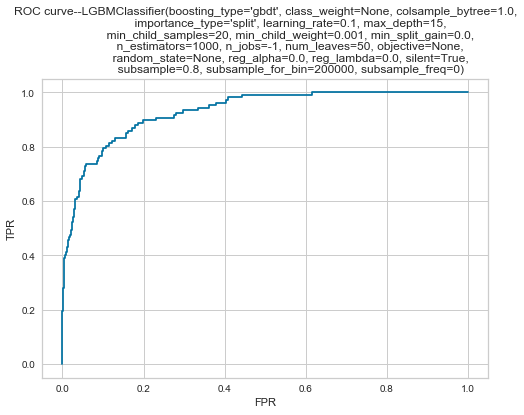

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lgbm.predict_proba(x_test)[:,1])
        

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve-' + '-' + str(lgbm))
plt.show()

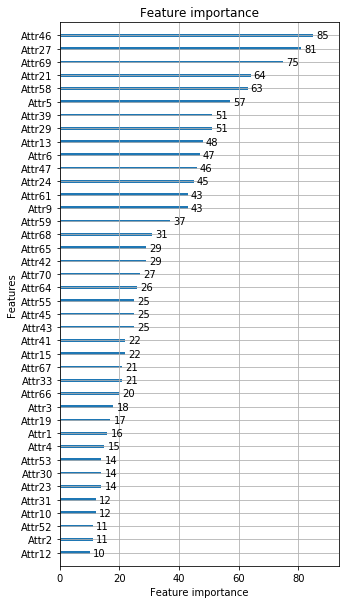

In [73]:
lgb.plot_importance(lgbm, figsize = (5,10))

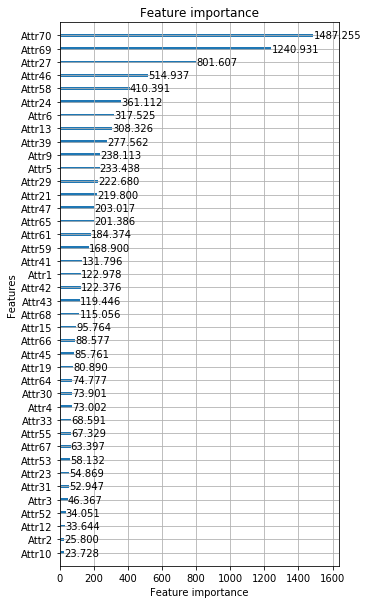

In [74]:
lgb.plot_importance(lgbm, figsize = (5,10) , importance_type = "gain")